# ==== Import Modules and Load Data ====

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the dataset
auto = pd.read_csv('adverts.csv')

# ==== General Evaluation ====

In [15]:
# View Data
auto.head()

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [16]:
null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

column  null_count
7    year_of_registration       33311
2                reg_code       31857
3         standard_colour        5378
9               body_type         837
11              fuel_type         601
1                 mileage         127
0        public_reference           0
4           standard_make           0
5          standard_model           0
6       vehicle_condition           0
8                   price           0
10  crossover_car_and_van           0

In [17]:
# Check for empty strings, 0 integers or 9999 integers

empty_strings = (auto == "").sum()
print("Number of empty strings in each column")
print(empty_strings)

Number of empty strings in each column
public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [18]:
zero_vals = (auto == 0).sum()
print("Number of zero values in each column")
print(zero_vals)

Number of zero values in each column
public_reference              0
mileage                   16207
reg_code                      0
standard_colour               0
standard_make                 0
standard_model                0
vehicle_condition             0
year_of_registration          0
price                         0
body_type                     0
crossover_car_and_van    400210
fuel_type                     0
dtype: int64


In [19]:
# Check for numbers composed entirely of 9s
all_nines = auto.applymap(lambda x: str(x).isdigit() and set(str(x)) == {'9'})

# Display the result
count_all_nines = all_nines.sum()
print("Number of all 9 values in each column")
print(count_all_nines)

Number of all 9 values in each column
public_reference            0
mileage                     0
reg_code                    0
standard_colour             0
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                    1056
body_type                   0
crossover_car_and_van       0
fuel_type                   0
dtype: int64



---
&nbsp;

&nbsp;

# ==== Price ====

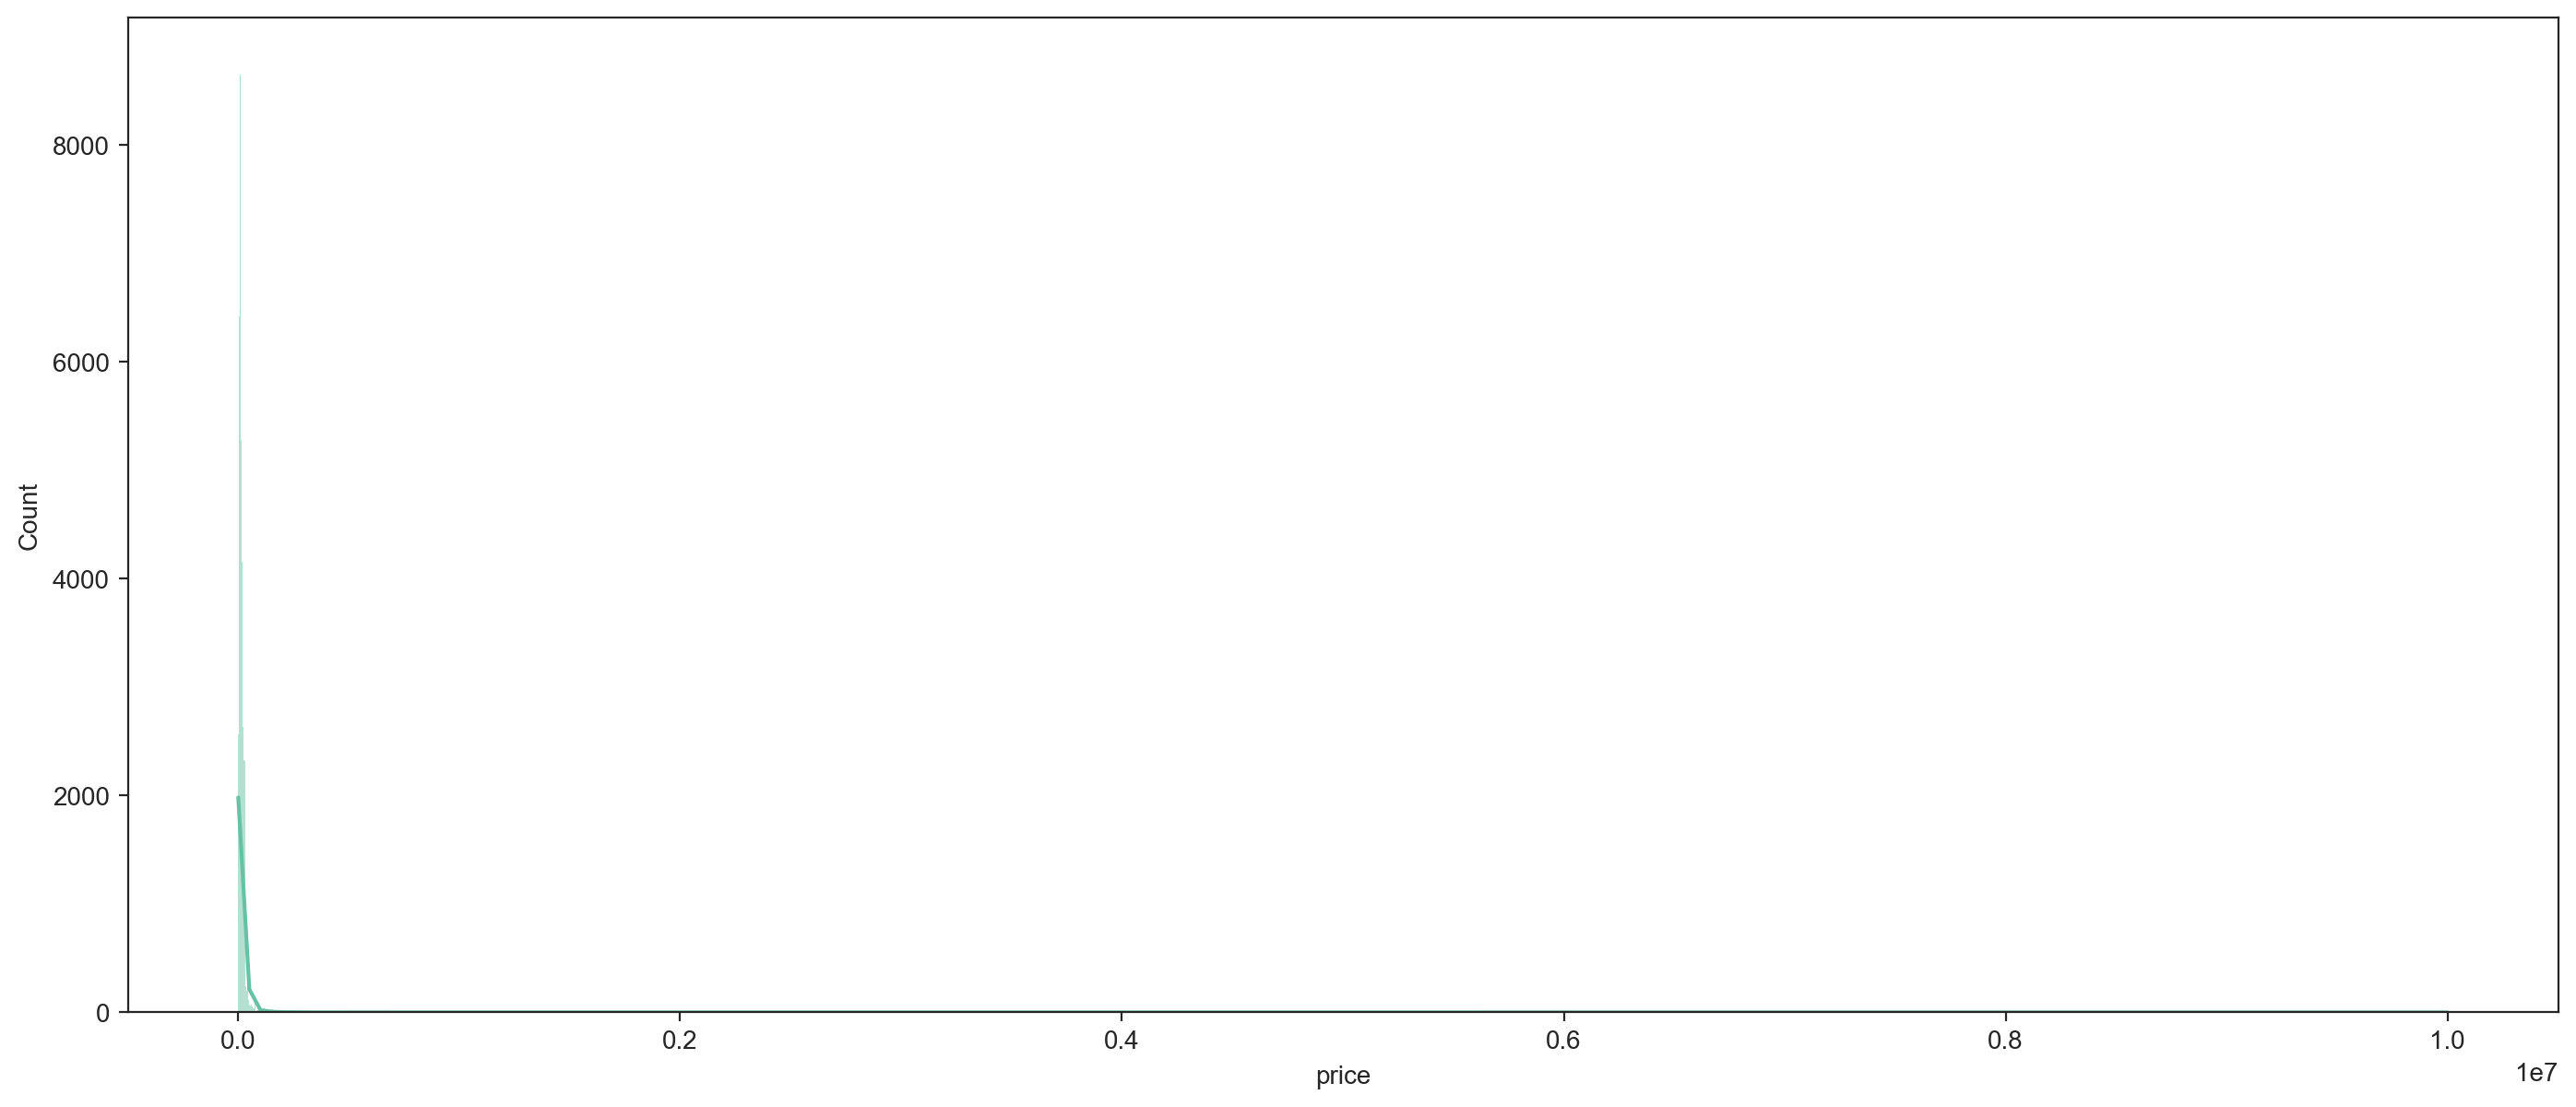

In [20]:
# Visualise spread of price
sns.histplot(auto, kde=True, x="price");

Price is skewed by a small number of extremely large prices. These will need investigating to see if they are erroneous and this feature is likely a good candidate for box-cox or other transformation.

In [21]:
# Check extreme prices.
auto.loc[auto["price"] > 1e6].sort_values(by="price", ascending=False)

public_reference  mileage reg_code standard_colour standard_make  \
147188   202009103539048    100.0      NaN            Grey      Maserati   
252505   202008112331147  46300.0      NaN            Blue       Ferrari   
336536   202006180262926   4400.0      NaN           White       Porsche   
305436   201812223434109   3600.0      NaN            Grey   Lamborghini   
141833   202007050883898  87450.0      NaN             Red       Ferrari   
336202   202001226429470    950.0      NaN           Black       Ferrari   
198060   202008252907180    300.0       17             NaN       Ferrari   
51741    202002257718775   4400.0       14           Black       Bugatti   
64910    202006039766650    189.0      NaN           Black       McLaren   
223835   202007081011555   1000.0       67            Blue       Bugatti   
94033    202007020778467   1900.0       18           White        Pagani   
72681    202007010711087    475.0       15          Yellow       Ferrari   
378068   202006150151007   2247.0       64             Red       Ferrari   
145819   202007070959470   6170.0       63             Red       Ferrari   
323760   202007151264168   1382.0       15             Red       Ferrari   
294287   202010155036207   2200.0      NaN             Red       Ferrari   
313958   202002197496987   7750.0       54             NaN       Ferrari   
103974   202010074708314  10895.0       16            Blue       Bugatti   
21997    201911084154244   2180.0       10            Blue       Bugatti   
264371   201911084150187    600.0       20             NaN       Bugatti   
255484   202007251680060     45.0        L          Silver       Porsche   
177165   202007271729483     45.0        L          Silver       Porsche   
180820   202007281806845    353.0       13          Orange       McLaren   
335741   202010175114565   2800.0        J             Red       Ferrari   
201413   202001095954708    828.0       57           Black       Bugatti   
289514   202010225285486   1500.0       15          Yellow       Porsche   
186555   202003258741553  57000.0        B             NaN  Aston Martin   
175995   202009254208162   3660.0       63          Yellow       McLaren   
212615   202006180255172   4000.0       64            Blue       McLaren   
62571    202010215263340   2200.0      NaN           Black       Porsche   
354623   201903276321916   2911.0       15           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
147188           3500              USED                   NaN  9999999   
252505            275              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
141833            250              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
198060      LaFerrari              USED                2017.0  3799995   
51741          Veyron              USED                2014.0  2850000   
64910              P1              USED                   NaN  2695000   
223835         Chiron              USED                2018.0  2500000   
94033          Huayra              USED                   NaN  2400000   
72681       LaFerrari              USED                2015.0  2299950   
378068      LaFerrari              USED                2014.0  2195000   
145819      LaFerrari              USED                2013.0  2150000   
323760      LaFerrari              USED                2015.0  2150000   
294287      LaFerrari              USED                2014.0  2049950   
313958           Enzo              USED                2004.0  1950000   
103974         Veyron              USED                2016.0  1699995   
21997          Veyron              USED                2010.0  1590000   
264371         Veyron              USED                2020.0  1400000   
255484            911

 Some prices are 9999999 which are erroneous and need replacing.
 
 Other unusual prices:

202007251680060	45.0	L	Silver	Porsche	911	USED	1993	£1,395,000	Coupe

202007271729483	45.0	L	Silver	Porsche	911	USED	1993	£1,395,000	Coupe	

202010225285486	1500.0	15	Yellow	Porsche	918	USED	2019	£1,200,000	Convertible	

202010215263340	2200.0	NaN	Black	Porsche	918	USED	2016	£1,099,950	Convertible	

201903276321916	2911.0	15	White	Porsche	918	USED	2015	£1,050,000	NaN	

In [22]:
# 9999999 prices are erroneous and should be removed
auto["price"].replace({9999999: np.nan}, inplace=True)

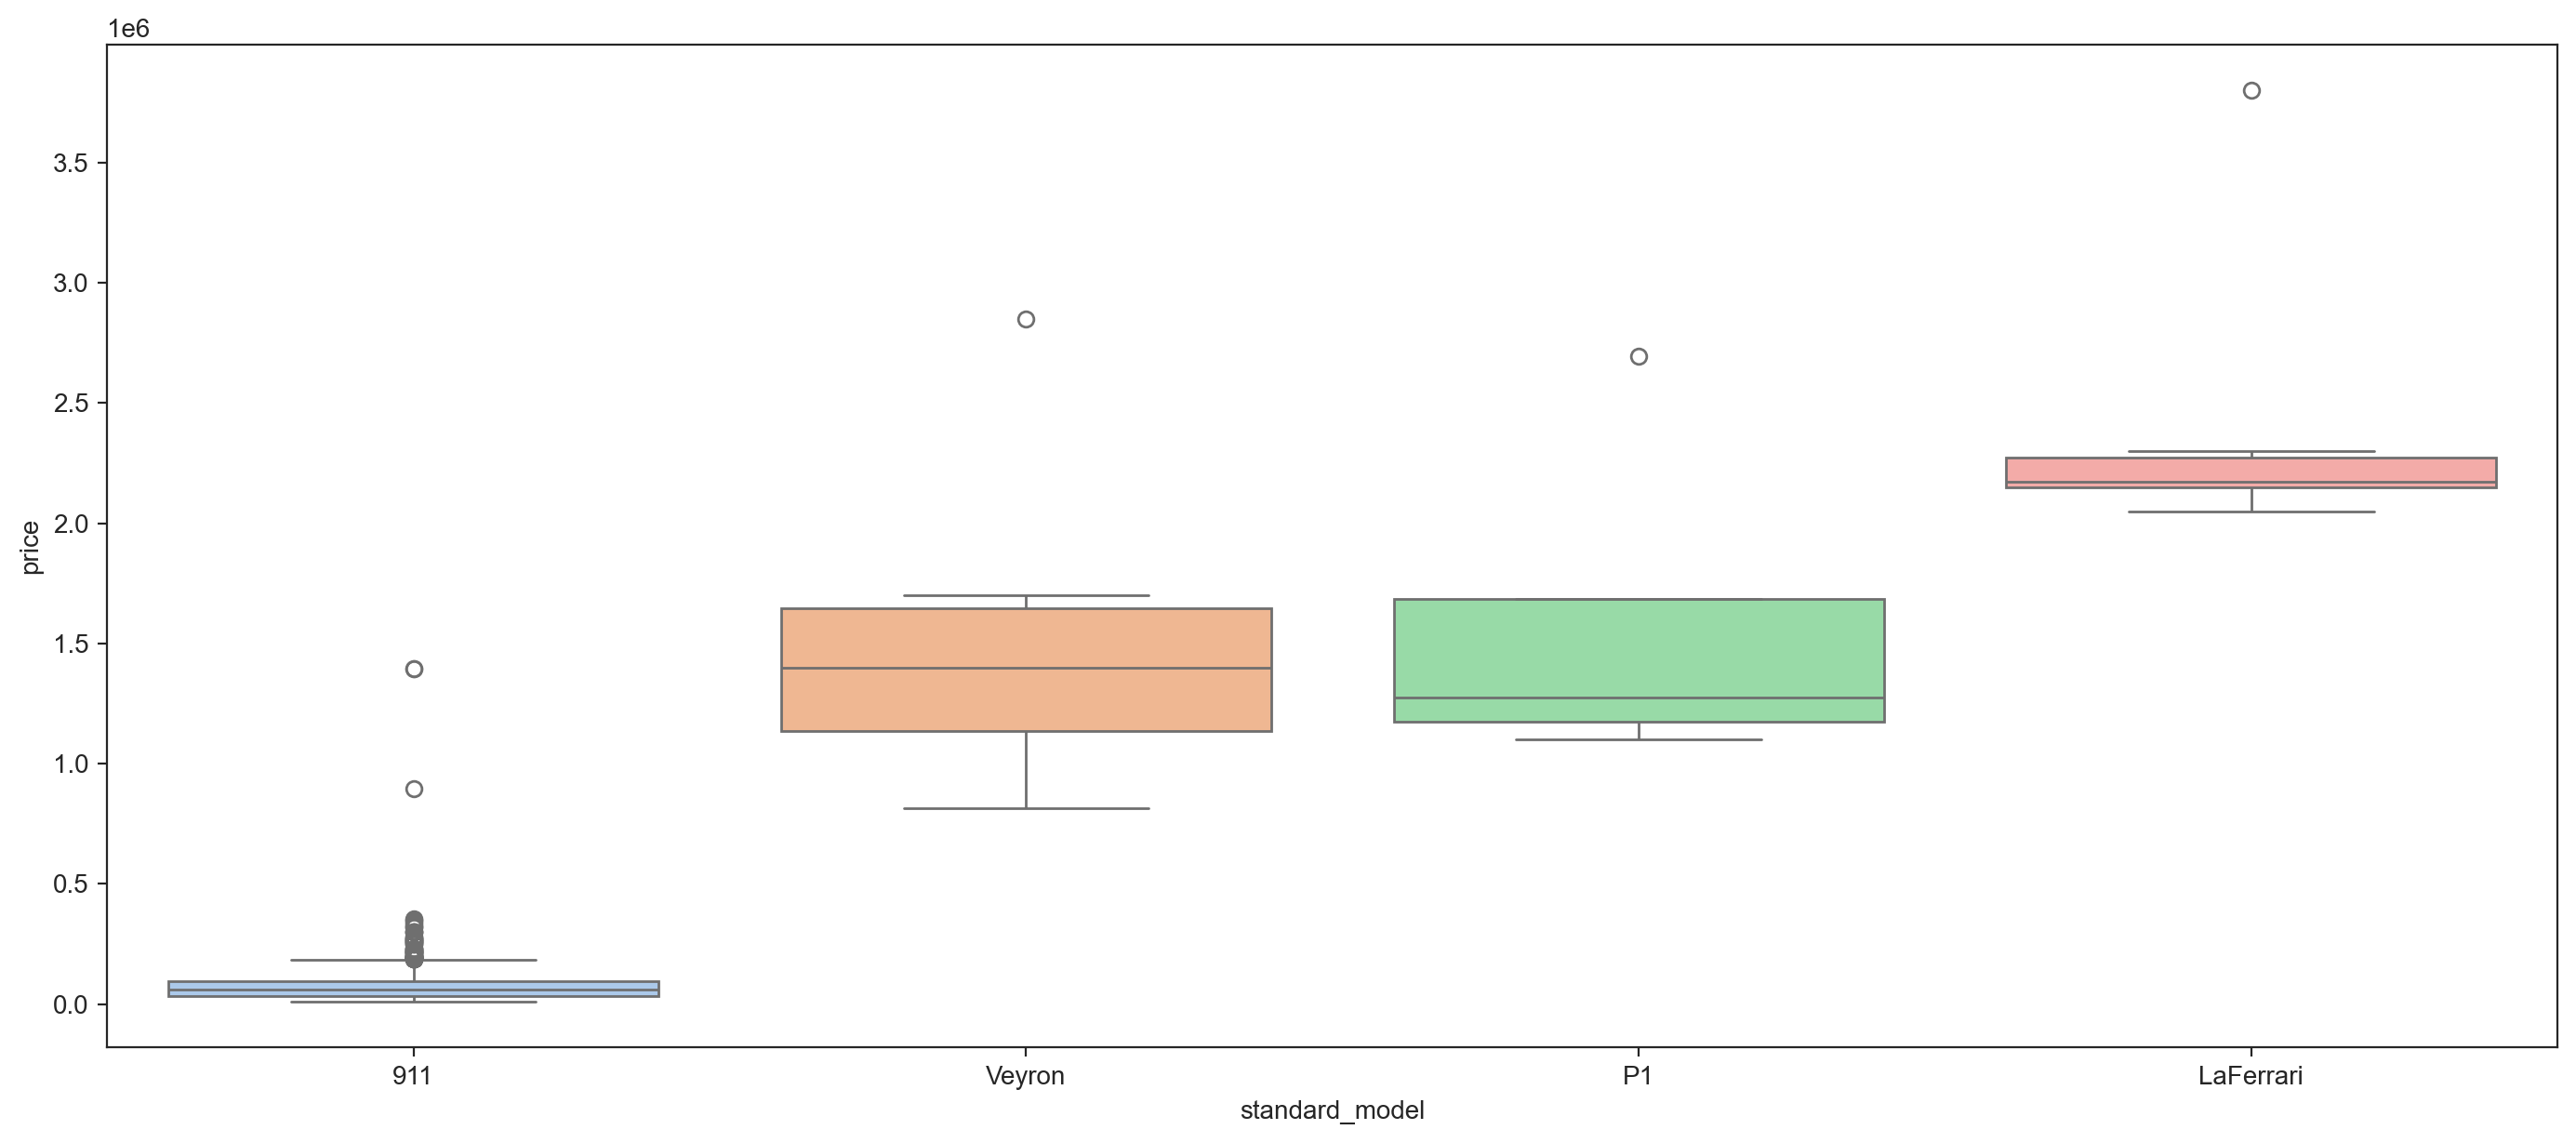

In [23]:
combined_prices = auto.loc[auto["standard_model"].isin(["Veyron", "LaFerrari", "P1", "911"]), ["price", "standard_model"]]
sns.boxplot(data=combined_prices, x="standard_model", y="price", palette="pastel");

These models show some outliers which greatly exceed other, similar cars. There is presumably some tool/function to automatically find these.

In [24]:
from sklearn.ensemble import IsolationForest

for model_name in ["Veyron", "LaFerrari", "P1"]:
    model_data = auto.loc[auto["standard_model"] == model_name, ["price"]]

    data_cropped = model_data.dropna(subset=["price"])

    # Prepare the price data
    prices = data_cropped["price"].values.reshape(-1, 1)  # Reshape for IsolationForest

    # Train the IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
    iso_forest.fit(prices)

    # Predict outliers
    data_cropped["outlier"] = iso_forest.predict(prices)  # 1 = inlier, -1 = outlier

    # Print outliers
    outliers = data_cropped.loc[data_cropped["outlier"] == -1]
    print(f"Outliers for {model_name}:\n", outliers)

Outliers for Veyron:
            price  outlier
51741  2850000.0       -1
Outliers for LaFerrari:
             price  outlier
198060  3799995.0       -1
Outliers for P1:
            price  outlier
64910  2695000.0       -1


In [25]:
# # Visualise spread of price for each brand
# for make in auto["standard_make"].unique():
#     count = len(auto.loc[auto["standard_make"]==make])
#     if count > 500:
#         sns.histplot(auto.loc[auto["standard_make"]==make], kde=True, x="price");
#         plt.title(f"Disribution of {count} prices for {make} brand cars.")
#         plt.show()

## Price - Summary

The prices have some extremely large values including 999999 values which need removing as well as a large positive skew which may benefit from transforming. Additionally, Porsche, Ferrari and Mercedes-Benz appear to have some significant outliers in terms of price

---
&nbsp;

&nbsp;

# ==== Public Reference ====

In [26]:
def format_entry(entry):
    year = str(entry["year_of_registration"].values[0])[:4]
    make = entry["standard_make"].values[0]
    model = entry["standard_model"].values[0]
    mileage = int(entry["mileage"].values[0])
    price = entry["price"].values[0]
    
    return f"{year} {make} {model} with {mileage:,} miles and price £{price:,}"

In [27]:
def format_ref(entry):
    entry = str(entry["public_reference"].values[0])
    year = entry[:4]
    month = entry[4:6]
    day = entry[6:8]
    rest = entry[8:]
    
    return year, month, day, rest

In [28]:
sample = auto.sample()
print(format_entry(sample))
print(format_ref(sample))

2014 Mercedes-Benz CLA Class with 81,768 miles and price £20,000.0
('2020', '10', '30', '5622178')


Pubic reference appears to include the year, month, day that the car was listed as well as some other numbers which are possibly a unique id.
This data can be extracted and added as new features.

---
&nbsp;

&nbsp;

# ==== Mileage ====

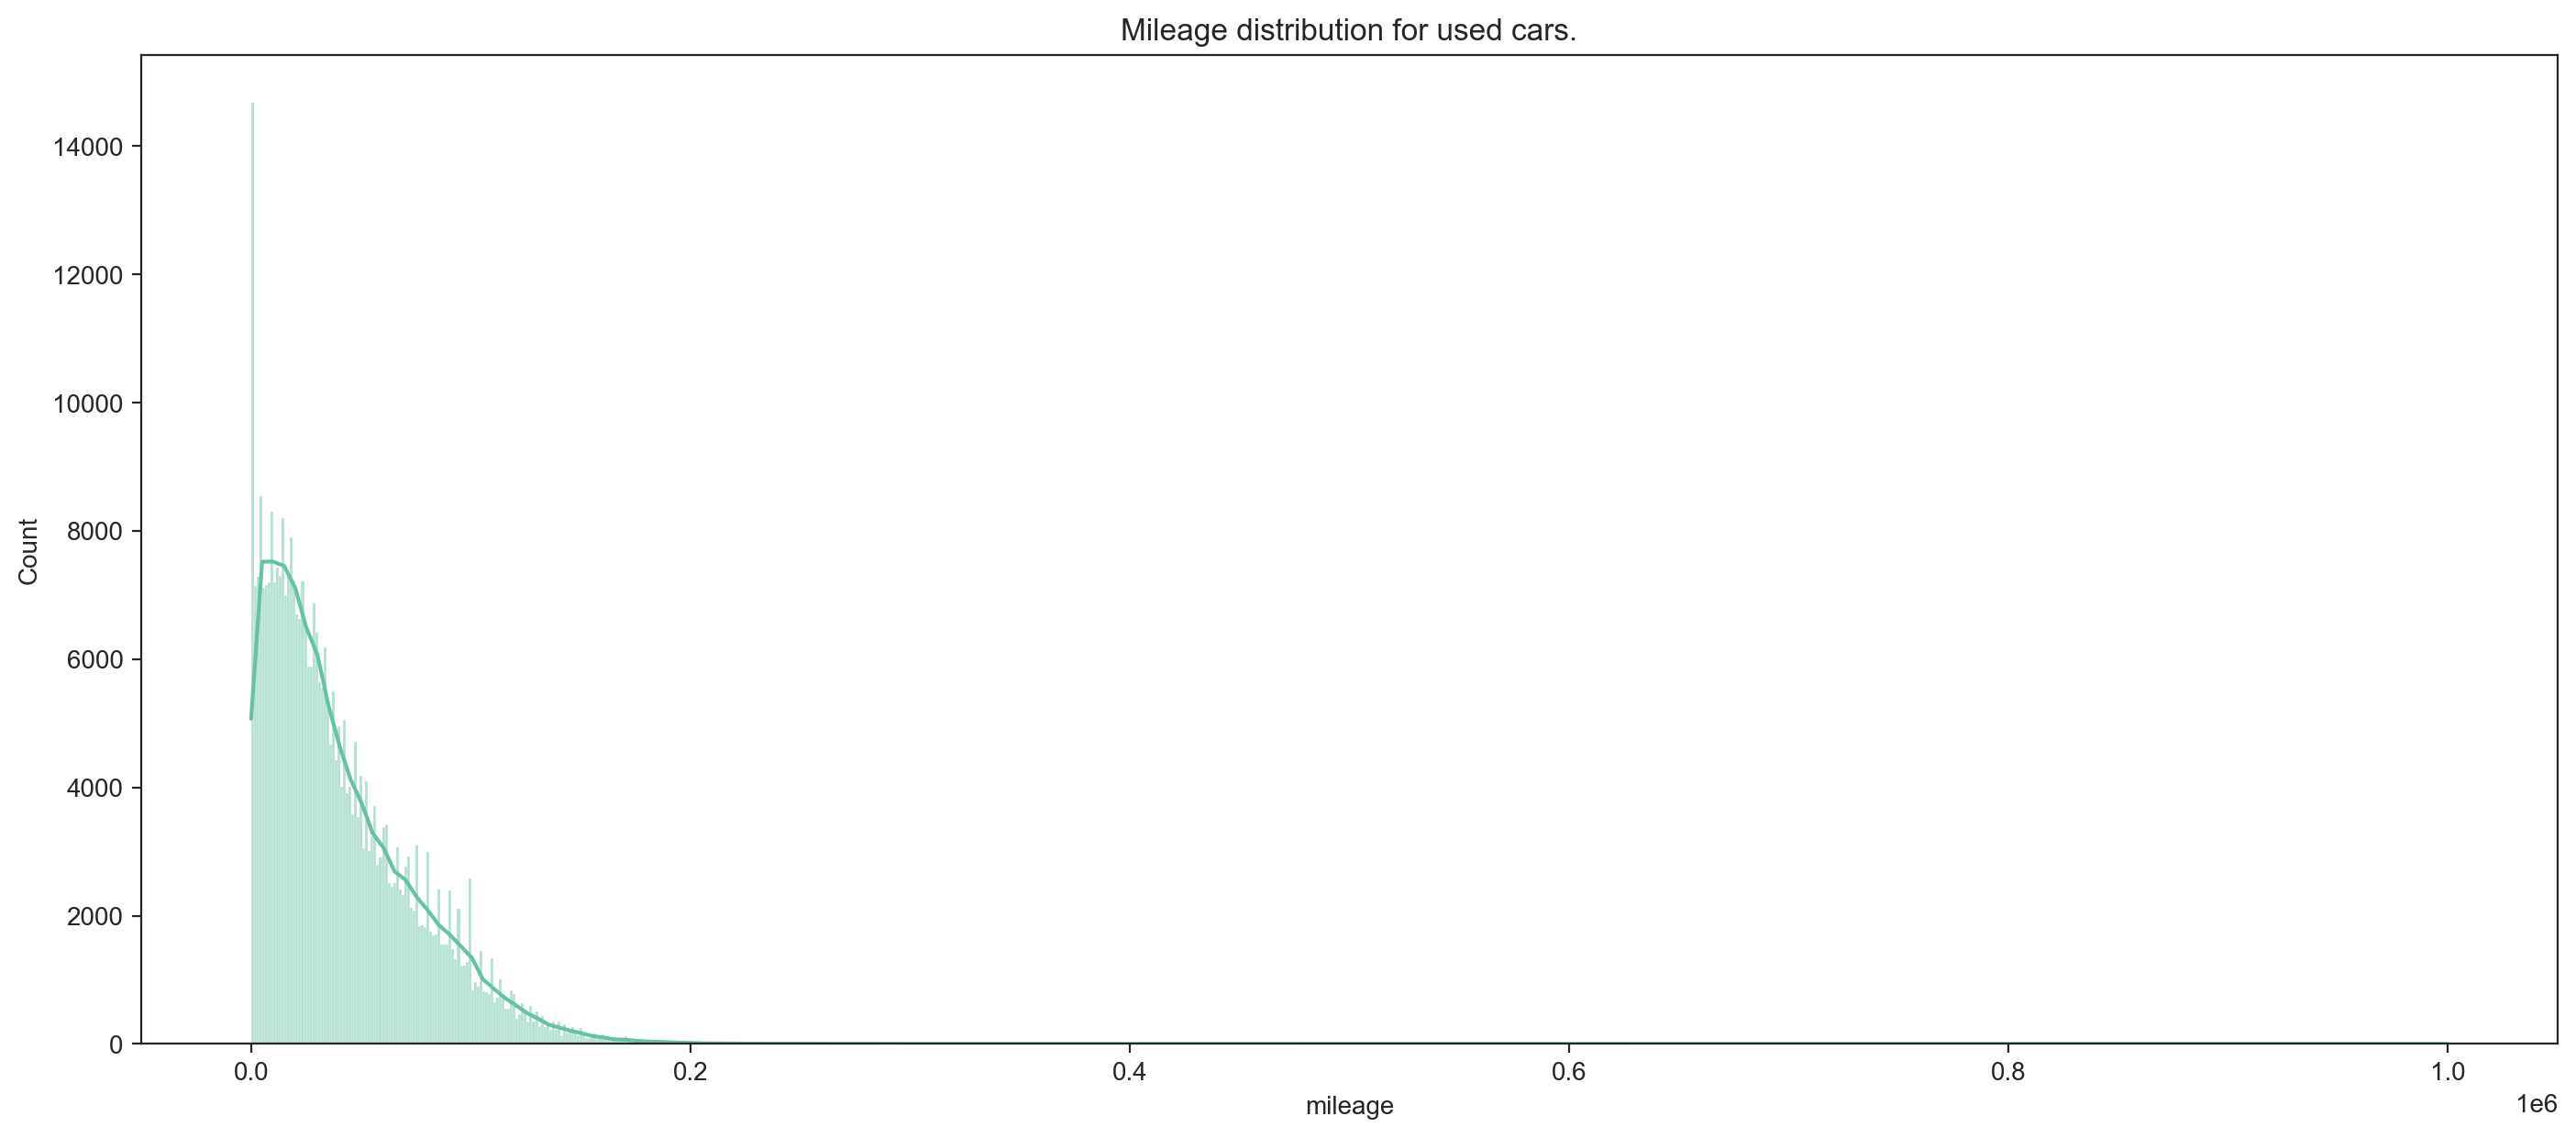

In [29]:
used = auto.loc[auto["vehicle_condition"] == "USED"]
sns.histplot(used, x="mileage", kde=True);
plt.title("Mileage distribution for used cars.");

Large spike around 0 miles which seems unusual given that this data is for used cars. Additionally, there are a few extremely large values which warrant investigating.

In [73]:
# Very large mileage entries
auto.loc[(auto["mileage"] > 3e5)].sort_values(by="mileage", ascending=False)

# Some make sense such as the taxis, however, there are some values which are much too high for the age and type of the car.

public_reference   mileage reg_code standard_colour  \
43974    202008122406434  999999.0       63           White   
63569    202010235350884  990000.0       07             Red   
85043    202010285542410  930000.0       56            Blue   
131508   202010064664710  788072.0       68            Blue   
240577   202009244163289  740000.0       11           White   
115277   202010215262290  740000.0       14            Blue   
333167   202010225297076  611121.0       13           White   
77727    202007301907676  413079.0       59           Beige   
178876   202009033271274  400321.0       16           White   
382567   202009294349326  388000.0       13           Green   
78353    202010315644587  368199.0       53           Green   
22528    202010195167838  360000.0       60           White   
8446     202009093537194  356744.0        W           Black   
252616   202010034557896  355000.0       10            Grey   
116544   202010054632955  351000.0       55             Red   
111845   202010285522885  350000.0       55             NaN   
296655   202010155038897  340000.0        R          Silver   
347153   202009304388320  339654.0       05           Black   
239751   202010305628219  339000.0       57          Silver   
343670   202009163794089  336793.0       15          Silver   
315297   202006099961862  336472.0       11          Silver   
276224   202009153778614  332849.0       11           White   
192165   202009304421979  329000.0       54           Black   
277719   202010215275066  324000.0       06          Silver   
400624   202010285545599  322000.0       05           Black   
54701    202010285550831  314135.0        R           White   
223144   202010305601646  311777.0       04           Black   
168051   202010104843855  310000.0       57           Black   
167970   202009224069738  310000.0       10             NaN   
359785   202009133689548  307426.0       11           Black   
270685   202010315659240  300050.0       59           Black   

                     standard_make standard_model vehicle_condition  \
43974                     Vauxhall          Astra              USED   
63569                     Vauxhall         Zafira              USED   
85043                          BMW       1 Series              USED   
131508                        MINI     Countryman              USED   
240577               Mercedes-Benz        E Class              USED   
115277                       Volvo           XC90              USED   
333167                        Fiat            500              USED   
77727                        SKODA        Octavia              USED   
178876                         BMW             X5              USED   
382567                       SKODA         Superb              USED   
78353                   Mitsubishi         Delica              USED   
22528                      Peugeot        Partner              USED   
8446    London Taxis International            TXI              USED   
252616               Mercedes-Benz           Vito              USED   
116544  London Taxis International           TXII              USED   
111845  London Taxis International           TXII              USED   
296655                       Volvo            V70              USED   
347153  London Taxis International           TXII              USED   
239751                       SKODA        Octavia              USED   
343670                         BMW       1 Series              USED   
315297                      Toyota         Estima              USED   
276224                        Audi             A3              USED   
192165                  Volkswagen         Sharan              USED   
277719                       SKODA        Octavia              USED   
400624  London Taxis International            TXI              USED   
54701                    Carbodies      Black Cab              USED   
223144                  Volkswagen         Passat              USED   
168

In [31]:
# These older, used cars have zero miles which is highly unlikely and should be corrected
auto.loc[(auto["mileage"] == 0) & (auto["vehicle_condition"] == "USED") & (auto["year_of_registration"] < 2018)]

public_reference  mileage reg_code standard_colour  standard_make  \
1656     202011015669636      0.0       13          Silver       Vauxhall   
2754     202008283030532      0.0       63           Black           Audi   
8677     201704033991344      0.0        D             Red        Porsche   
17265    202010215247763      0.0       65             Red        Renault   
52682    202010305604067      0.0       61           Black            BMW   
67889    202010215247760      0.0       15          Silver            Kia   
77011    202003098187857      0.0        W            Grey        Porsche   
92881    202009294364995      0.0        V          Silver          Honda   
122534   202009294330750      0.0        C     Multicolour     Land Rover   
132740   202009083453747      0.0       66           White     Volkswagen   
145188   202008232833168      0.0       57           Black     Volkswagen   
146933   202009294360297      0.0       06           Black     Land Rover   
152779   202010285538167      0.0       16          Silver         Jaguar   
155995   202010215266873      0.0       16            Blue            Kia   
164741   202010305604070      0.0       62            Blue            BMW   
173546   201801032412934      0.0       16             NaN   Aston Martin   
179446   202010305613938      0.0       17           White            BMW   
195222   202010275471341      0.0       15             Red     Volkswagen   
221082   202010054621384      0.0       66            Grey            Kia   
230568   202010305608495      0.0       16           Black        Hyundai   
240493   202007301869973      0.0       67           Black            BMW   
242415   202010315651121      0.0       64          Silver        Hyundai   
246754   202010265443635      0.0       12     Multicolour           Fiat   
246950   202009304412381      0.0       67           White            Kia   
269724   202005109256904      0.0       60           Green   Aston Martin   
272055   202010295569029      0.0       03           Black  Mercedes-Benz   
295767   202010295586430      0.0       15          Purple        Citroen   
338161   202010305604068      0.0       16            Grey           SEAT   
342887   202010265461242      0.0       11            Blue         Nissan   
348827   202010175122123      0.0       17           Black           Audi   
364435   202008122373926      0.0       64           Black     Volkswagen   
400724   202008242879192      0.0        L          Silver        Porsche   

           standard_model vehicle_condition  year_of_registration     price  \
1656             Insignia              USED                2013.0    2975.0   
2754                   A1              USED                2013.0    8000.0   
8677                  911              USED                1987.0   89995.0   
17265              Kadjar              USED                2015.0   10699.0   
52682                  X6              USED                2011.0   14000.0   
67889               Venga              USED                2015.0    6699.0   
77011                 911              USED                1981.0  130000.0   
92881               Civic              USED                1999.0    1496.0   
122534       Defender 110              USED                1986.0   89995.0   
132740                up!              USED                2016.0    7995.0   
145188               Polo              USED                2007.0    2795.0   
146933  Range Rover Sport              USED                2006.0    9495.0   
152779                 XF              USED                2016.0   15980.0   
155995           Sportage              USED                2016.0   11995.0   
164741           1 Series              USED                2012.0    8200.0   
173546                DB5              USED                2016.0  969990.0   
179446           1 Series              USED                2017.0   15490.0   
195222               Golf              USED 

In [32]:
# Some crazy mileage values for these 2020 cars.
auto.loc[(auto["year_of_registration"] == 2020) & (auto["mileage"] > 1e5)]

public_reference   mileage reg_code standard_colour standard_make  \
85334    202010225290196  152000.0       20           Black    Land Rover   
104829   202010315659744  126602.0       70           White      Vauxhall   
123417   202007271766248  102000.0       20            Grey         Mazda   
148395   202010225304217  149000.0       70           Black    Land Rover   
157710   202008142464449  250000.0       20           Black          SEAT   
164023   202010265462768  150000.0       70          Silver    Volkswagen   
173867   202010315658234  145000.0       70             NaN    Land Rover   
254446   202010305602112  114000.0      NaN           White        Toyota   
285648   202002237639035  125250.0       20          Silver        Toyota   
346927   202010225313436  140000.0       70             NaN          Audi   

           standard_model vehicle_condition  year_of_registration    price  \
85334         Discovery 4              USED                2020.0  14995.0   
104829              Combo              USED                2020.0    995.0   
123417              Bongo              USED                2020.0   8495.0   
148395        Range Rover              USED                2020.0  28995.0   
157710              Arona              USED                2020.0  16995.0   
164023        Transporter              USED                2020.0   8995.0   
173867  Range Rover Sport              USED                2020.0   7850.0   
254446             Estima              USED                2020.0   5995.0   
285648             Estima              USED                2020.0   6995.0   
346927                 TT              USED                2020.0    995.0   

          body_type  crossover_car_and_van      fuel_type  
85334           MPV                  False         Petrol  
104829    Combi Van                   True         Diesel  
123417          MPV                  False         Petrol  
148395          SUV                  False         Diesel  
157710          SUV                  False         Diesel  
164023   Window Van                   True         Diesel  
173867          SUV                  False         Diesel  
254446          MPV                  False         Petrol  
285648          MPV                  False  Petrol Hybrid  
346927  Convertible                  False         Petrol

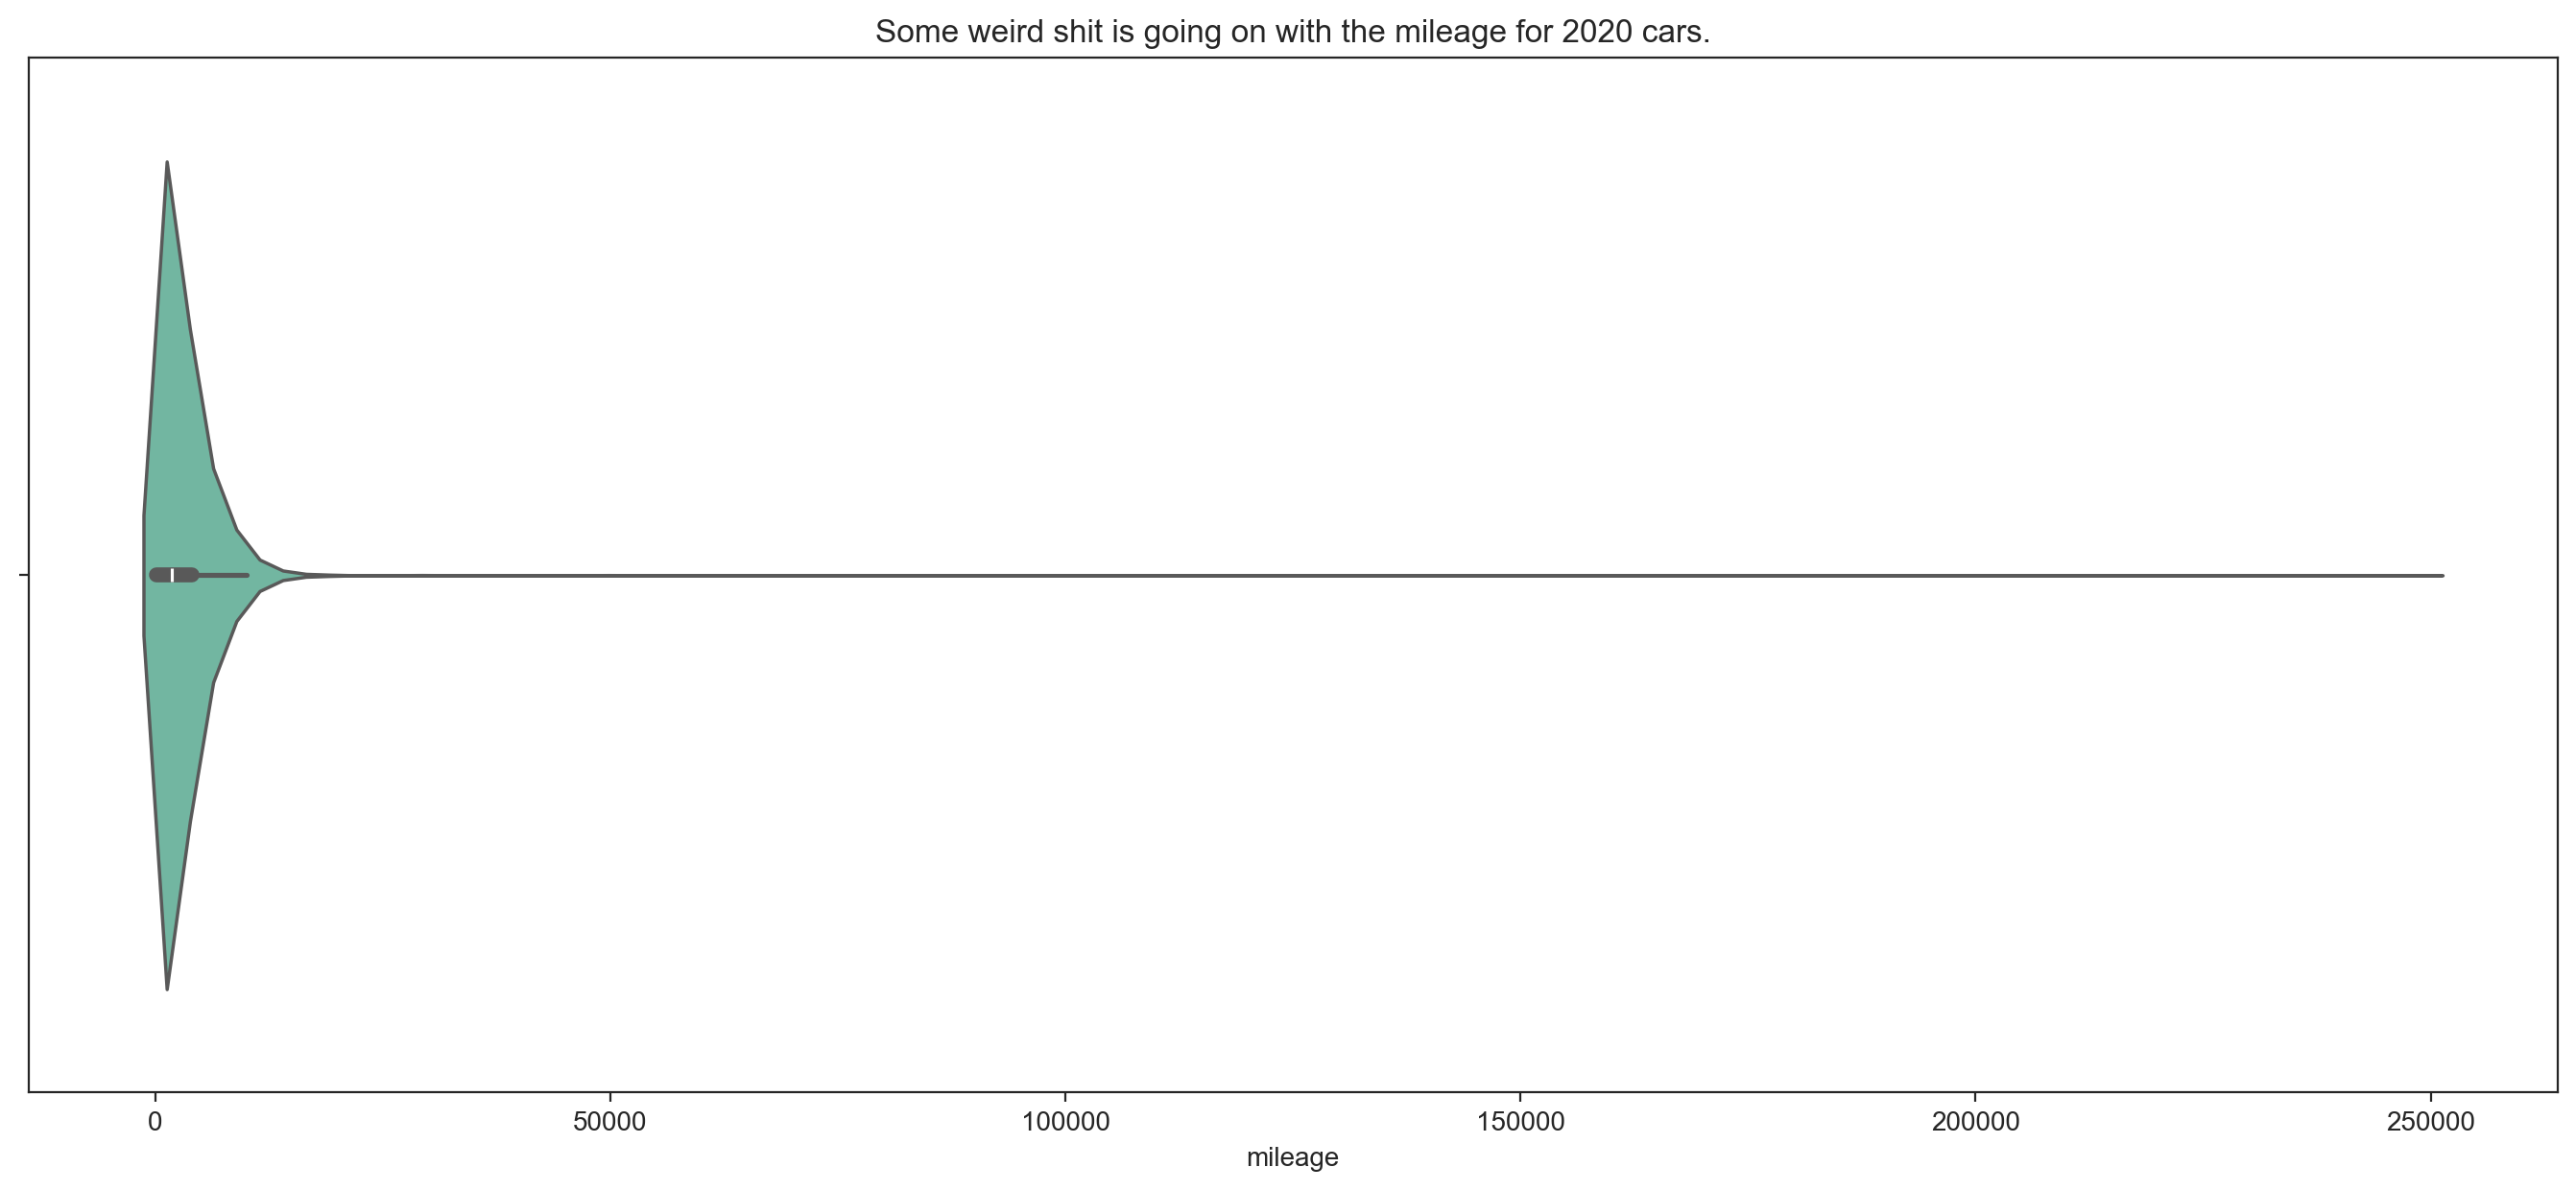

In [72]:
new_mileage = auto.loc[(auto["year_of_registration"] == 2020)]
# new_mileage = new_mileage.loc[(auto["mileage"] > 20000)]
sns.violinplot(new_mileage, x="mileage");
plt.title("Some weird shit is going on with the mileage for 2020 cars.");

These mileages are either off or the year of registration could be wrong. Looking at the reg codes they all (except one) have 2020 codes though so it is unlikely the year is wrong. Given that 250000.0 is both suspiciously round and virtually impossible to do in a single year there must be an error here. Based on nothing, it plausibly could be an issue of and extra 0 getting typed on the end ?

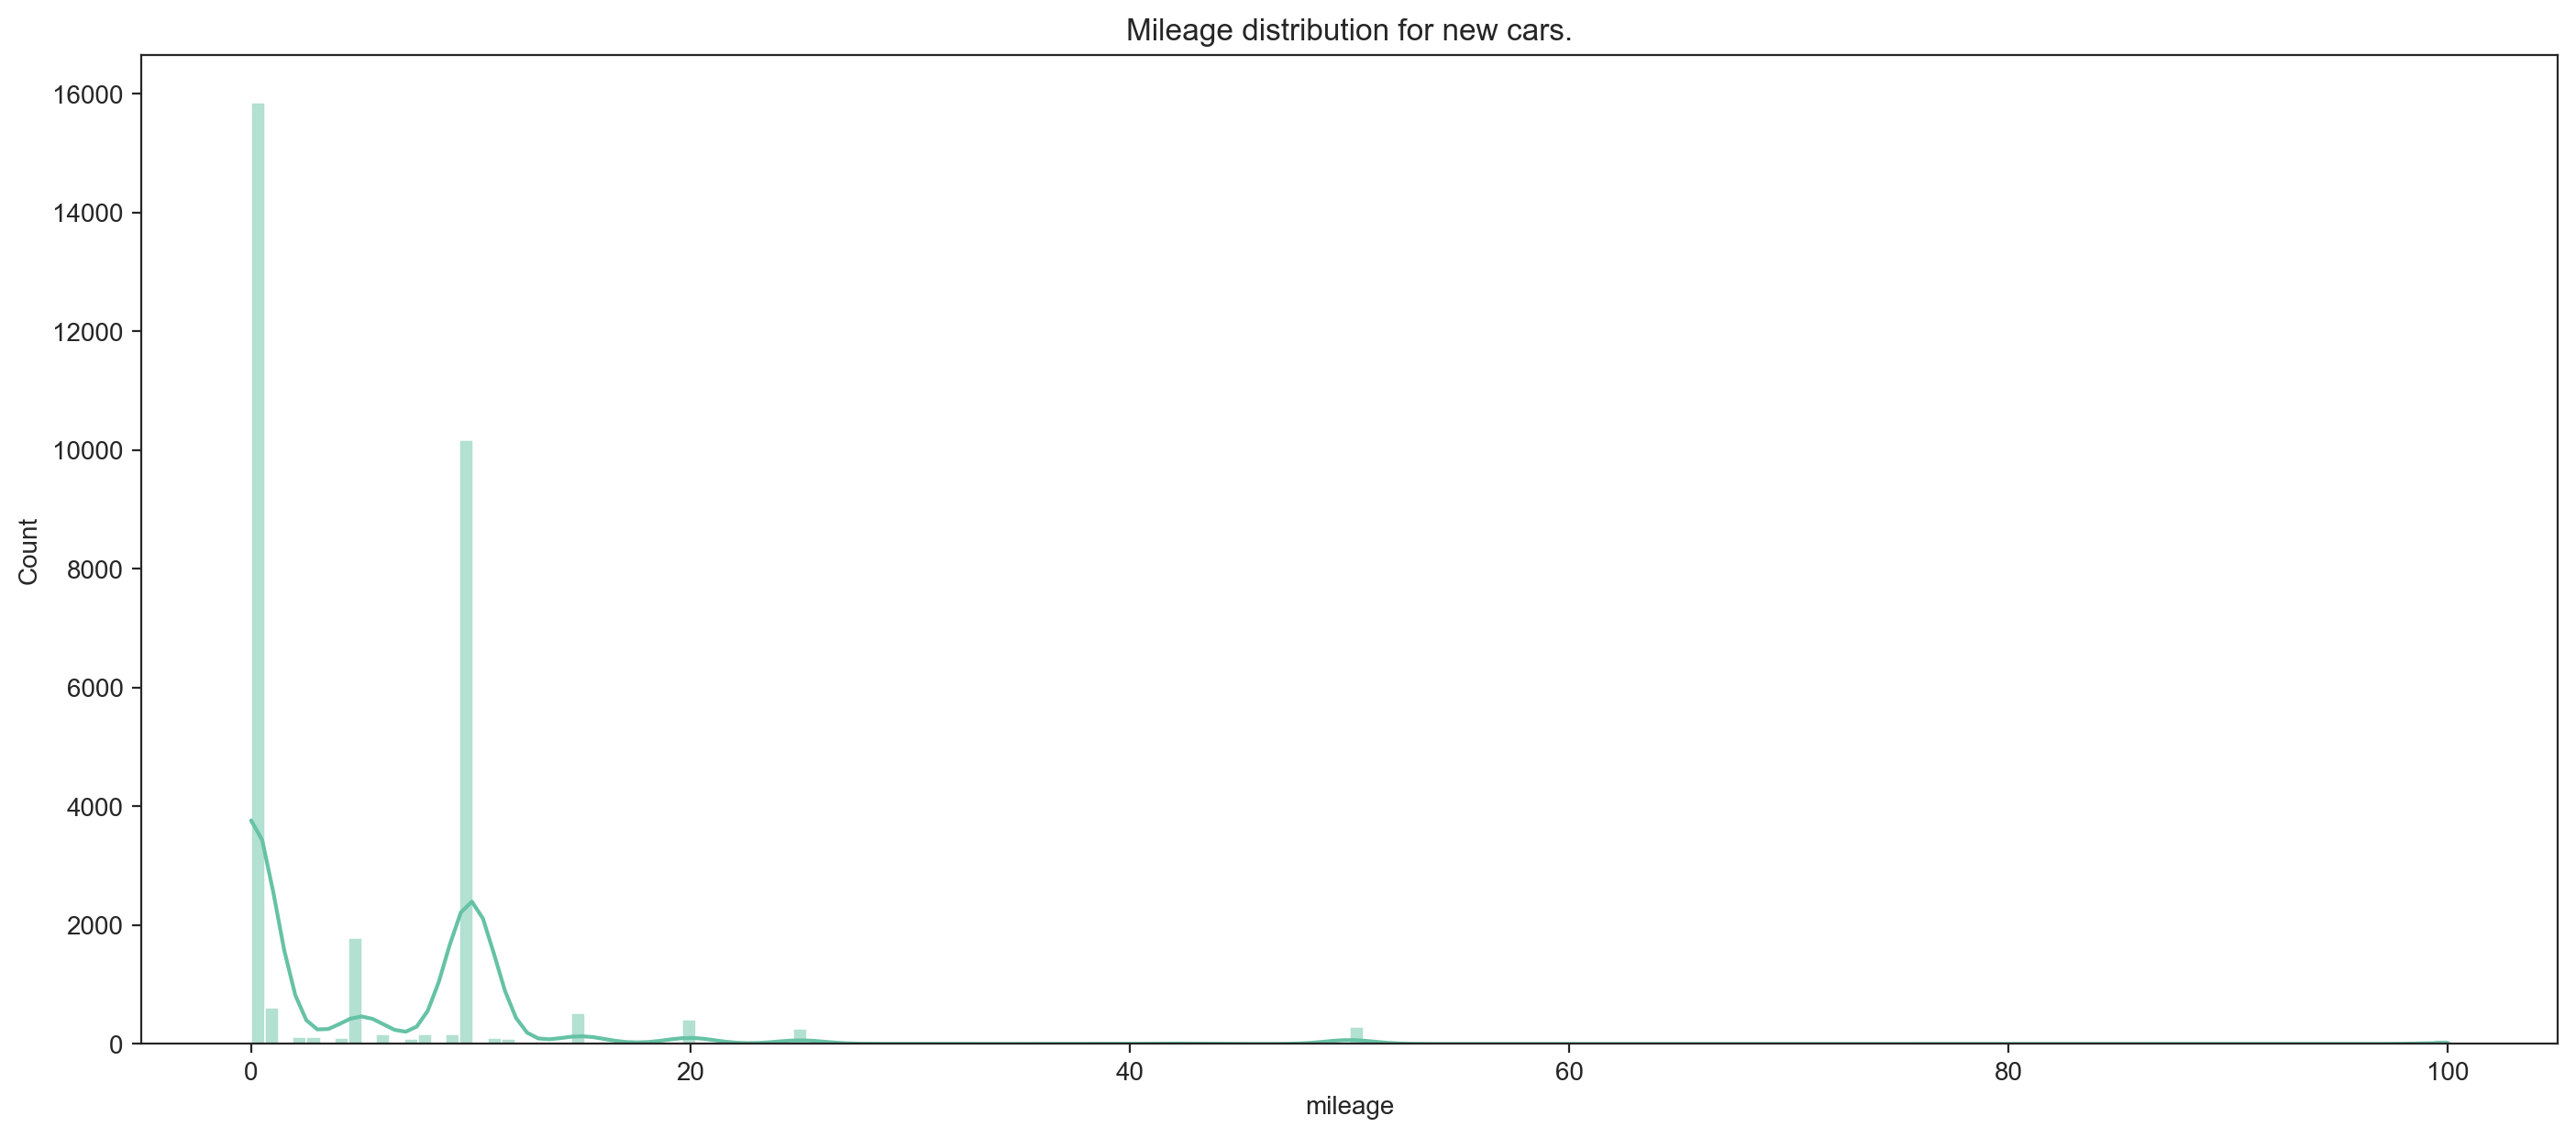

In [34]:
# New cars all have reasonable and low mileage.

new = auto.loc[auto["vehicle_condition"] == "NEW"]
sns.histplot(new, x="mileage", kde=True);
plt.title("Mileage distribution for new cars.");

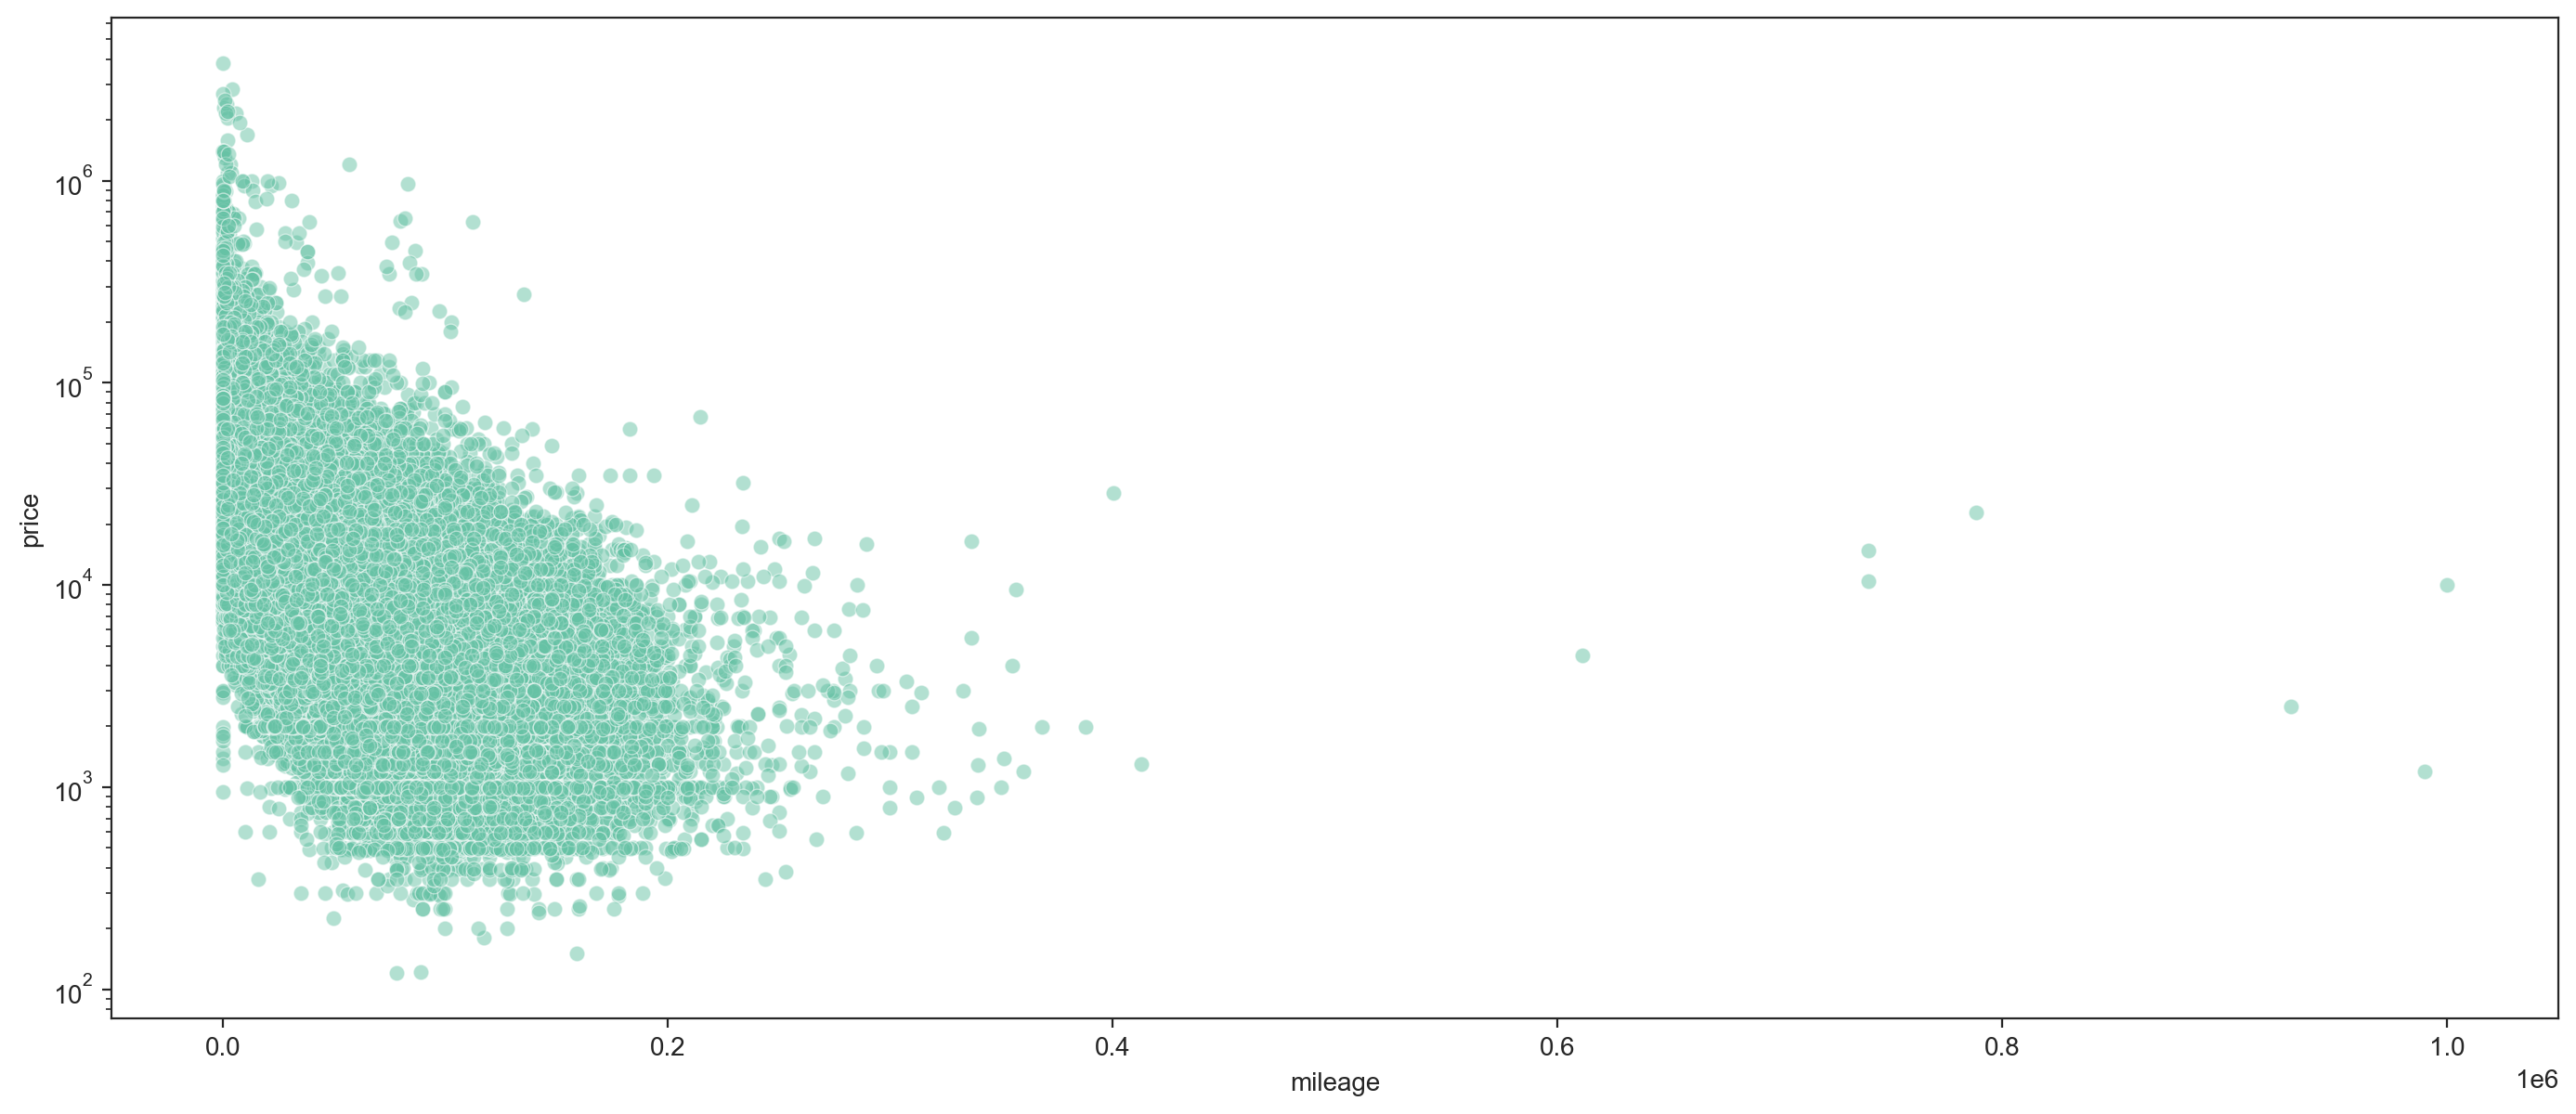

In [35]:
ax = sns.scatterplot(auto, x="mileage", y="price", alpha=0.5);
ax.set_yscale('log')

## Mileage Summary

New cars have mileage as expected. Extreme high and low values for used cars, particularly for recent (2020) cars. Need to be assessed for how realistic they are and then replaced.

---

&nbsp;
&nbsp;

# ==== Reg Code ====

Reg codes by year:

| Year of Release | 1st Half Plate Numbers | 2nd Half Plate Numbers |
| --------------- | ------------------------------------------------ | ---------------------------------------------------------- |
| 2024/25         | 24                                               | 74                                                         |
| 2023/24         | 23                                               | 73                                                         |
| 2022/23         | 22                                               | 72                                                         |
| 2021/22         | 21                                               | 71                                                         |
| 2020/21         | 20                                               | 70                                                         |
| 2019/20         | 19                                               | 69                                                         |
| 2018/19         | 18                                               | 68                                                         |
| 2017/18         | 17                                               | 67                                                         |
| 2016/17         | 16                                               | 66                                                         |
| 2015/16         | 15                                               | 65                                                         |
| 2014/15         | 14                                               | 64                                                         |
| 2013/14         | 13                                               | 63                                                         |
| 2012/13         | 12                                               | 62                                                         |
| 2011/12         | 11                                               | 61                                                         |
| 2010/11         | 10                                               | 60                                                         |
| 2009/10         | 09                                               | 59                                                         |
| 2008/09         | 08                                               | 58                                                         |
| 2007/08         | 07                                               | 57                                                         |
| 2006/07         | 06                                               | 56                                                         |
| 2005/06         | 05                                               | 55                                                         |
| 2004/05         | 04                                               | 54                                                         |
| 2003/04         | 03                                               | 53                                                         |
| 2002/03         | 02                                               | 52                                                         |
| 2001/02         | 01                                               | 51                                                         |
| 2001            | Y                                                | Y                                                          |
| 2000            | X                                                | X                                                          |
| 2000            | W                                                | W                                                          |
| 1999            | T                                                | T                                                          |
| 1999            | V                                                | V                                                          |
| 1998            | S                                                | S                                                          |
| 1997            | R                                                | R                                                          |
| 1996            | P                                                | P                                                          |
| 1995            | N                                                | N                                                          |
| 1994            | M                                                | M                                                          |
| 1993            | L                                                | L                                                          |
| 1992            | K                                                | K                                                          |
| 1991            | J                                                | J                                                          |
| 1990            | H                                                | H                                                          |
| 1989            | G                                                | G                                                          |
| 1988            | F                                                | F                                                          |
| 1987            | E                                                | E                                                          |
| 1986            | D                                                | D                                                          |
| 1985            | C                                                | C                                                          |
| 1984            | B                                                | B                                                          |
| 1983            | A                                                | A                                                          |
| 1982            | Y                                                | Y                                                          |
| 1981            | X                                                | X                                                          |
| 1980            | W                                                | W                                                          |
| 1979            | T                                                | T                                                          |
| 1978            | V                                                | V                                                          |
| 1977            | S                                                | S                                                          |
| 1976            | R                                                | R                                                          |
| 1975            | P                                                | P                                                          |
| 1974            | N                                                | N                                                          |
| 1973            | M                                                | M                                                          |
| 1972            | L                                                | L                                                          |
| 1971            | K                                                | K                                                          |
| 1970            | J                                                | J                                                          |
| 1969            | H                                                | H                                                          |
| 1968            | G                                                | G                                                          |
| 1967            | F                                                | F                                                          |
| 1967            | E                                                | E                                                          |
| 1966            | D                                                | D                                                          |
| 1965            | C                                                | C                                                          |
| 1964            | B                                                | B                                                          |
| 1963            | A                                                | A                                                          |


Before 1983, they used the letters as a suffix. this started in 1963 with the letter A, and ended in 1983 with Y.

Source: https://www.webuyanycar.com/free-car-check/what-year-is-my-car/

In [36]:
# Pre 1983 reg codes

old_reg = auto[(auto["year_of_registration"] < 1983) & (auto["year_of_registration"] > 1900)]

old_reg

public_reference  mileage reg_code standard_colour standard_make  \
3399     201809040153397    461.0        H           Green  Aston Martin   
5045     202010255427324  33500.0        G            Blue    Land Rover   
10051    202006039749809  70489.0        P            Blue       Porsche   
10402    202008192687589  59000.0        V           White           BMW   
14034    201611300225905  26552.0        L            Gold   Rolls-Royce   
...                  ...      ...      ...             ...           ...   
399882   202010124915499   9000.0        K           White       Porsche   
400391   202008062165360  32000.0        M             NaN       Triumph   
400664   202006109989307   5800.0        A            Blue          Fiat   
400724   202008242879192      0.0        L          Silver       Porsche   
401128   202009203972304  36000.0        M           White   Rolls-Royce   

       standard_model vehicle_condition  year_of_registration     price  \
3399              DB6              USED                1970.0  950000.0   
5045        Series II              USED                1969.0   15970.0   
10051             911              USED                1976.0   39995.0   
10402        7 Series              USED                1980.0    6450.0   
14034        Corniche              USED                1973.0  119990.0   
...               ...               ...                   ...       ...   
399882            911              USED                1972.0  100000.0   
400391           Stag              USED                1974.0   12000.0   
400664            500              USED                1963.0    9500.0   
400724            911              USED                1973.0  175000.0   
401128  Silver Shadow              USED                1973.0    7495.0   

          body_type  crossover_car_and_van fuel_type  
3399    Convertible                  False    Petrol  
5045         Estate                  False    Petrol  
10051   Convertible                  False    Petrol  
10402        Saloon                  False    Petrol  
14034   Convertible                  False    Petrol  
...             ...                    ...       ...  
399882        Coupe                  False    Petrol  
400391  Convertible                  False    Petrol  
400664       Saloon                  False    Petrol  
400724          NaN                  False    Petrol  
401128       Saloon                  False    Petrol  

[371 rows x 12 columns]

The data shows that letter codes are included for pre-1983 cars. This adds ambiguity to these codes as they repeat A-Y from 63 to 83 and then again from 83 to 2001.  

In [37]:
def is_alpha(val):
    try: return not val.isnumeric()
    except: return False

# There are 50 entries where this ambiguity prevents the year of registration from being inferred easily
len(auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())])
missing = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())]
missing

public_reference   mileage reg_code standard_colour  standard_make  \
10044    202003098187902   73330.0        B            Gold         Jaguar   
16619    202010165086036   34000.0        P          Orange     Volkswagen   
28307    202003218665171   55400.0        E           White        Renault   
31566    202007040862151   26200.0        R             NaN        Ferrari   
50188    202009304378374   24500.0        R            Blue          Mazda   
50961    202010215260465   49000.0        L            Blue      Chevrolet   
78714    201912165366581   79800.0        E           Green   Aston Martin   
80899    202010014455127    2000.0       CA           Green       Caterham   
85202    202009234126186   99123.0        B           Green     Land Rover   
95640    202010215267071   55389.0        E            Grey  Mercedes-Benz   
105172   201905077698508   43098.0        C             Red        Bentley   
121351   201906199165858   40000.0        Y           Black        Porsche   
121673   202010315654601   76066.0        L             Red            BMW   
128144   202010195164532  219000.0        R           Black         Toyota   
140782   201605214173141    7000.0        E             Red        Ferrari   
143825   201808299946562   36954.0        M           Green   Aston Martin   
147774   202011015662169   49500.0        J          Silver  Mercedes-Benz   
149562   202008283044857   58000.0        H           Brown         Jaguar   
150395   202010235347957   75370.0        S           White           Audi   
166035   202010195172029    4050.0   723xuu       Turquoise      Chevrolet   
168865   201808299946567   16610.0        N           Green   Aston Martin   
172544   202007121159263   13101.0        F            Grey           Fiat   
176109   202010205228301  151200.0        T          Purple        Porsche   
180512   202007211525053  102000.0        N          Silver        Porsche   
183144   202003238705200  112000.0        N           Black  Mercedes-Benz   
188497   202010255403231   35000.0        E           Black        Porsche   
193874   202010195187422   61277.0        F             Red        Porsche   
198995   202010285544711  106178.0        S            Blue         Nissan   
199761   201905117849929   14900.0        M             Red        Ferrari   
200702   202010275476622   99000.0        V            Blue     Volkswagen   
246904   202009173835149   52000.0        L             NaN        Ferrari   
259136   202010235355514  106000.0        M             NaN        Bentley   
261055   202010235359252   33000.0        R            Grey        Porsche   
261404   202010235370841   44000.0        R          Yellow             MG   
267071   202006220384634   30915.0        G            Blue     Land Rover   
276795   202006300690337   90000.0        F             Red             MG   
277790   202006160168644    2650.0        H           White           Fiat   
288265   201908080939232   36500.0        D             NaN   Aston Martin   
290267   201808299946645    9000.0        V           Black   Aston Martin   
298732   201907150103328       NaN        G          Purple       Vauxhall   
301367   202010245384152   79000.0        M             Red         Jaguar   
306140   202006109989443  198014.0        V           Green     Land Rover   
318433   202008192660449   90000.0        A           Green  Mercedes-Benz   
326544   202008011974003   48156.0        V           Black        Bentley   
331435   202010235339385   31500.0        M           Green         Morgan   
339049   202010175118726   70986.0        D             Red         Jaguar   
350609   201804125465255   34200.0        H             Red        Ferrari   
351673   202008293091830       NaN        Y             Red     Land Rover   
396442   202009183881773    1298.0        P            Blue        Ferrari   
398645   202010305617352   22312.0        D          Silver    Lamborghini   

             standard_model v

In [38]:
# Update missing years of reg based on the reg code
def reg_to_year(reg_code):
    try:
        reg_code = int(reg_code)
        if reg_code > 71 or (50 > reg_code > 20): return np.nan
        return 2000 + reg_code%50
    
    except ValueError:
        if not isinstance(reg_code, str): return np.nan
        
        letters = "ABCDEFGHJKLMNPRSTXY"
        if reg_code == "V": return (1979, 1999)
        if reg_code == "W": return (1980, 2000)
        if reg_code not in letters: return np.nan
        return (1983 + letters.find(reg_code), 1963 + letters.find(reg_code))
       

auto["reg_code_year"] = auto["reg_code"].map(reg_to_year)
missing = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())]

Mean year 1971.5
Closest year: 1964


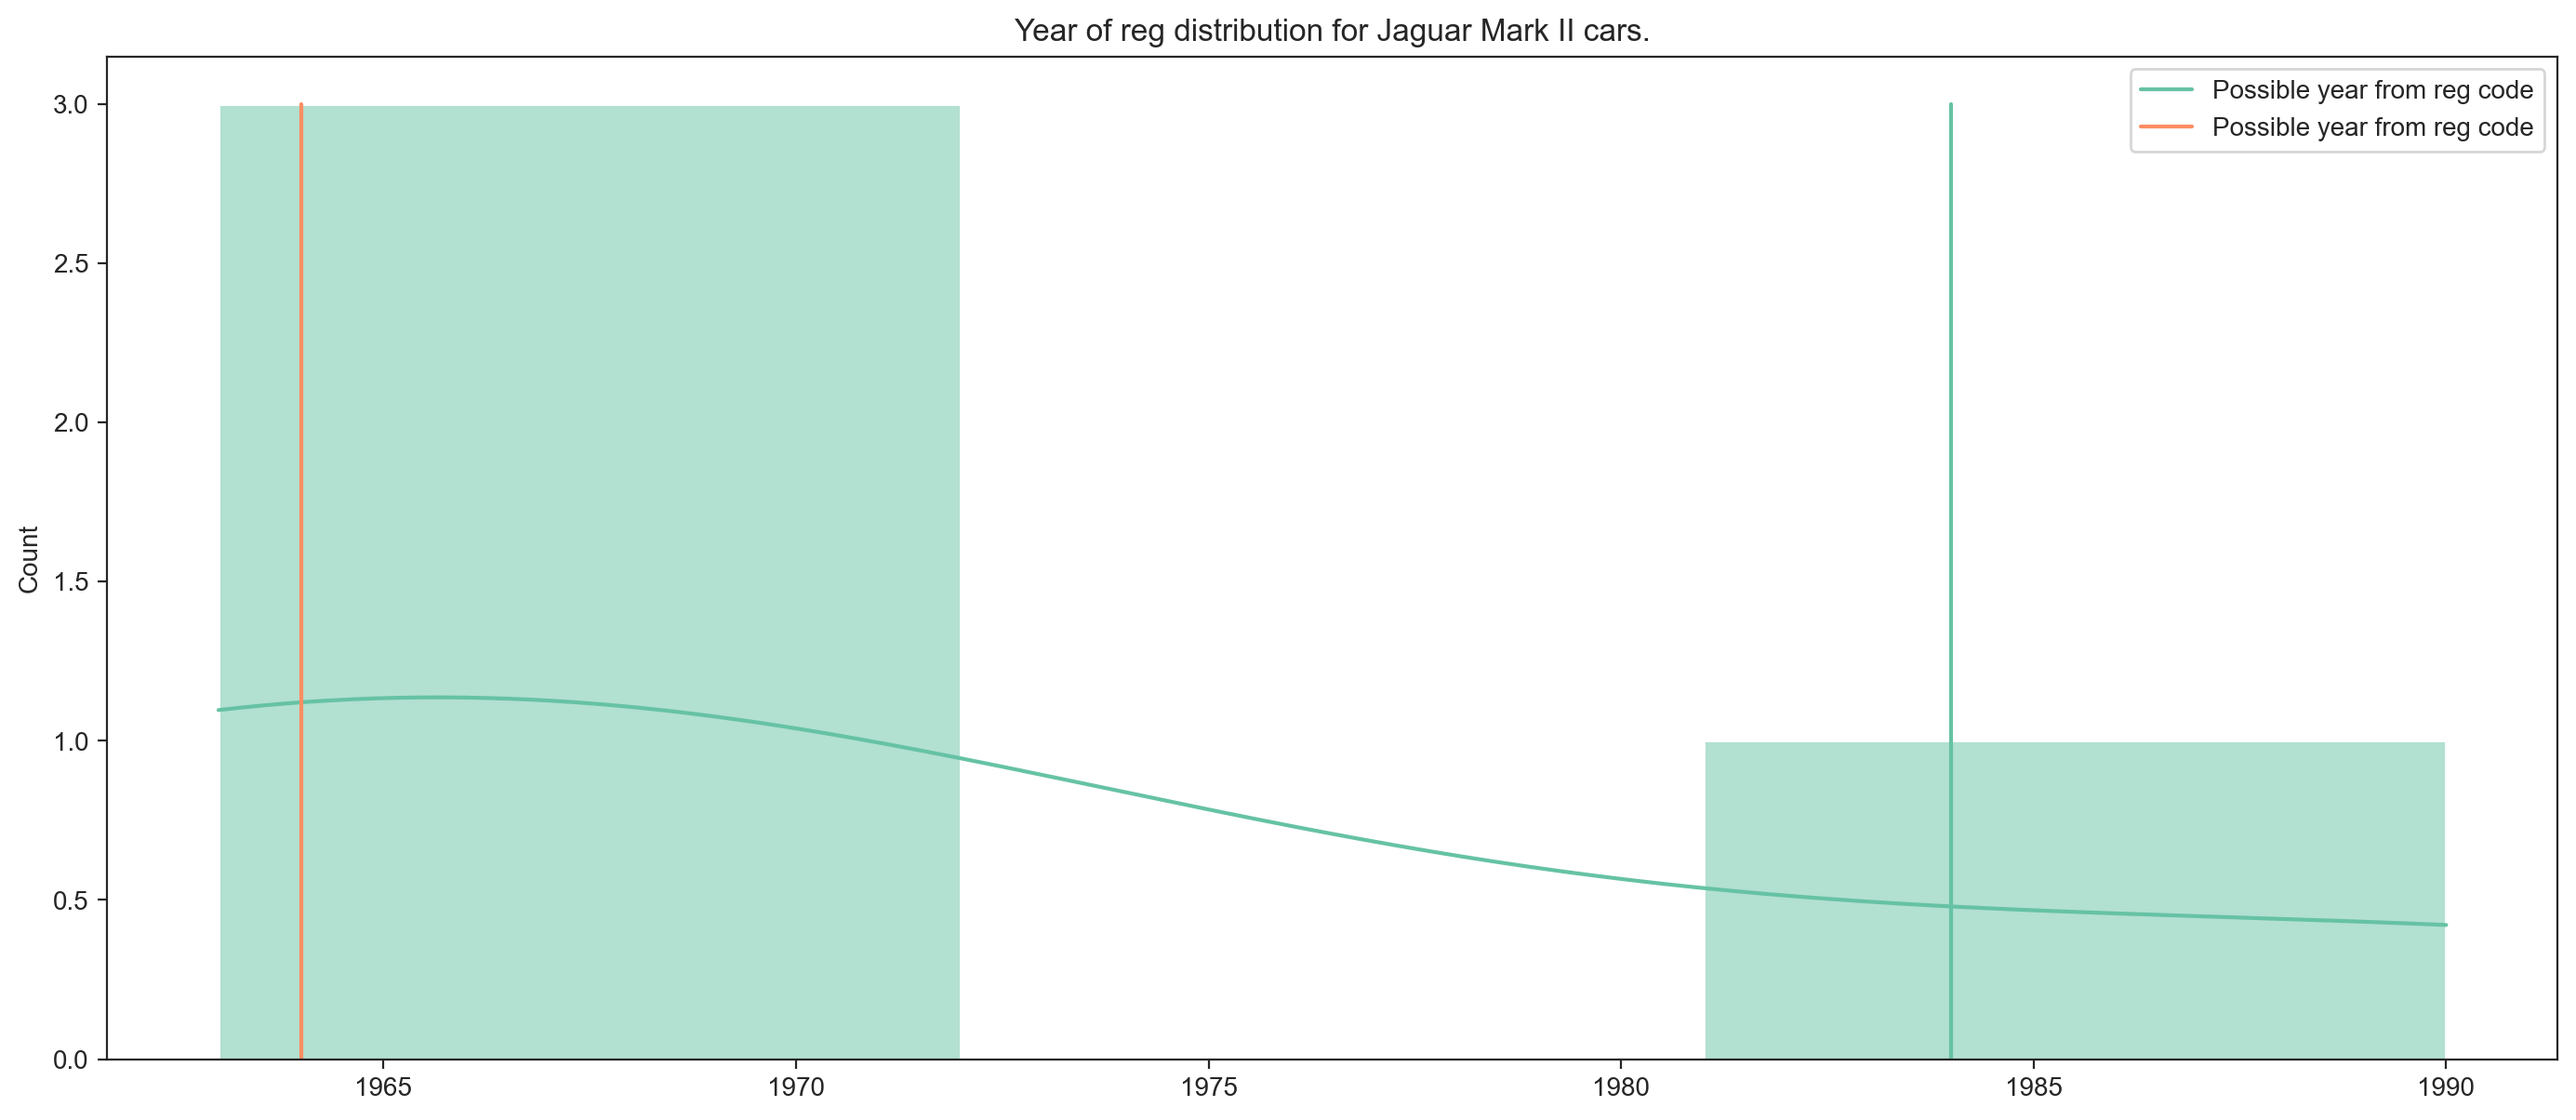

Mean year 2001.7
Closest year: 1996


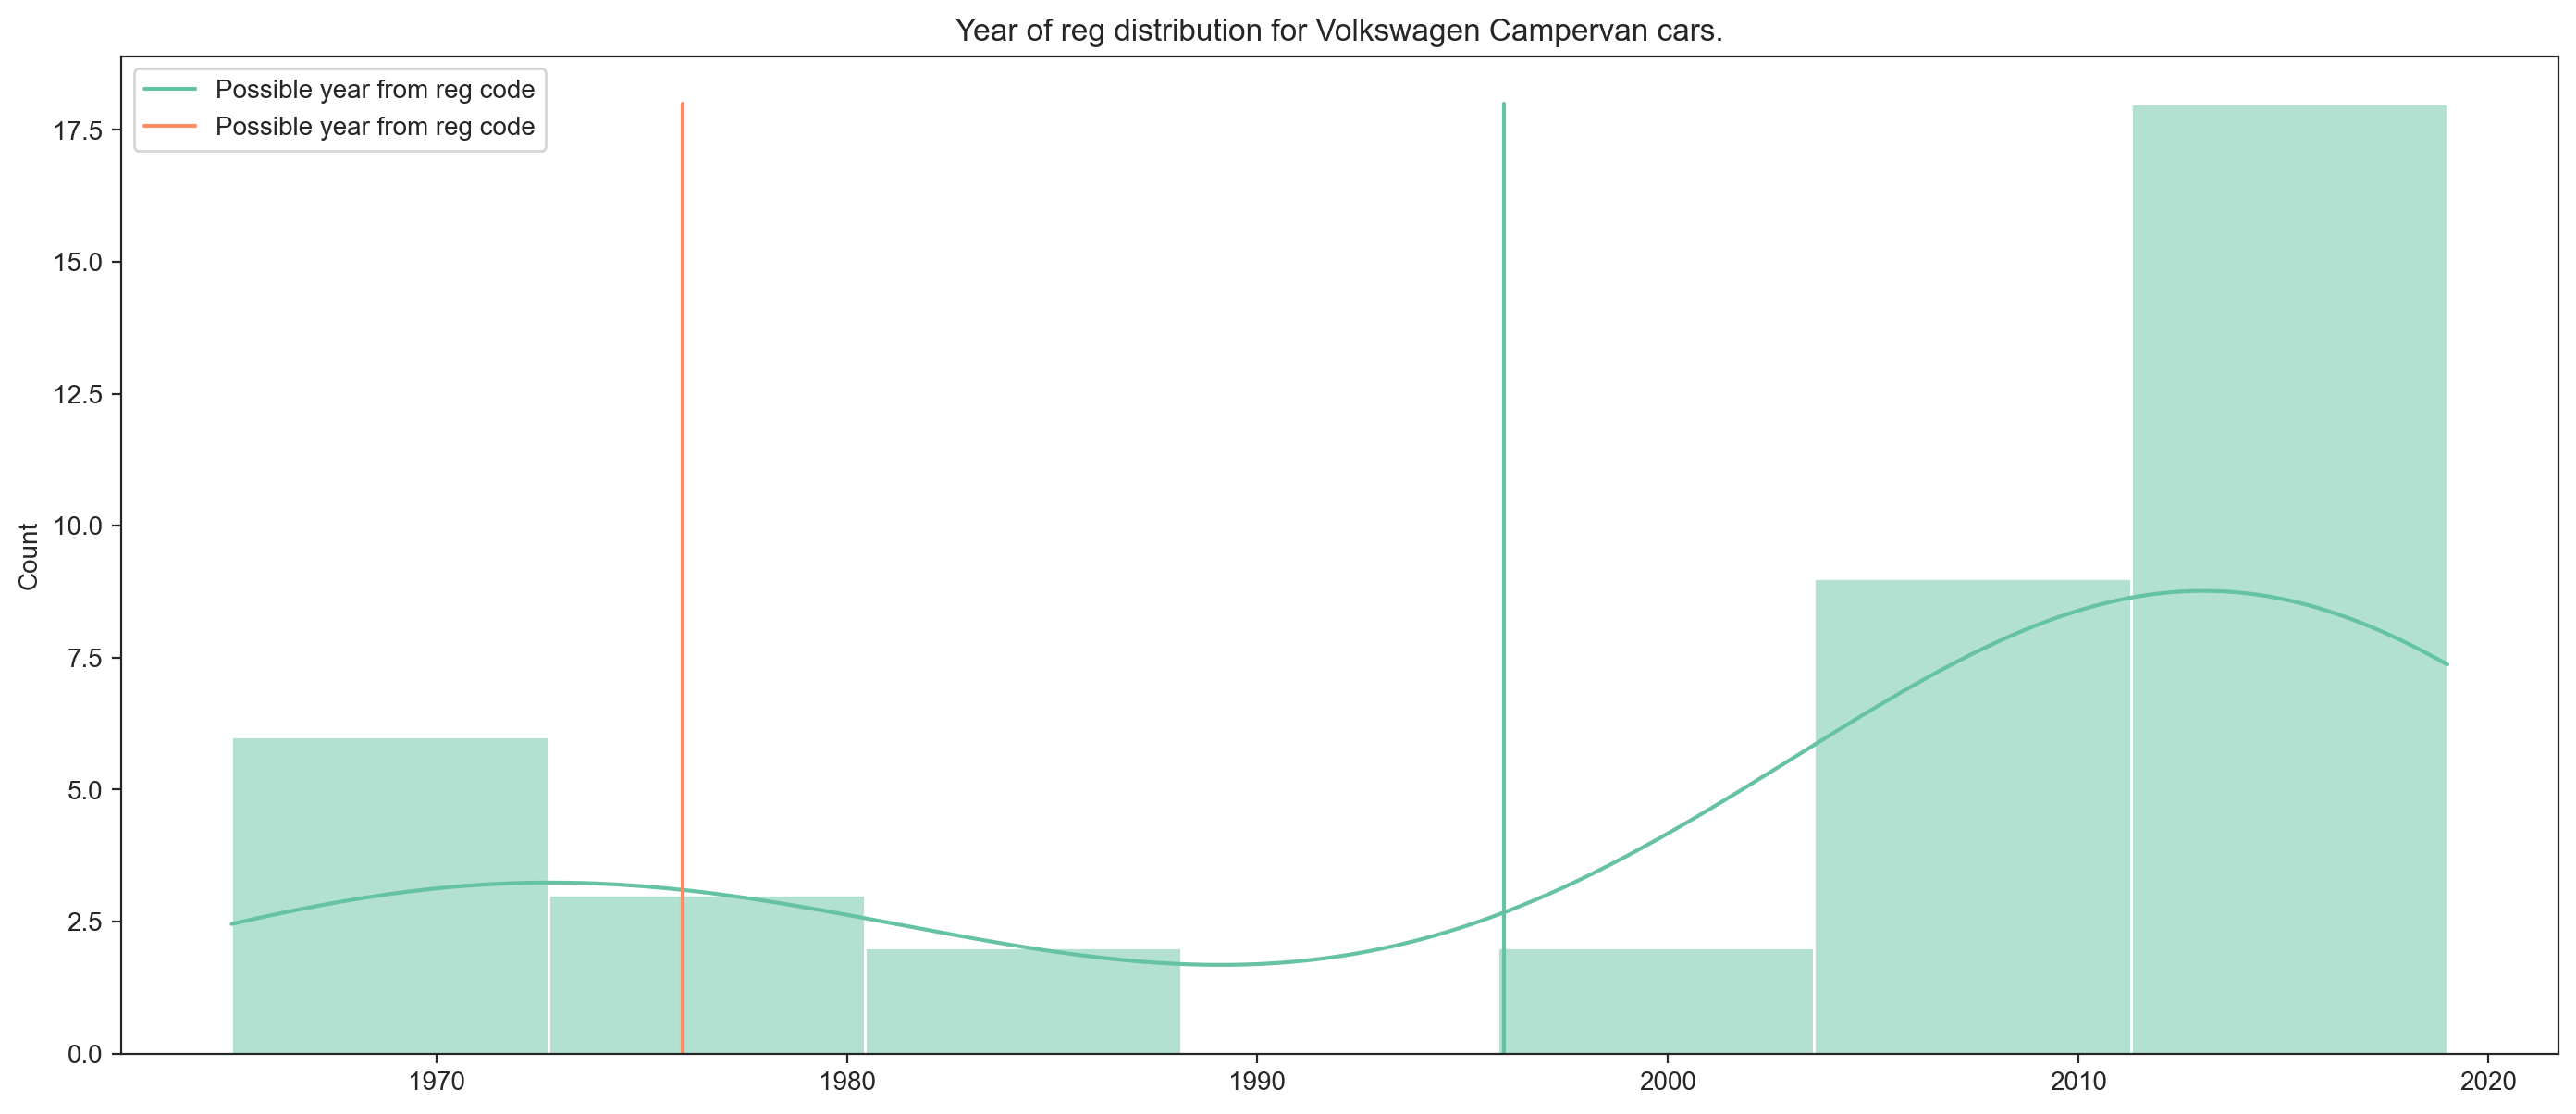

Mean year nan
Closest year: 1967


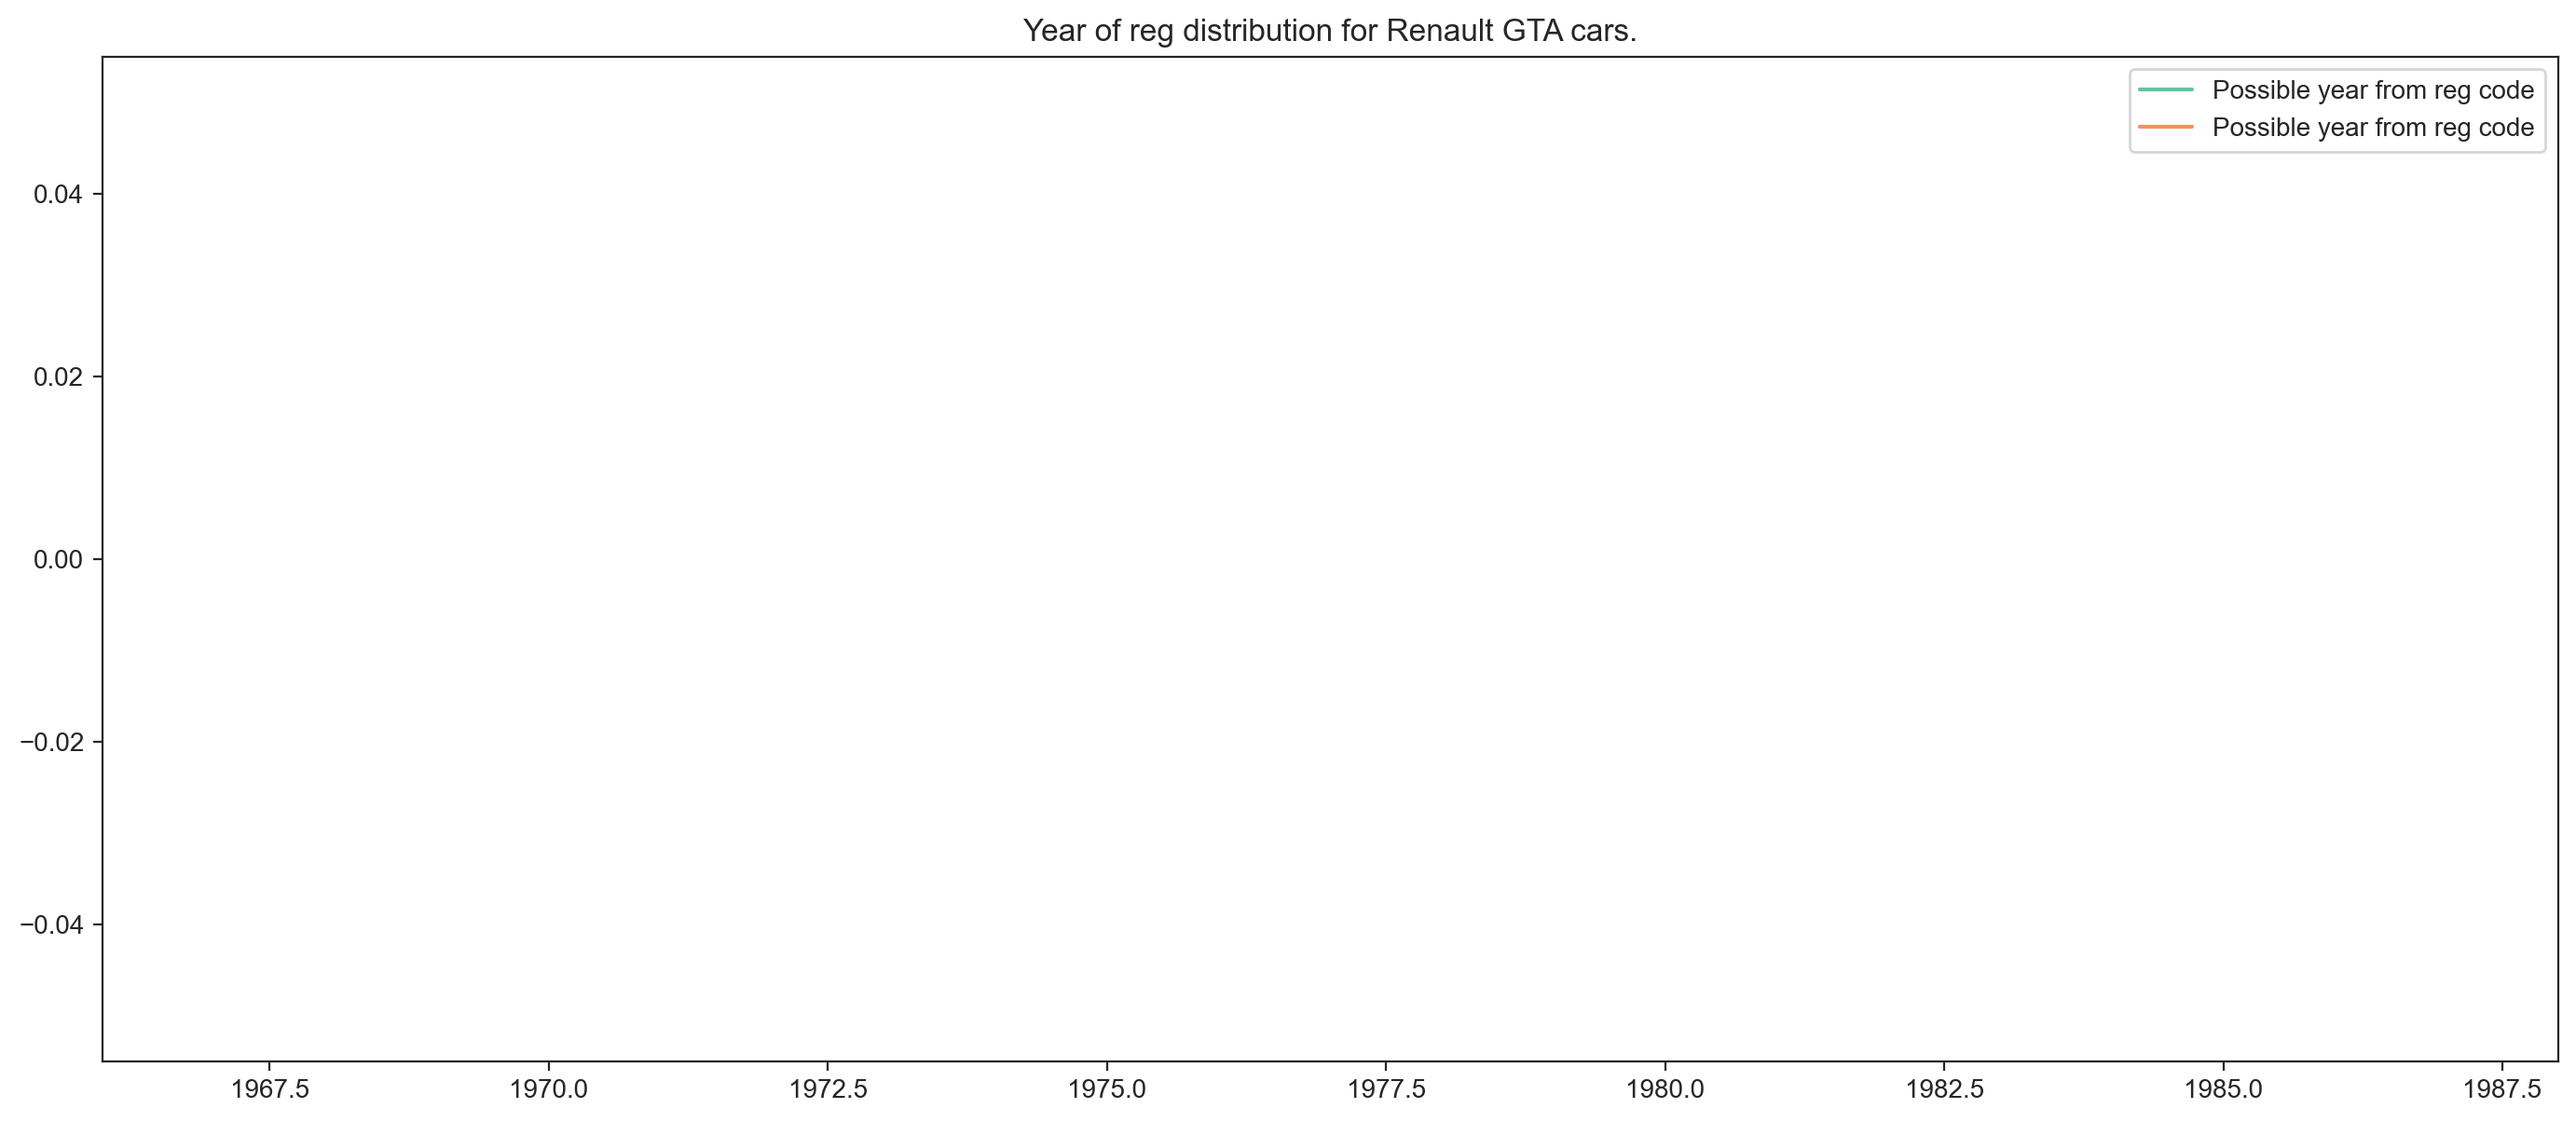

Mean year 2015.600145137881
Closest year: 1997


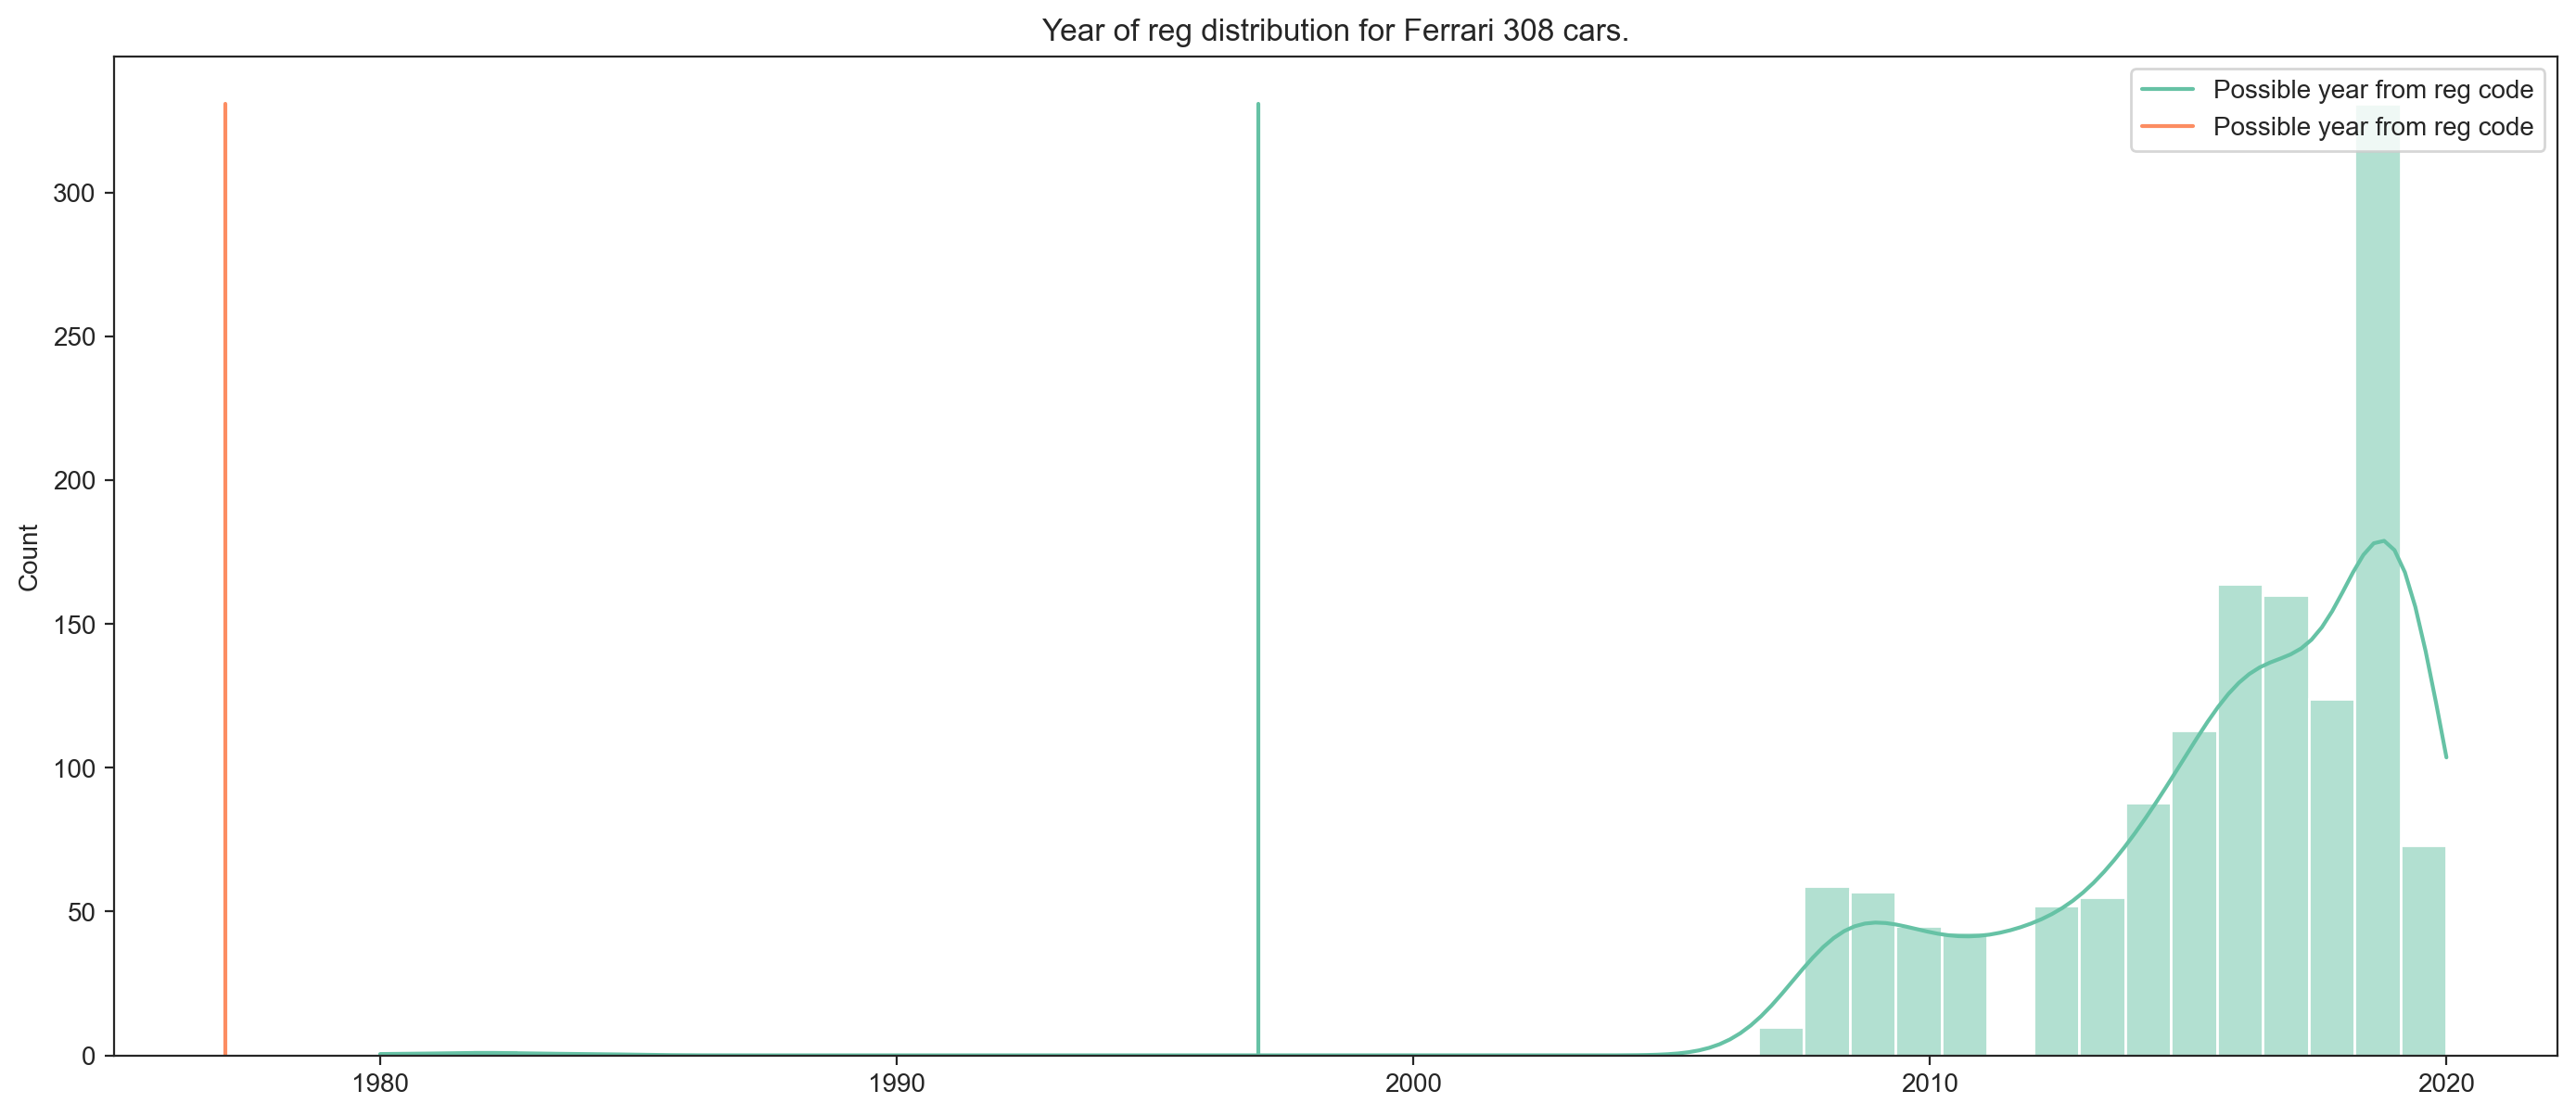

Mean year 2014.5841155234657
Closest year: 1997


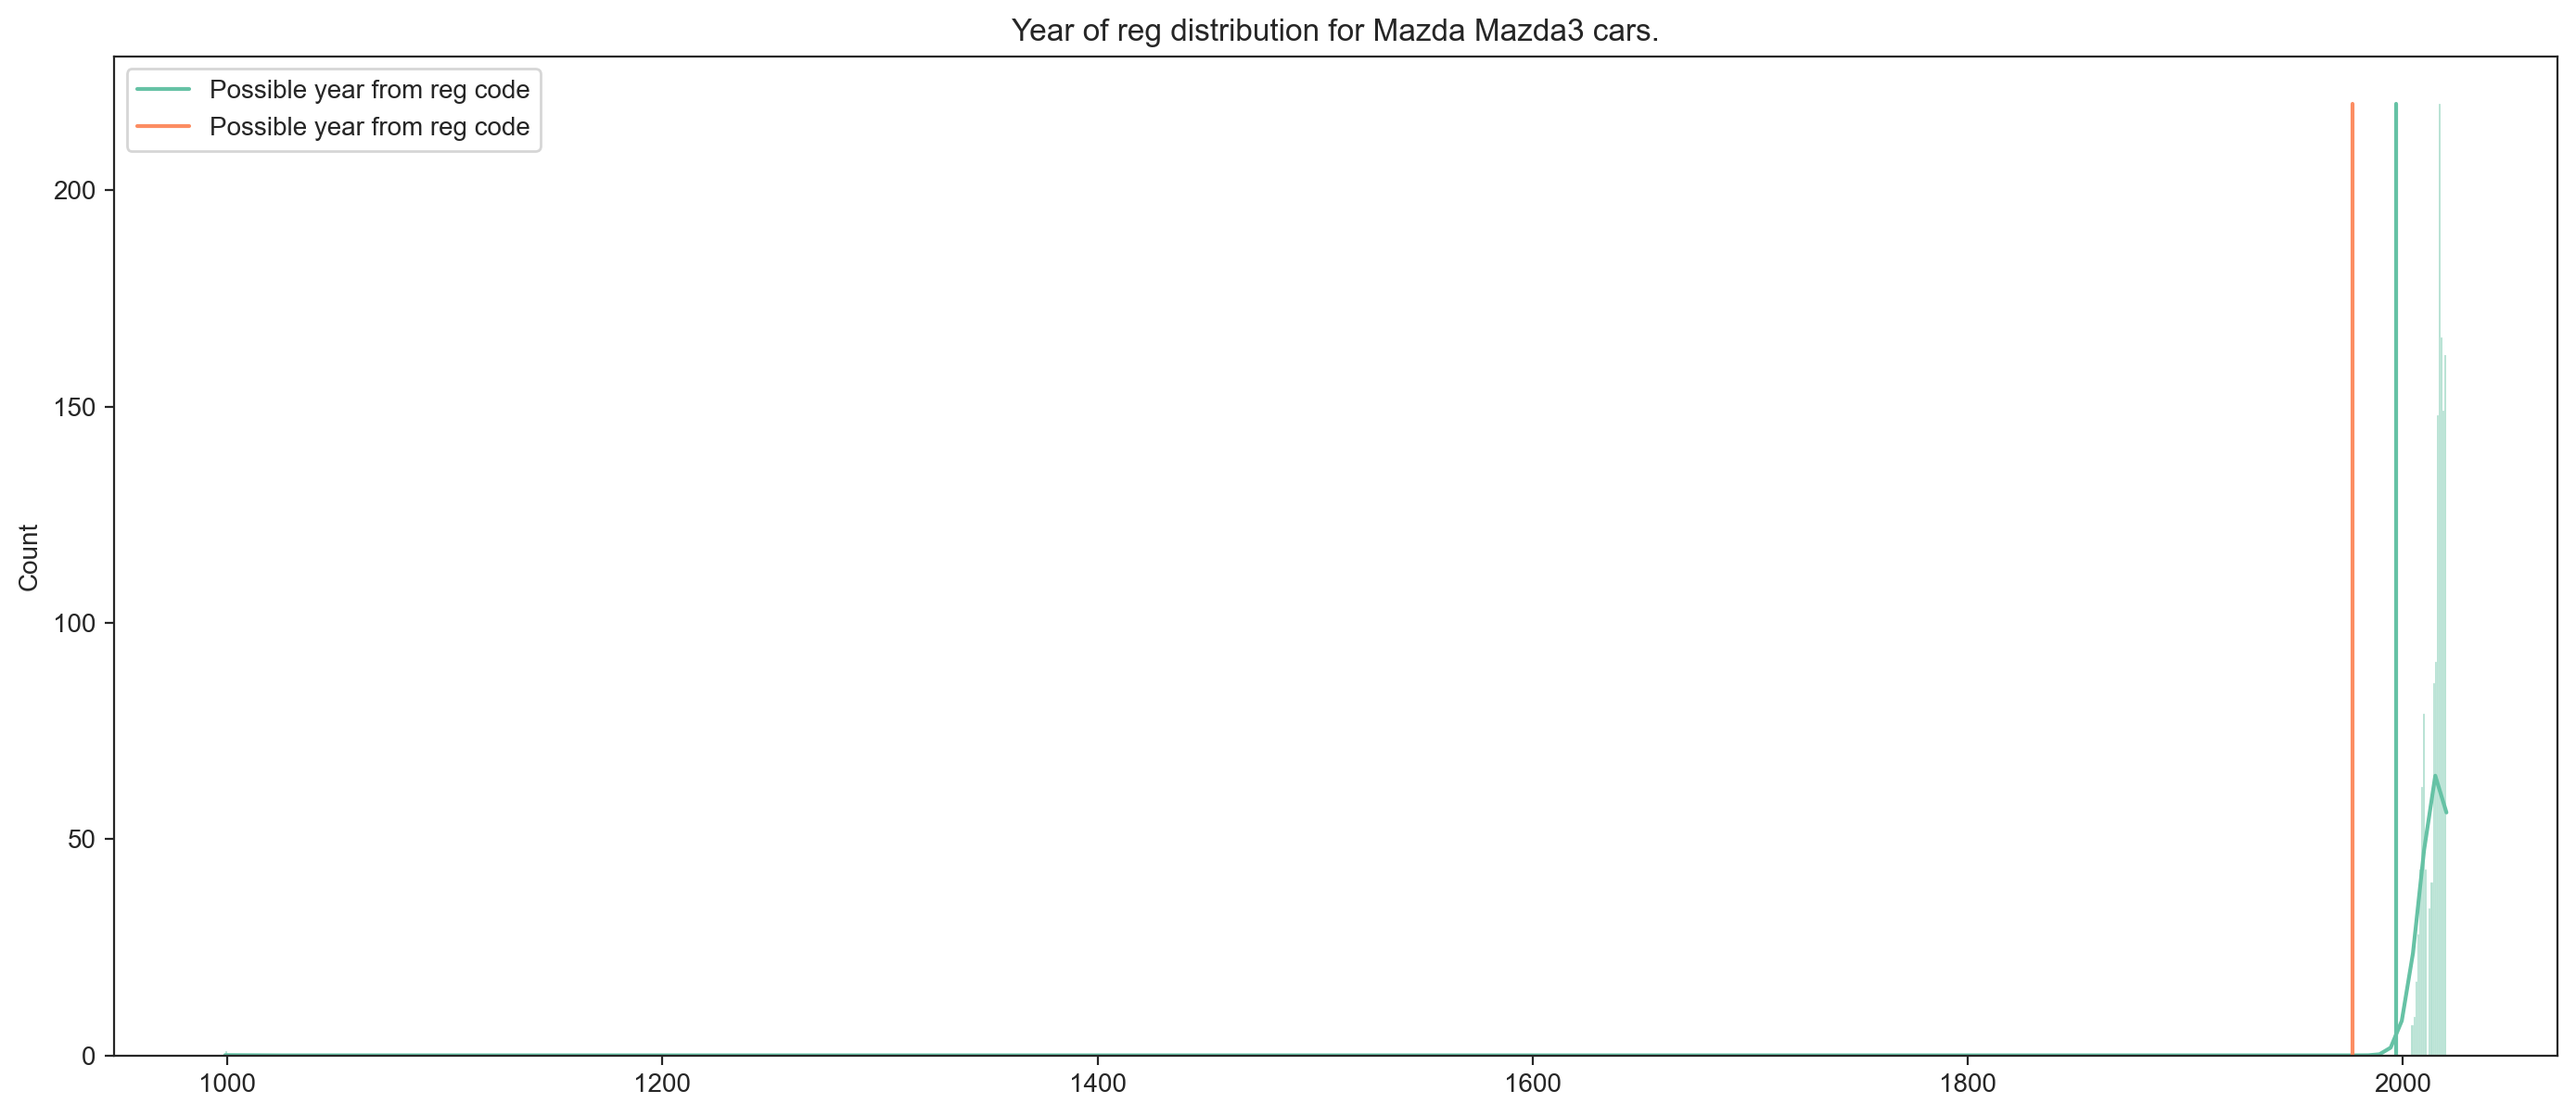

Mean year 2005.5
Closest year: 1993


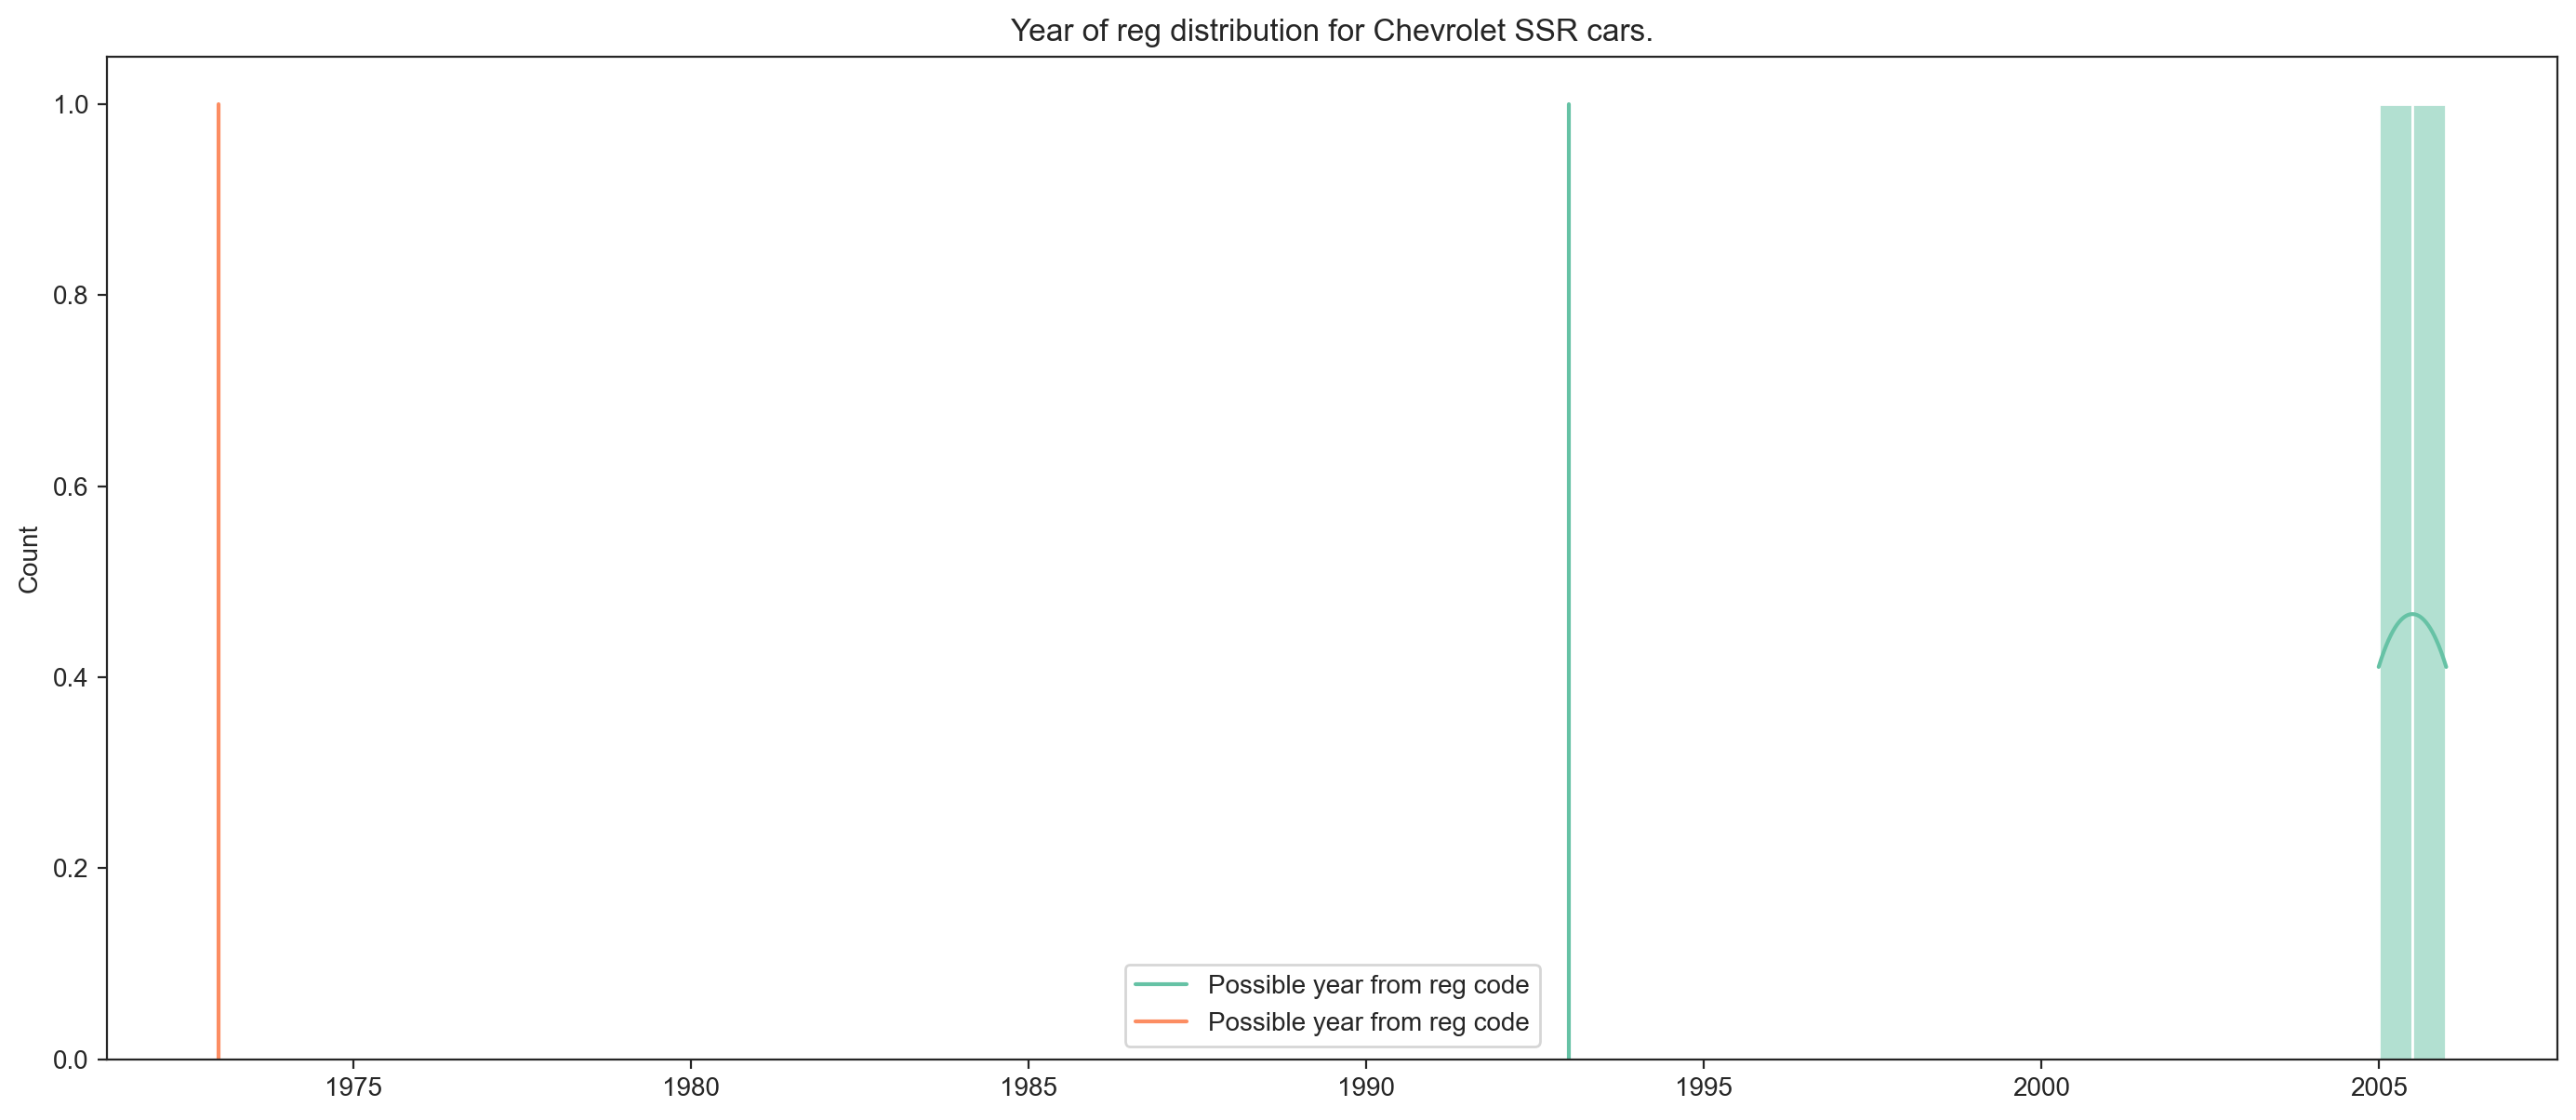

Mean year 1968.875
Closest year: 1967


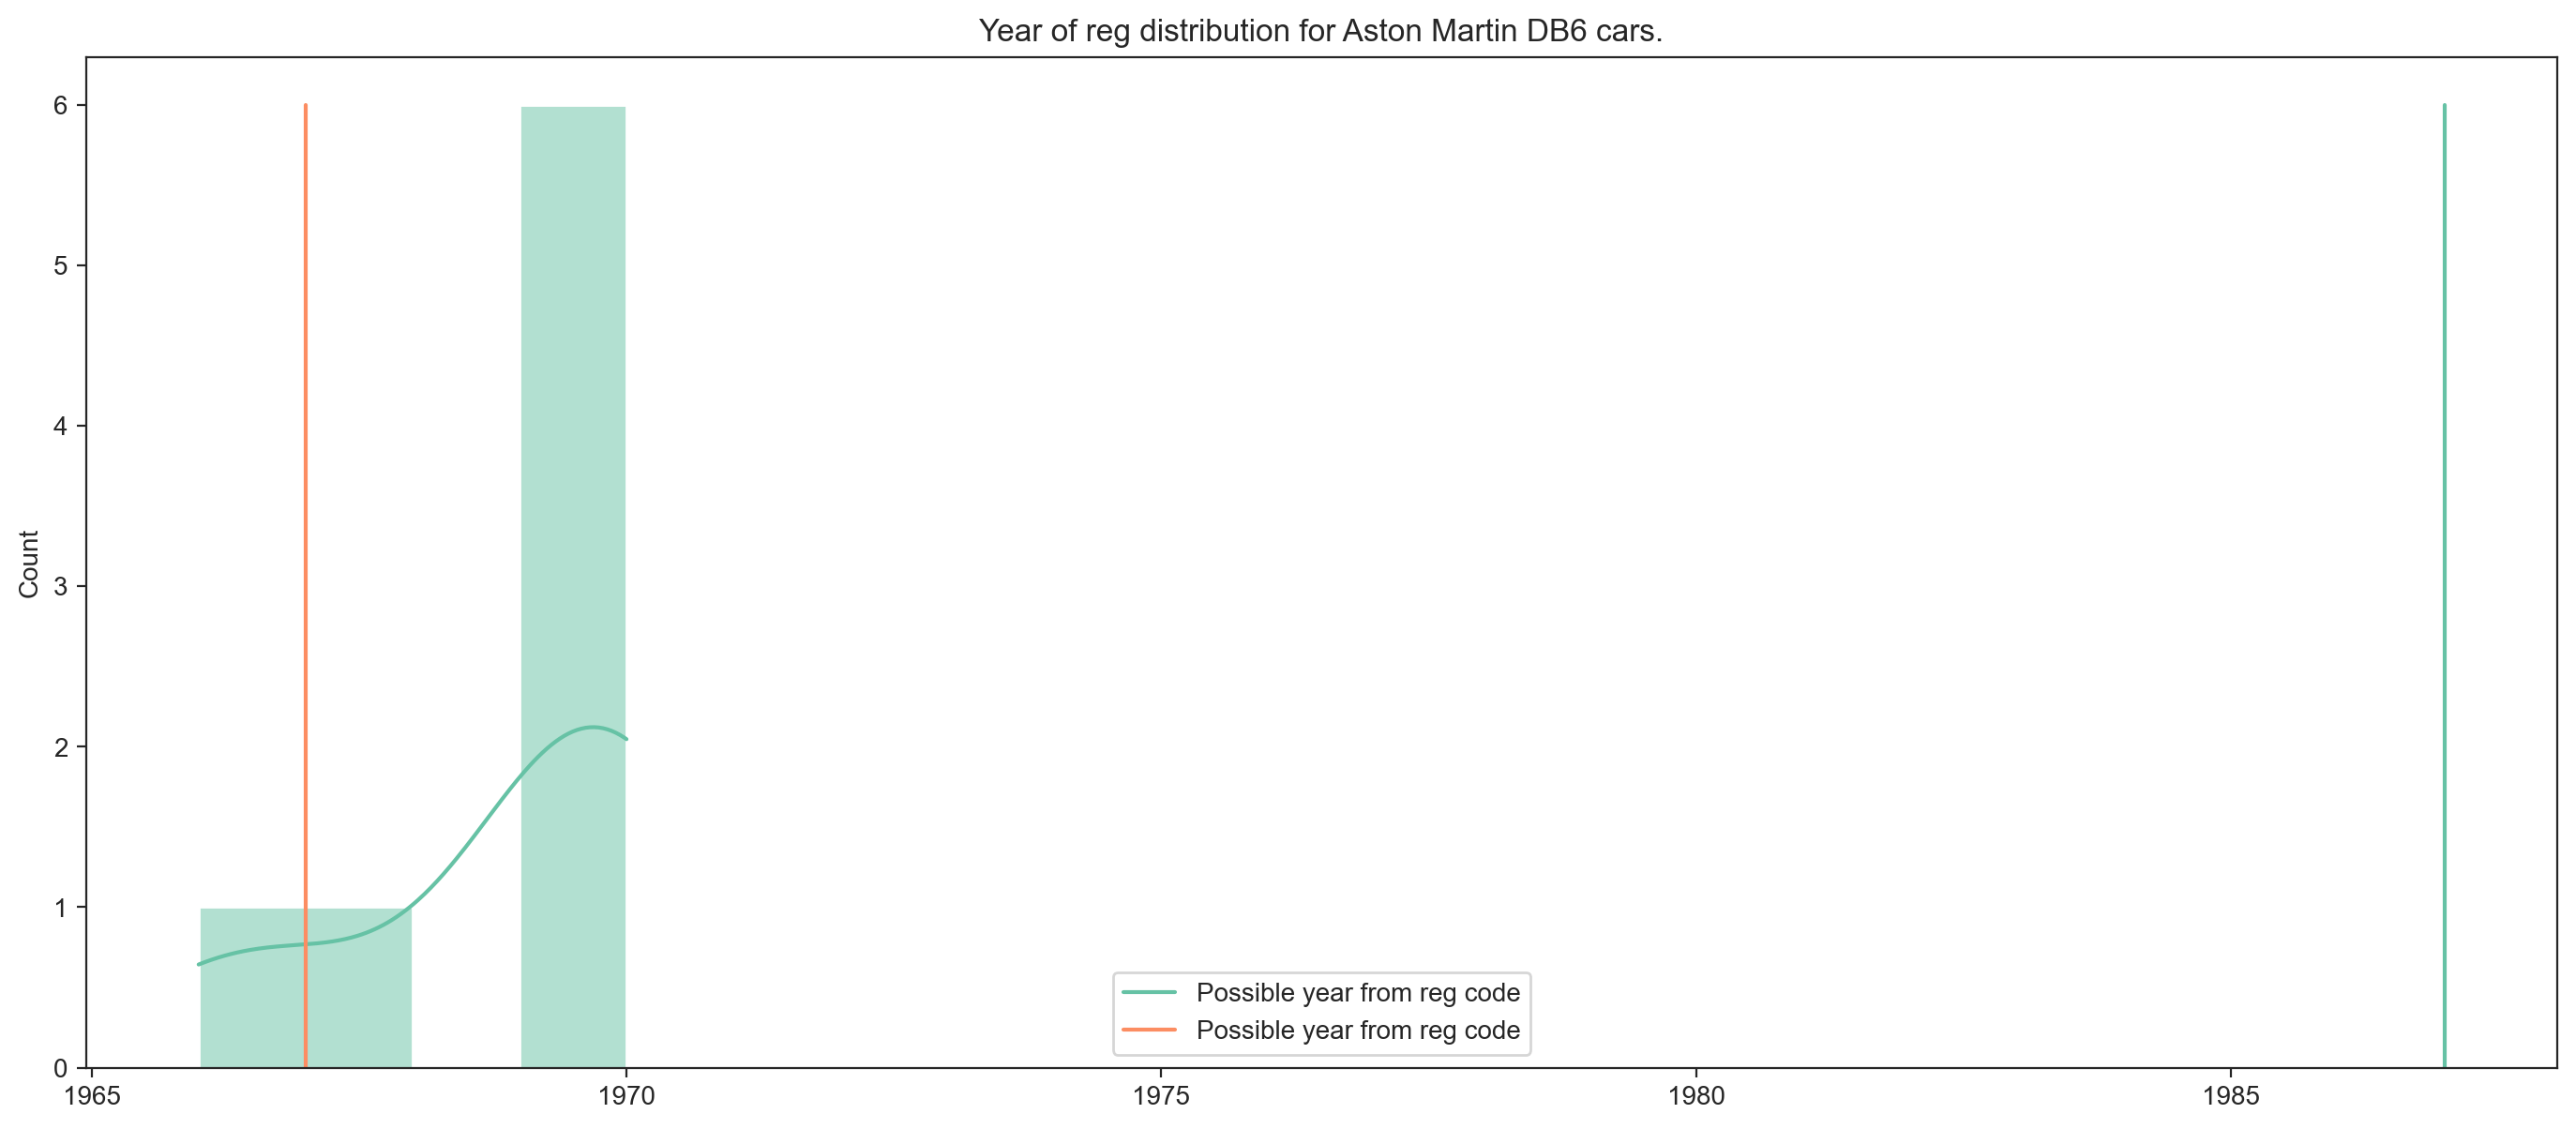

Mean year 1978.5
Closest year: 1984


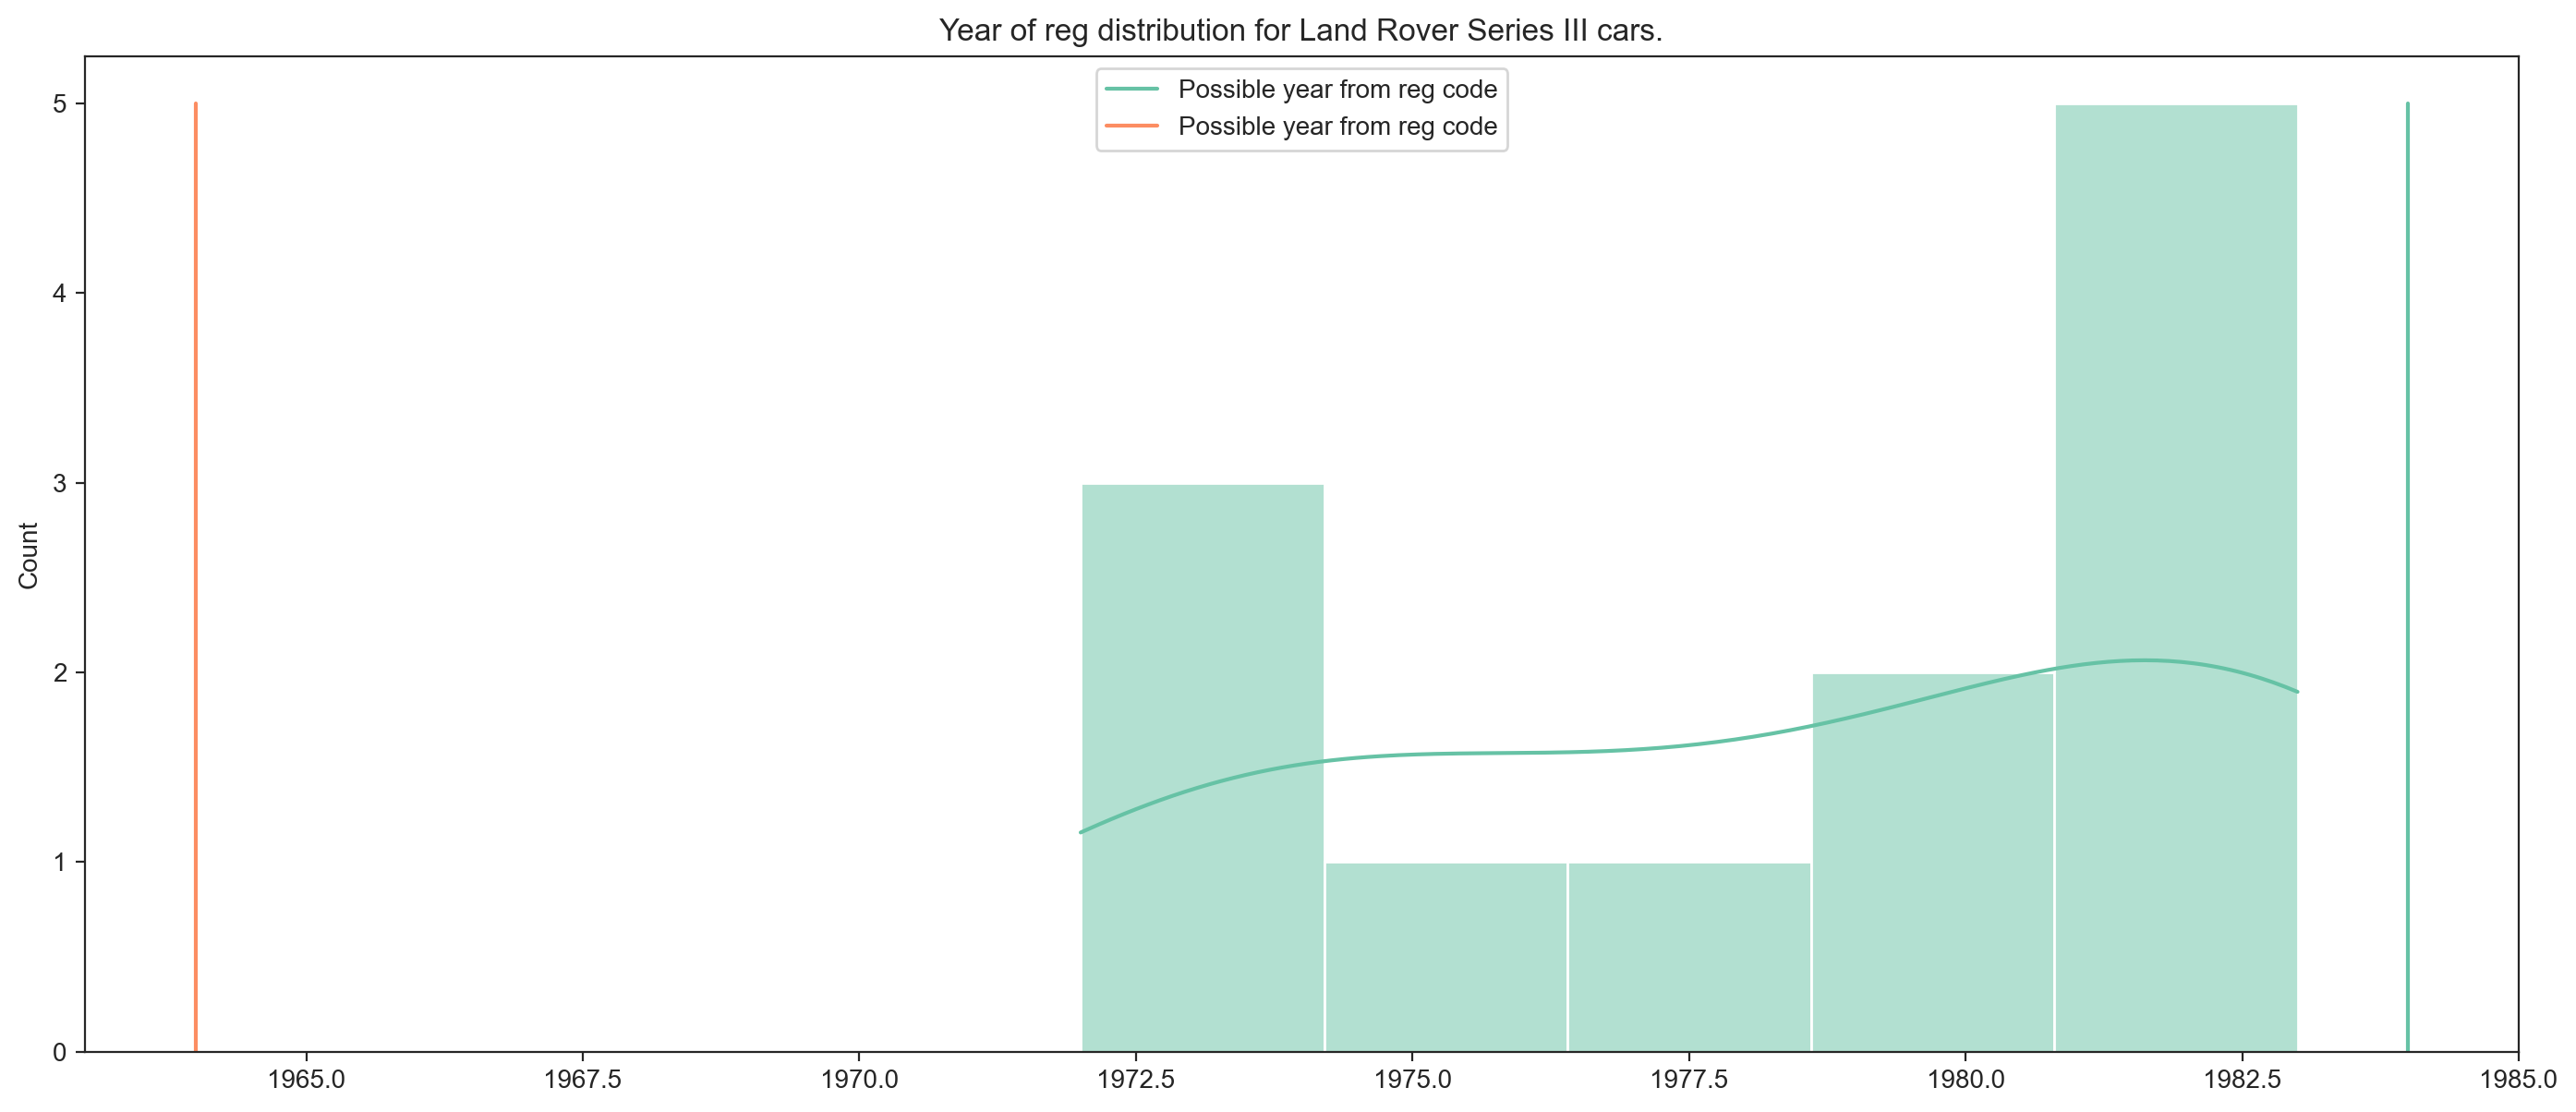

Mean year 2015.0565268065268
Closest year: 1987


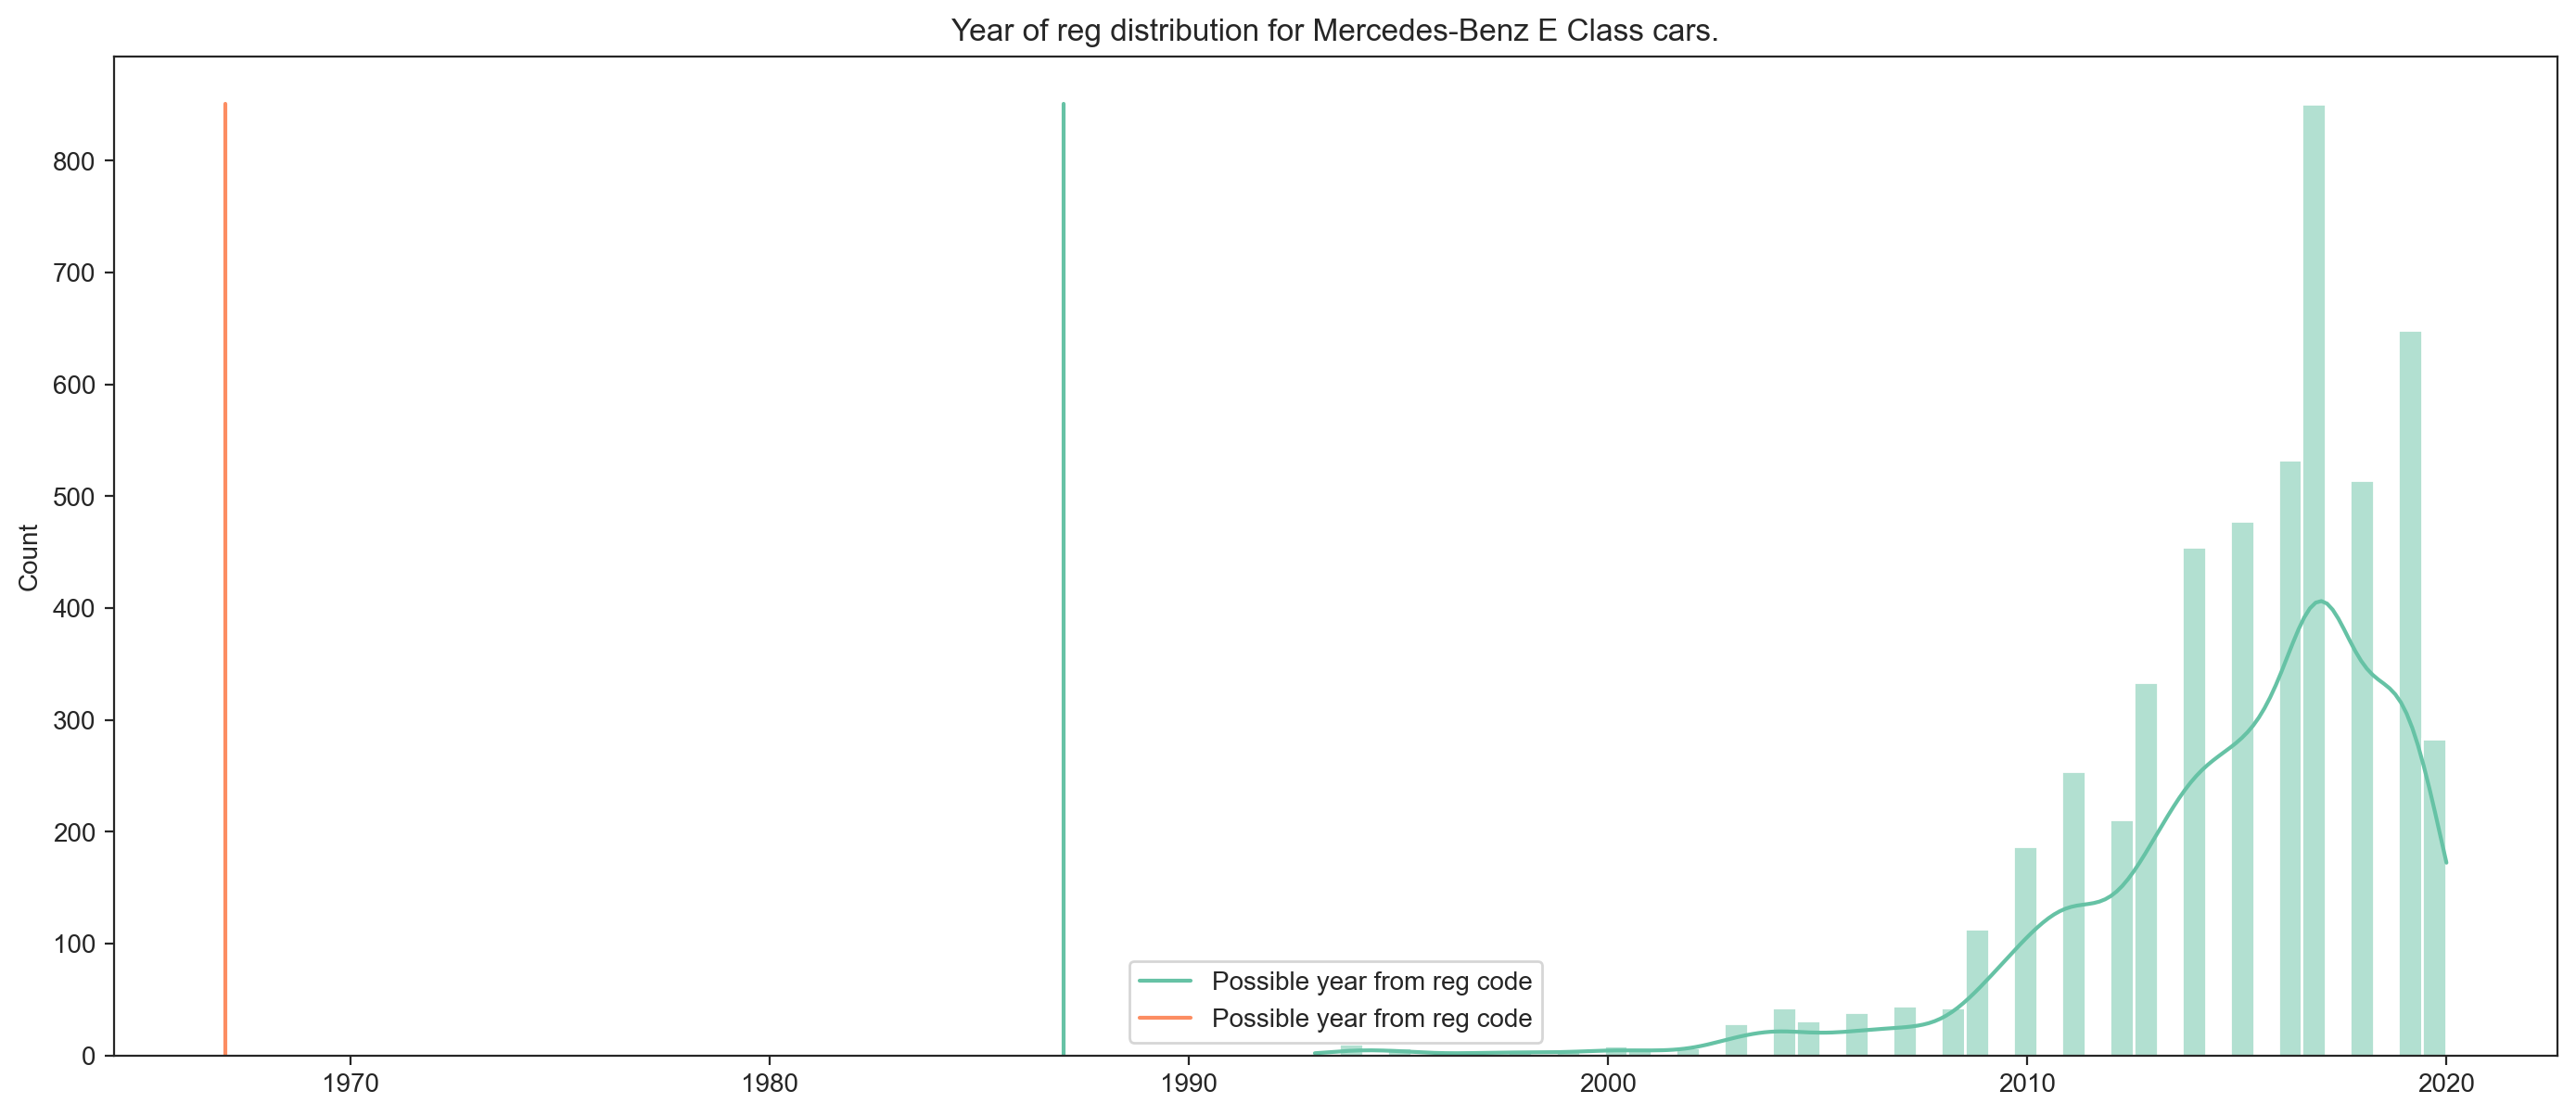

Mean year 2015.2166666666667
Closest year: 1985


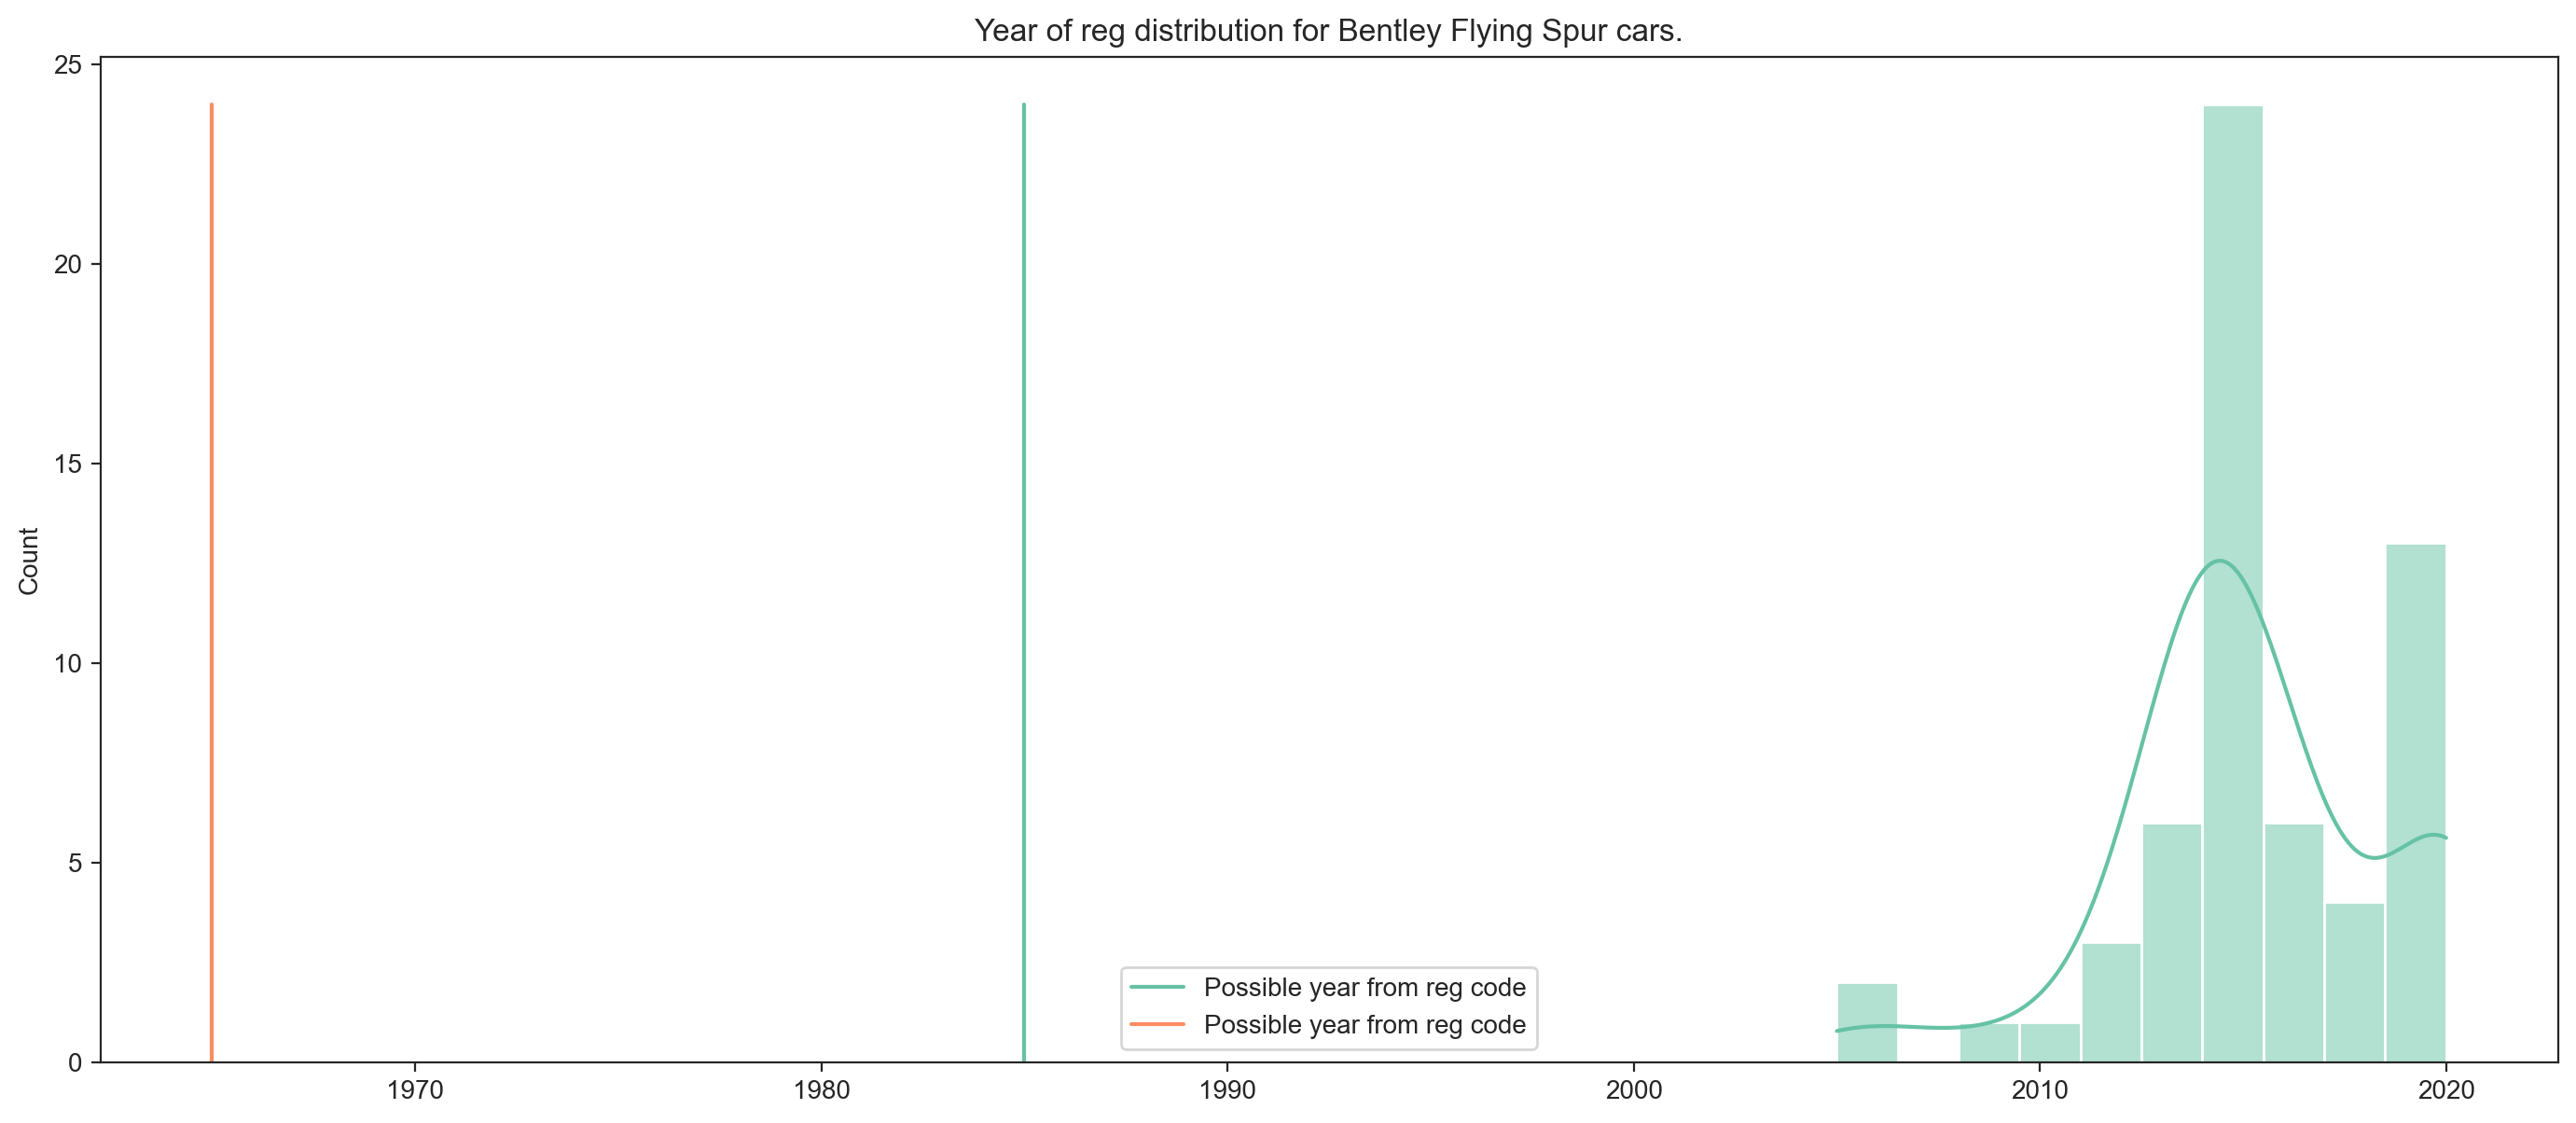

Mean year 2009.48664495114
Closest year: 2001


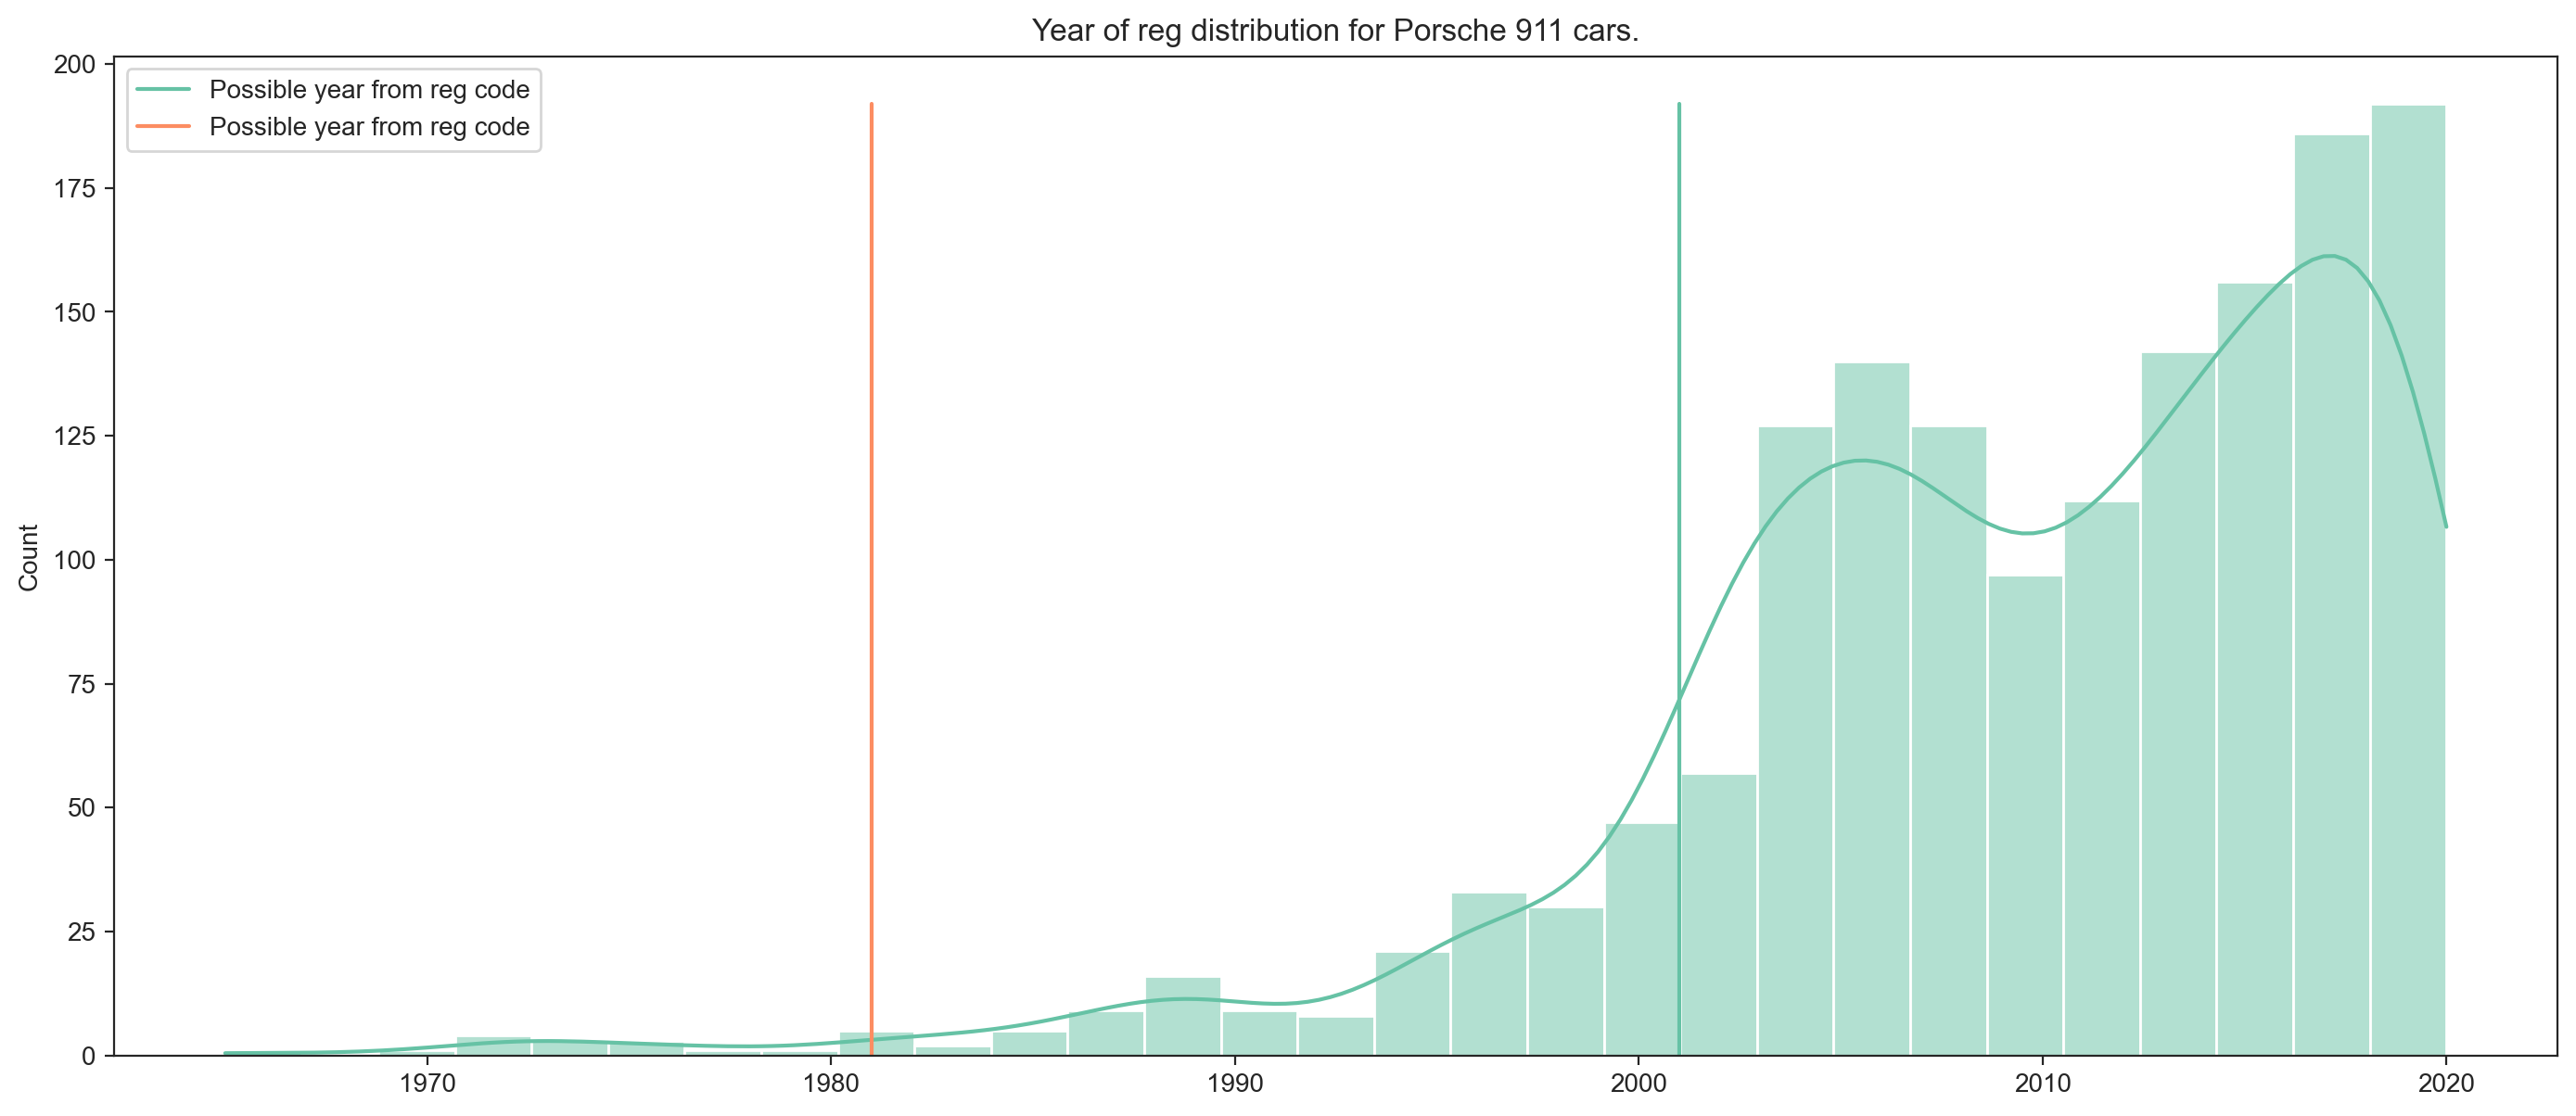

Mean year 2014.0355858648481
Closest year: 1993


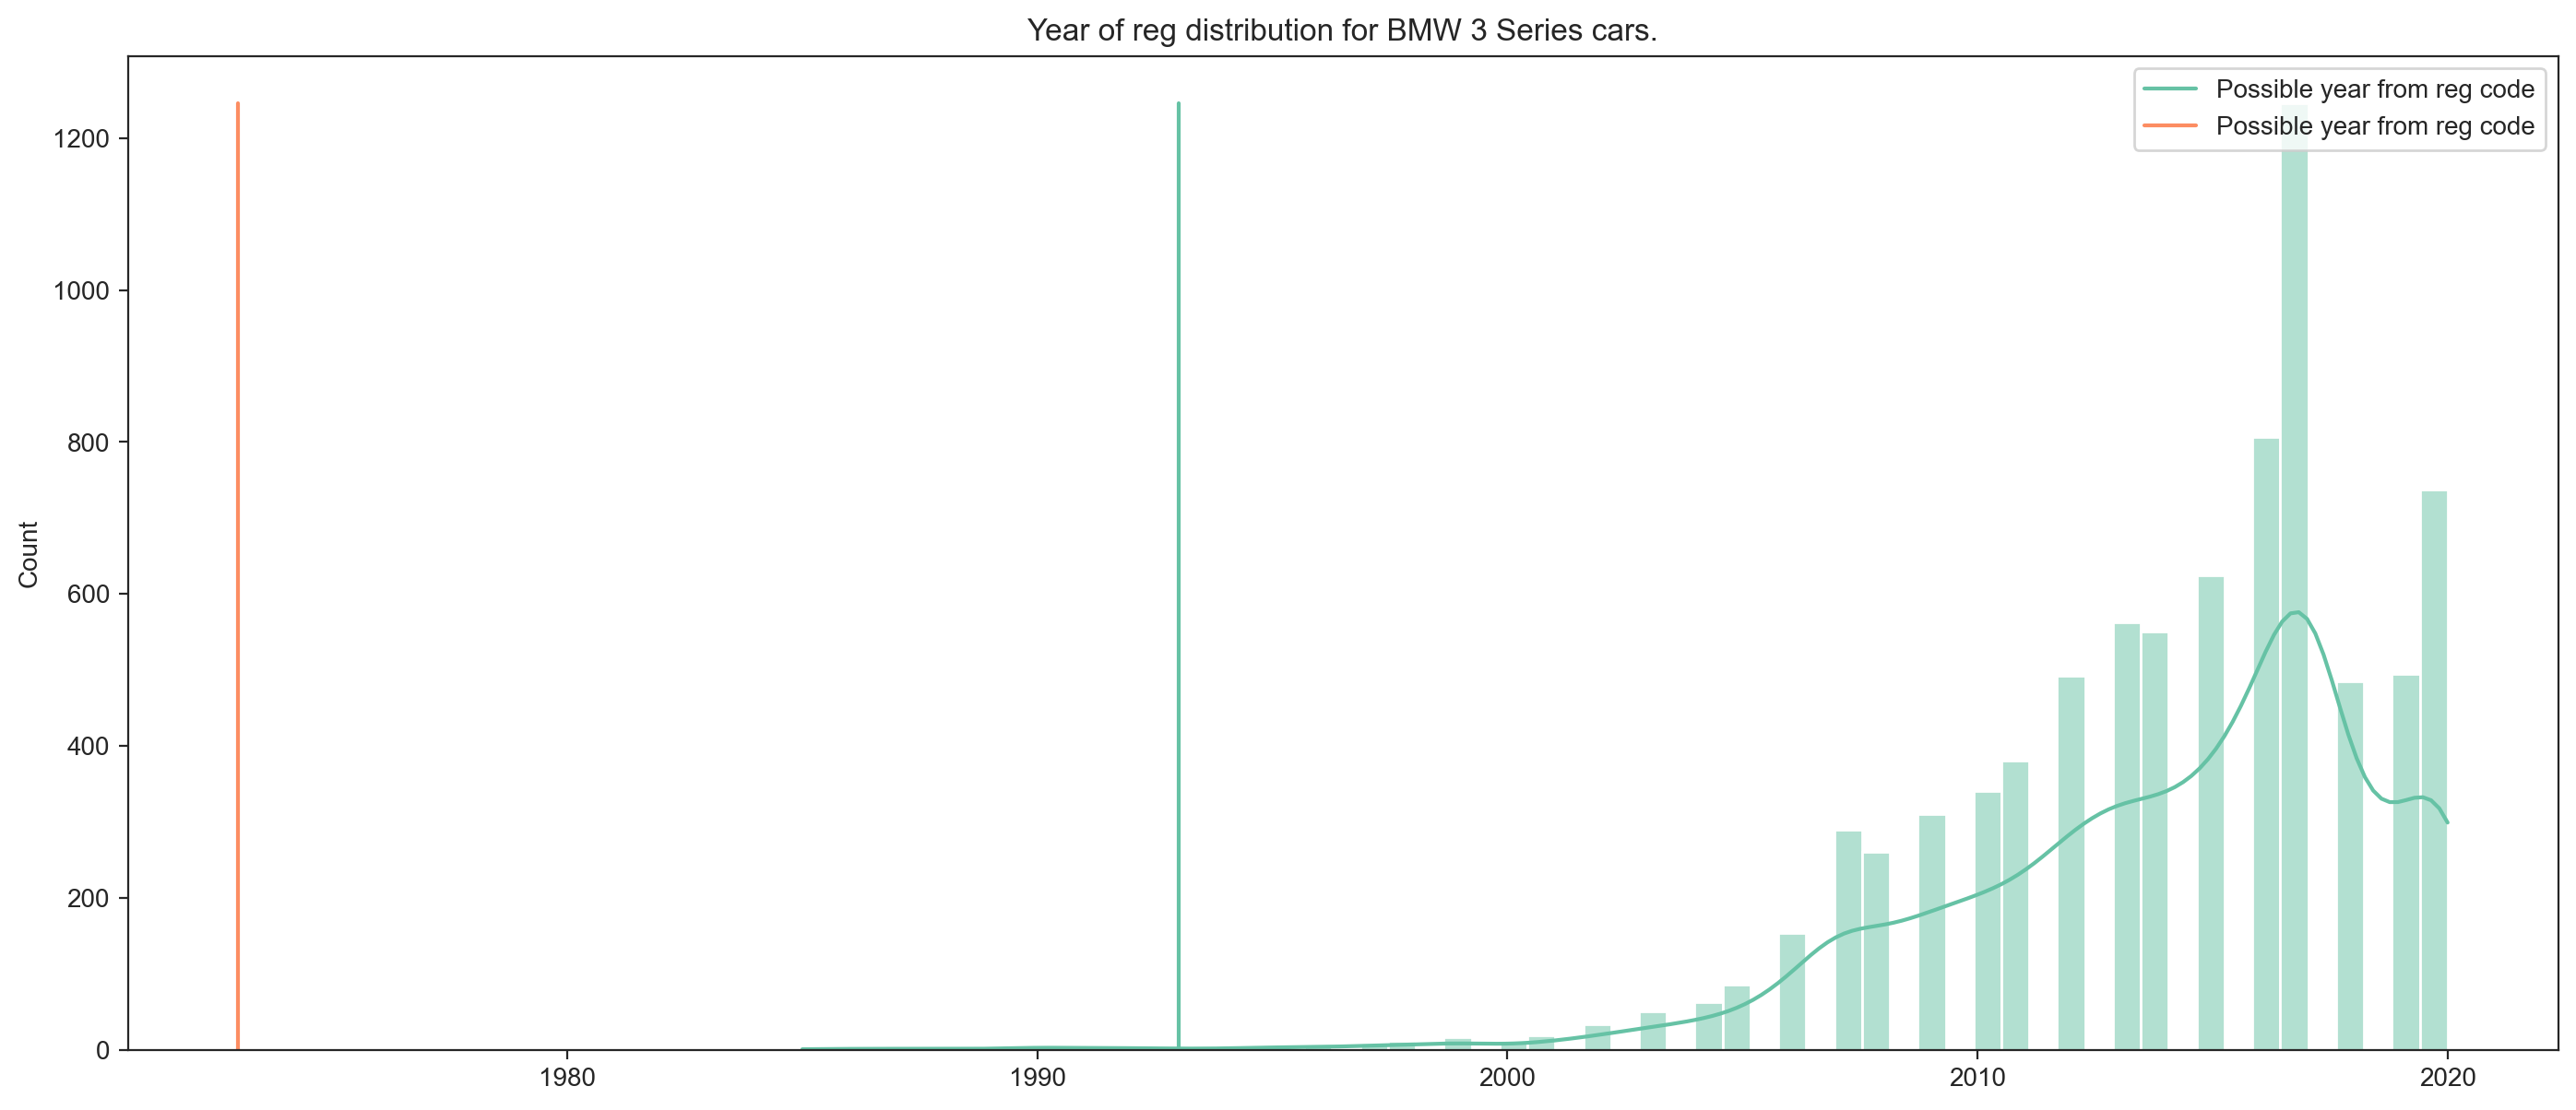

Mean year 2003.1818181818182
Closest year: 1997


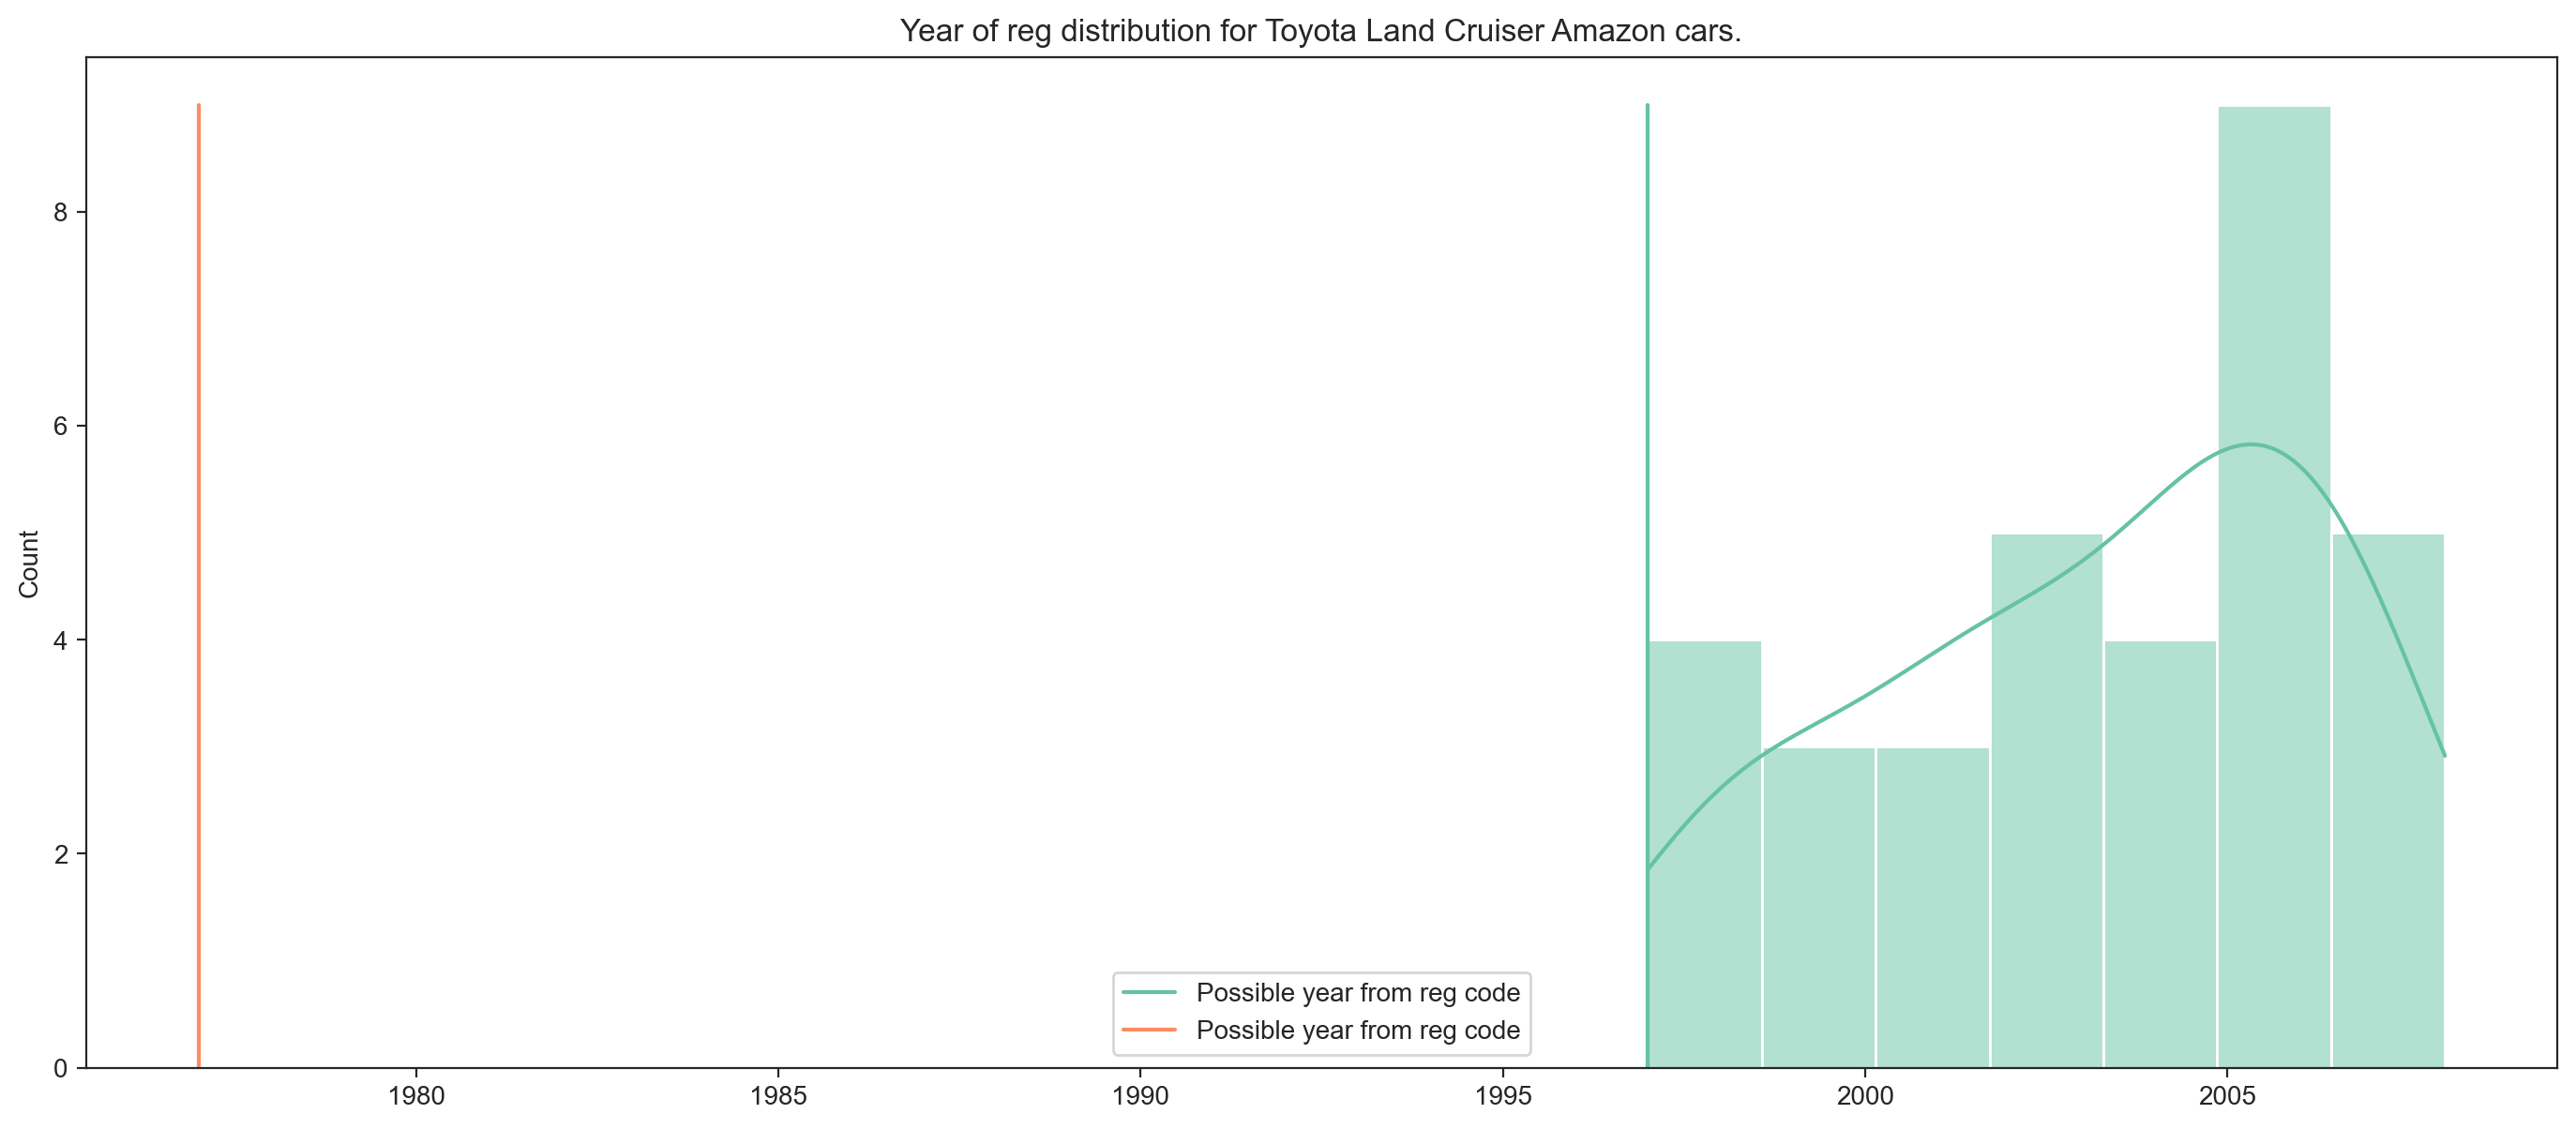

Mean year 1989.0
Closest year: 1987


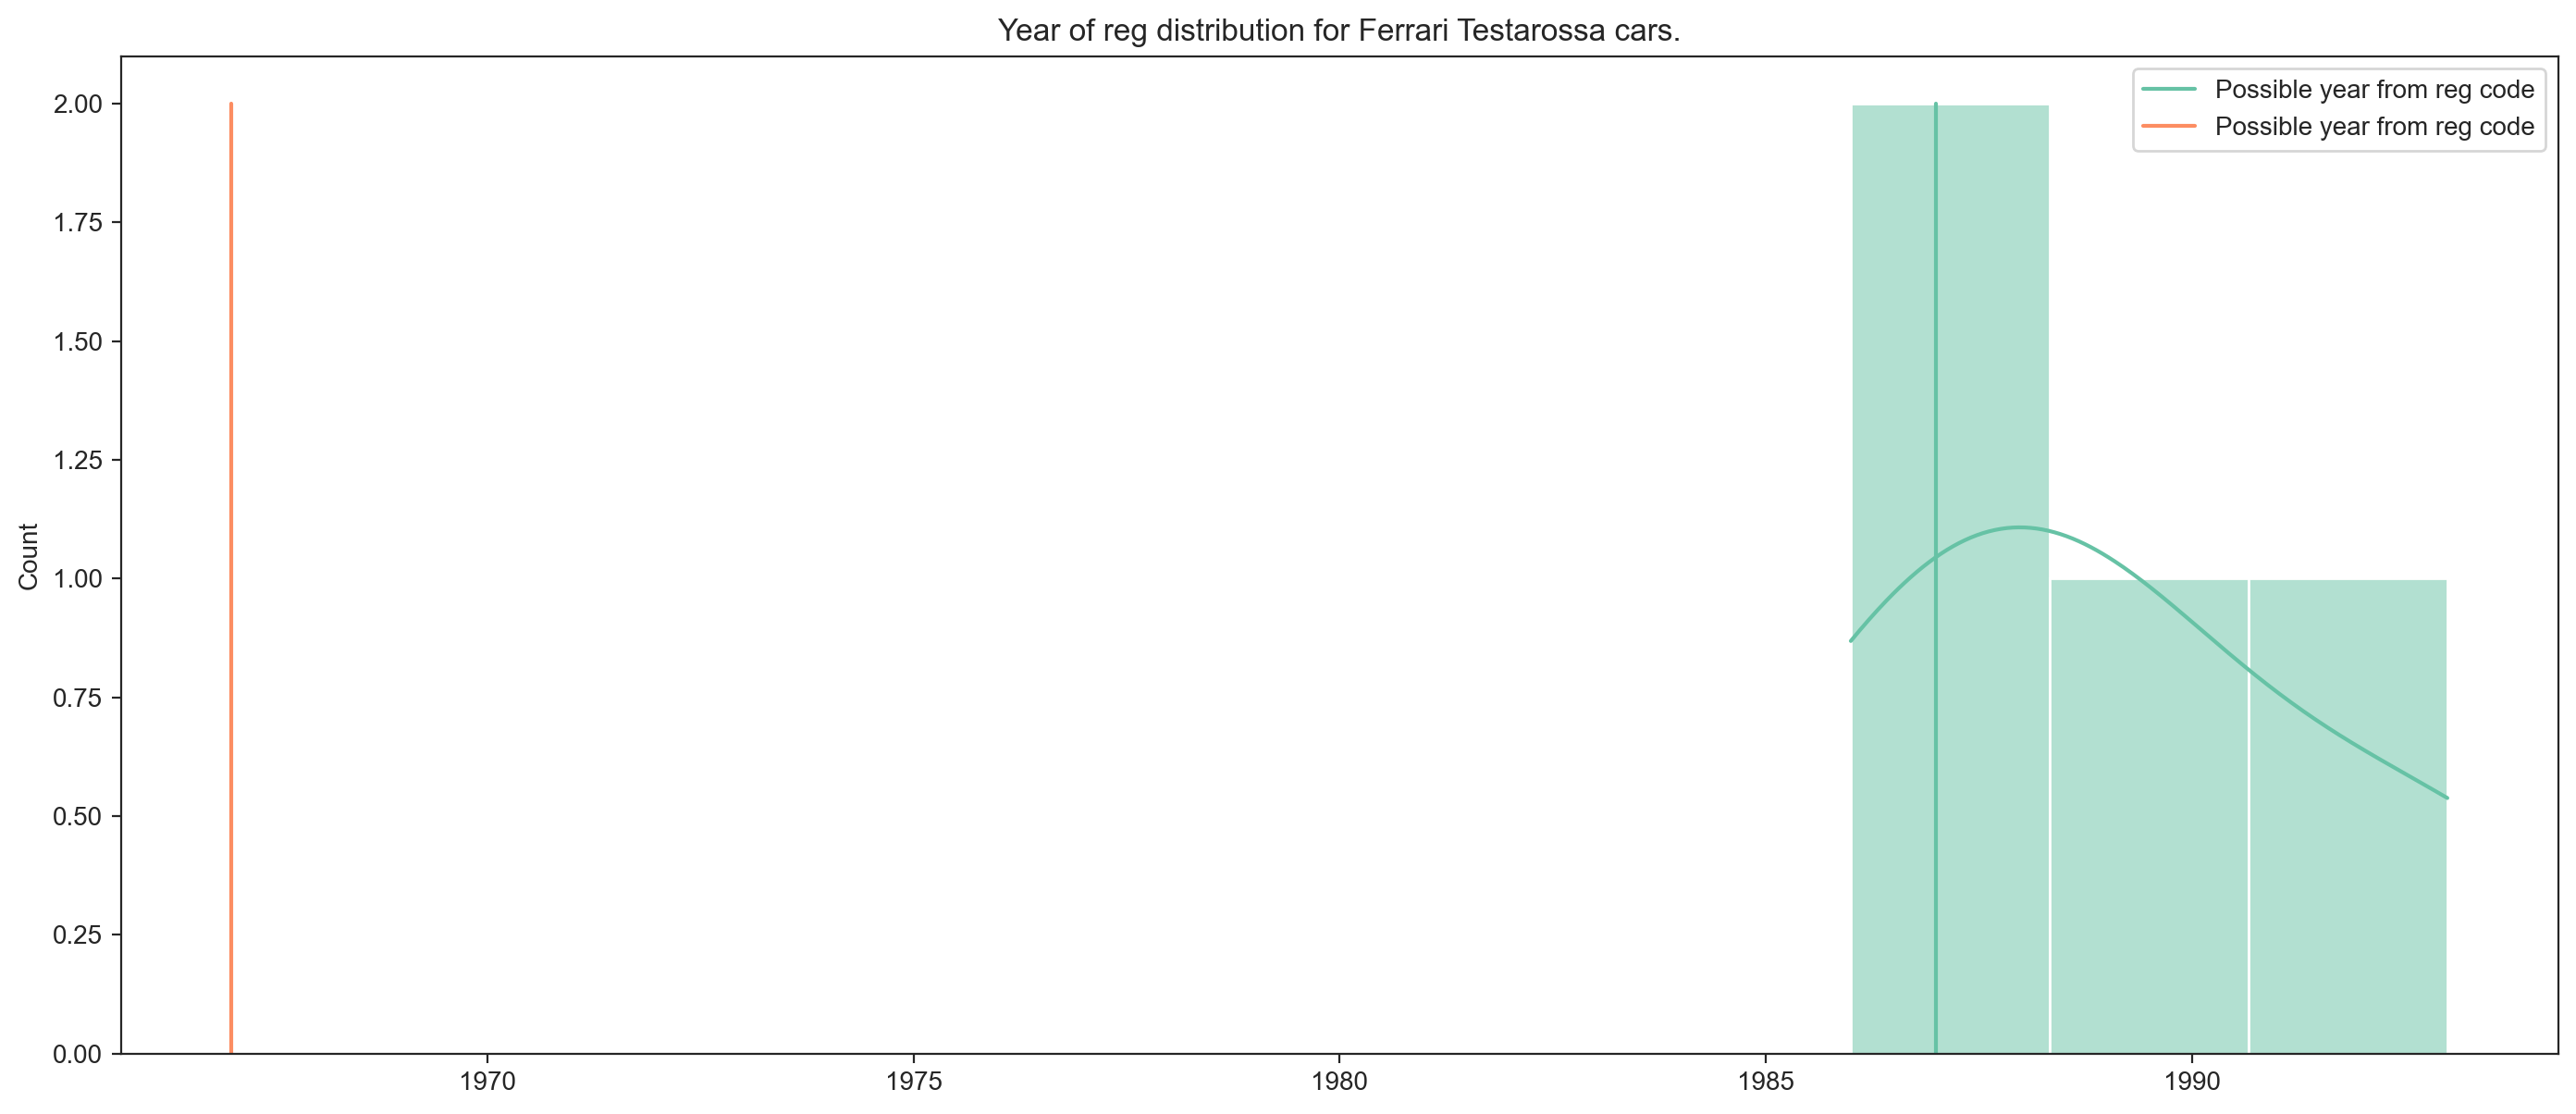

Mean year 1984.8333333333333
Closest year: 1994


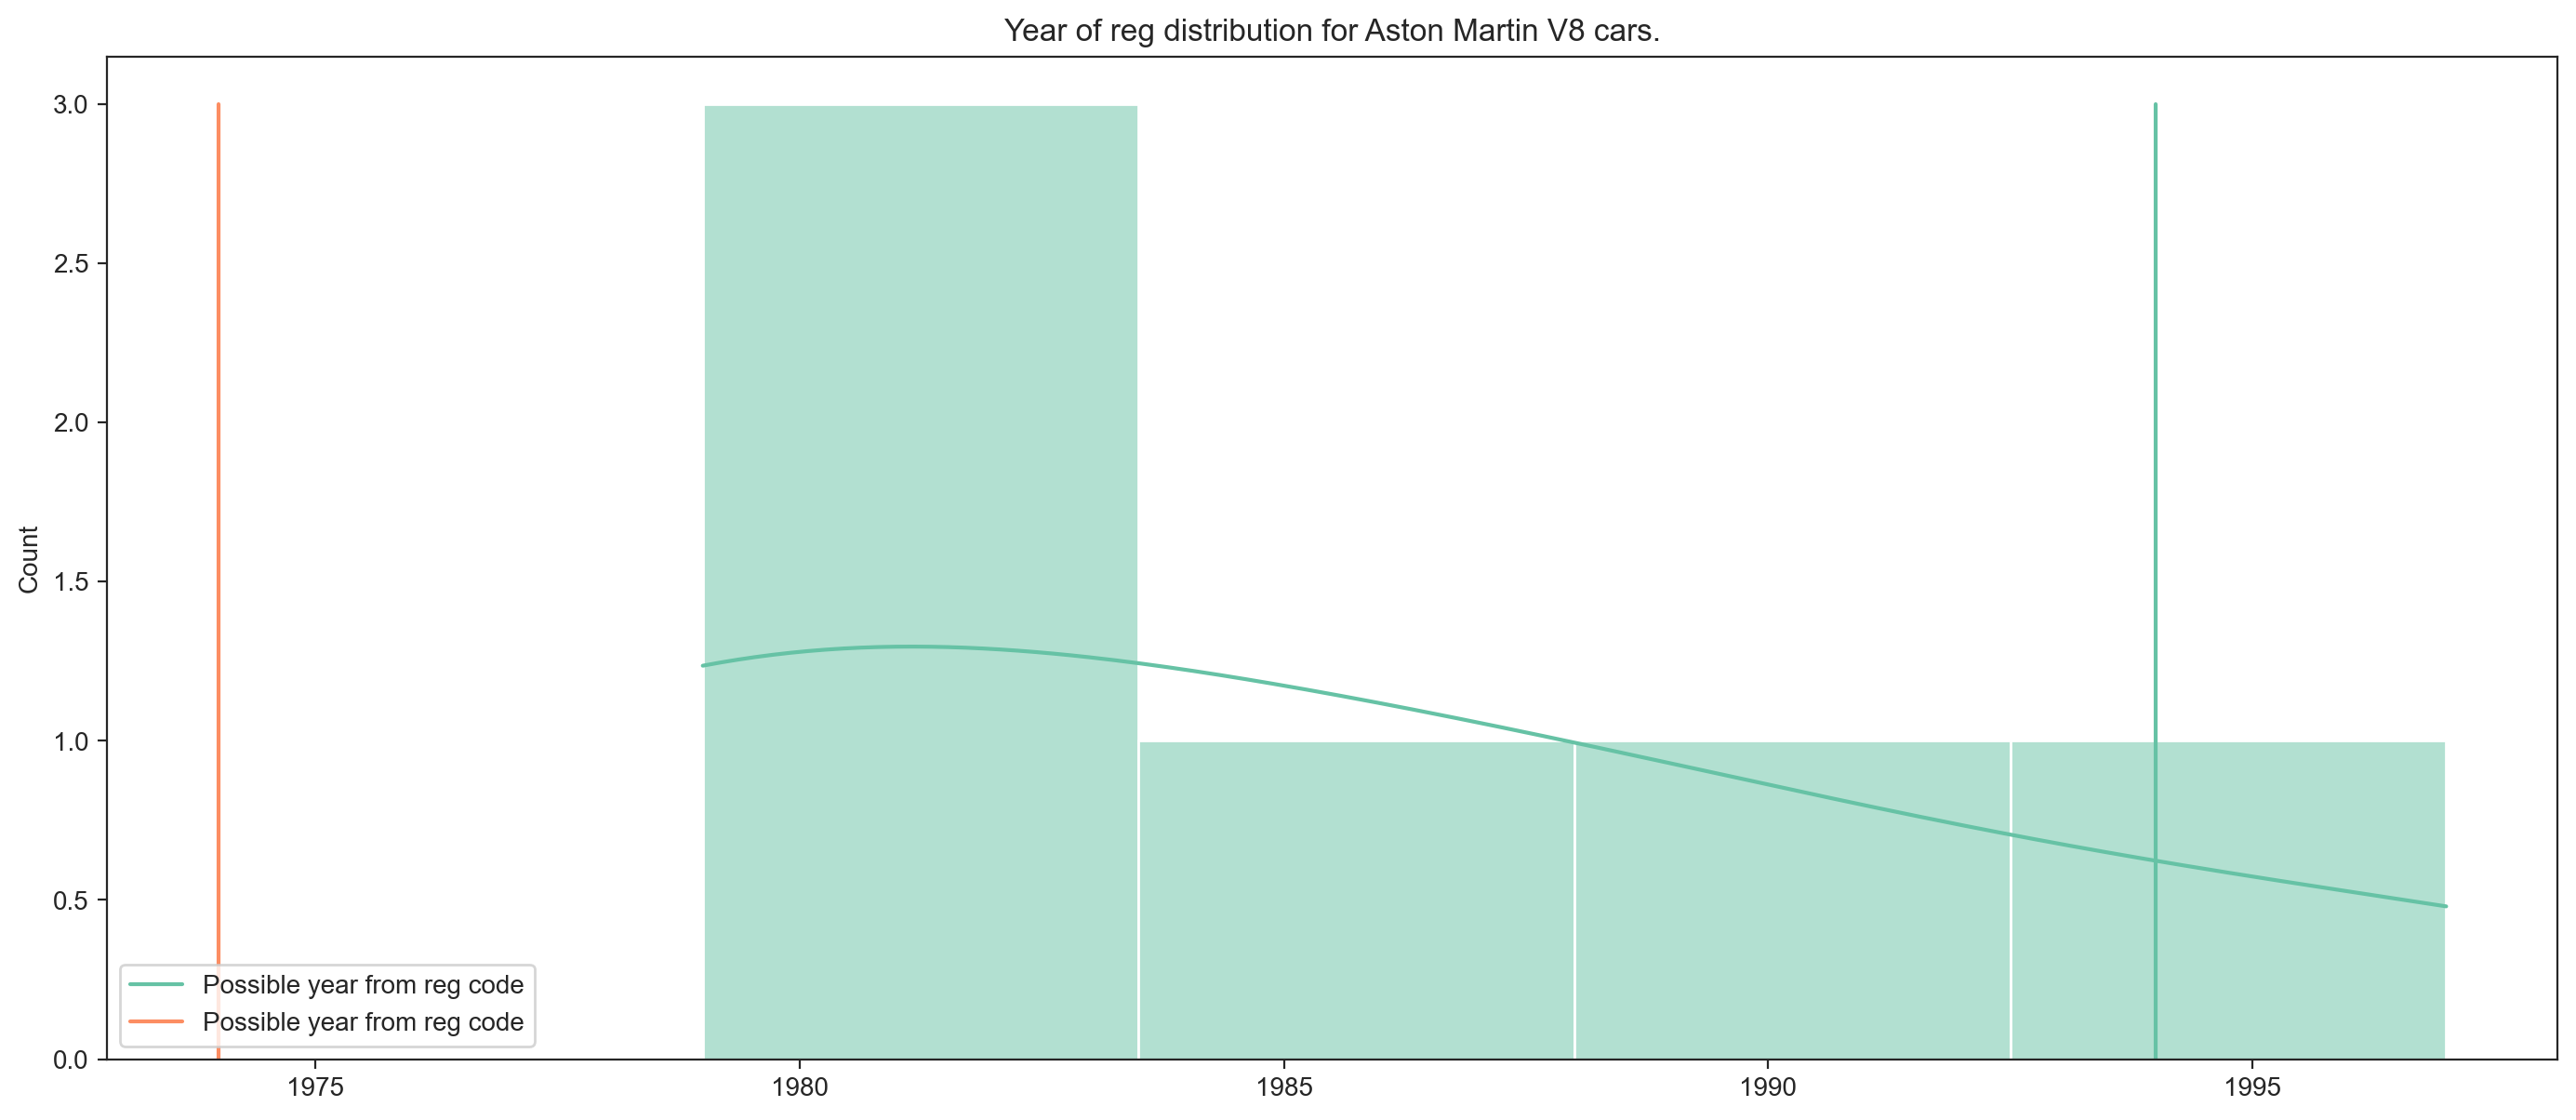

Mean year 2007.3977272727273
Closest year: 1991


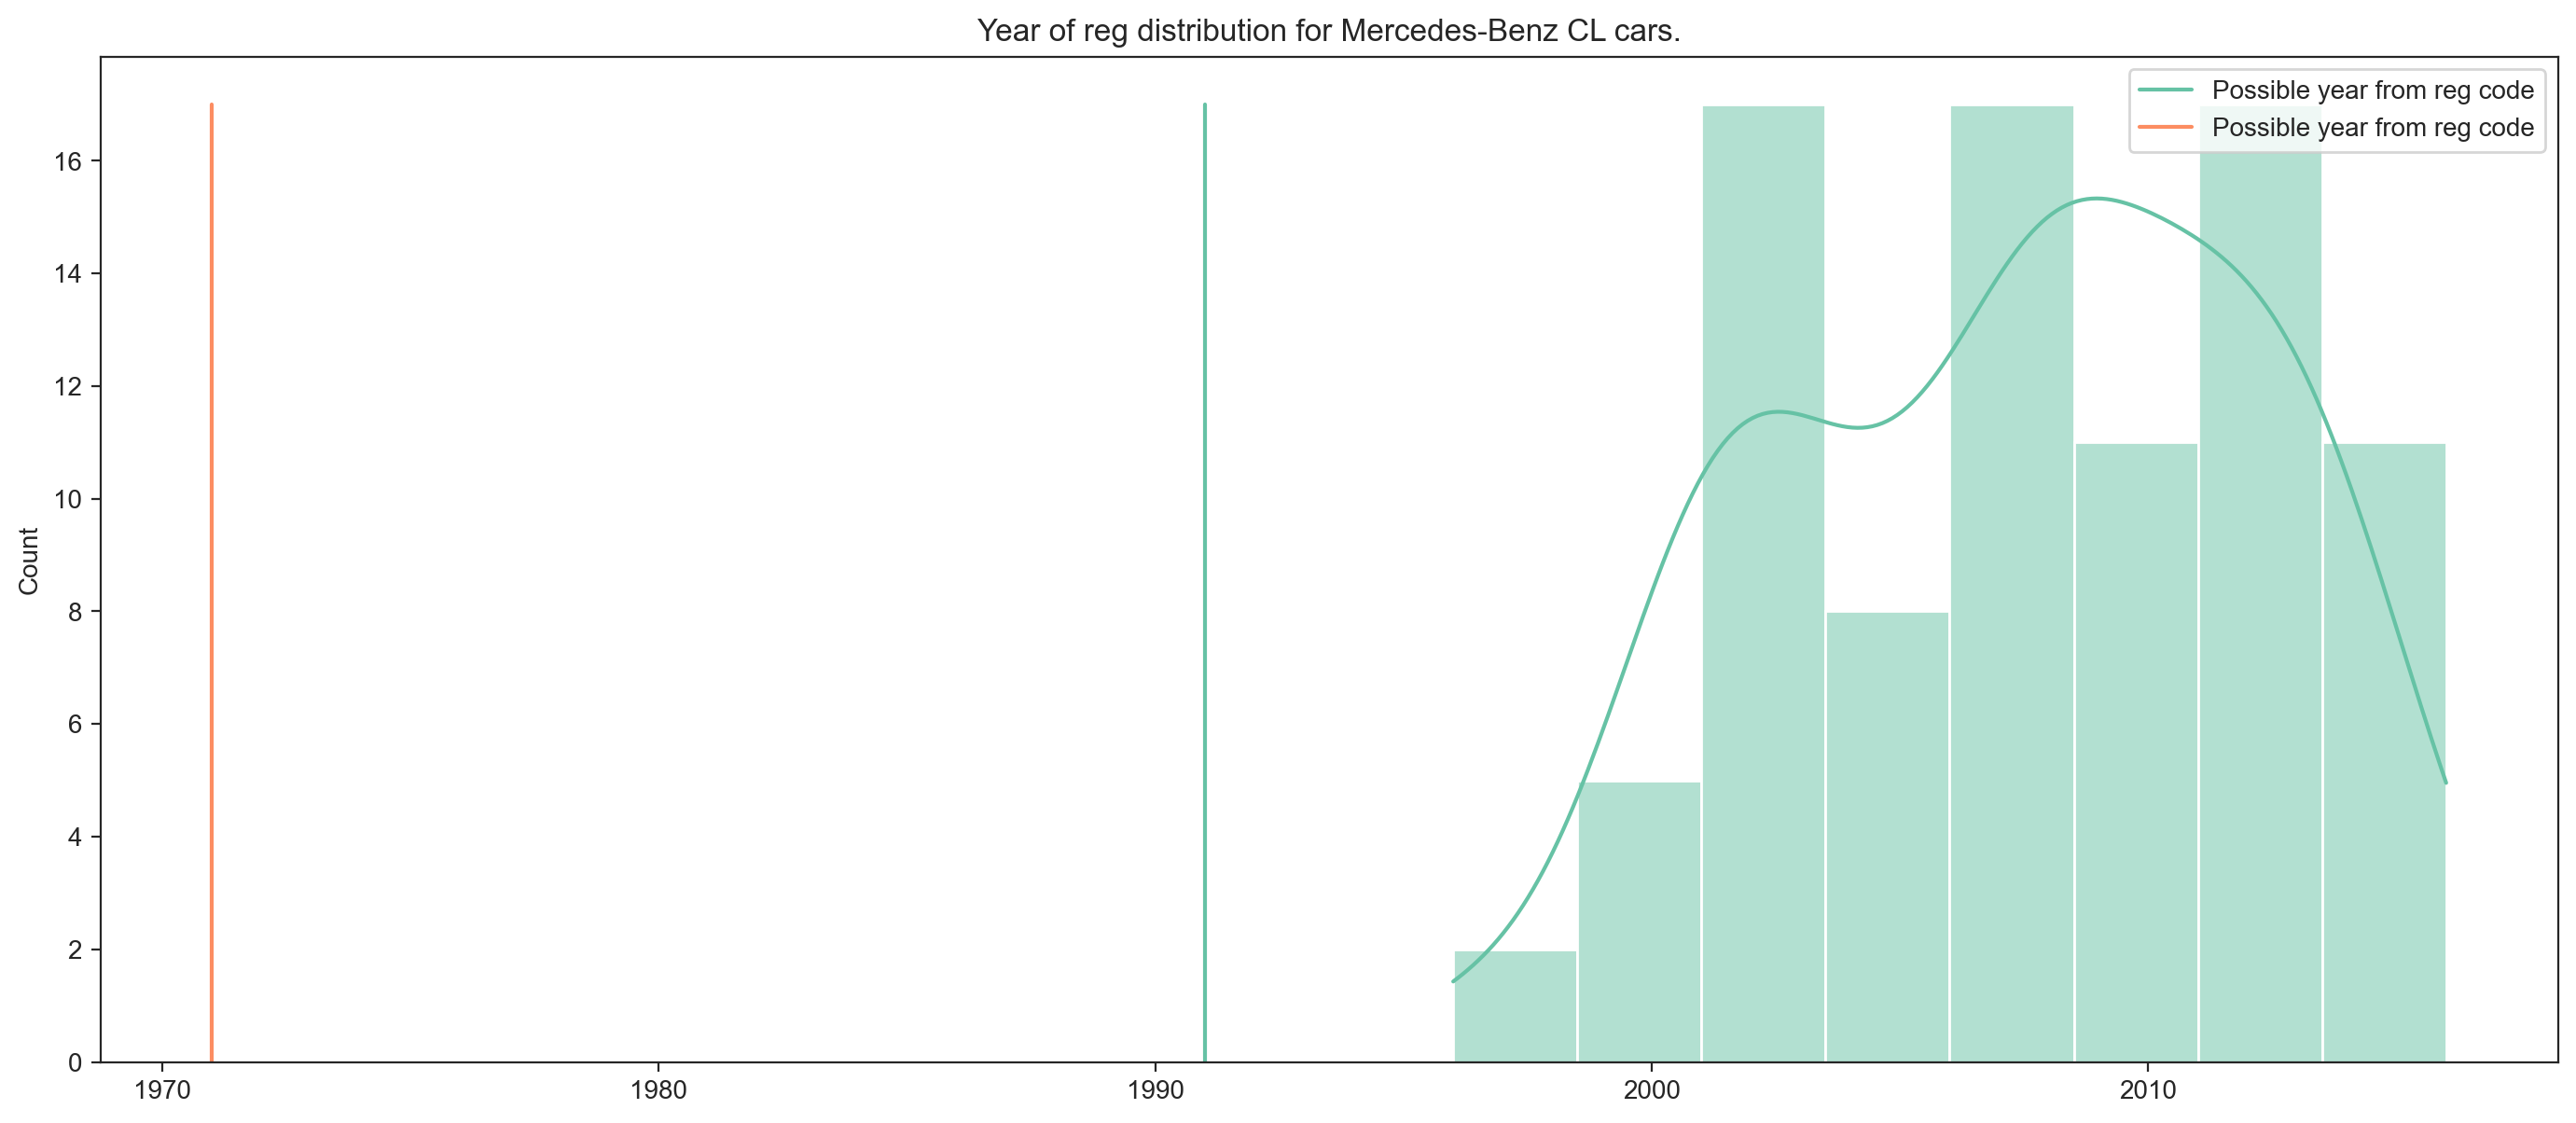

Mean year 2009.952
Closest year: 1990


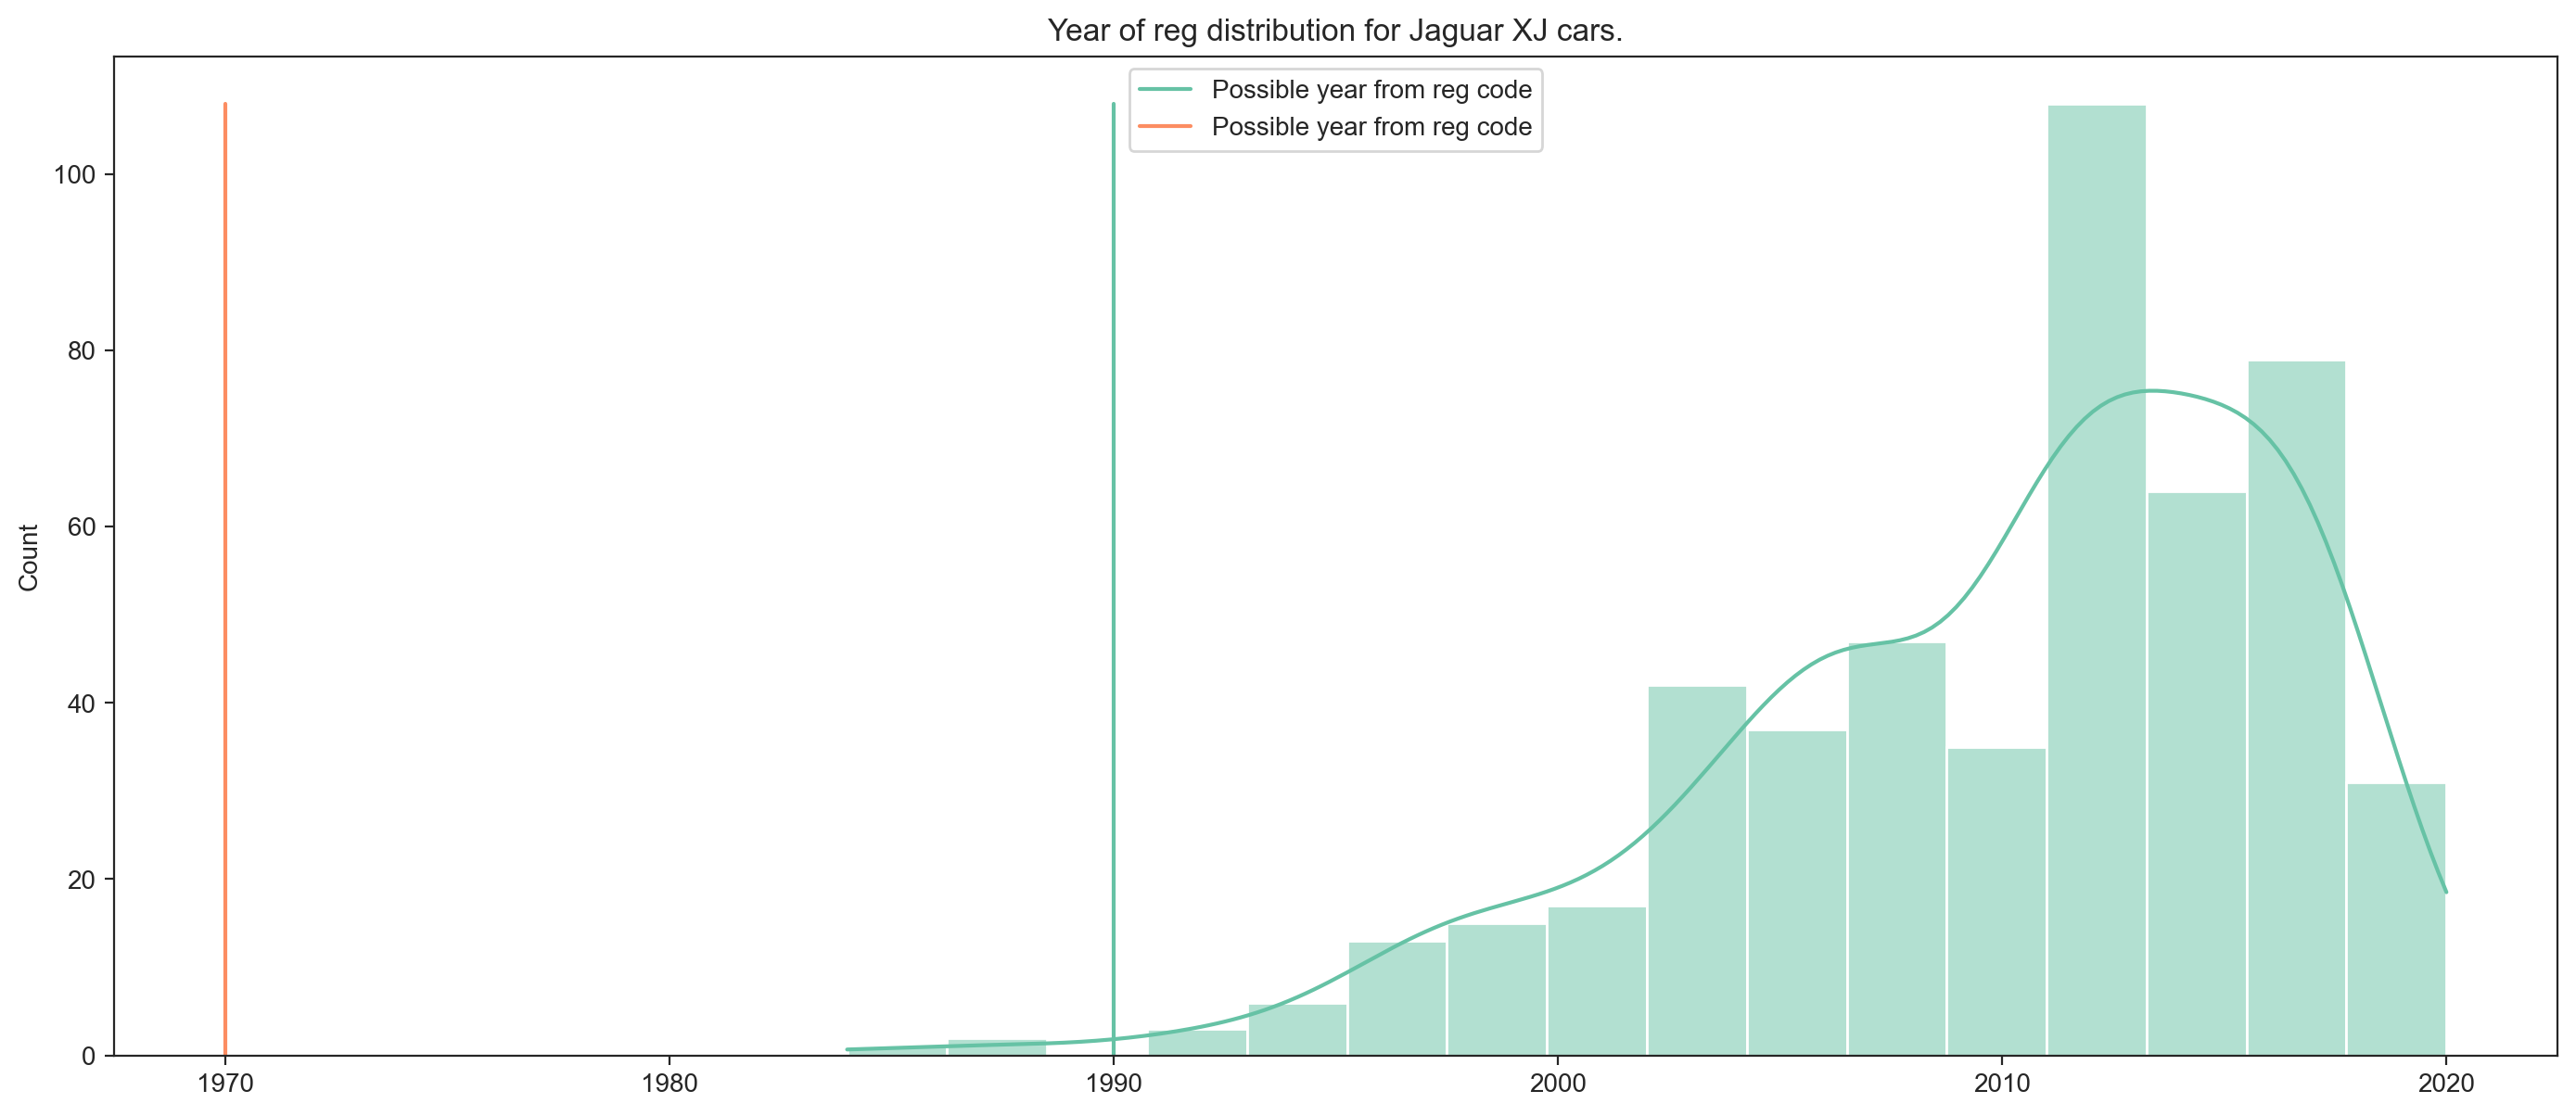

Mean year 1994.0
Closest year: 1998


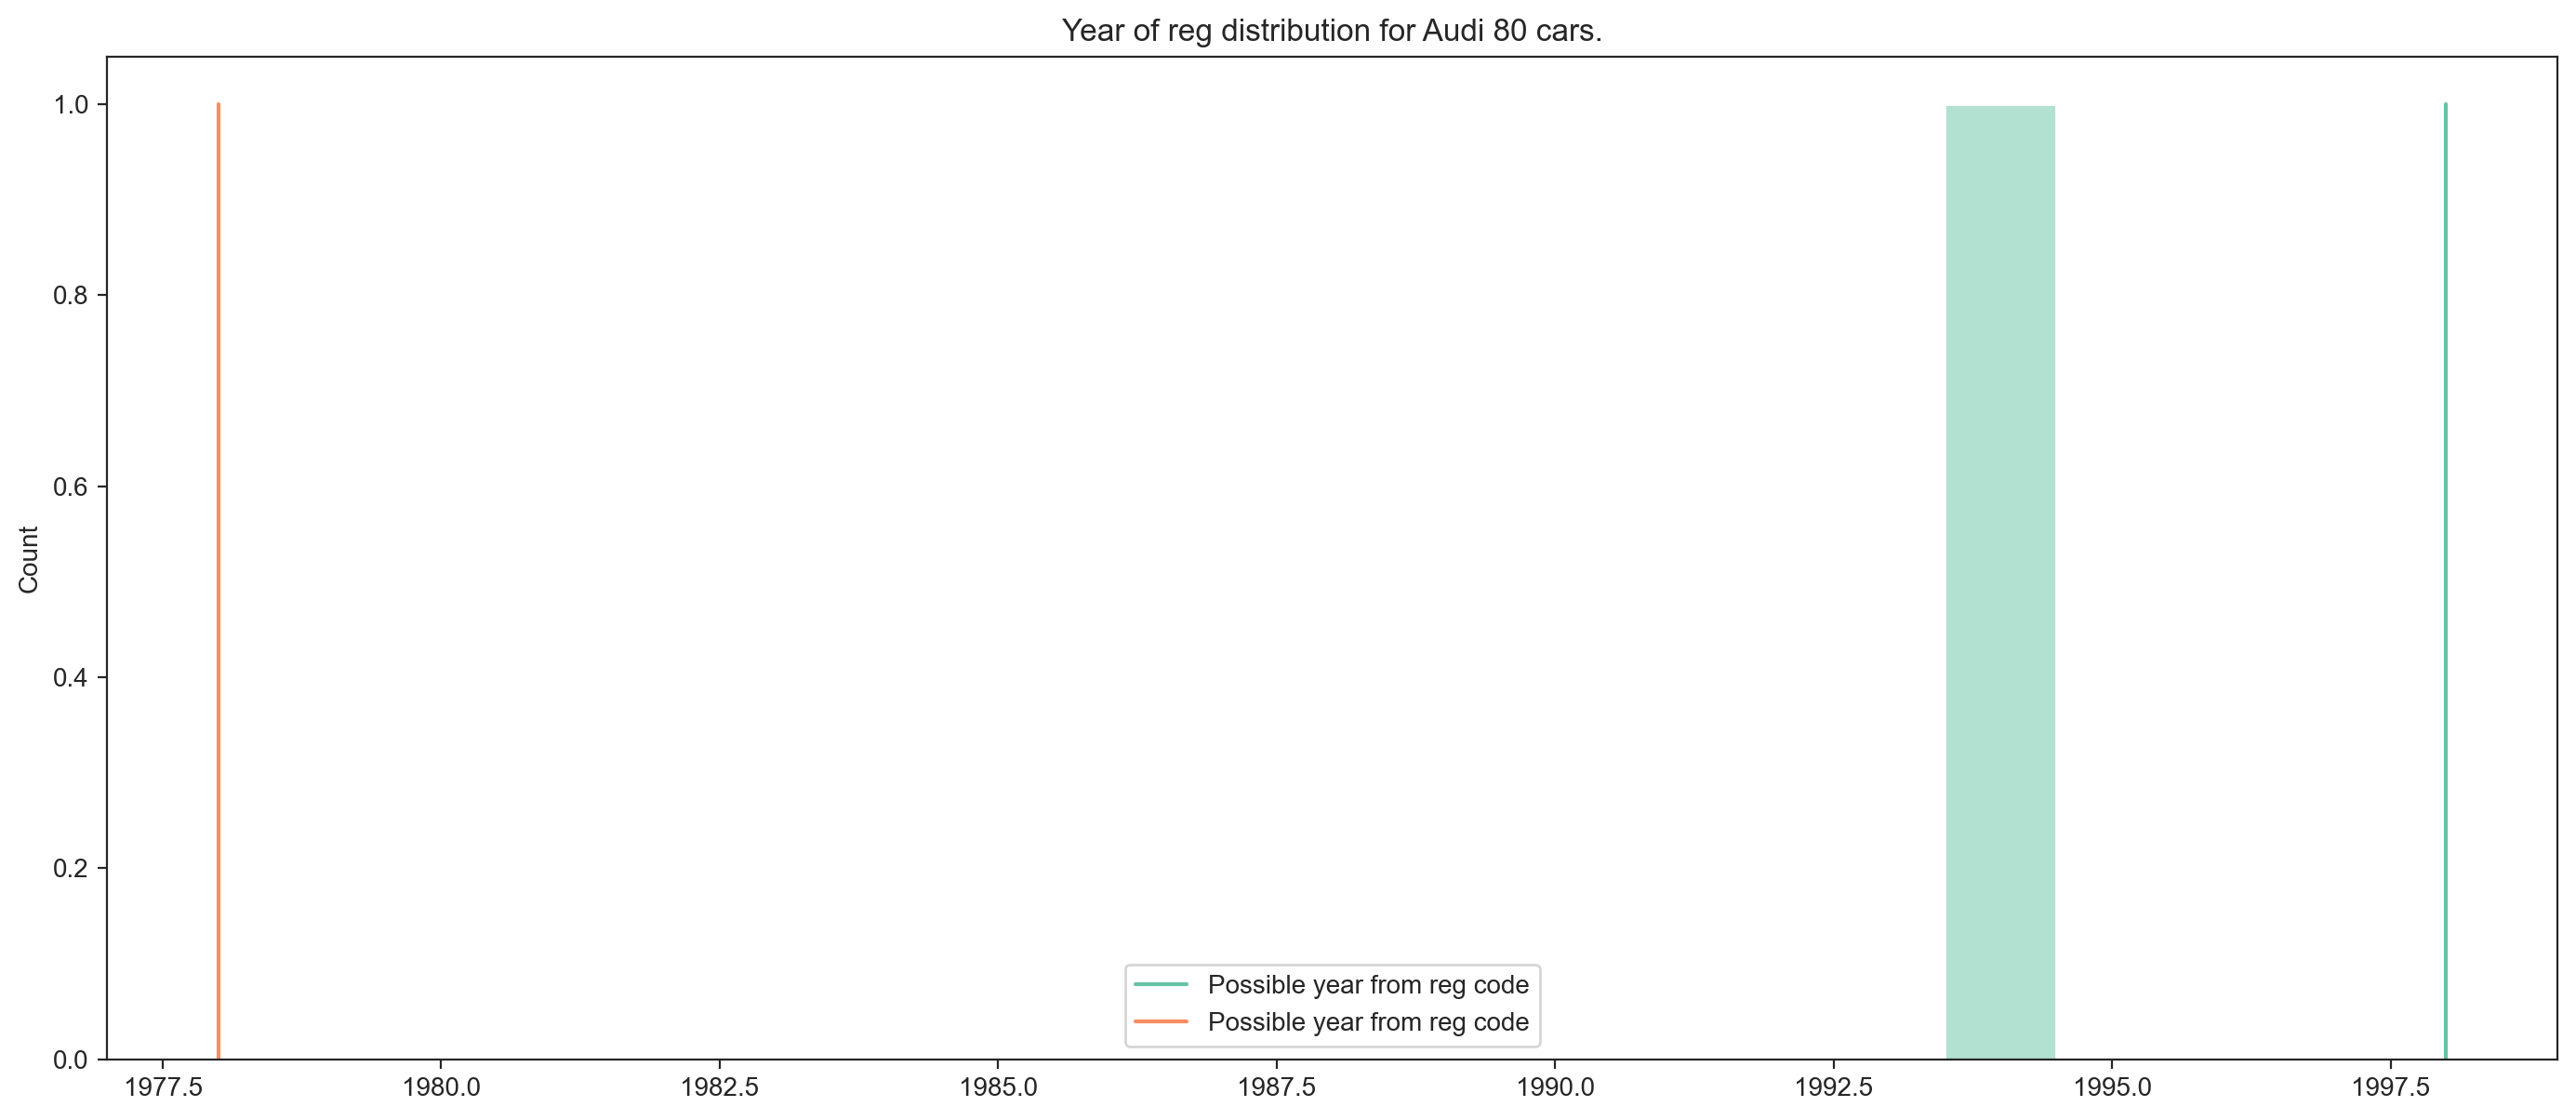

Mean year 1984.8333333333333
Closest year: 1975


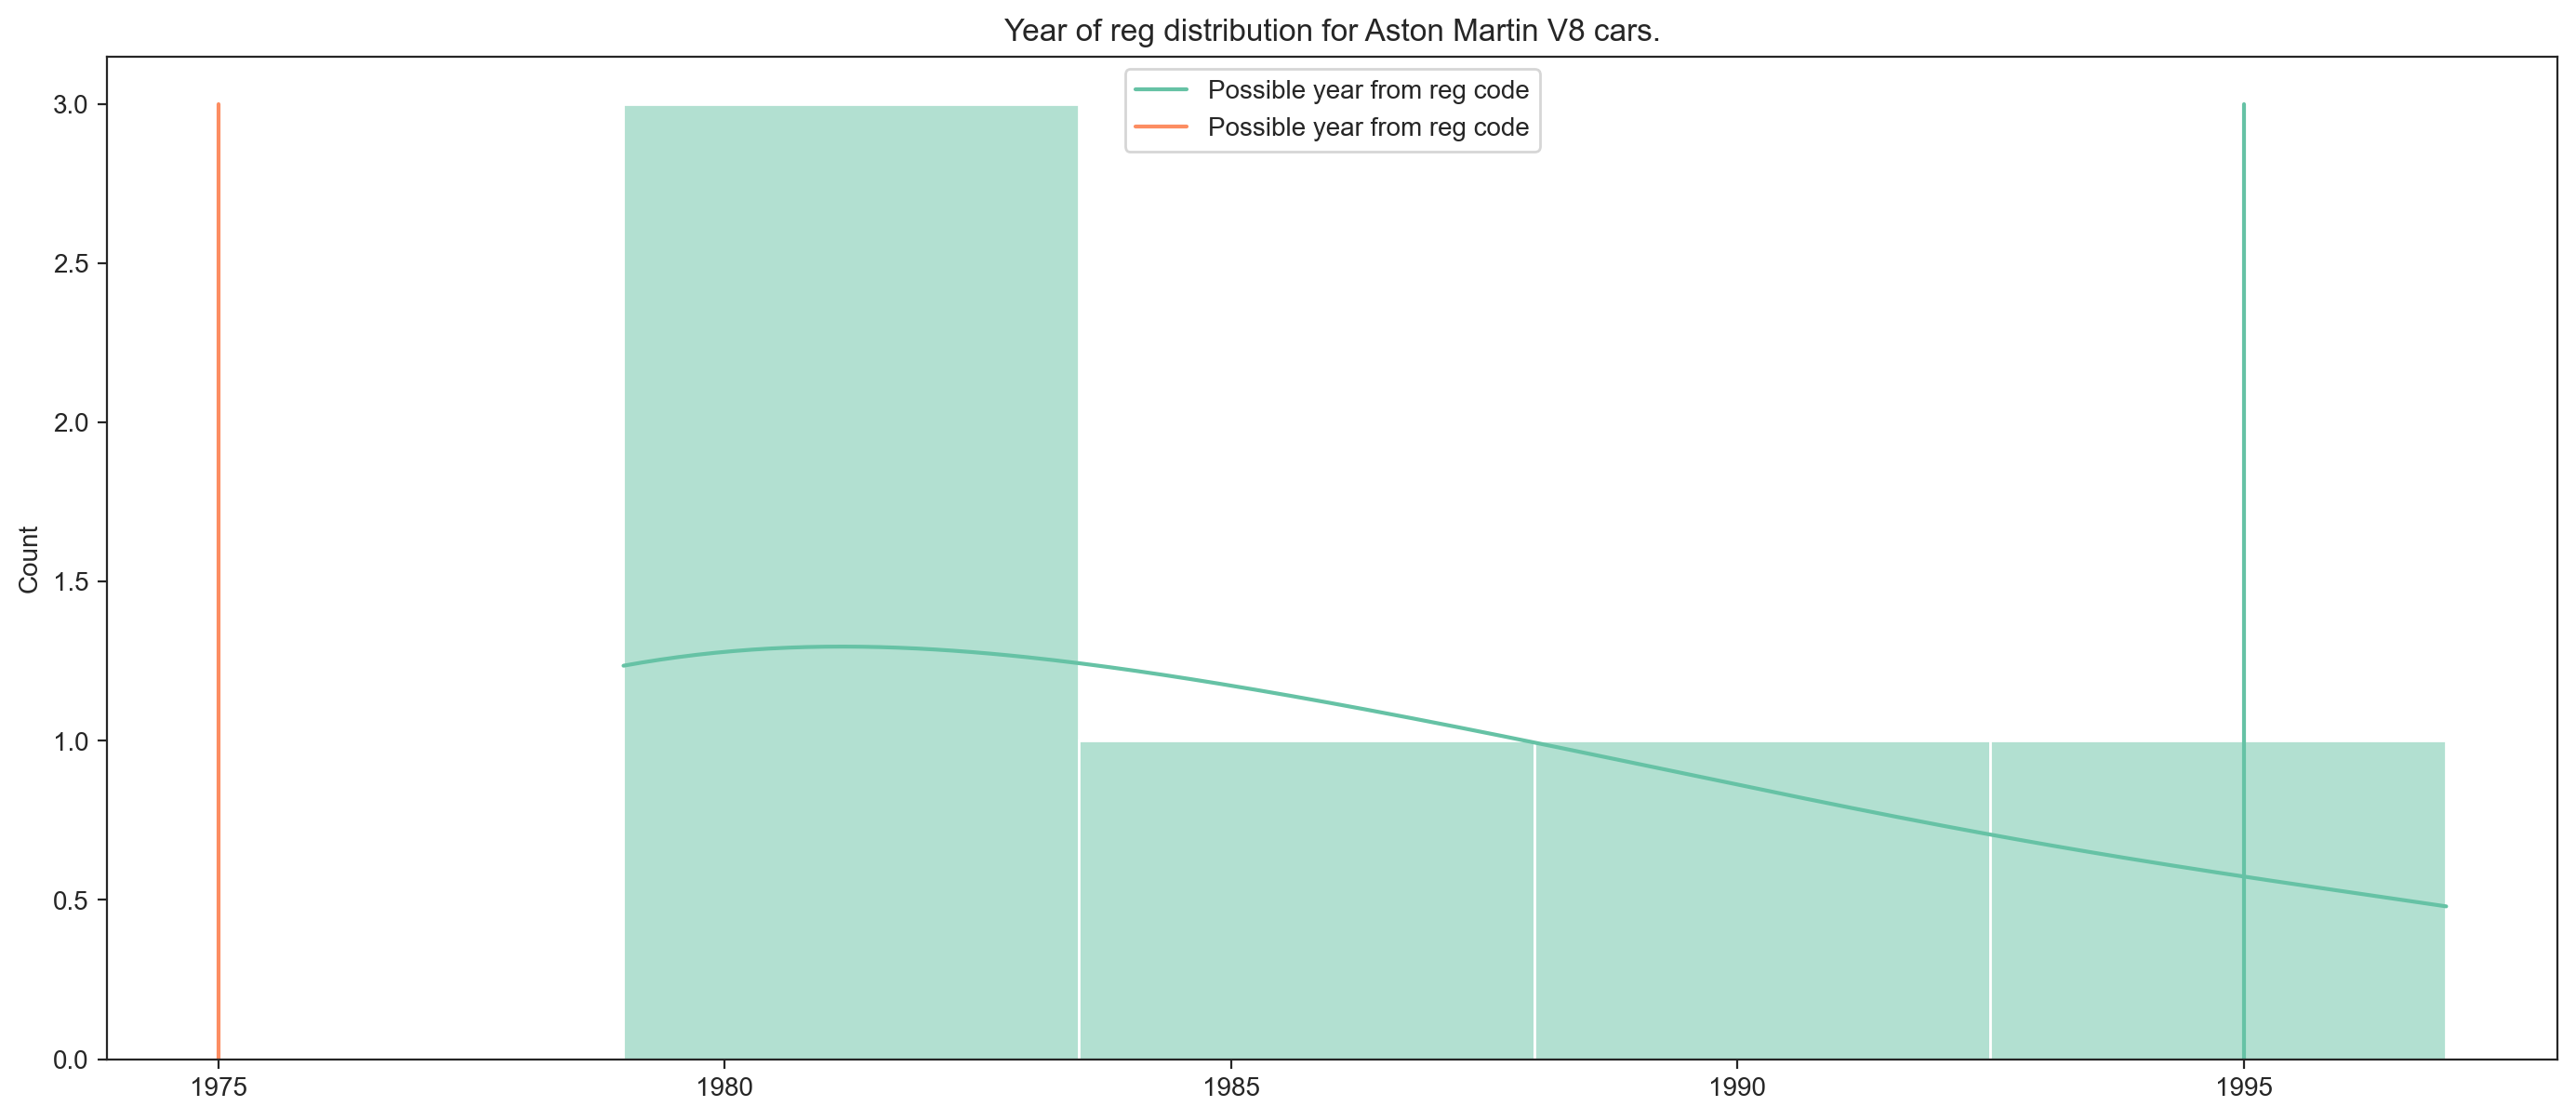

Mean year 2014.7767591107036
Closest year: 1988


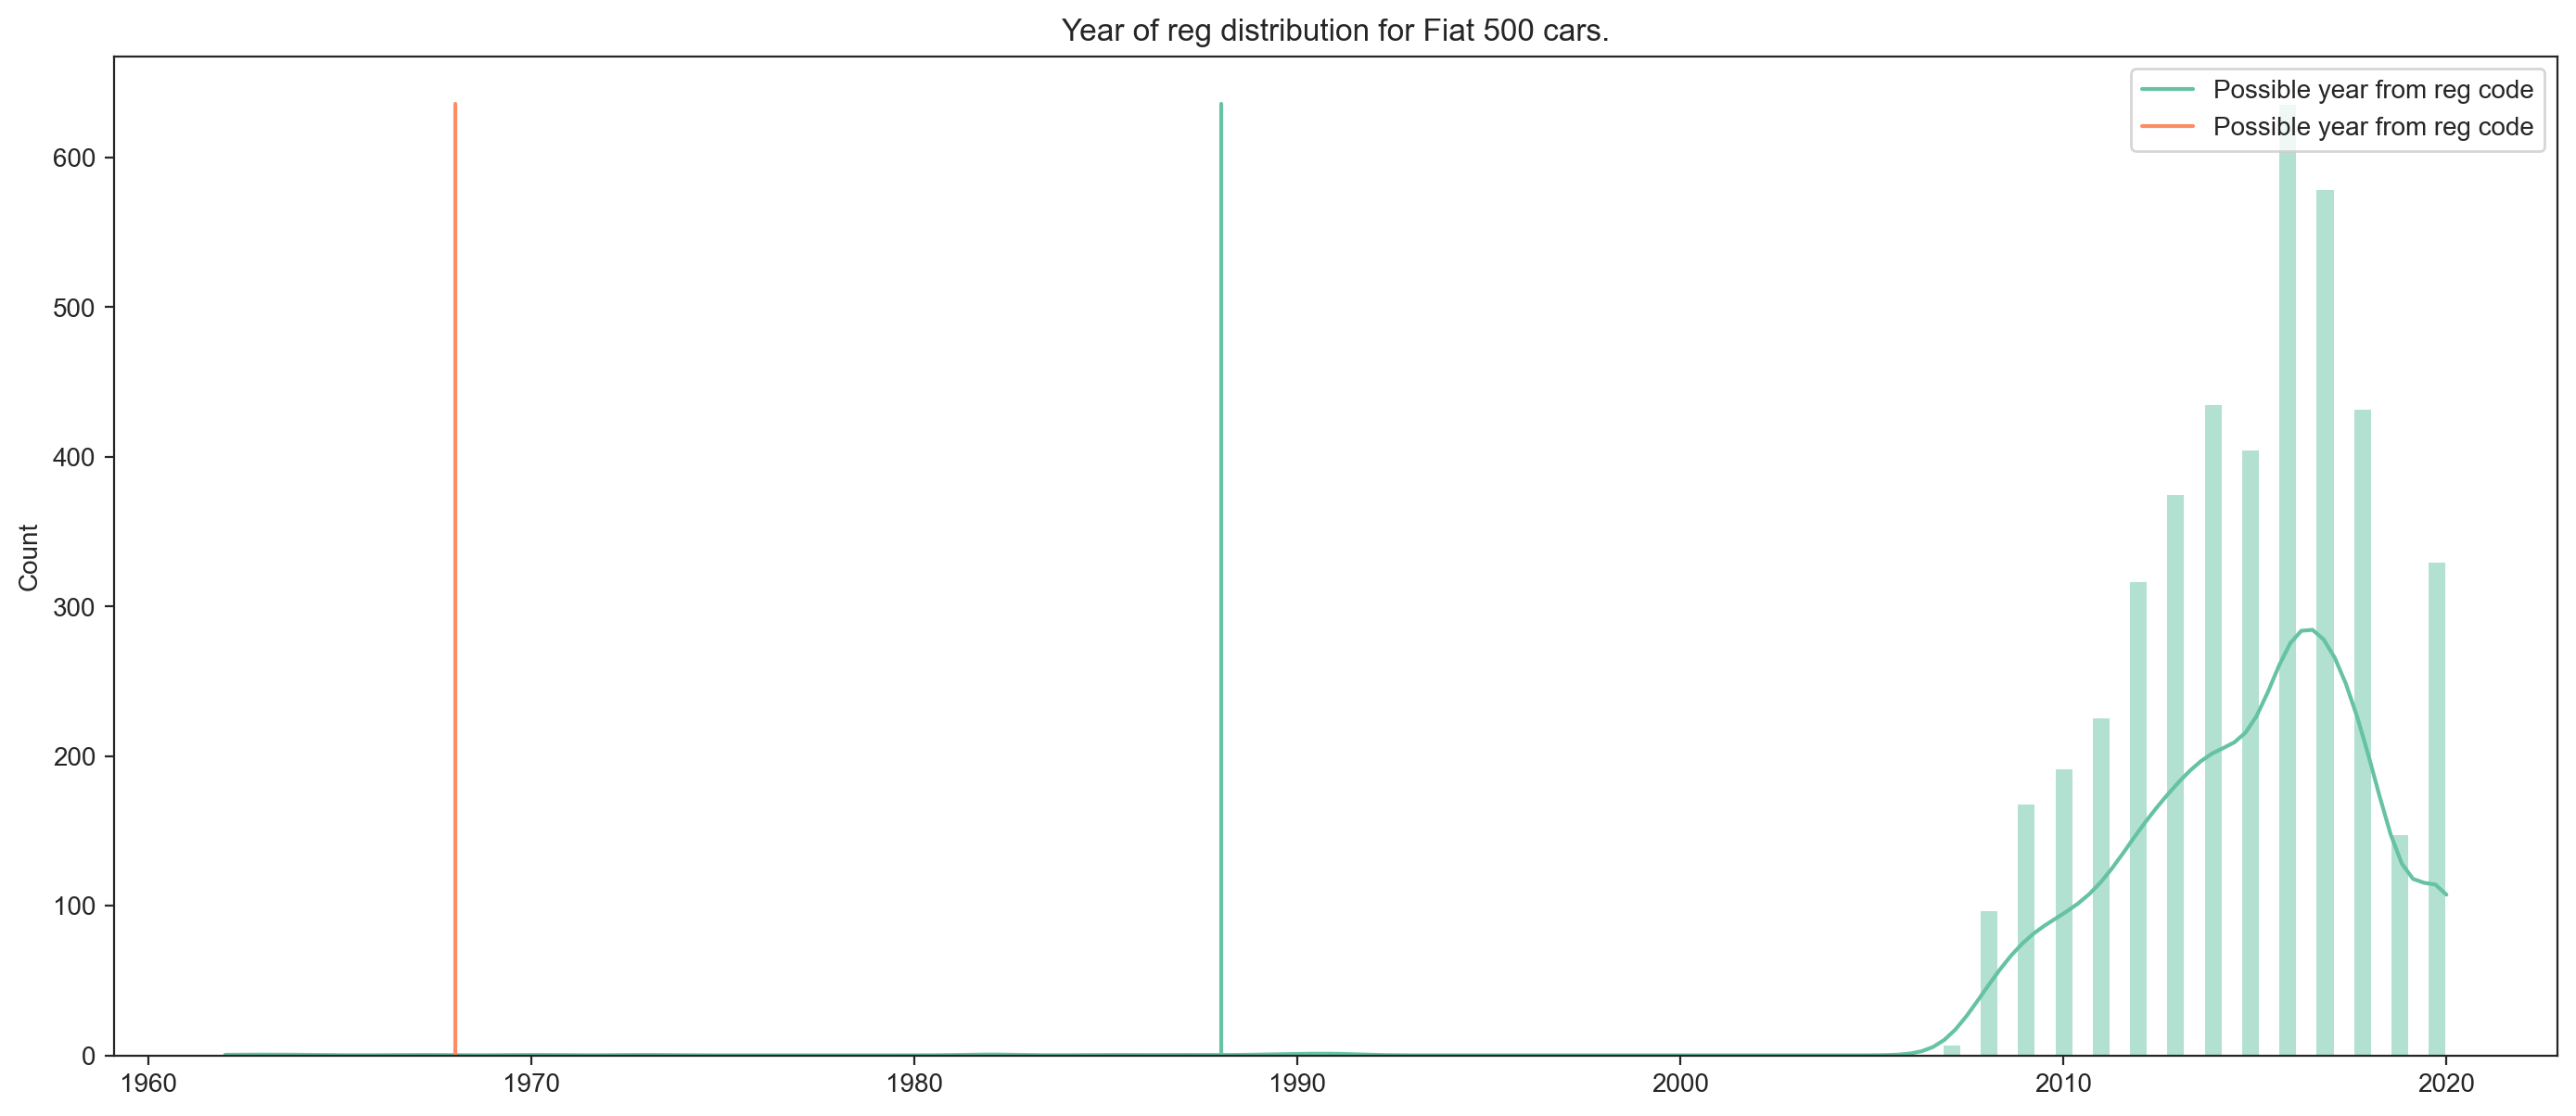

Mean year 2009.48664495114
Closest year: 1999


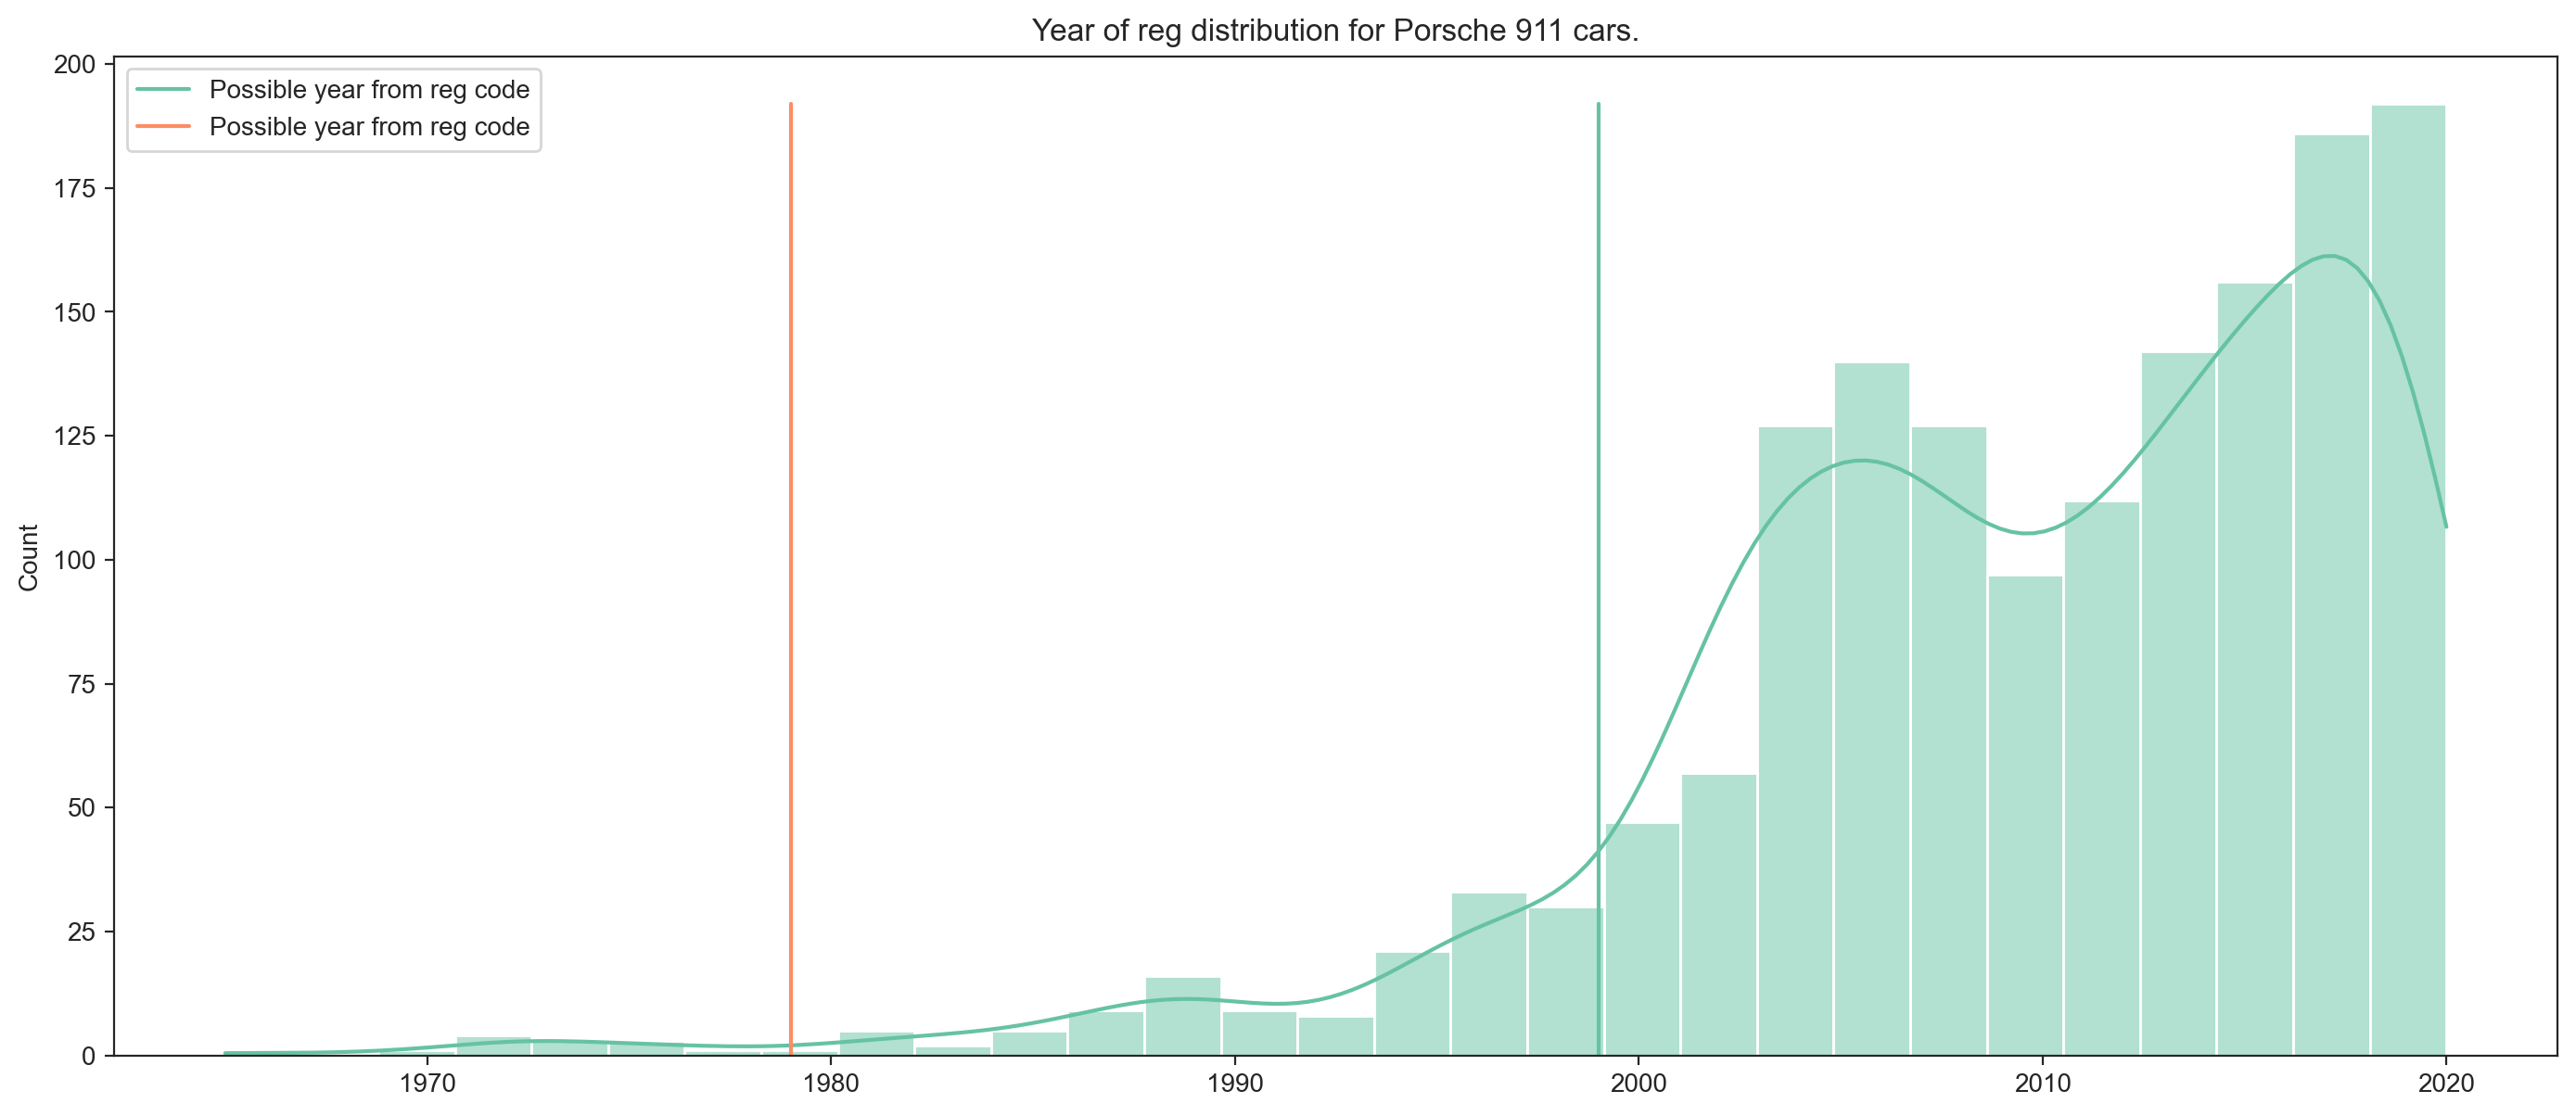

Mean year 2009.48664495114
Closest year: 1995


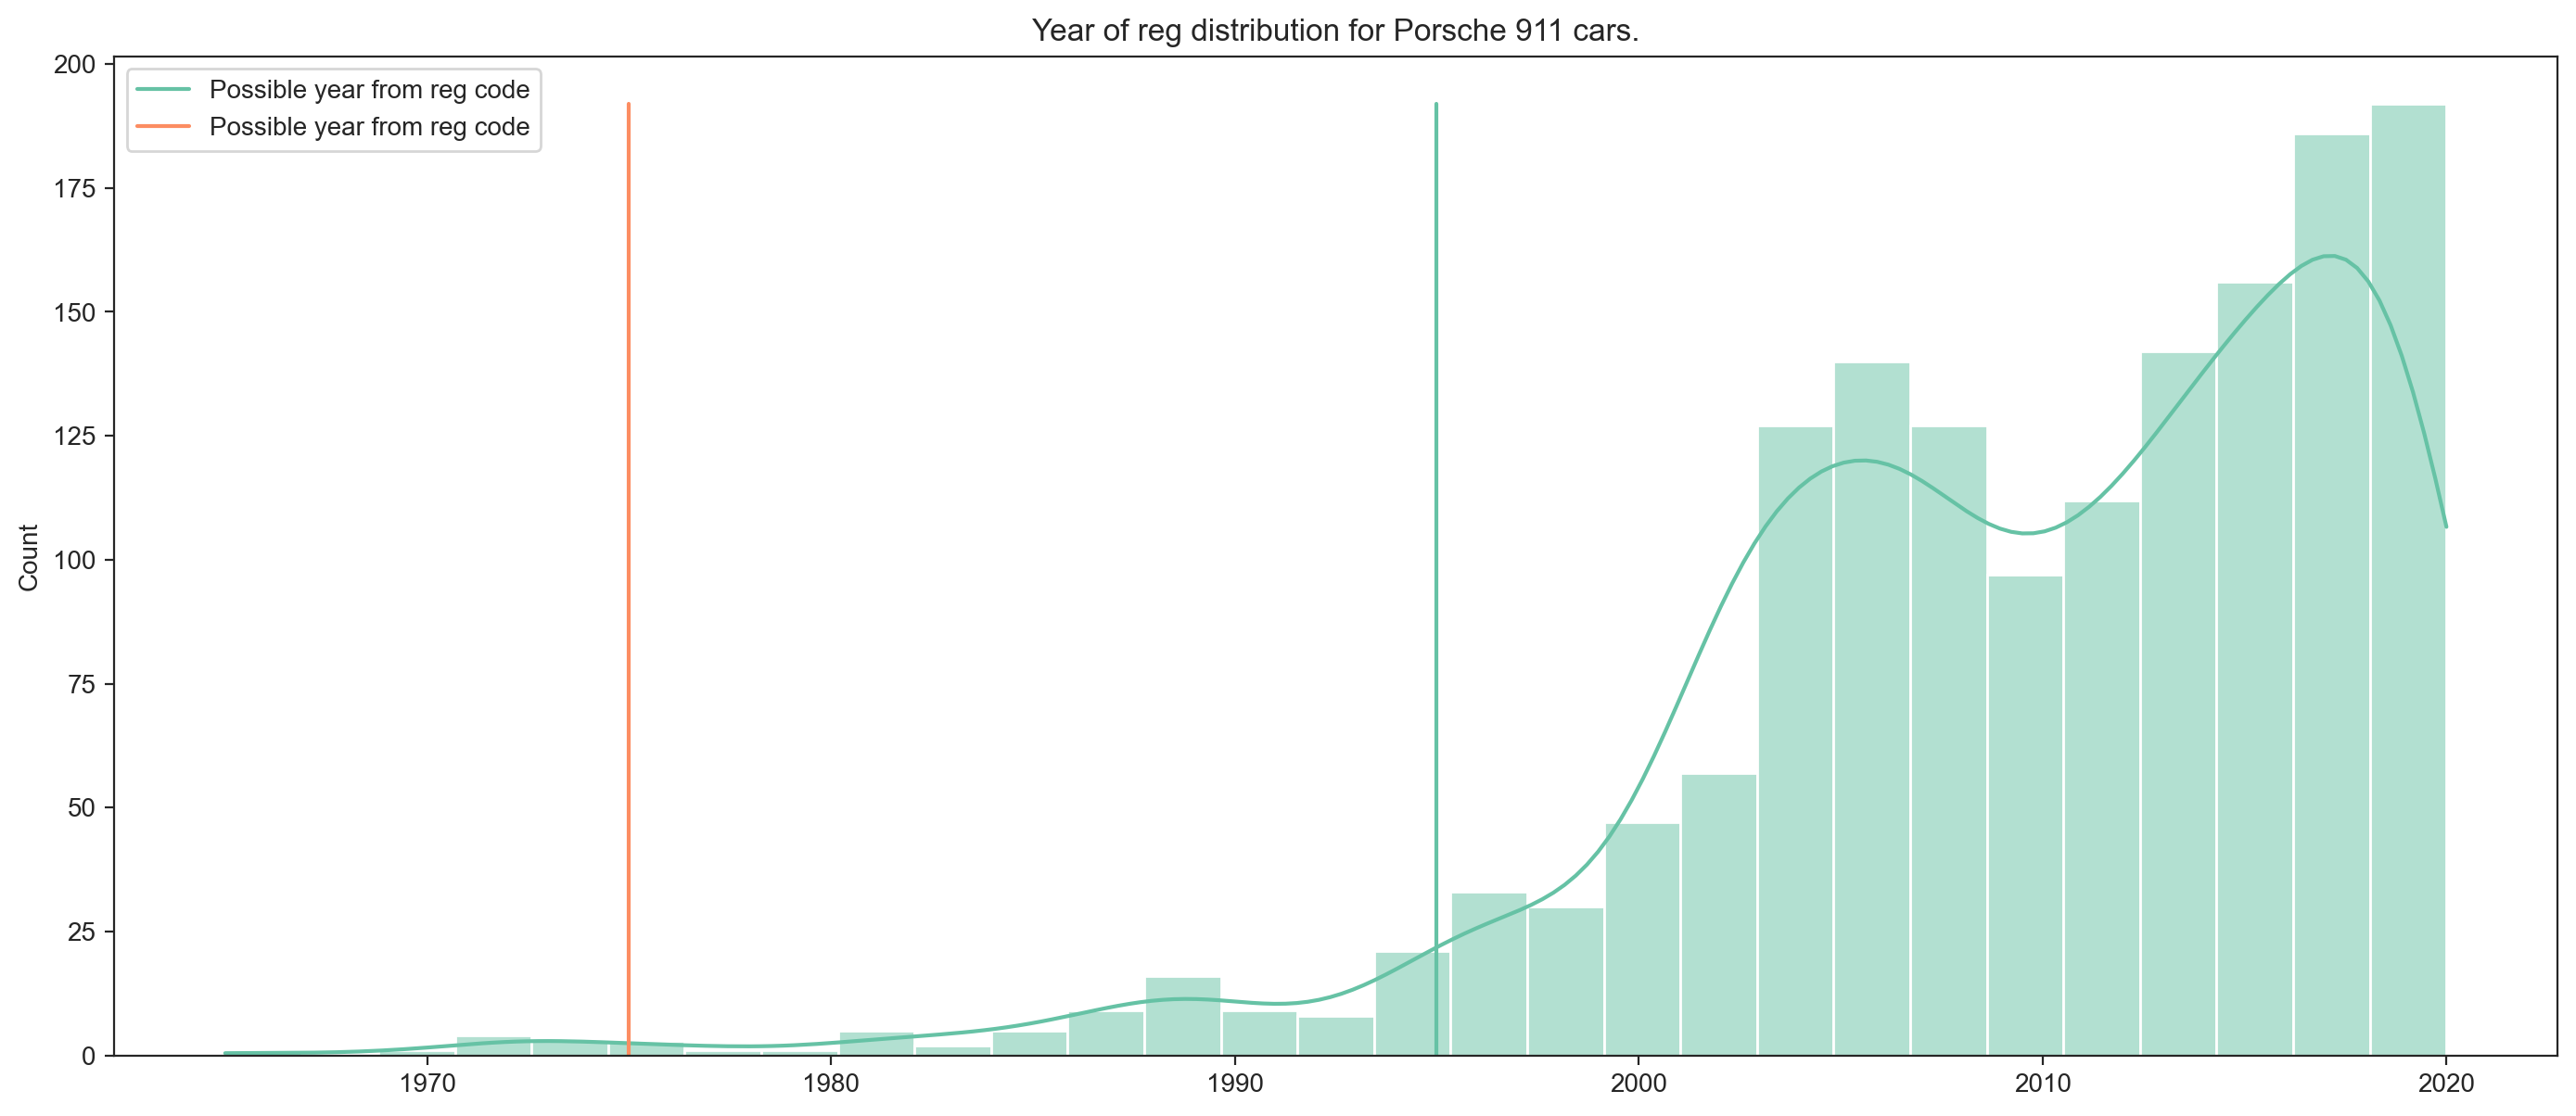

Mean year 2015.0565268065268
Closest year: 1995


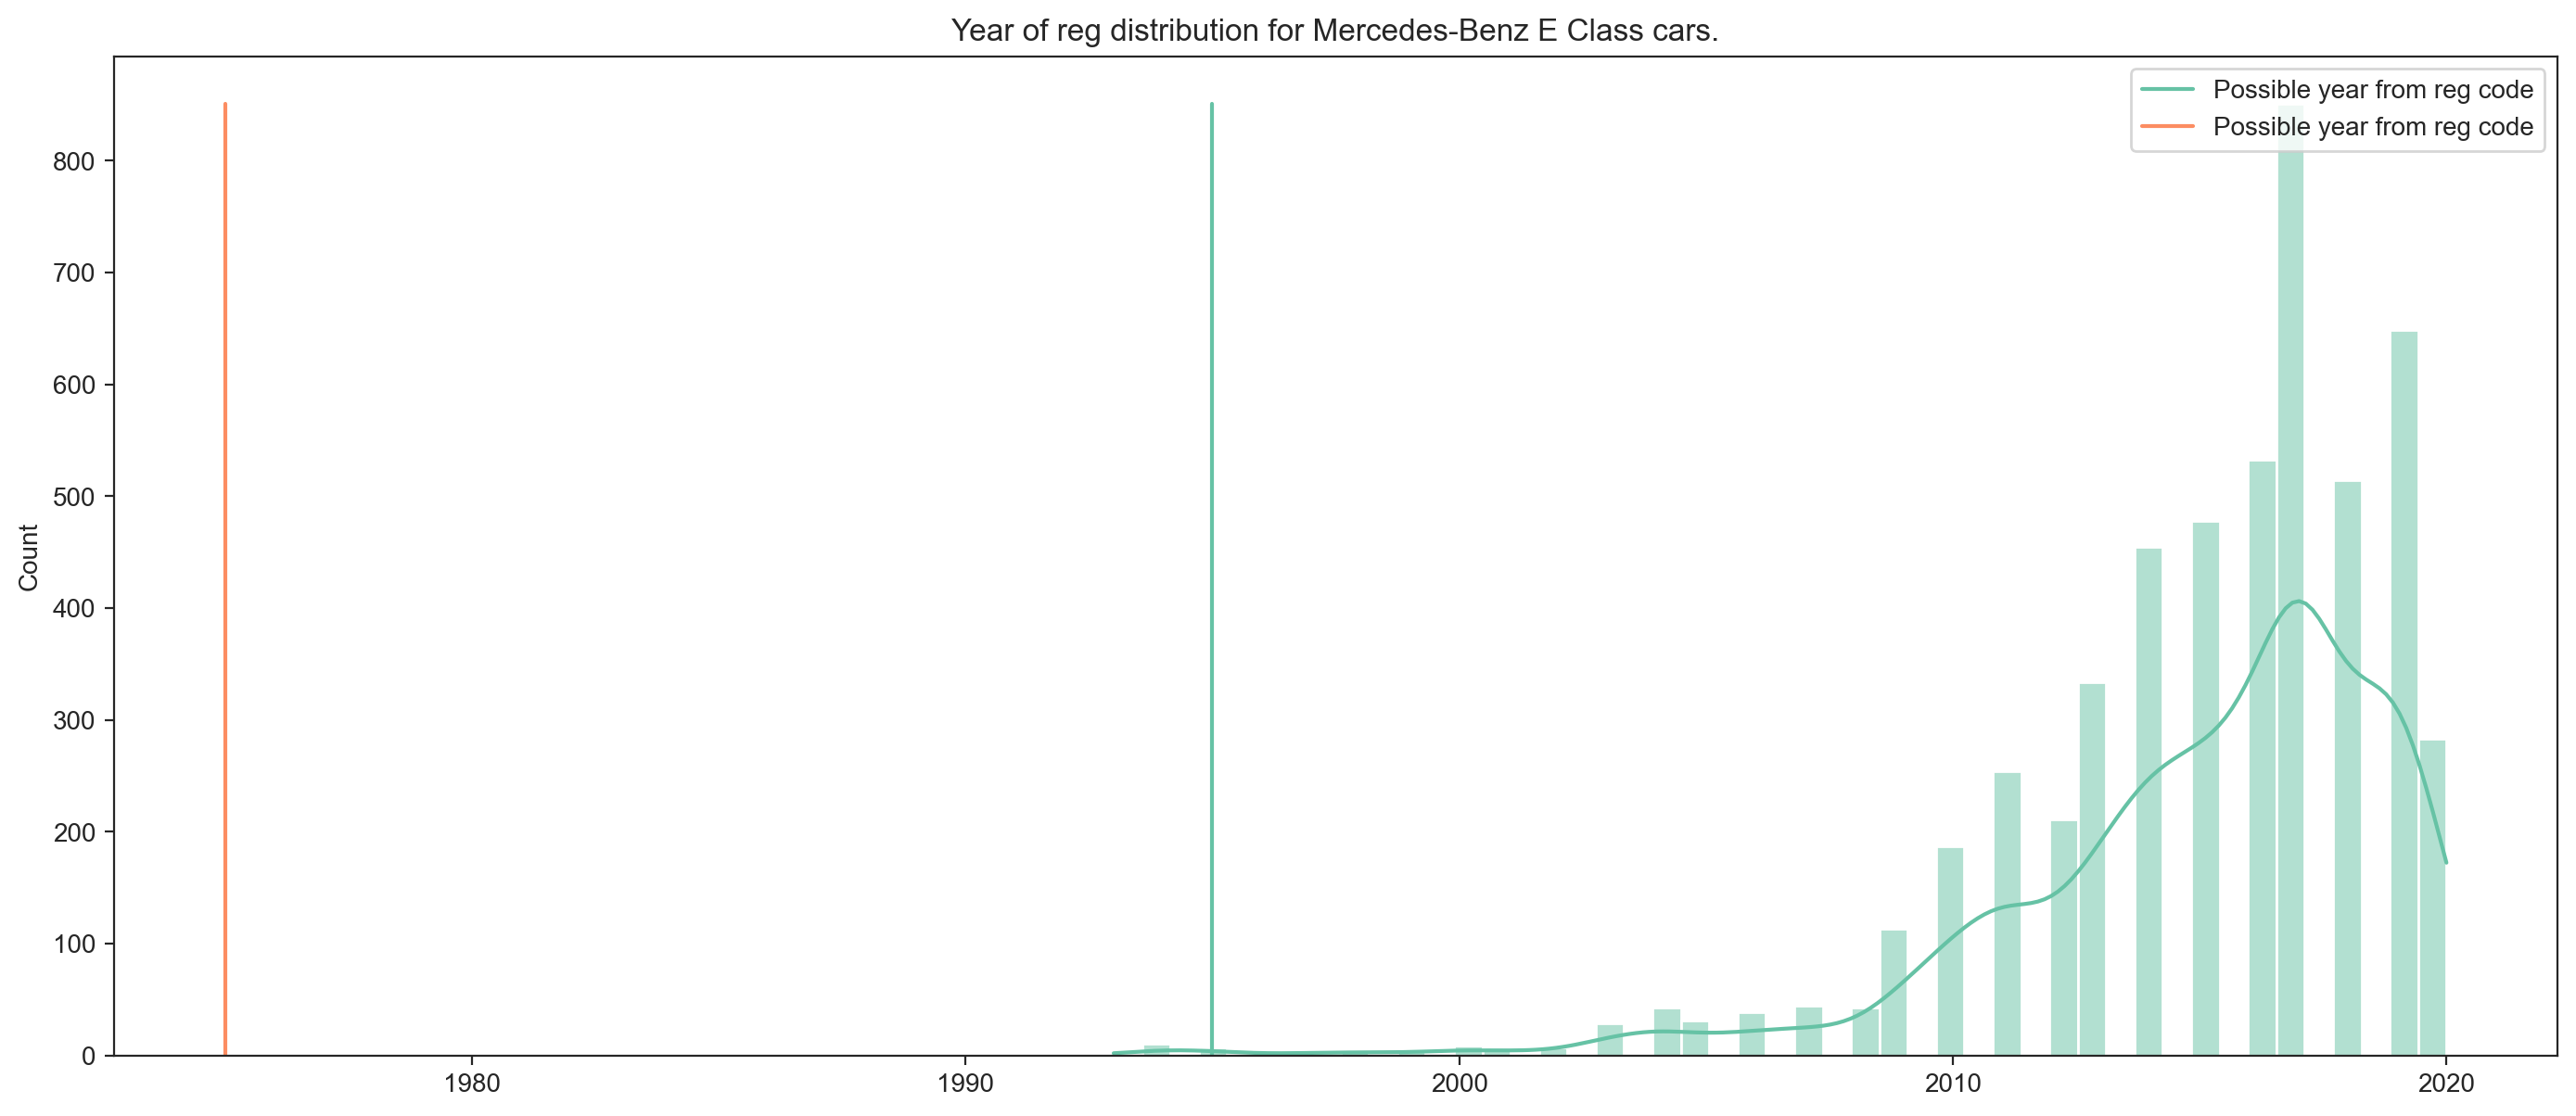

Mean year 2016.7956521739131
Closest year: 1987


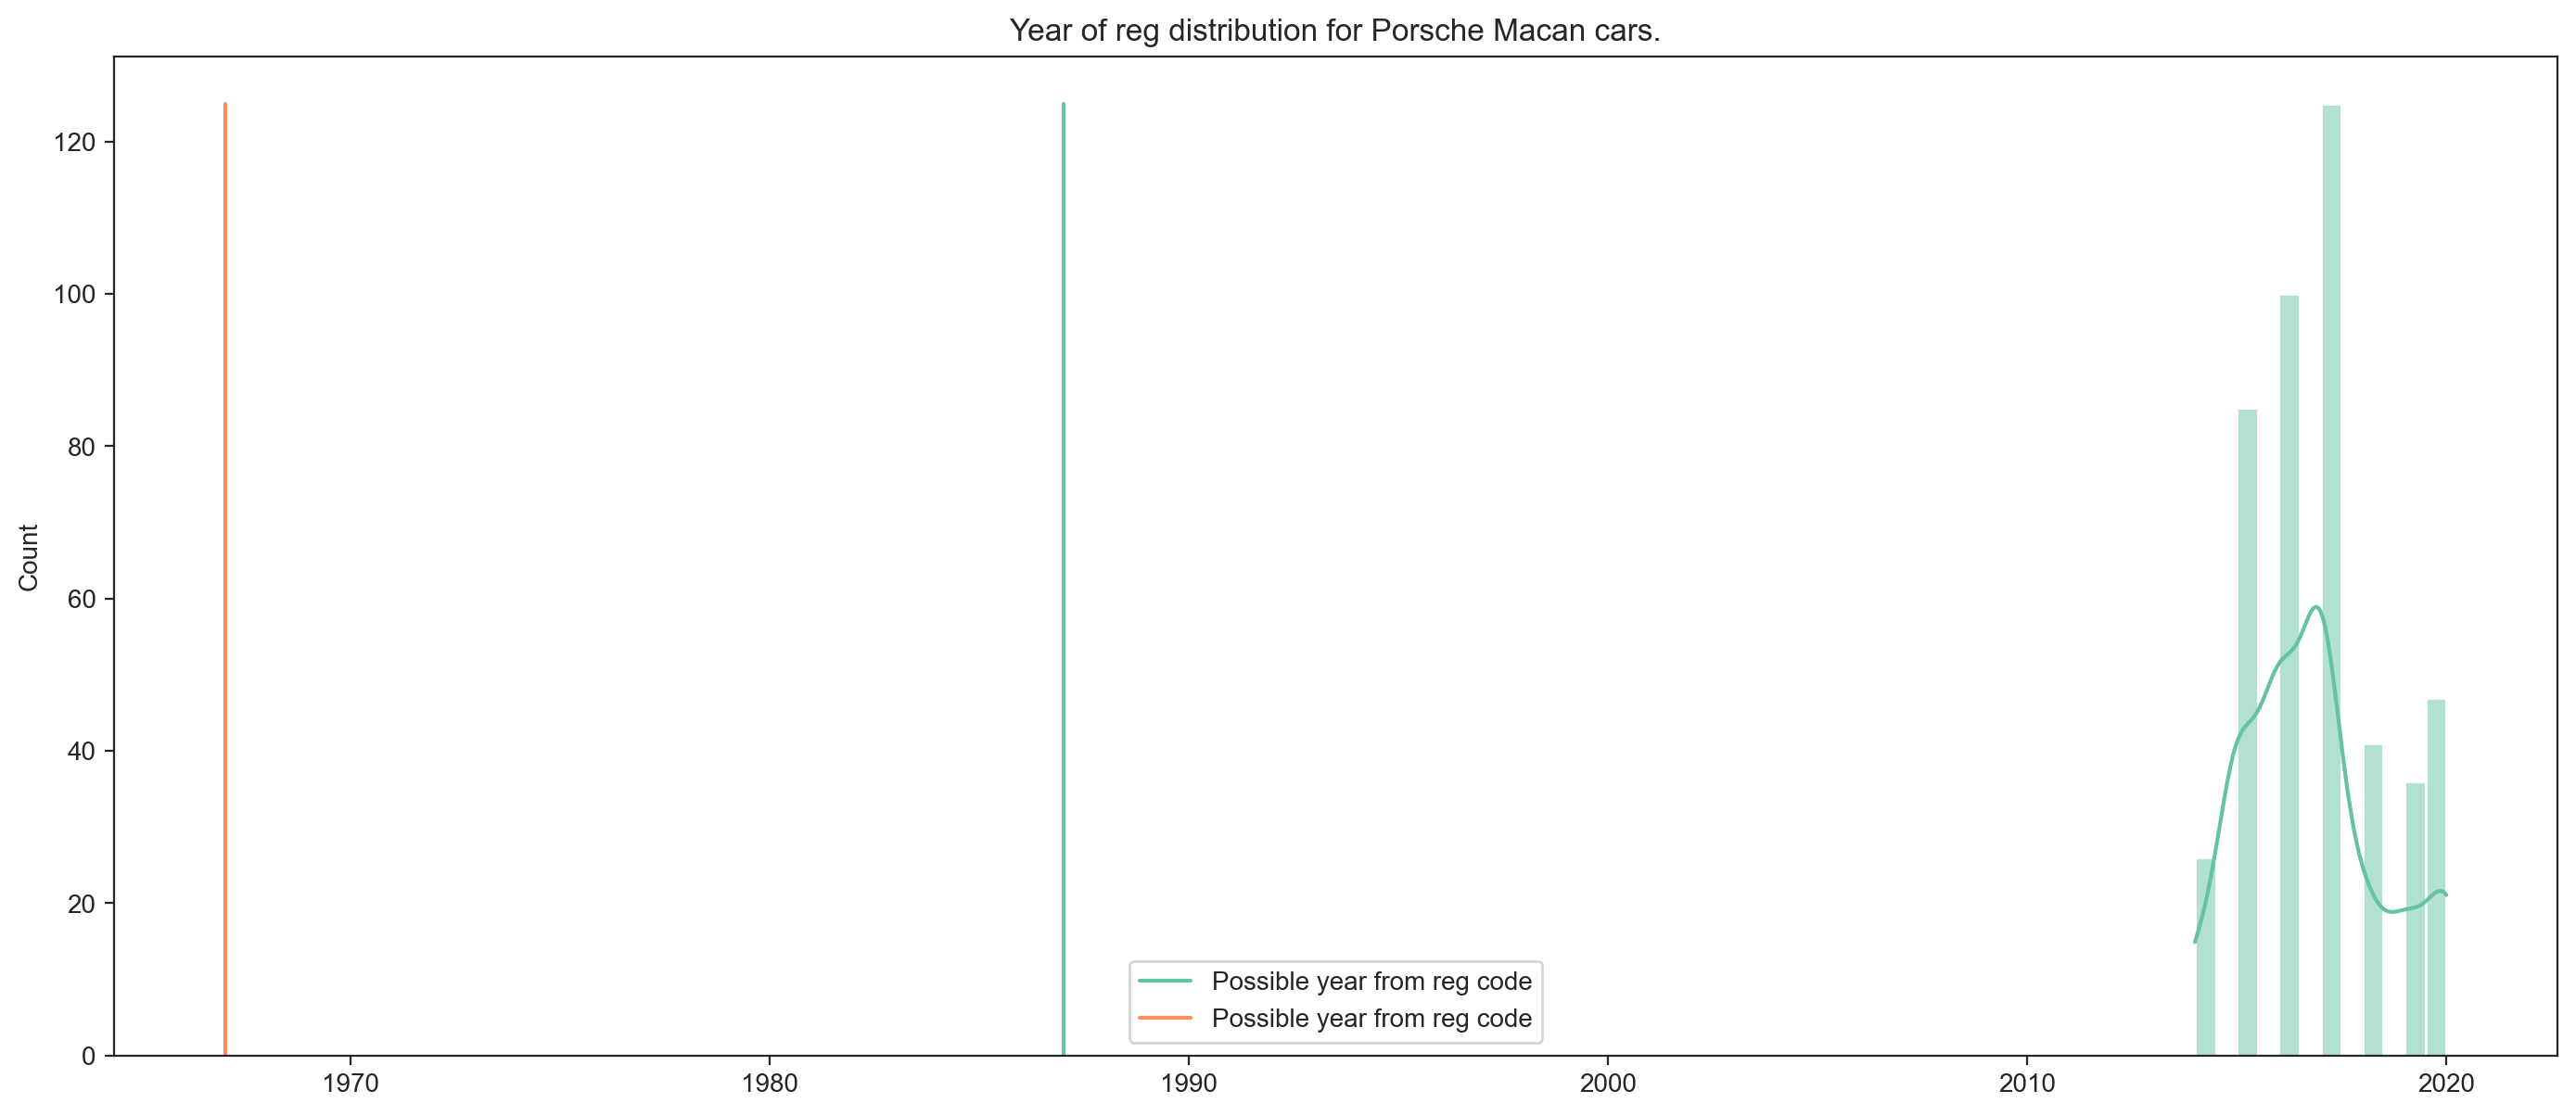

Mean year 2009.48664495114
Closest year: 1988


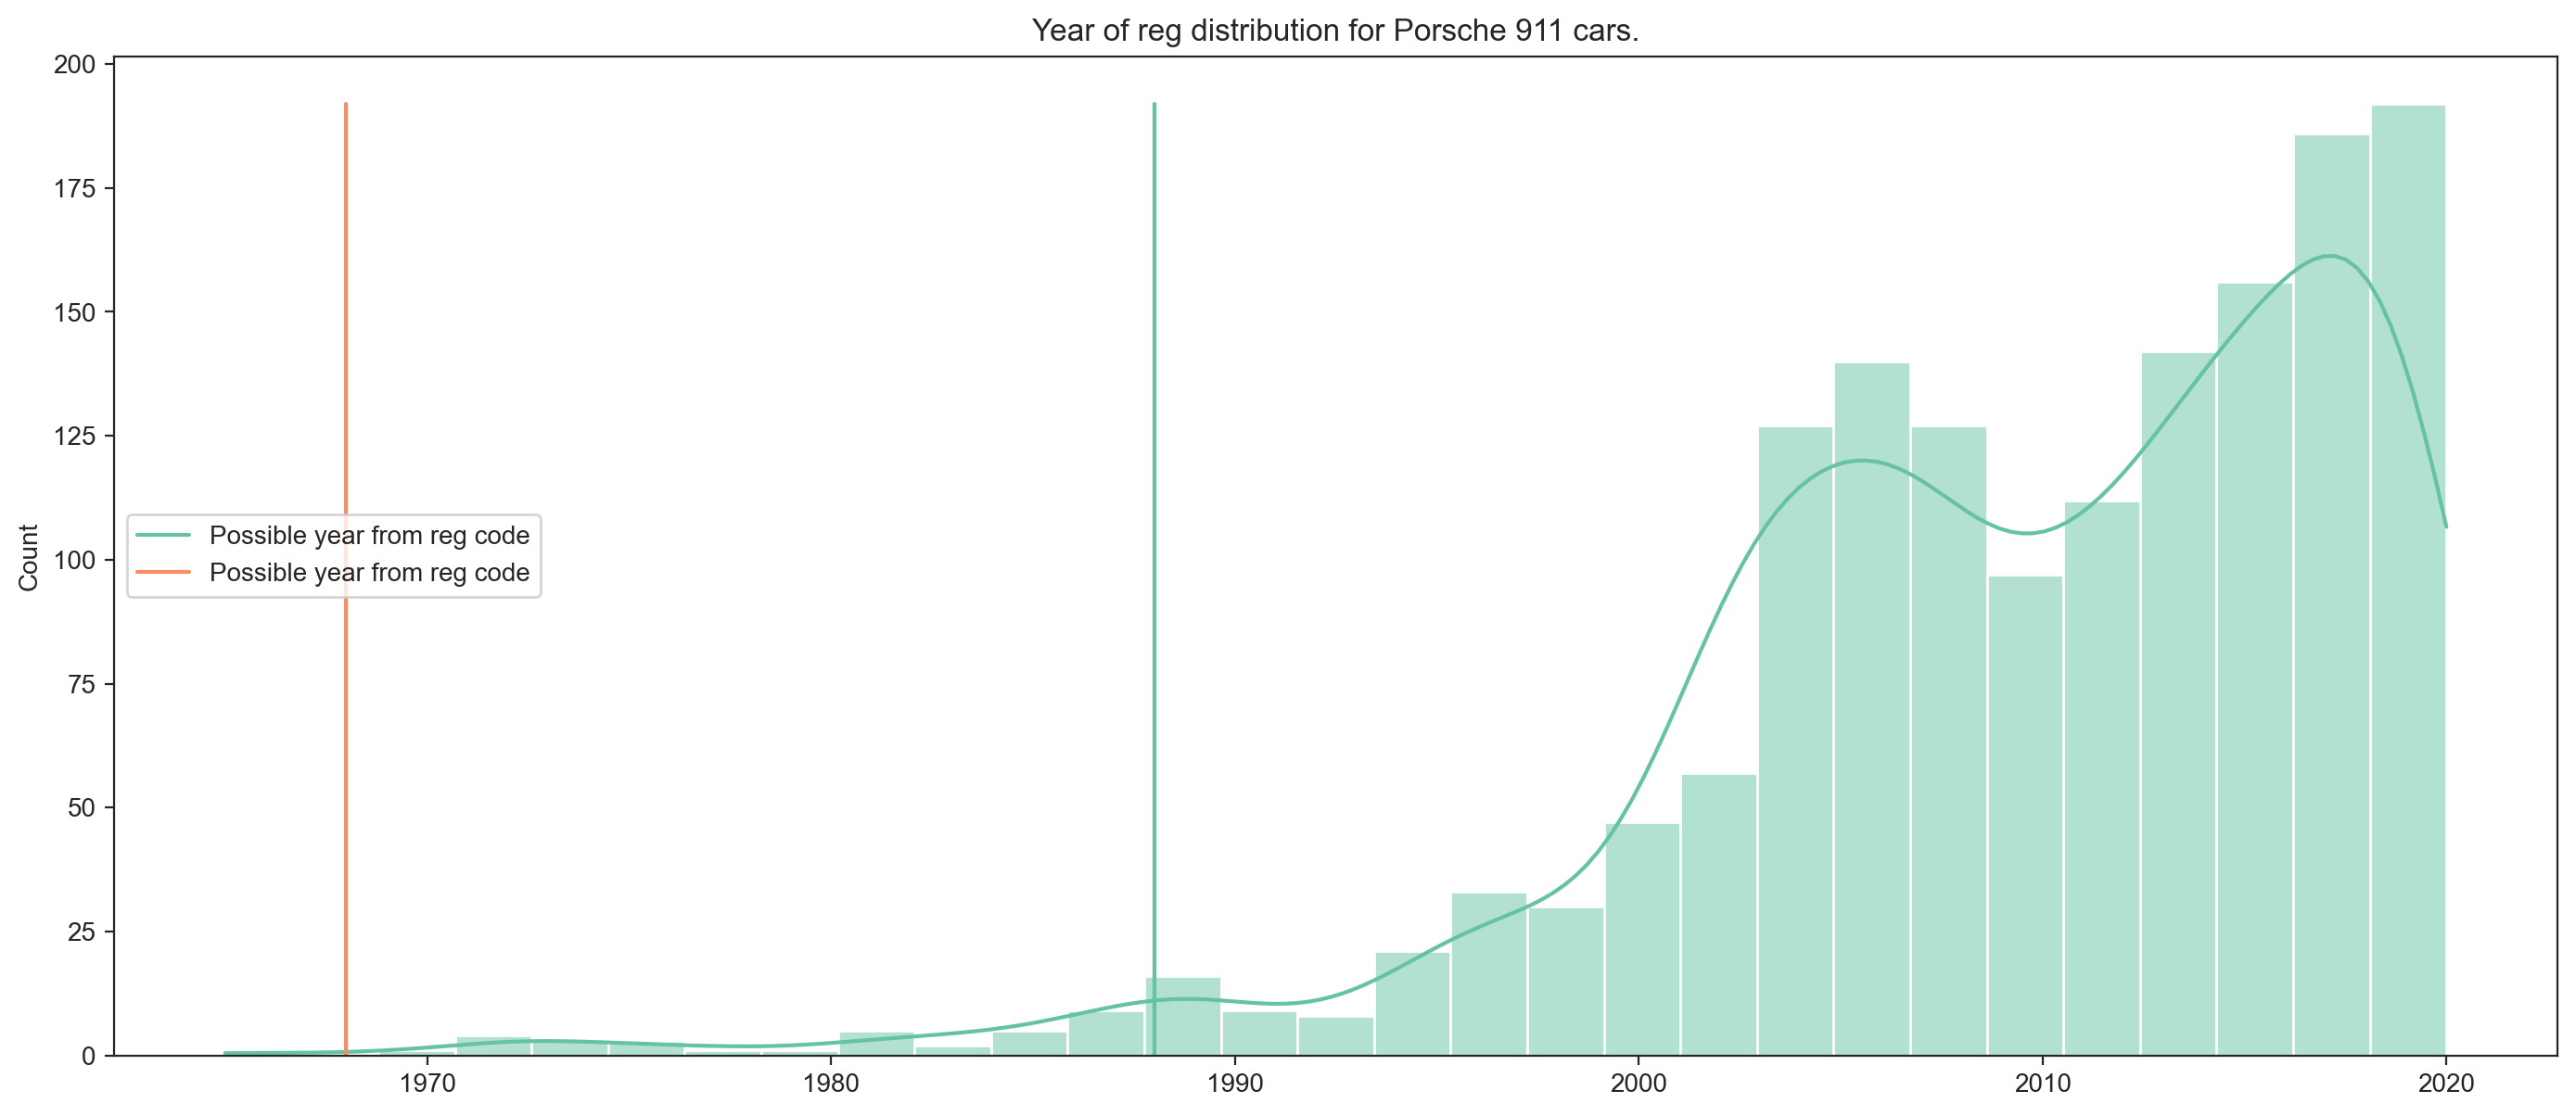

Mean year 2003.7021276595744
Closest year: 1998


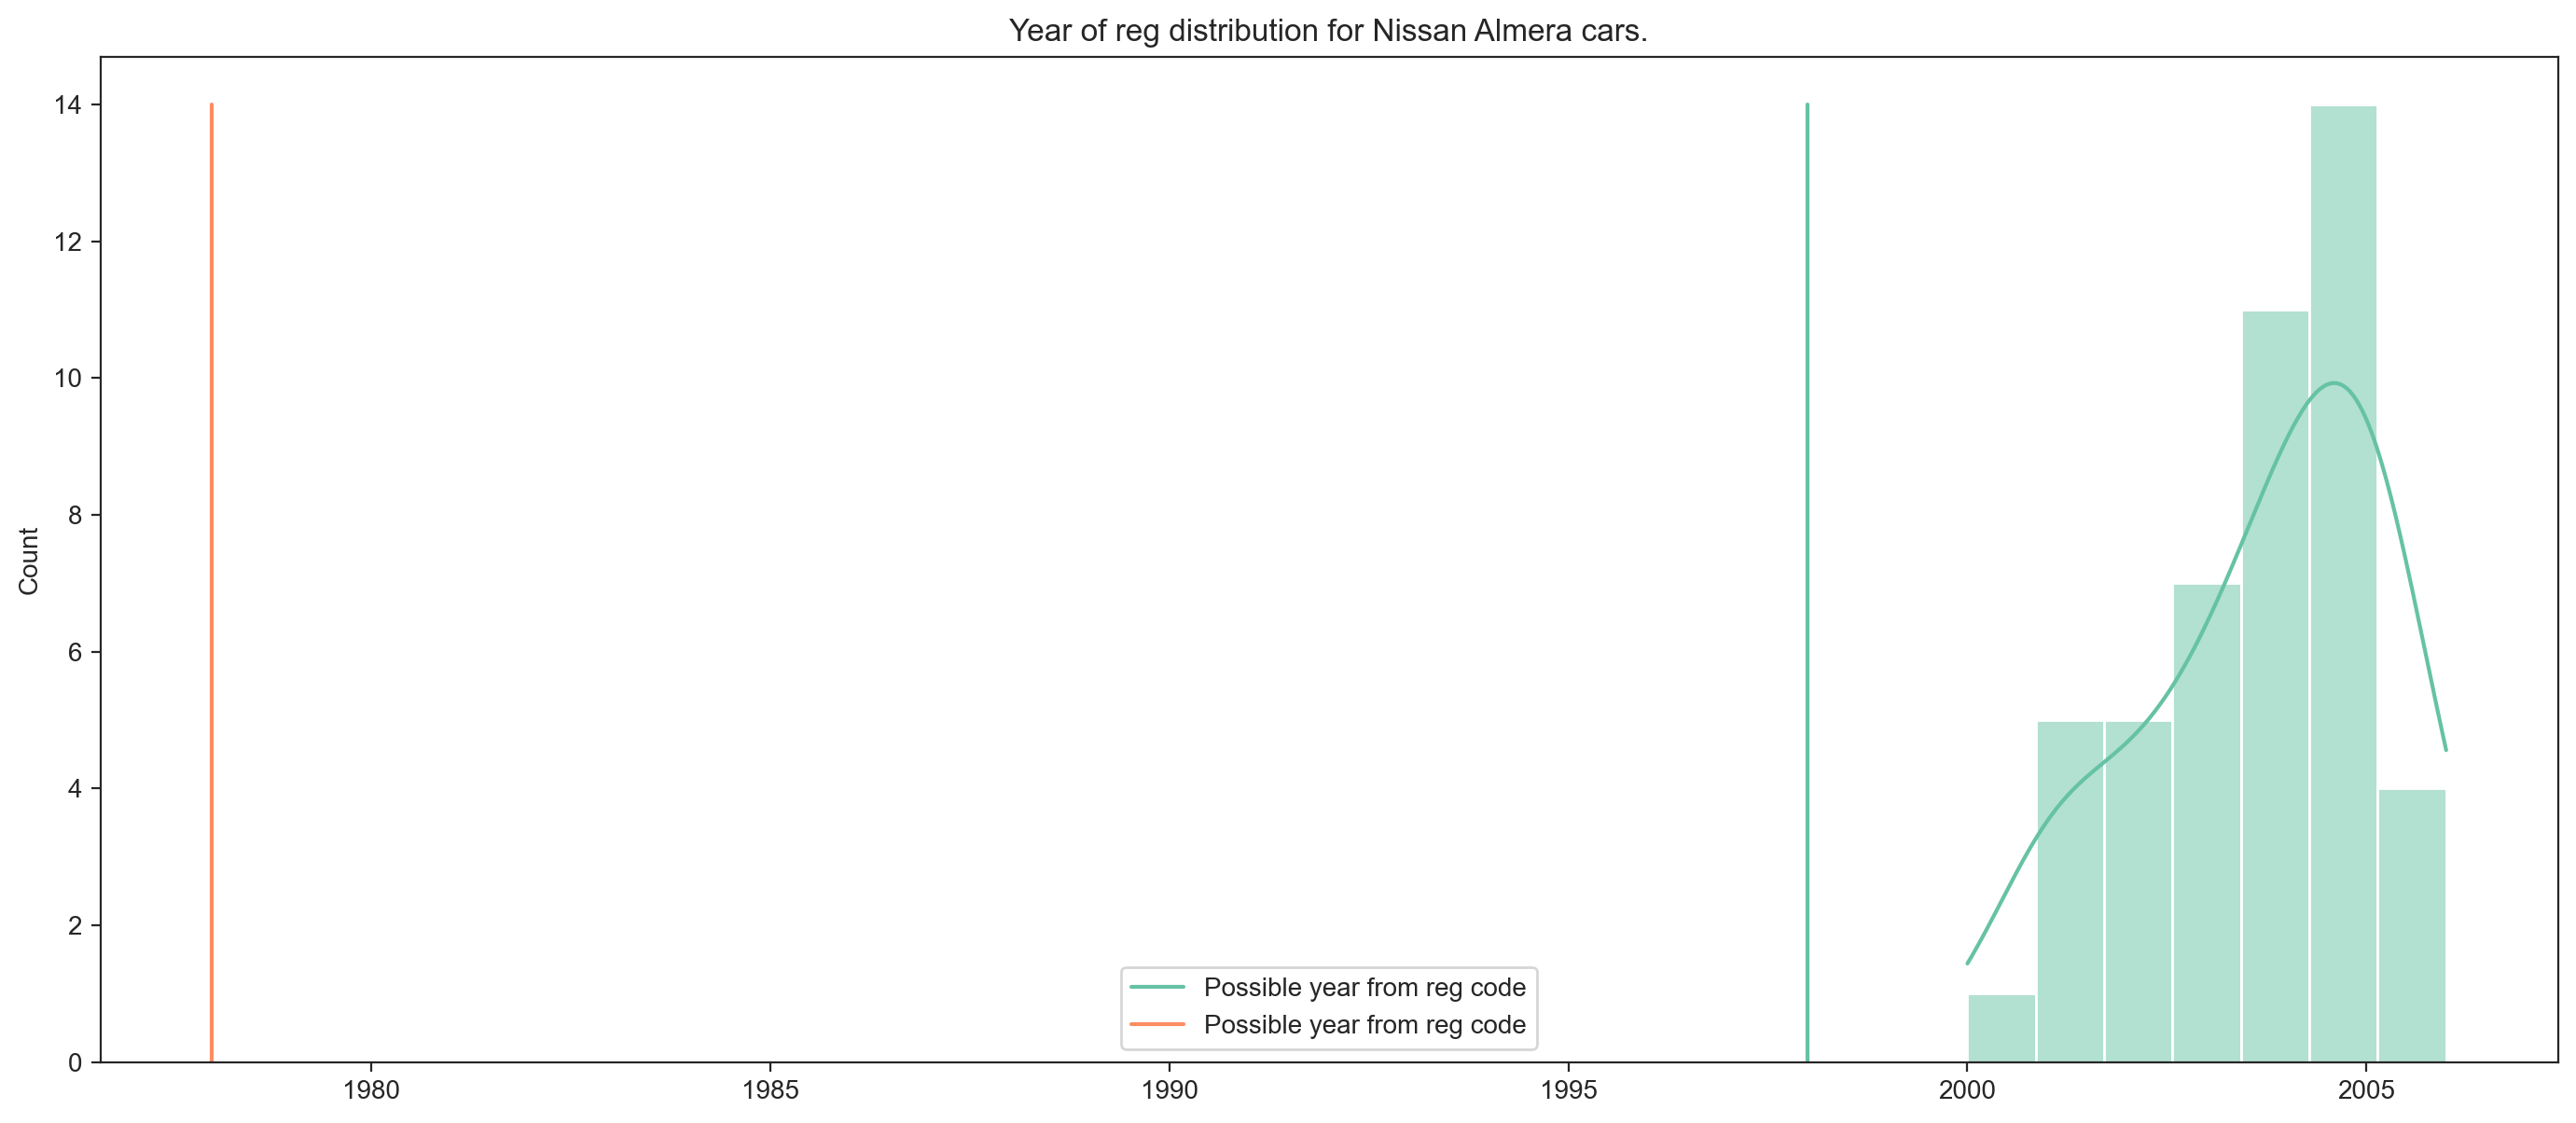

Mean year 1981.5
Closest year: 1974


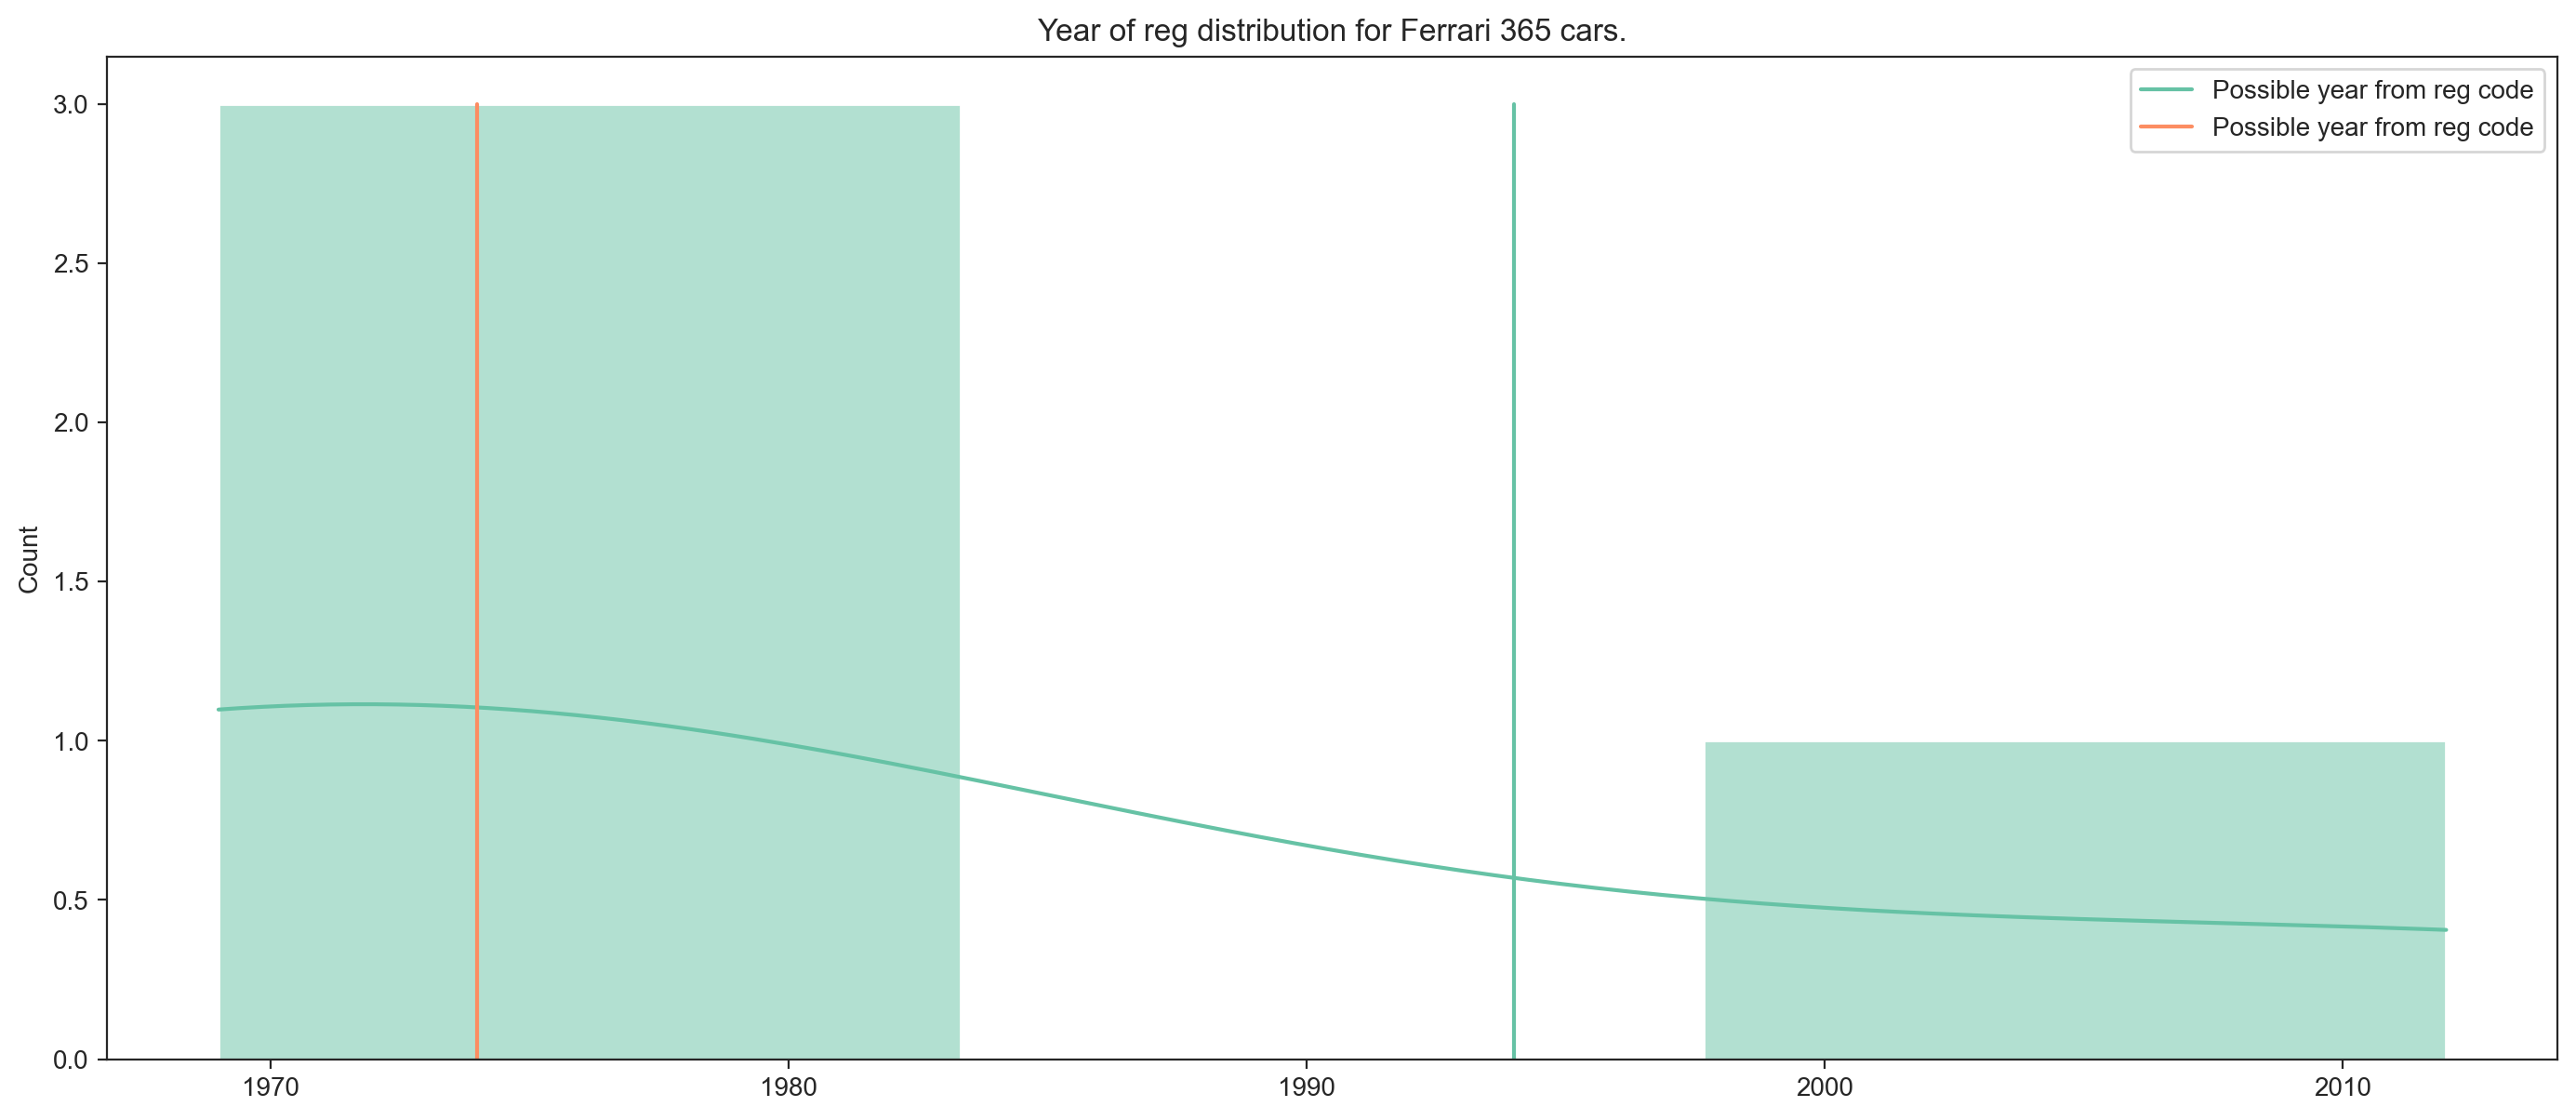

Mean year 2013.9285714285713
Closest year: 1999


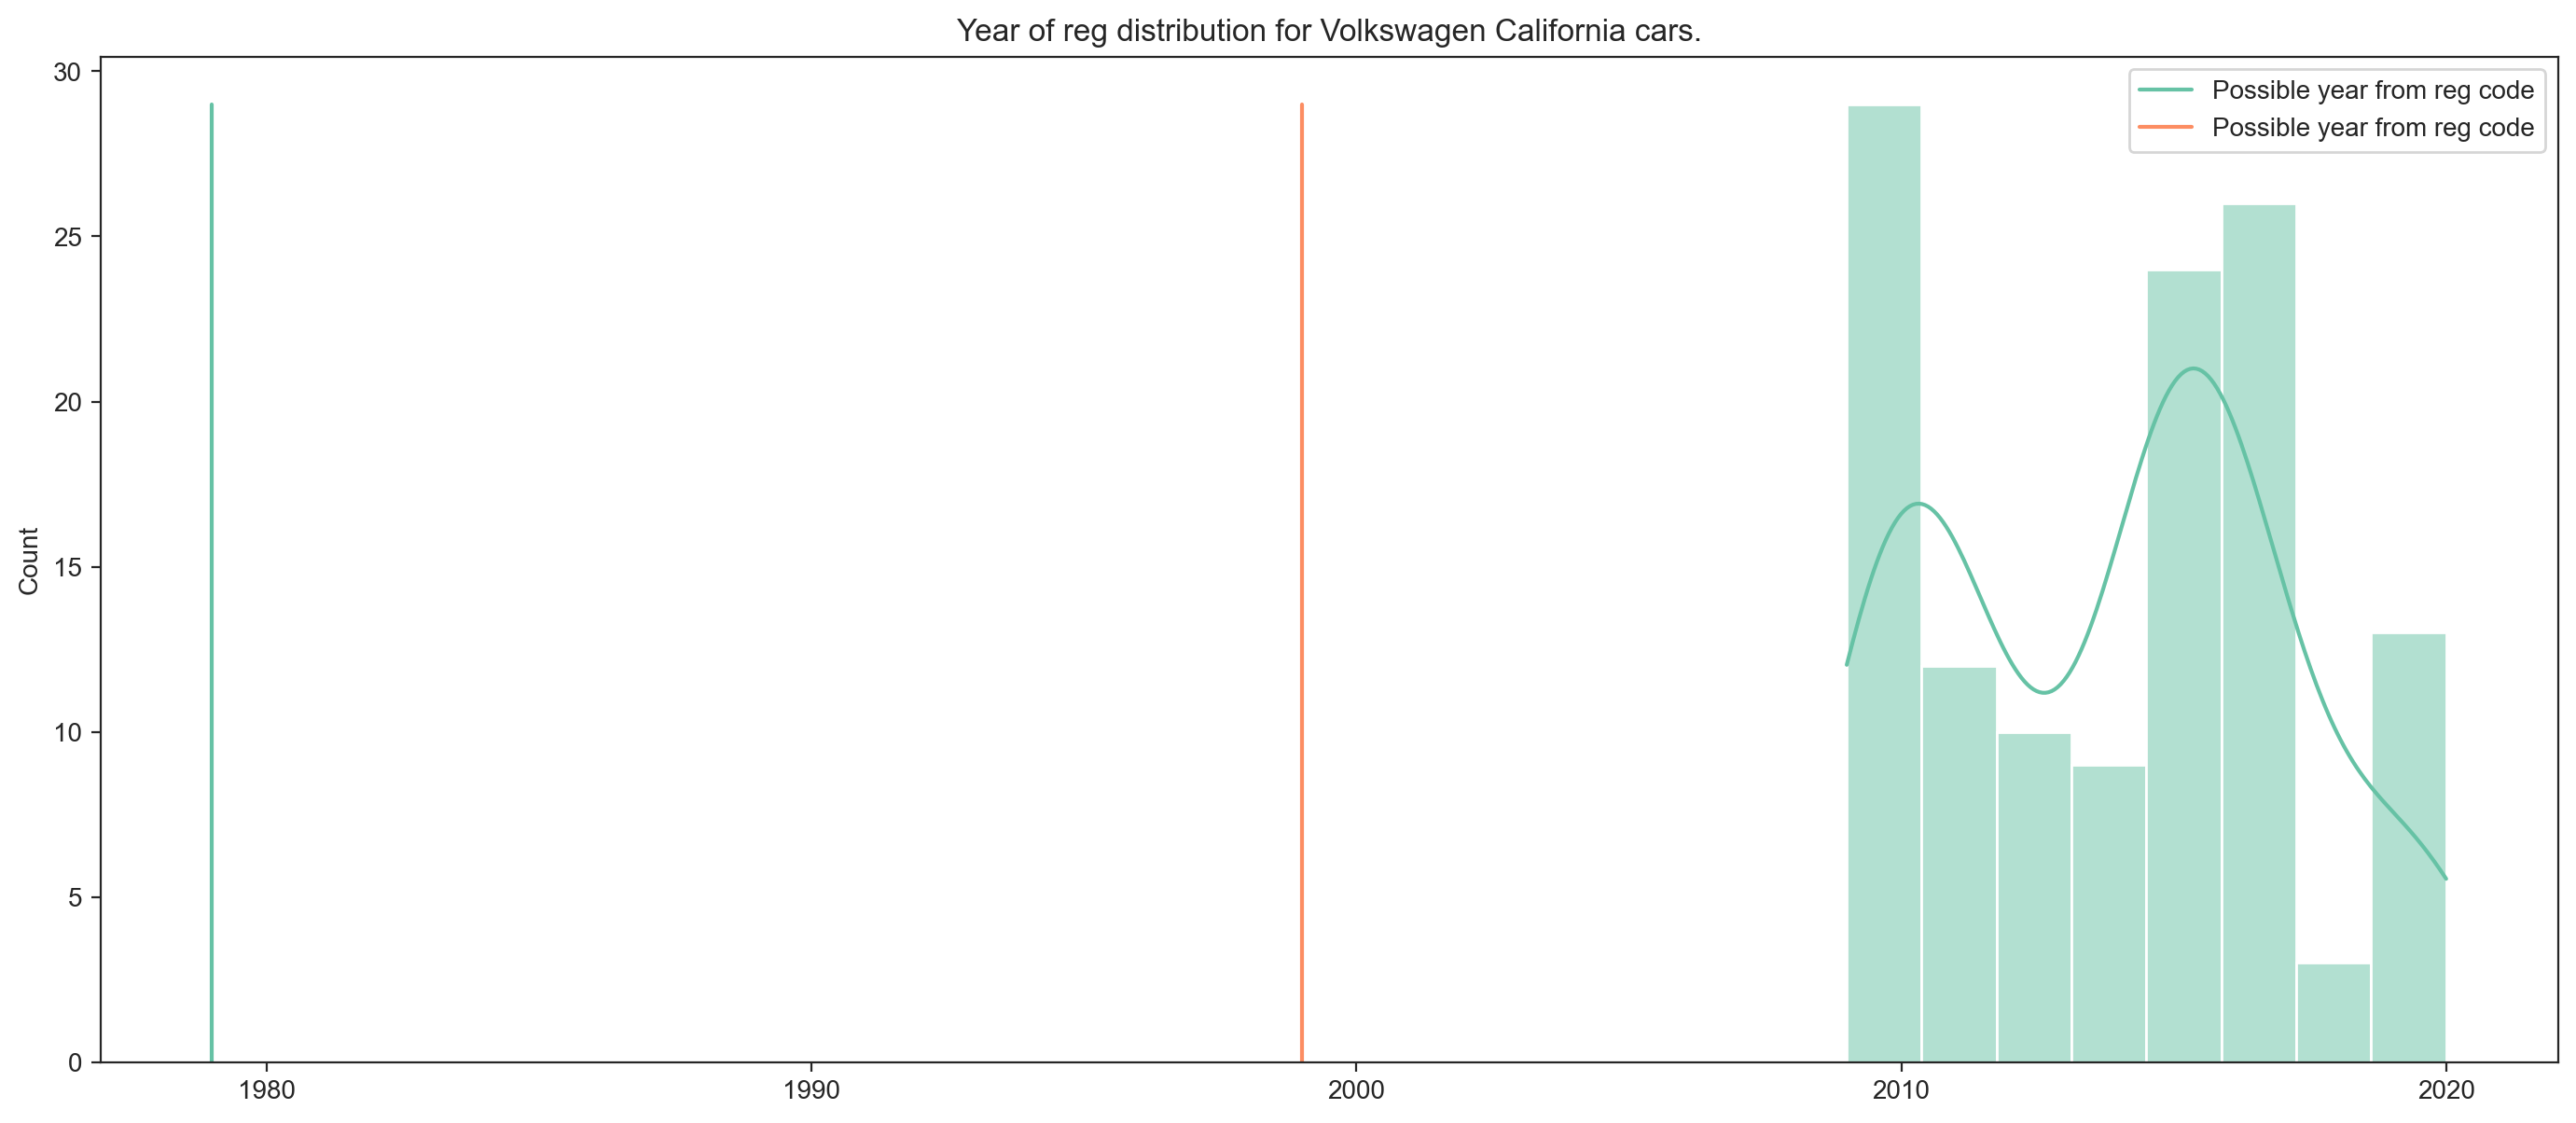

Mean year 1976.8
Closest year: 1973


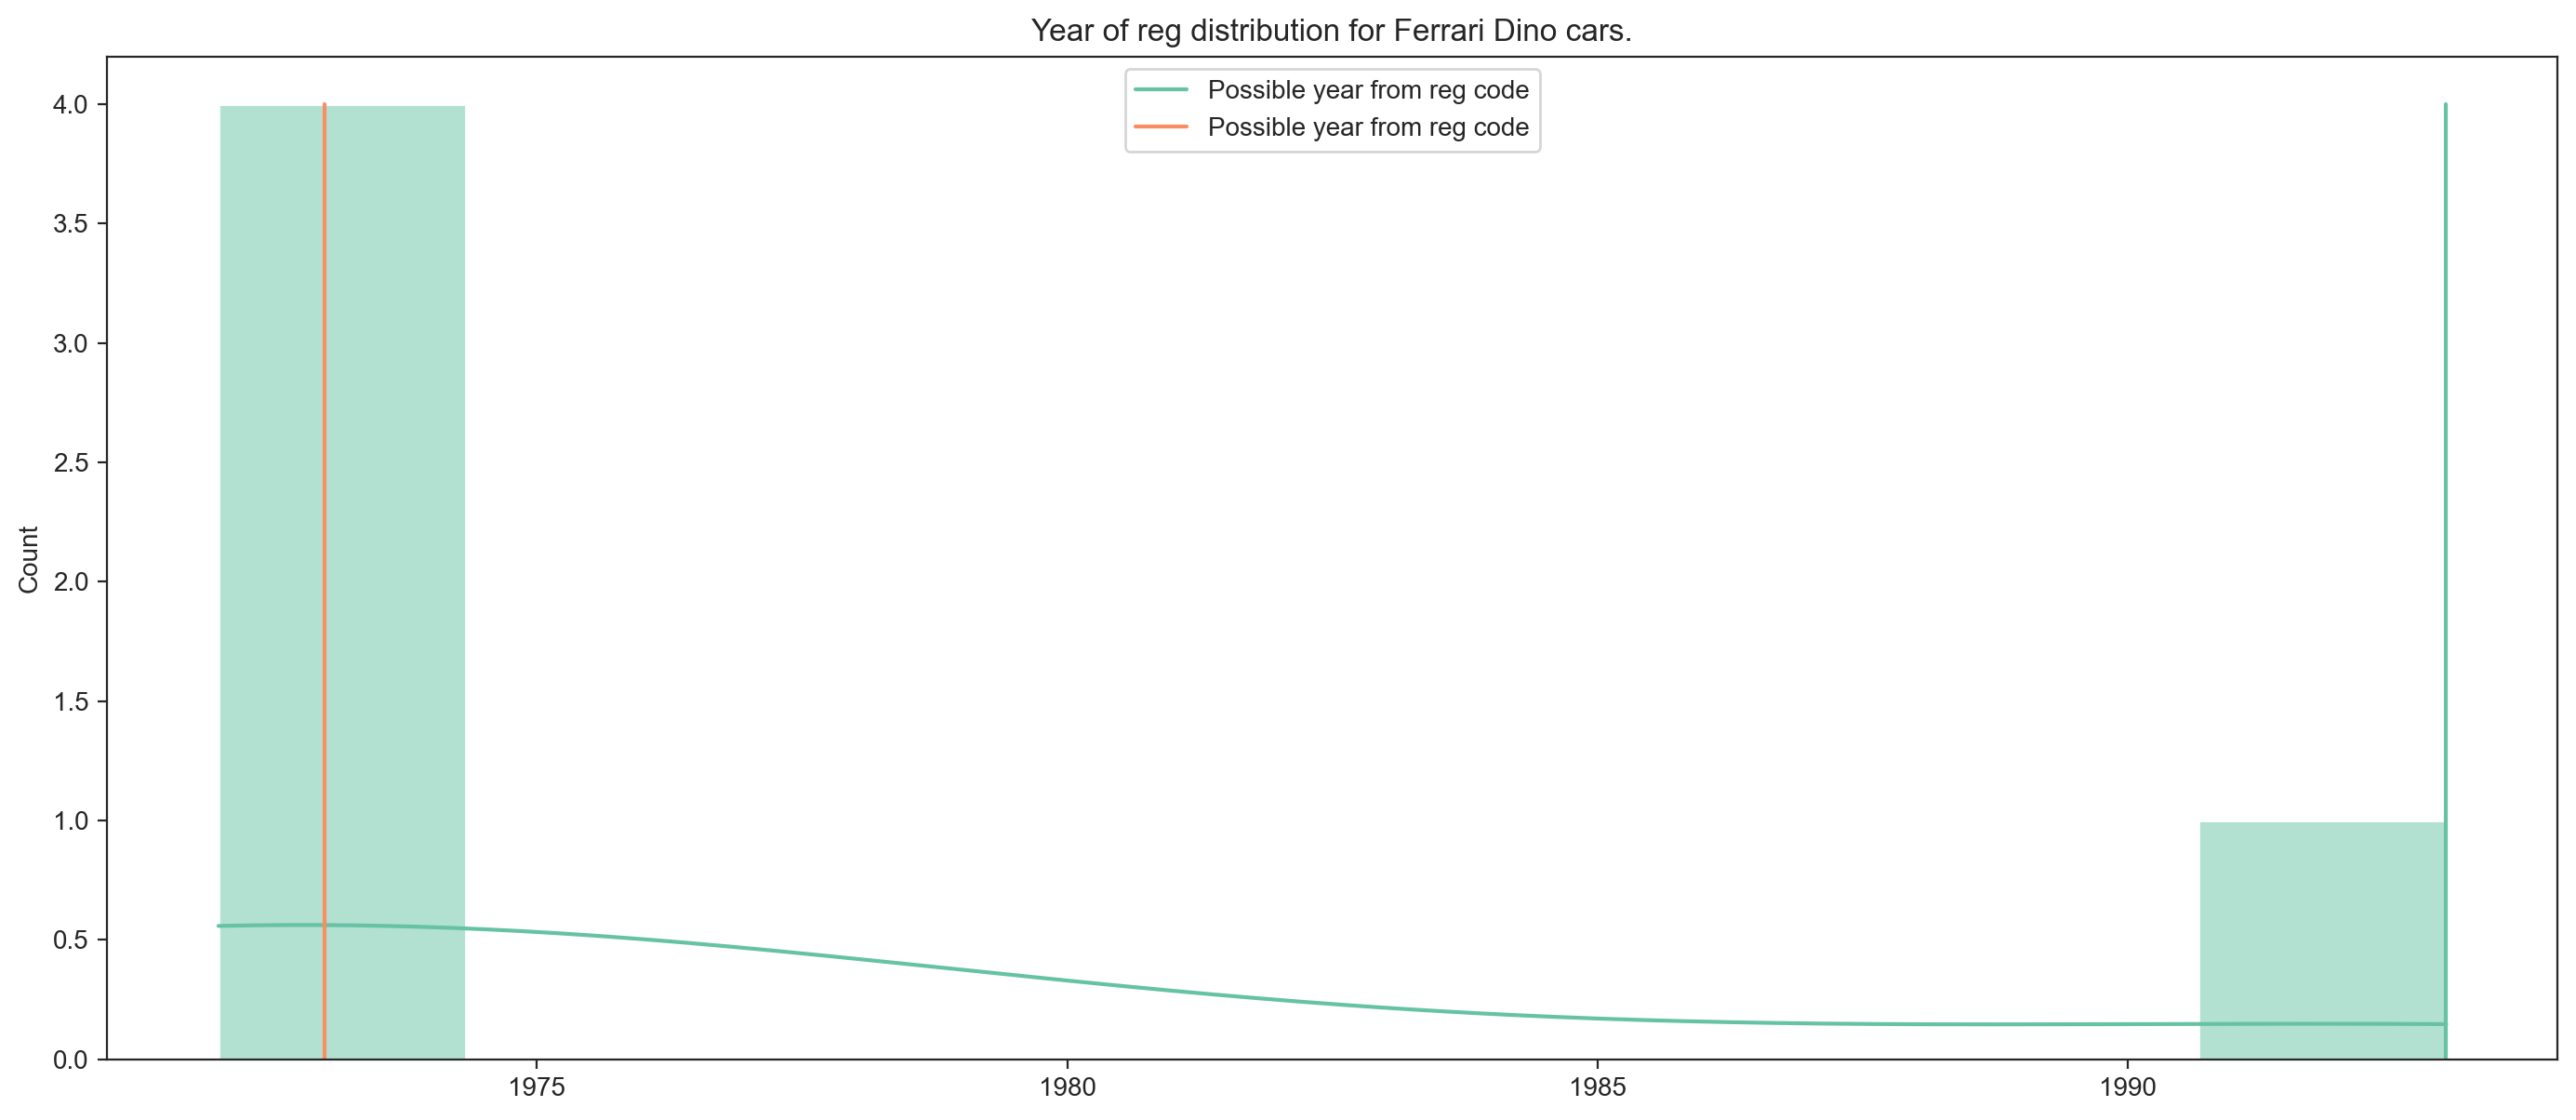

Mean year 1976.6666666666667
Closest year: 1974


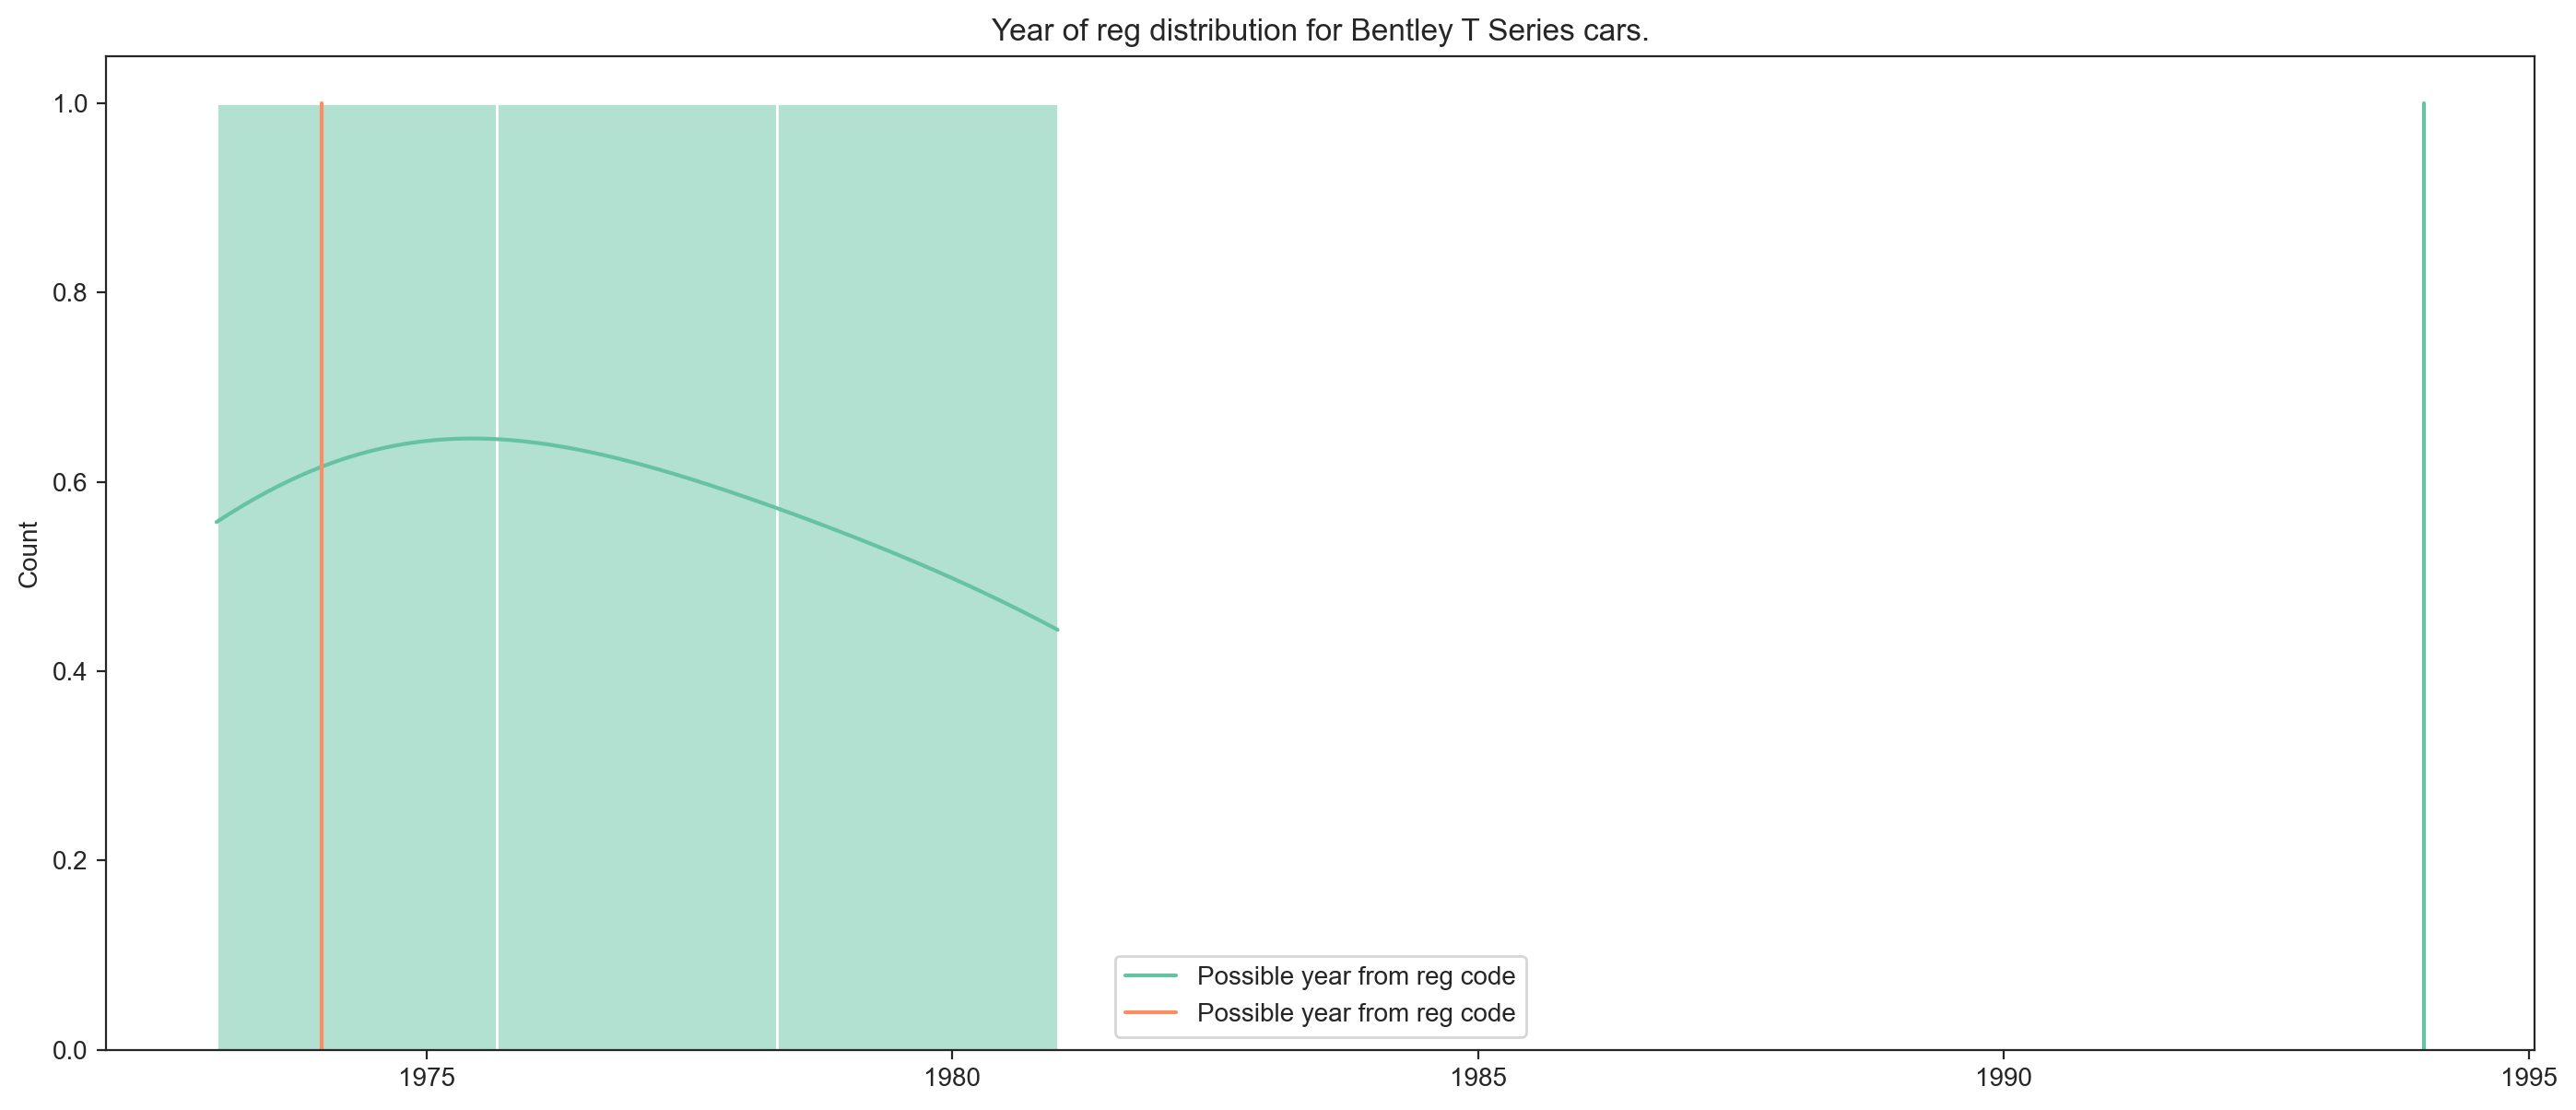

Mean year 2009.48664495114
Closest year: 1997


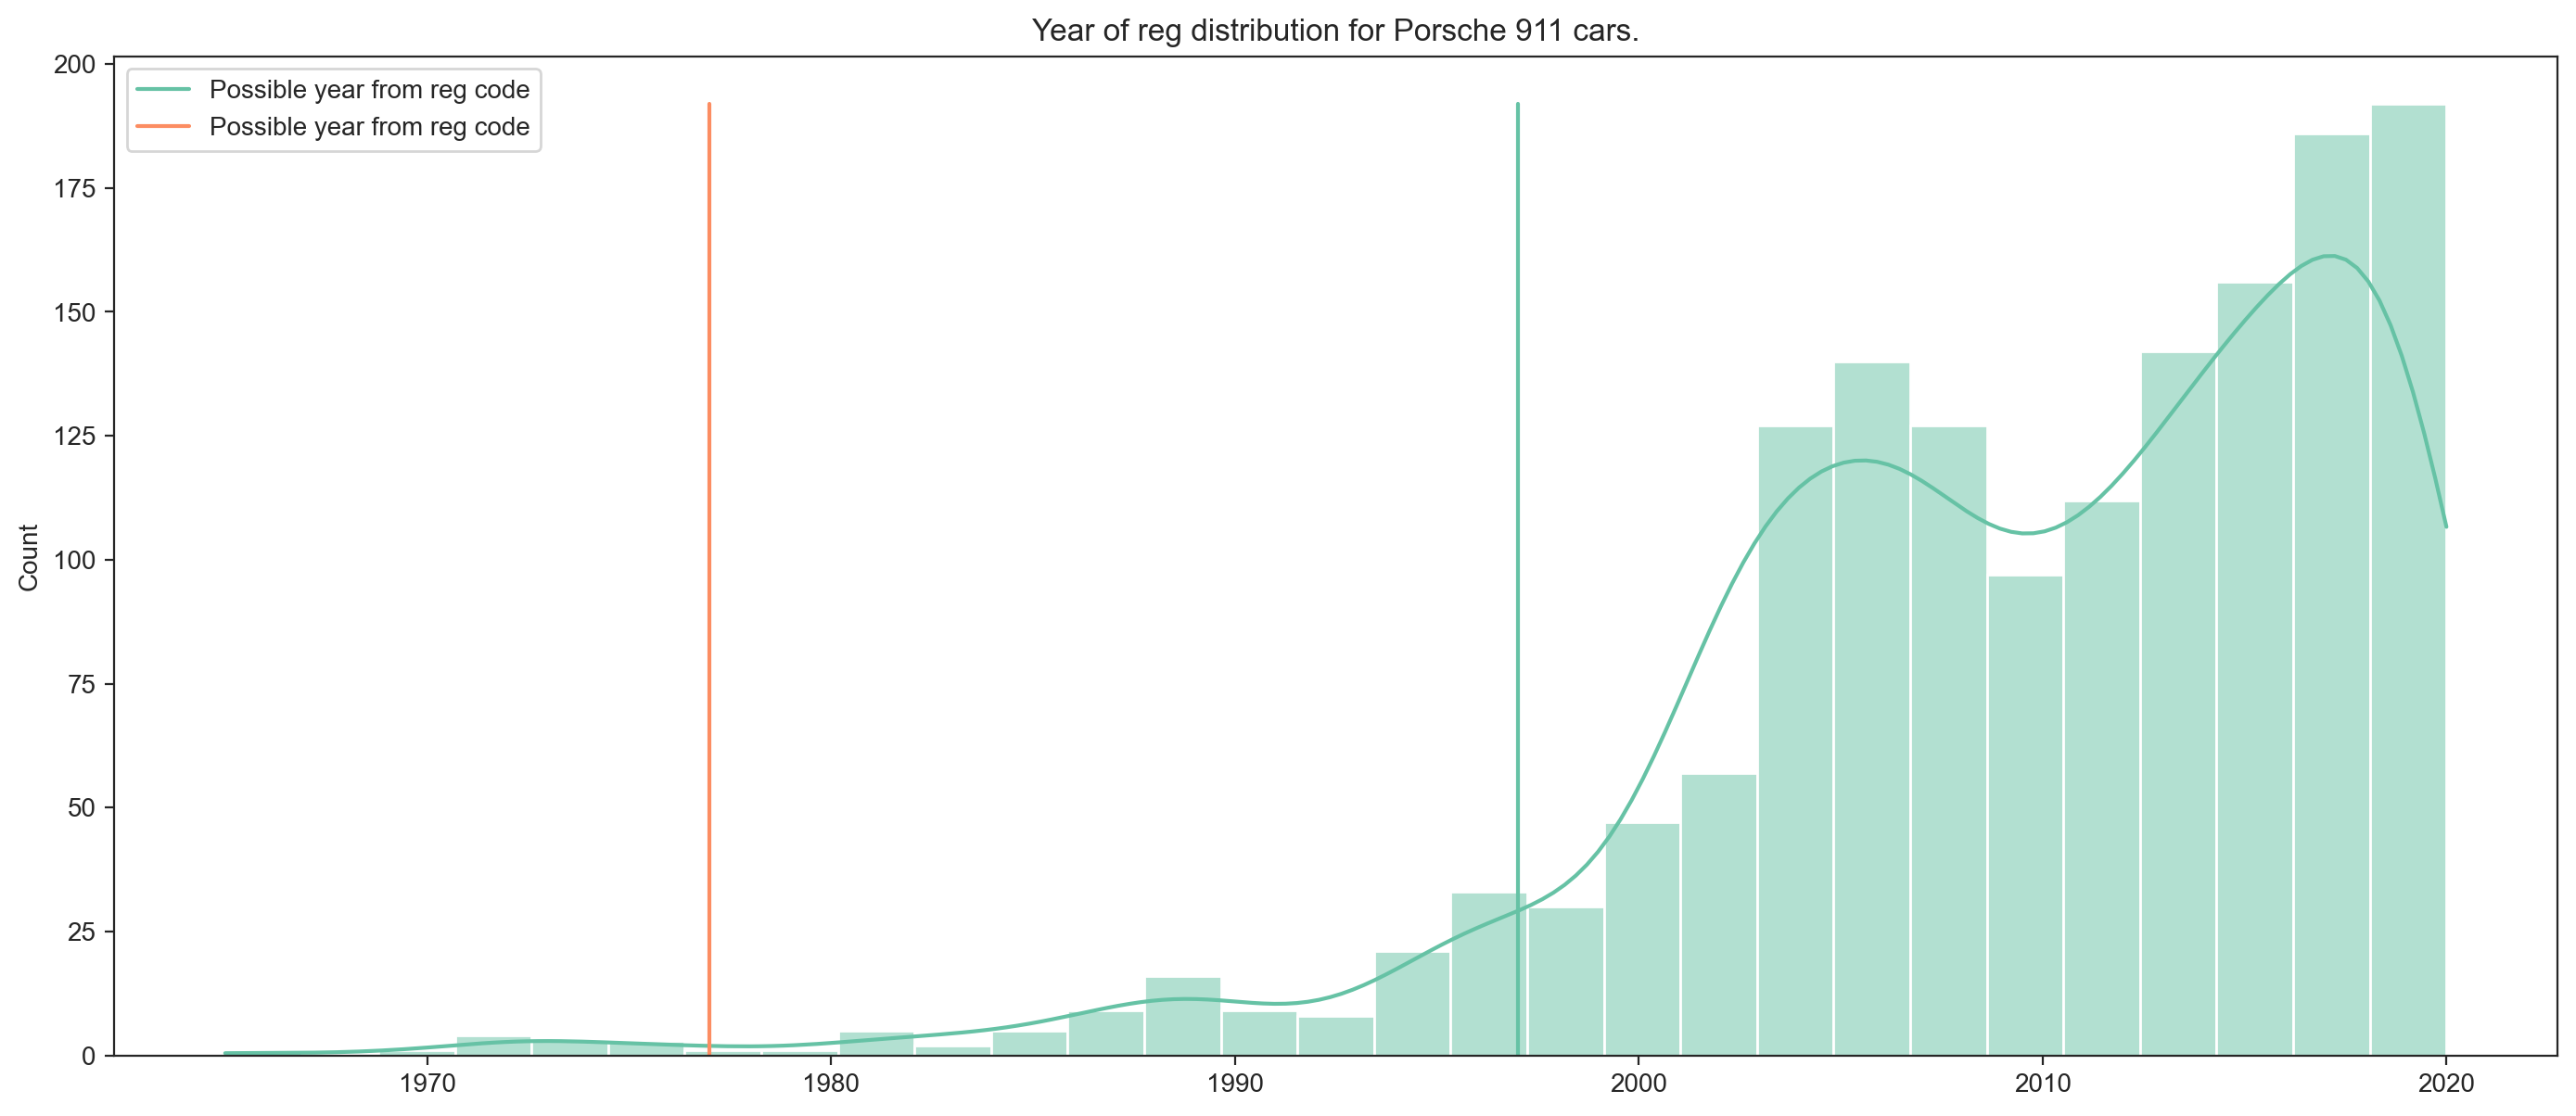

Mean year 1973.625
Closest year: 1977


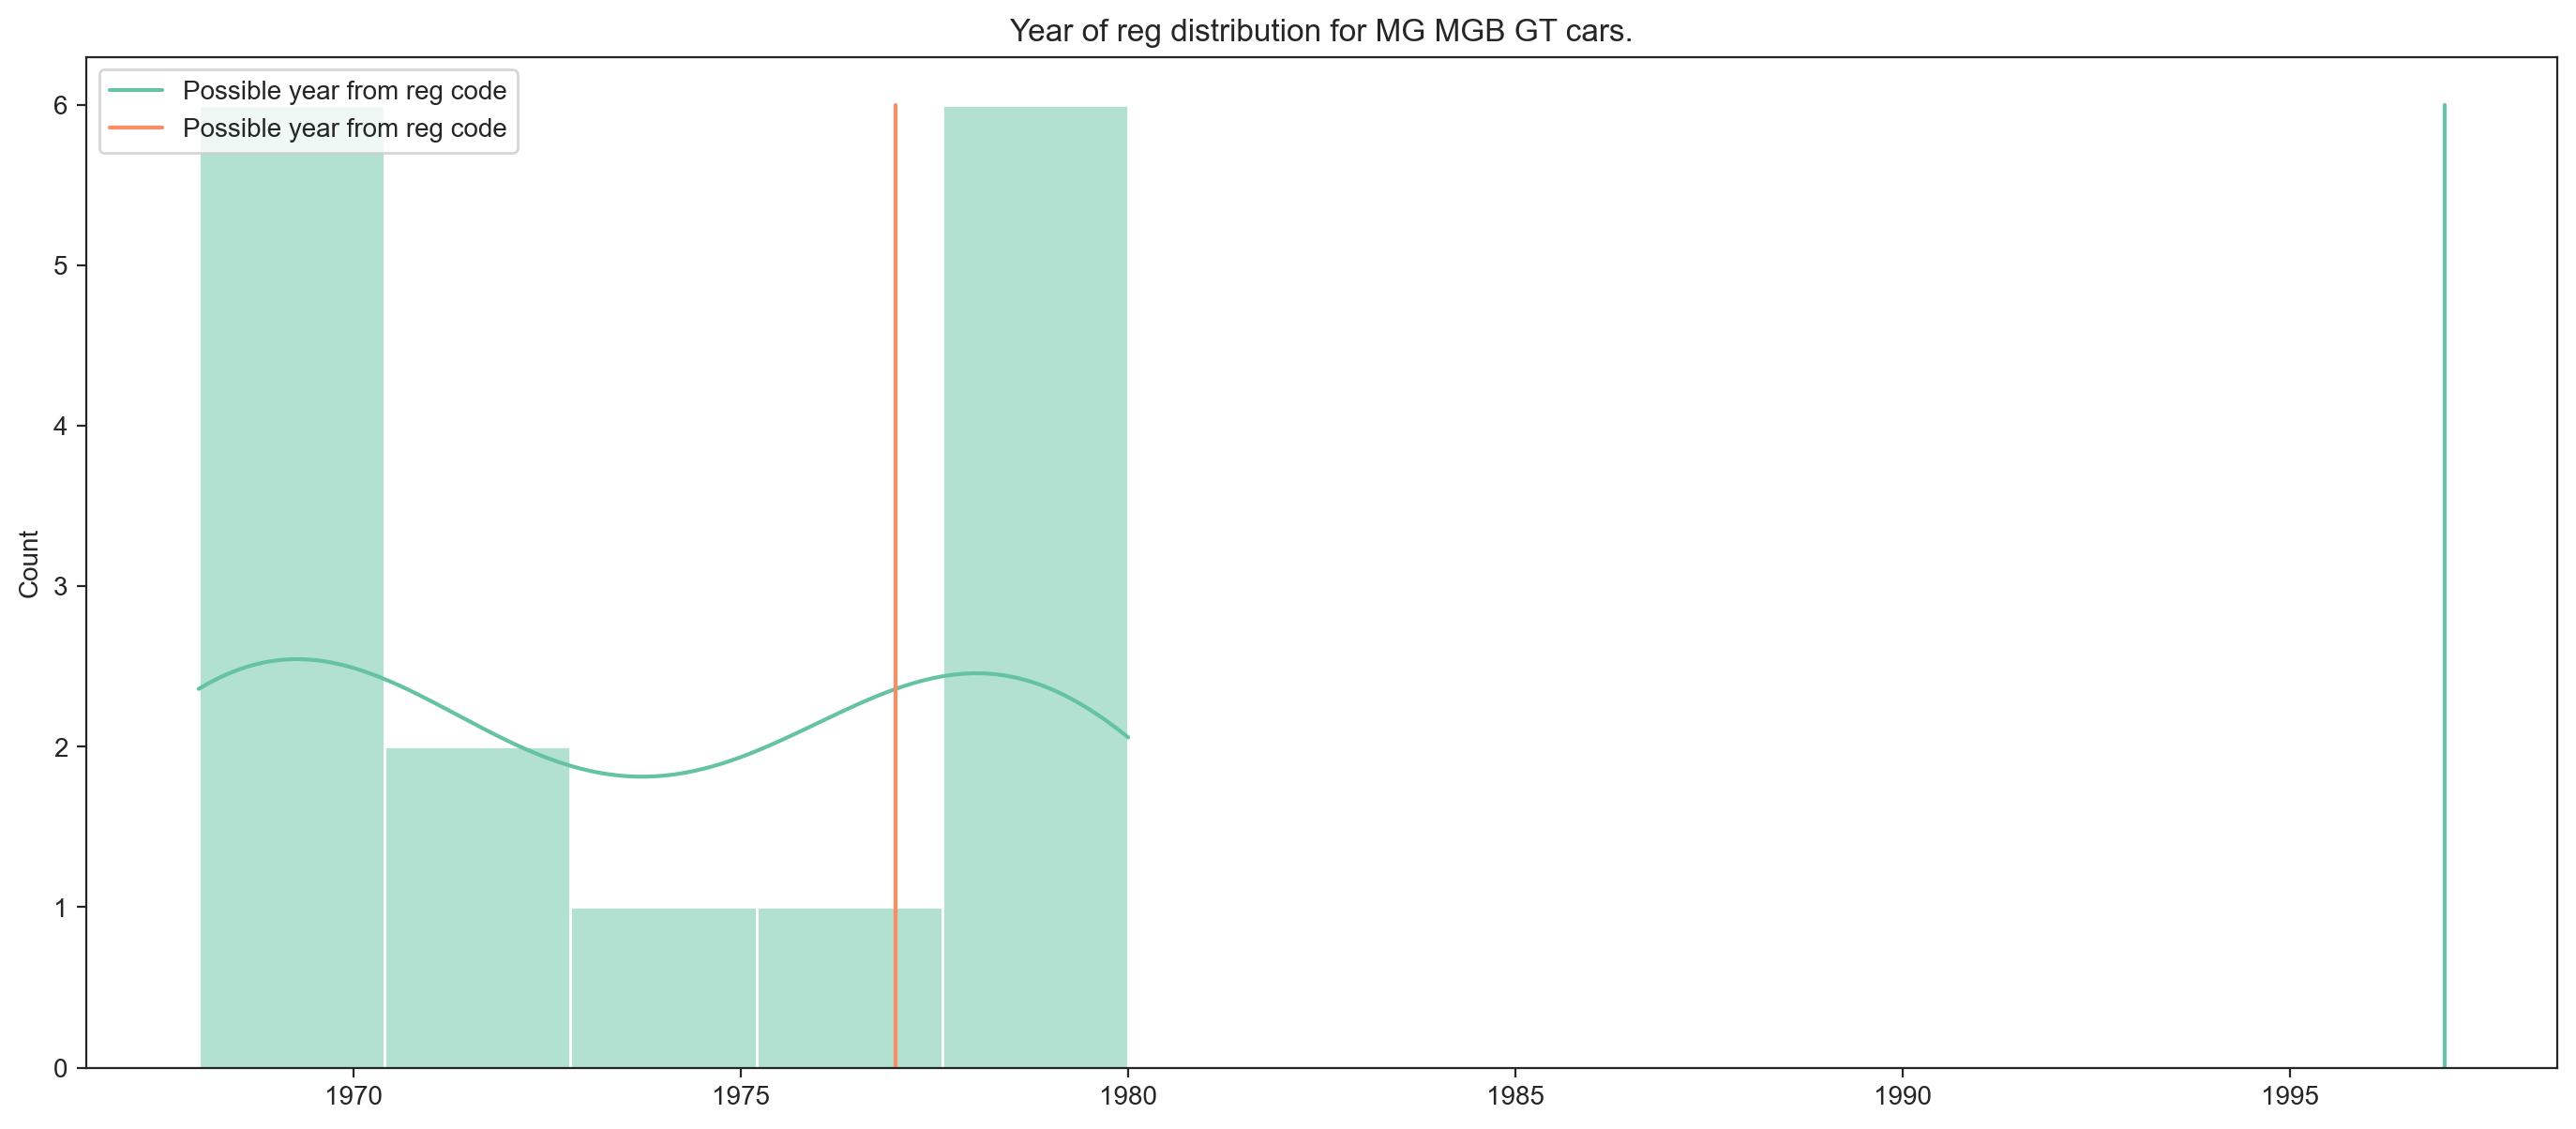

Mean year 1963.7272727272727
Closest year: 1969


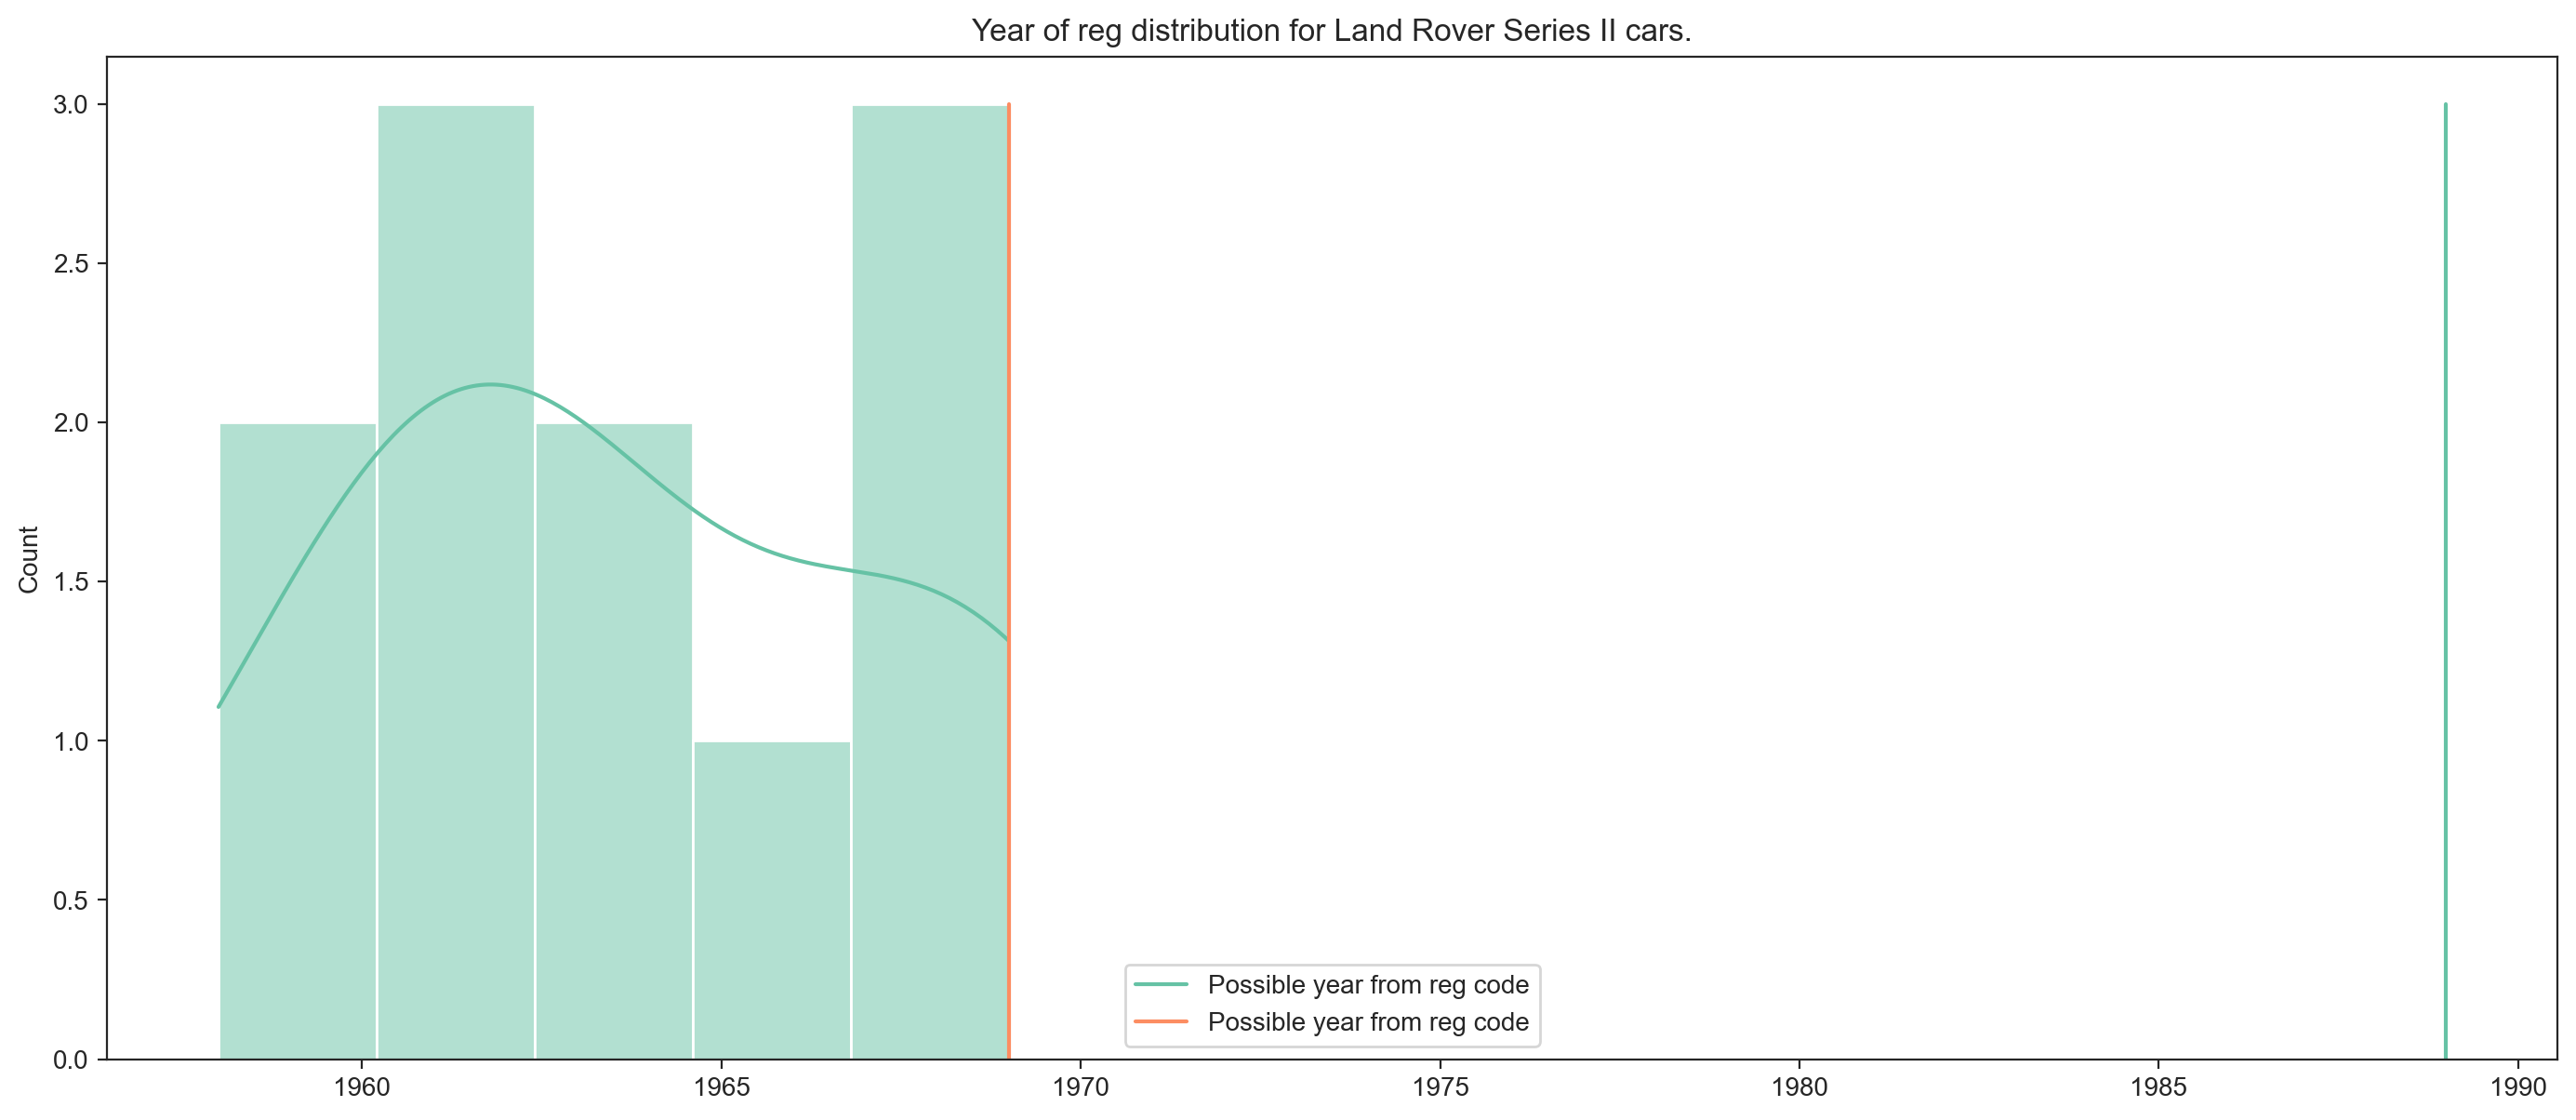

Mean year 1992.5
Closest year: 1988


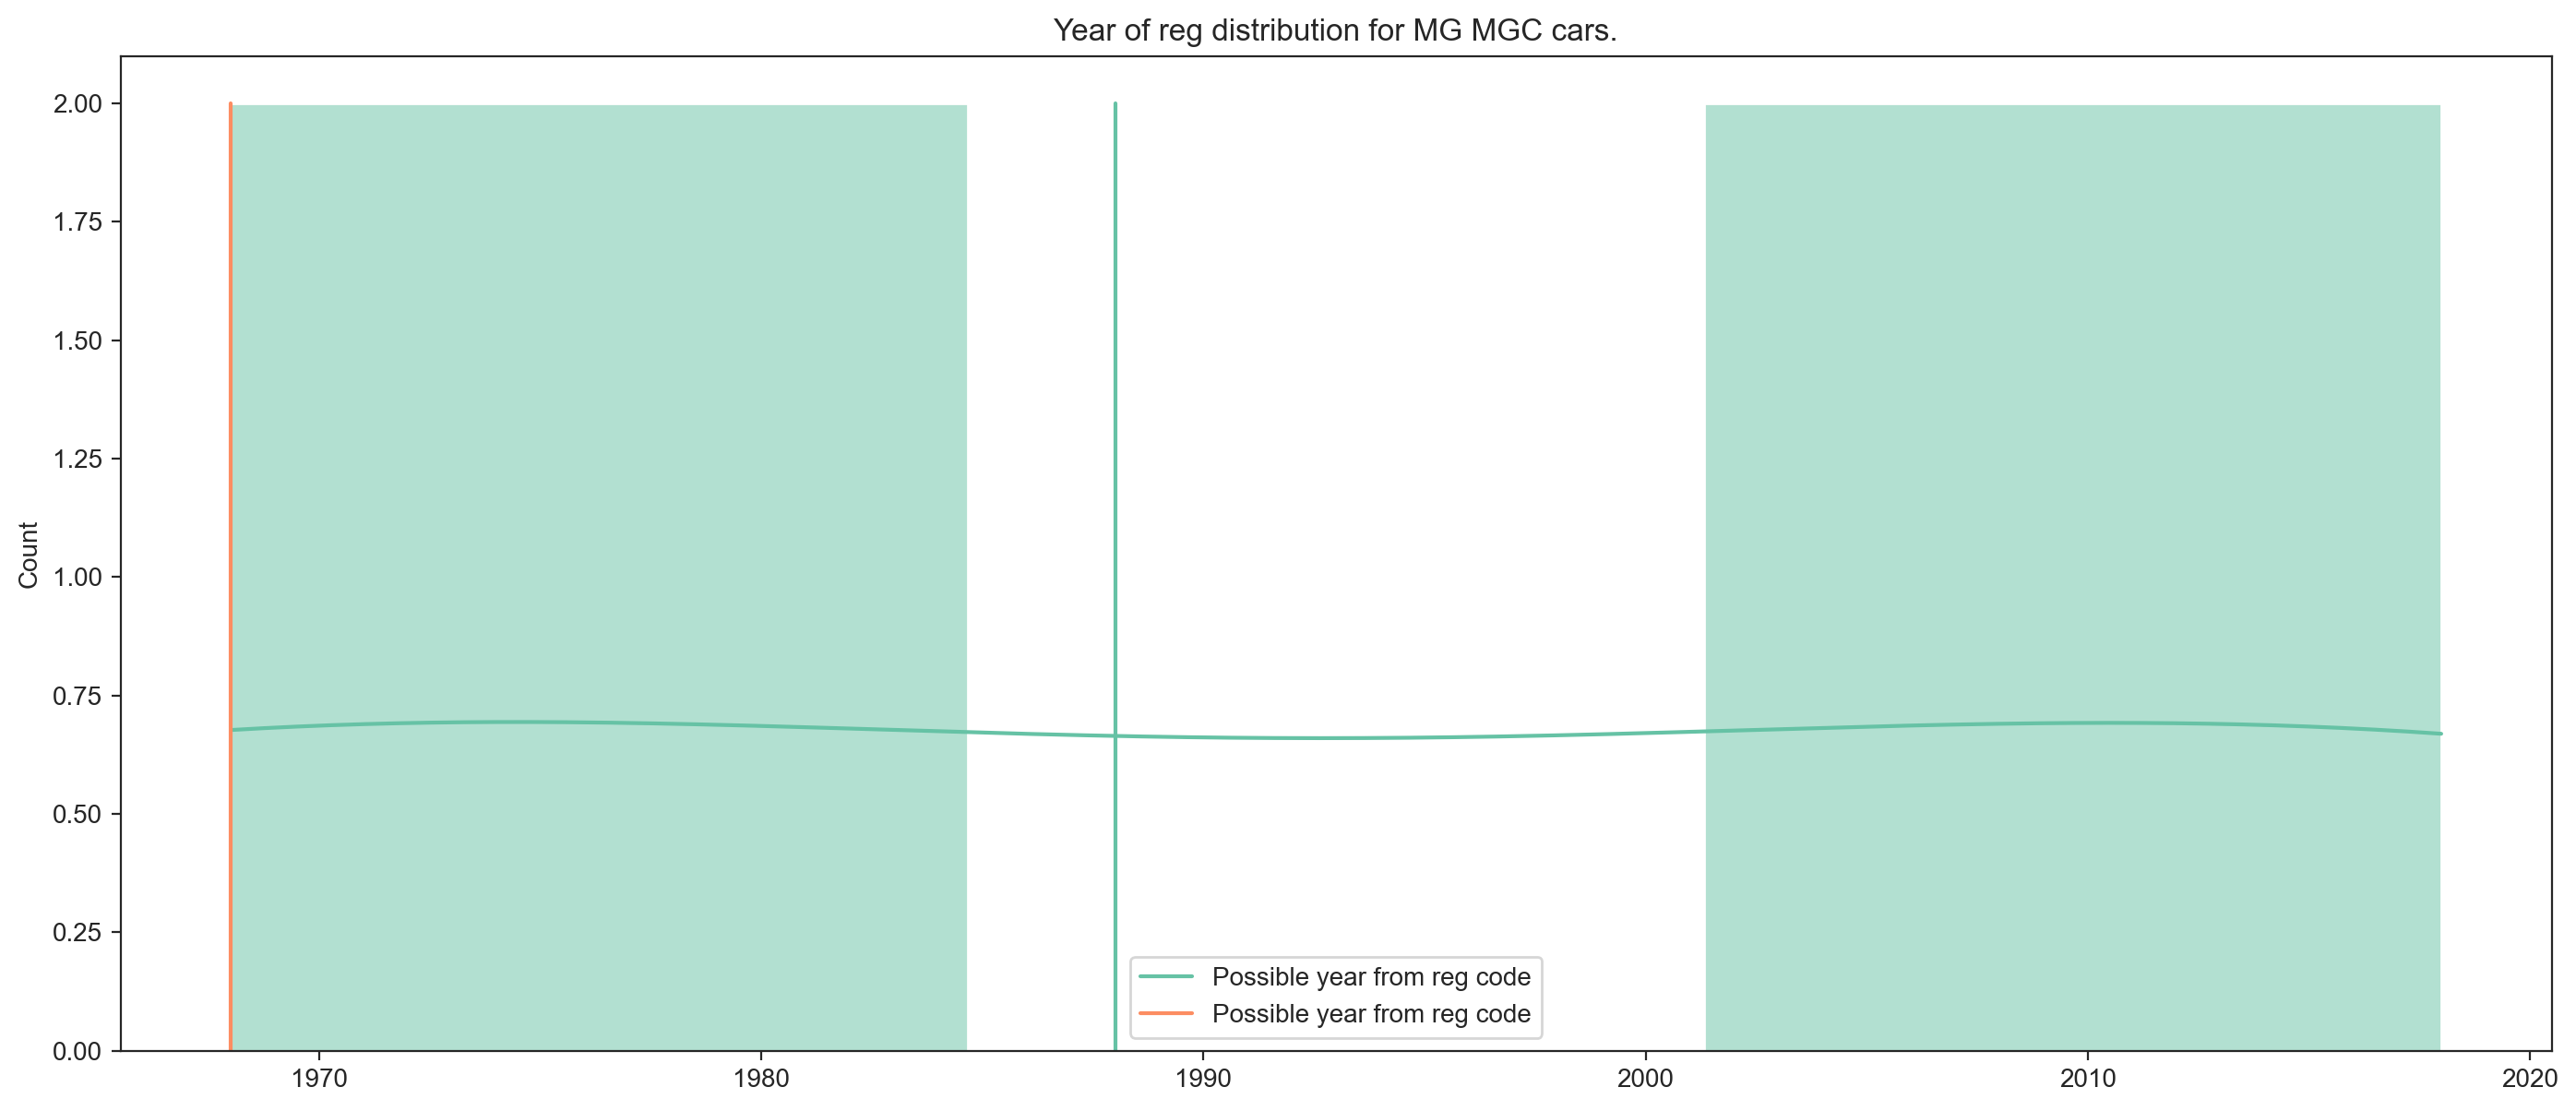

Mean year 2014.7767591107036
Closest year: 1990


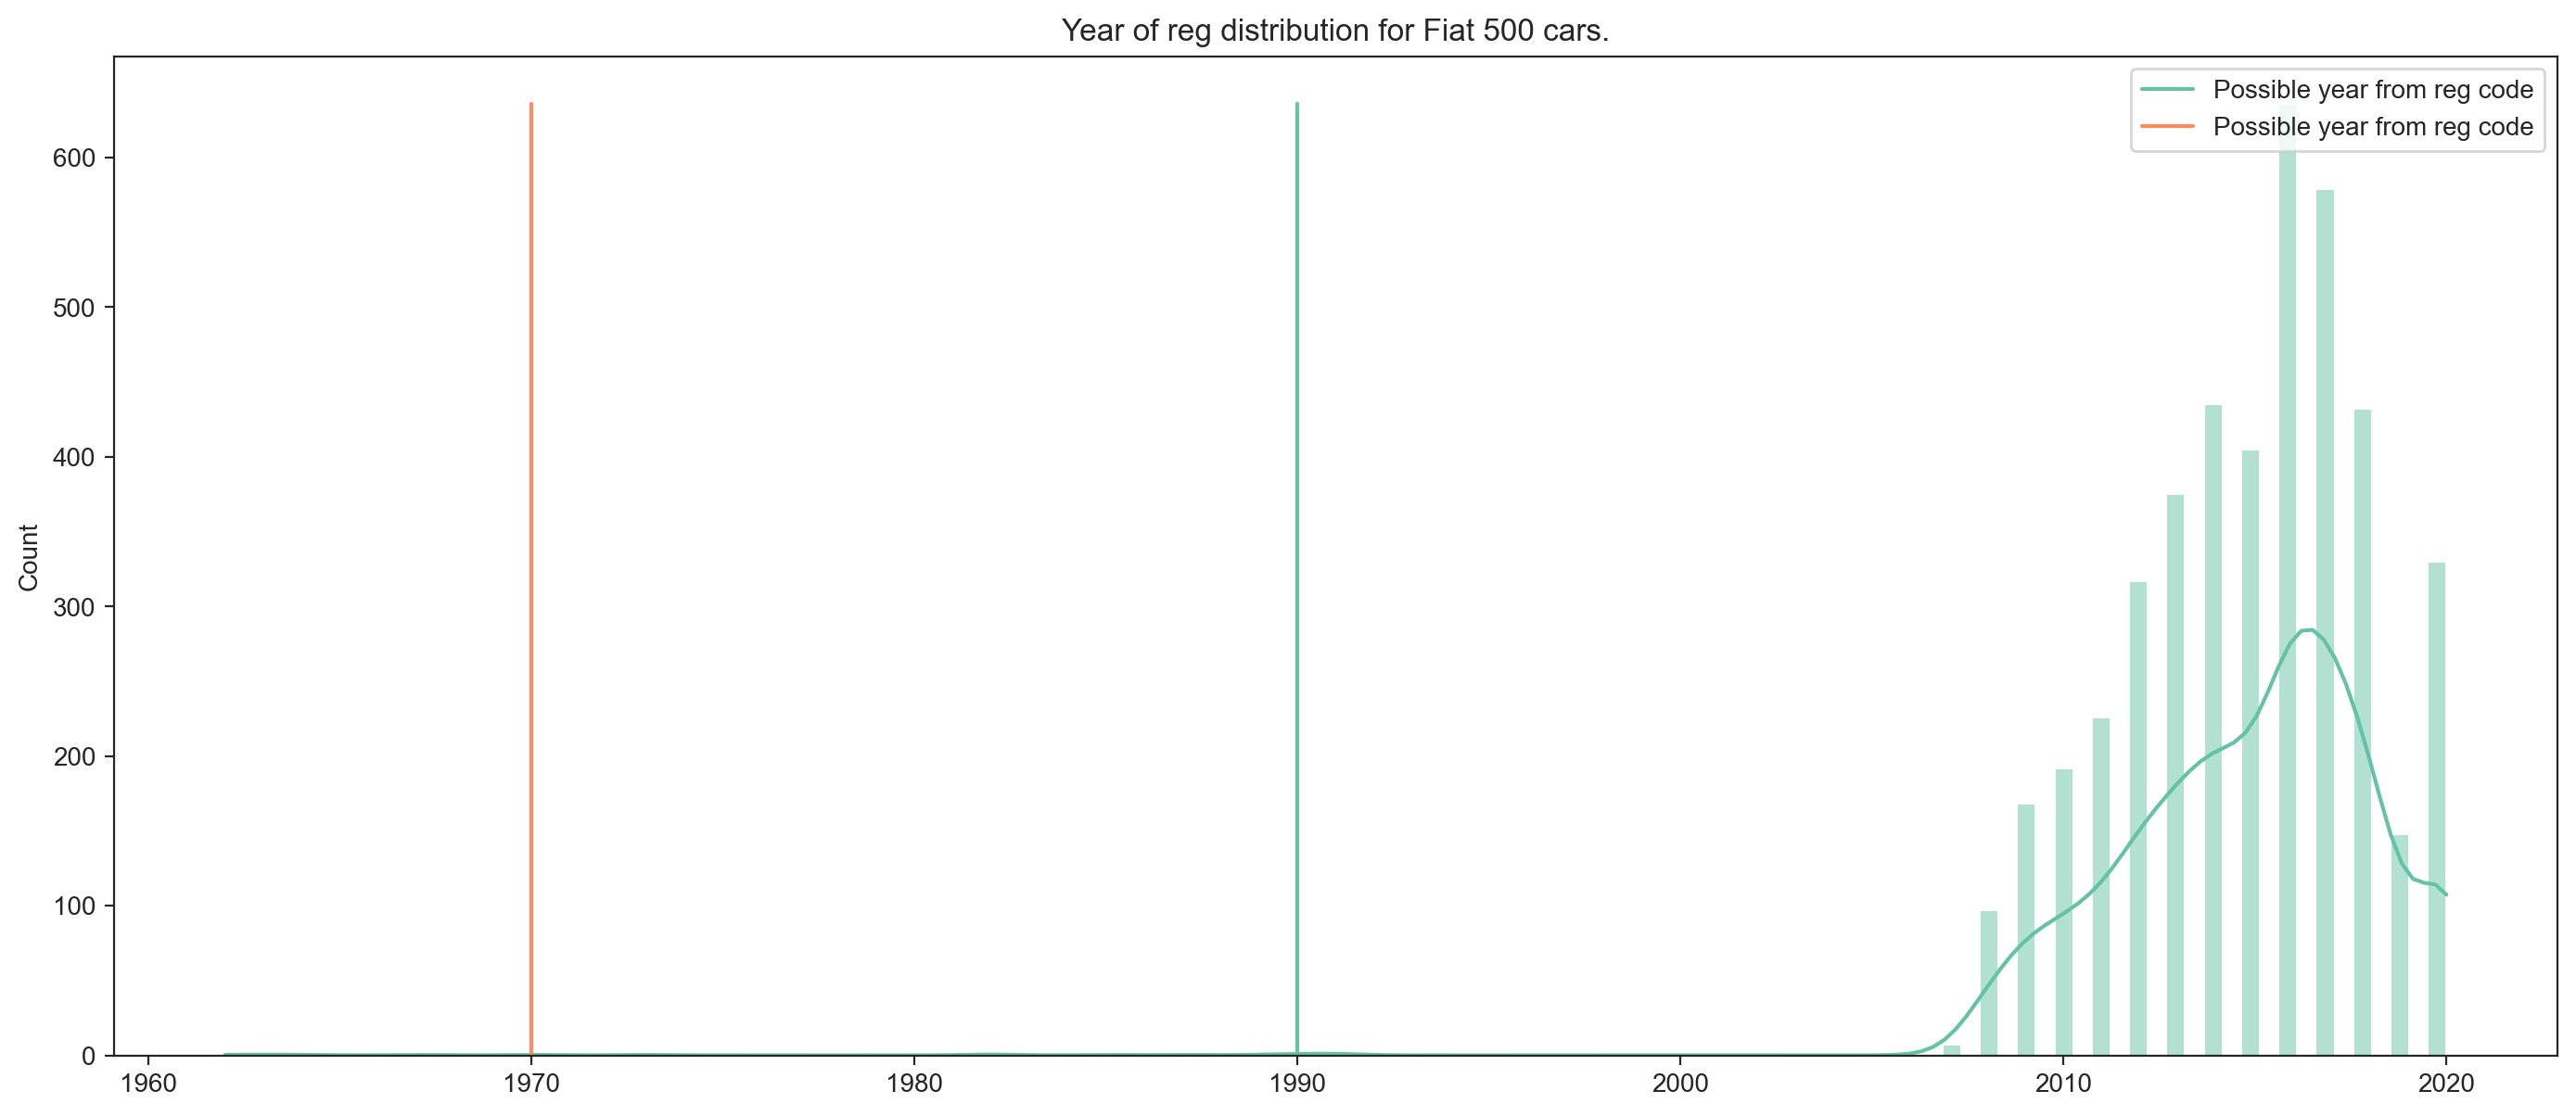

Mean year 1968.875
Closest year: 1966


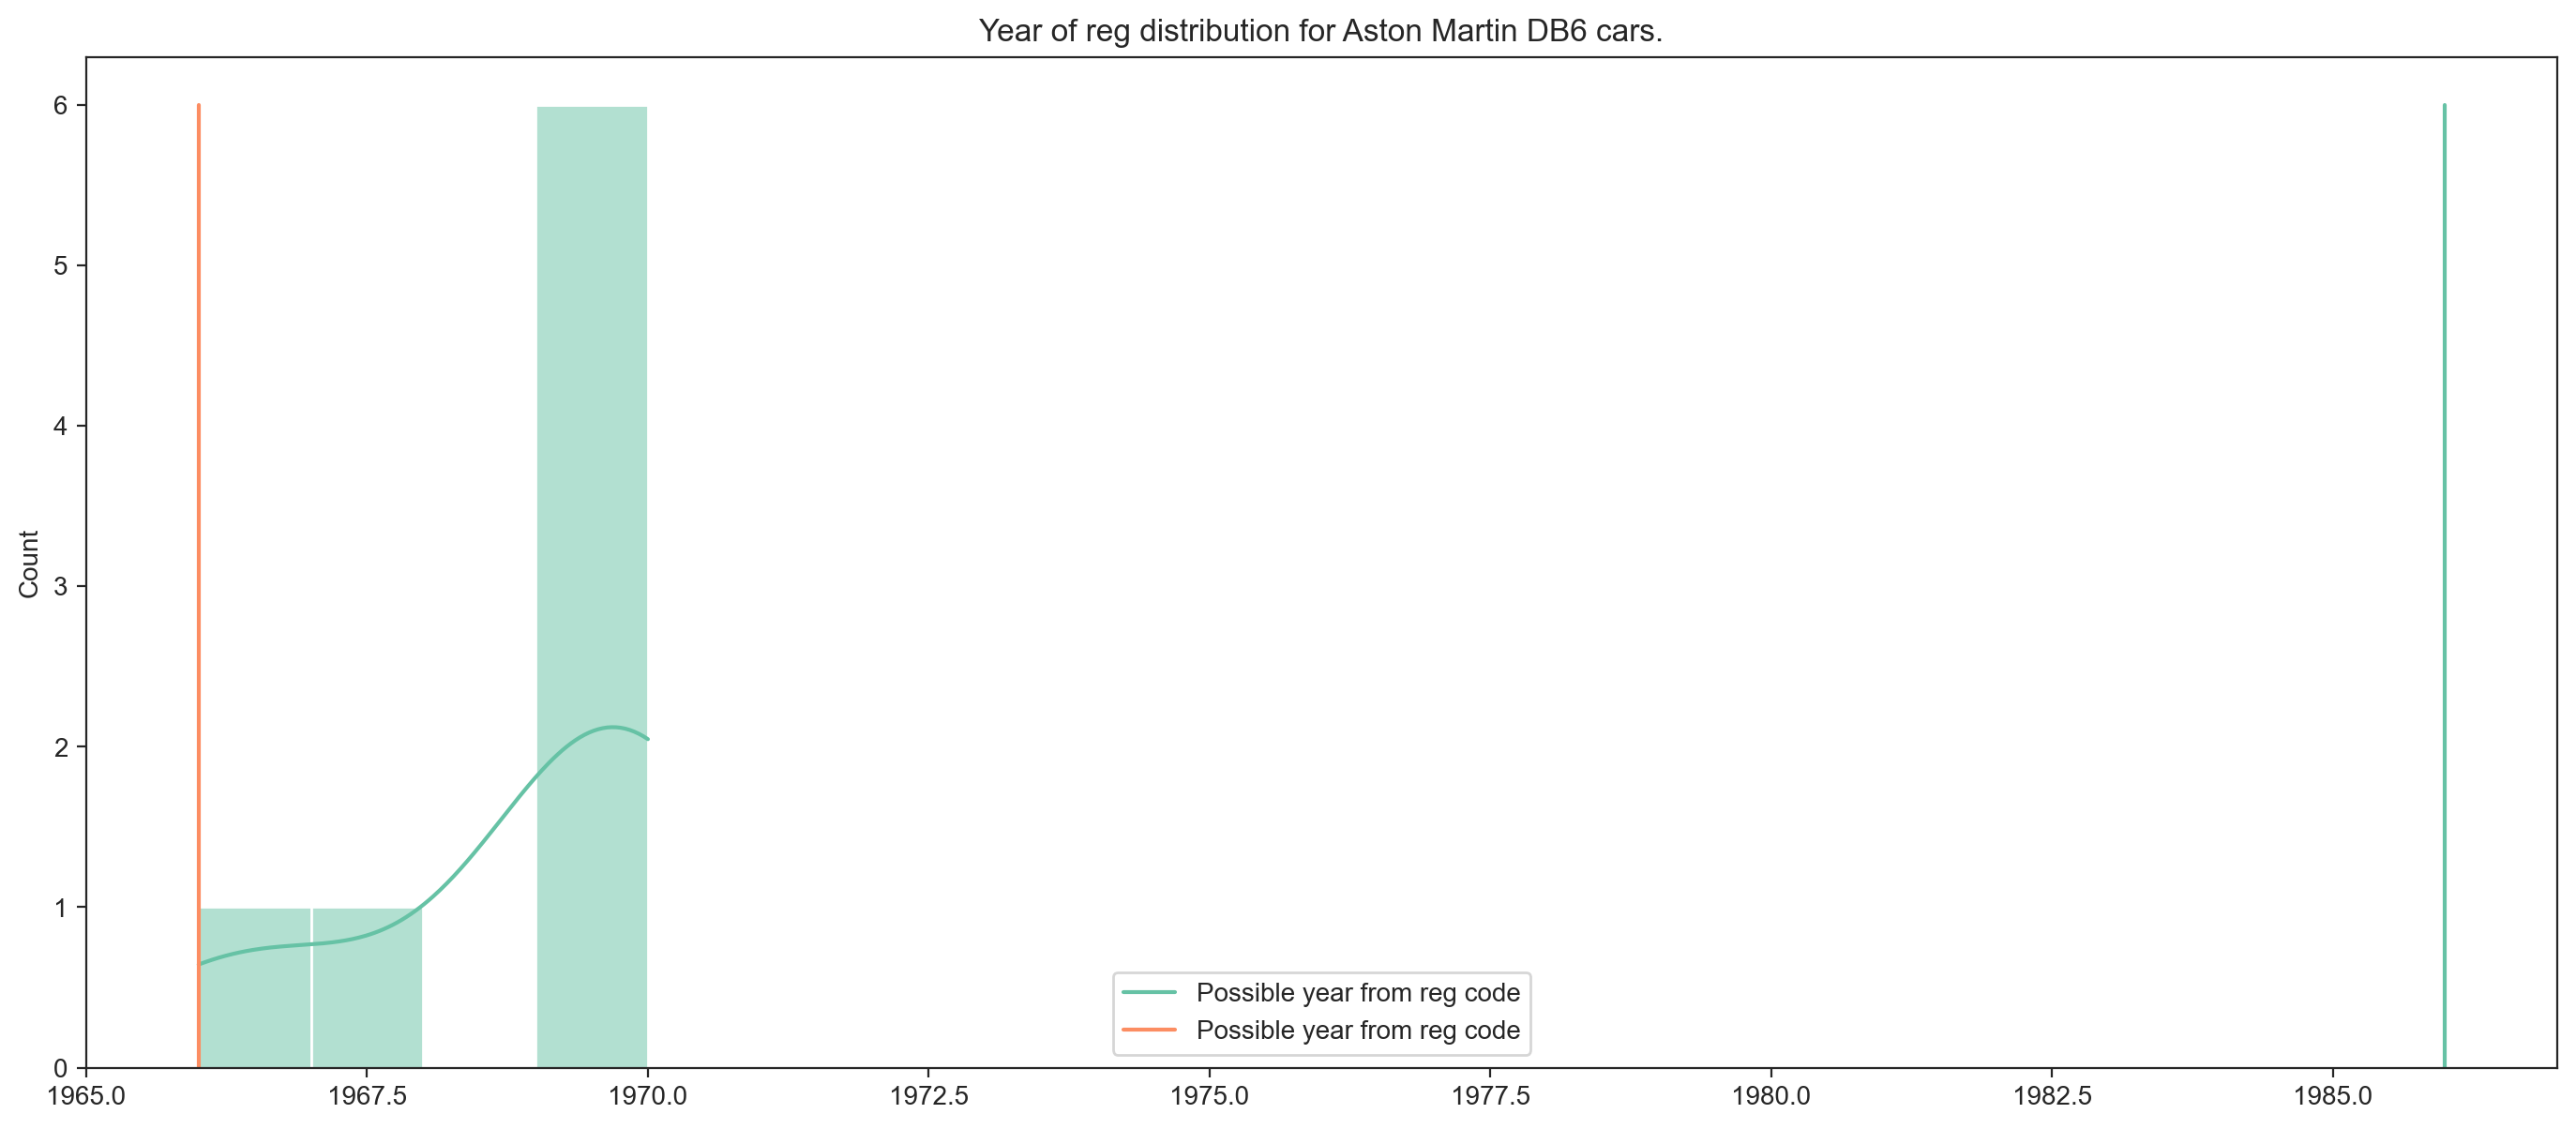

Mean year 1984.8333333333333
Closest year: 1979


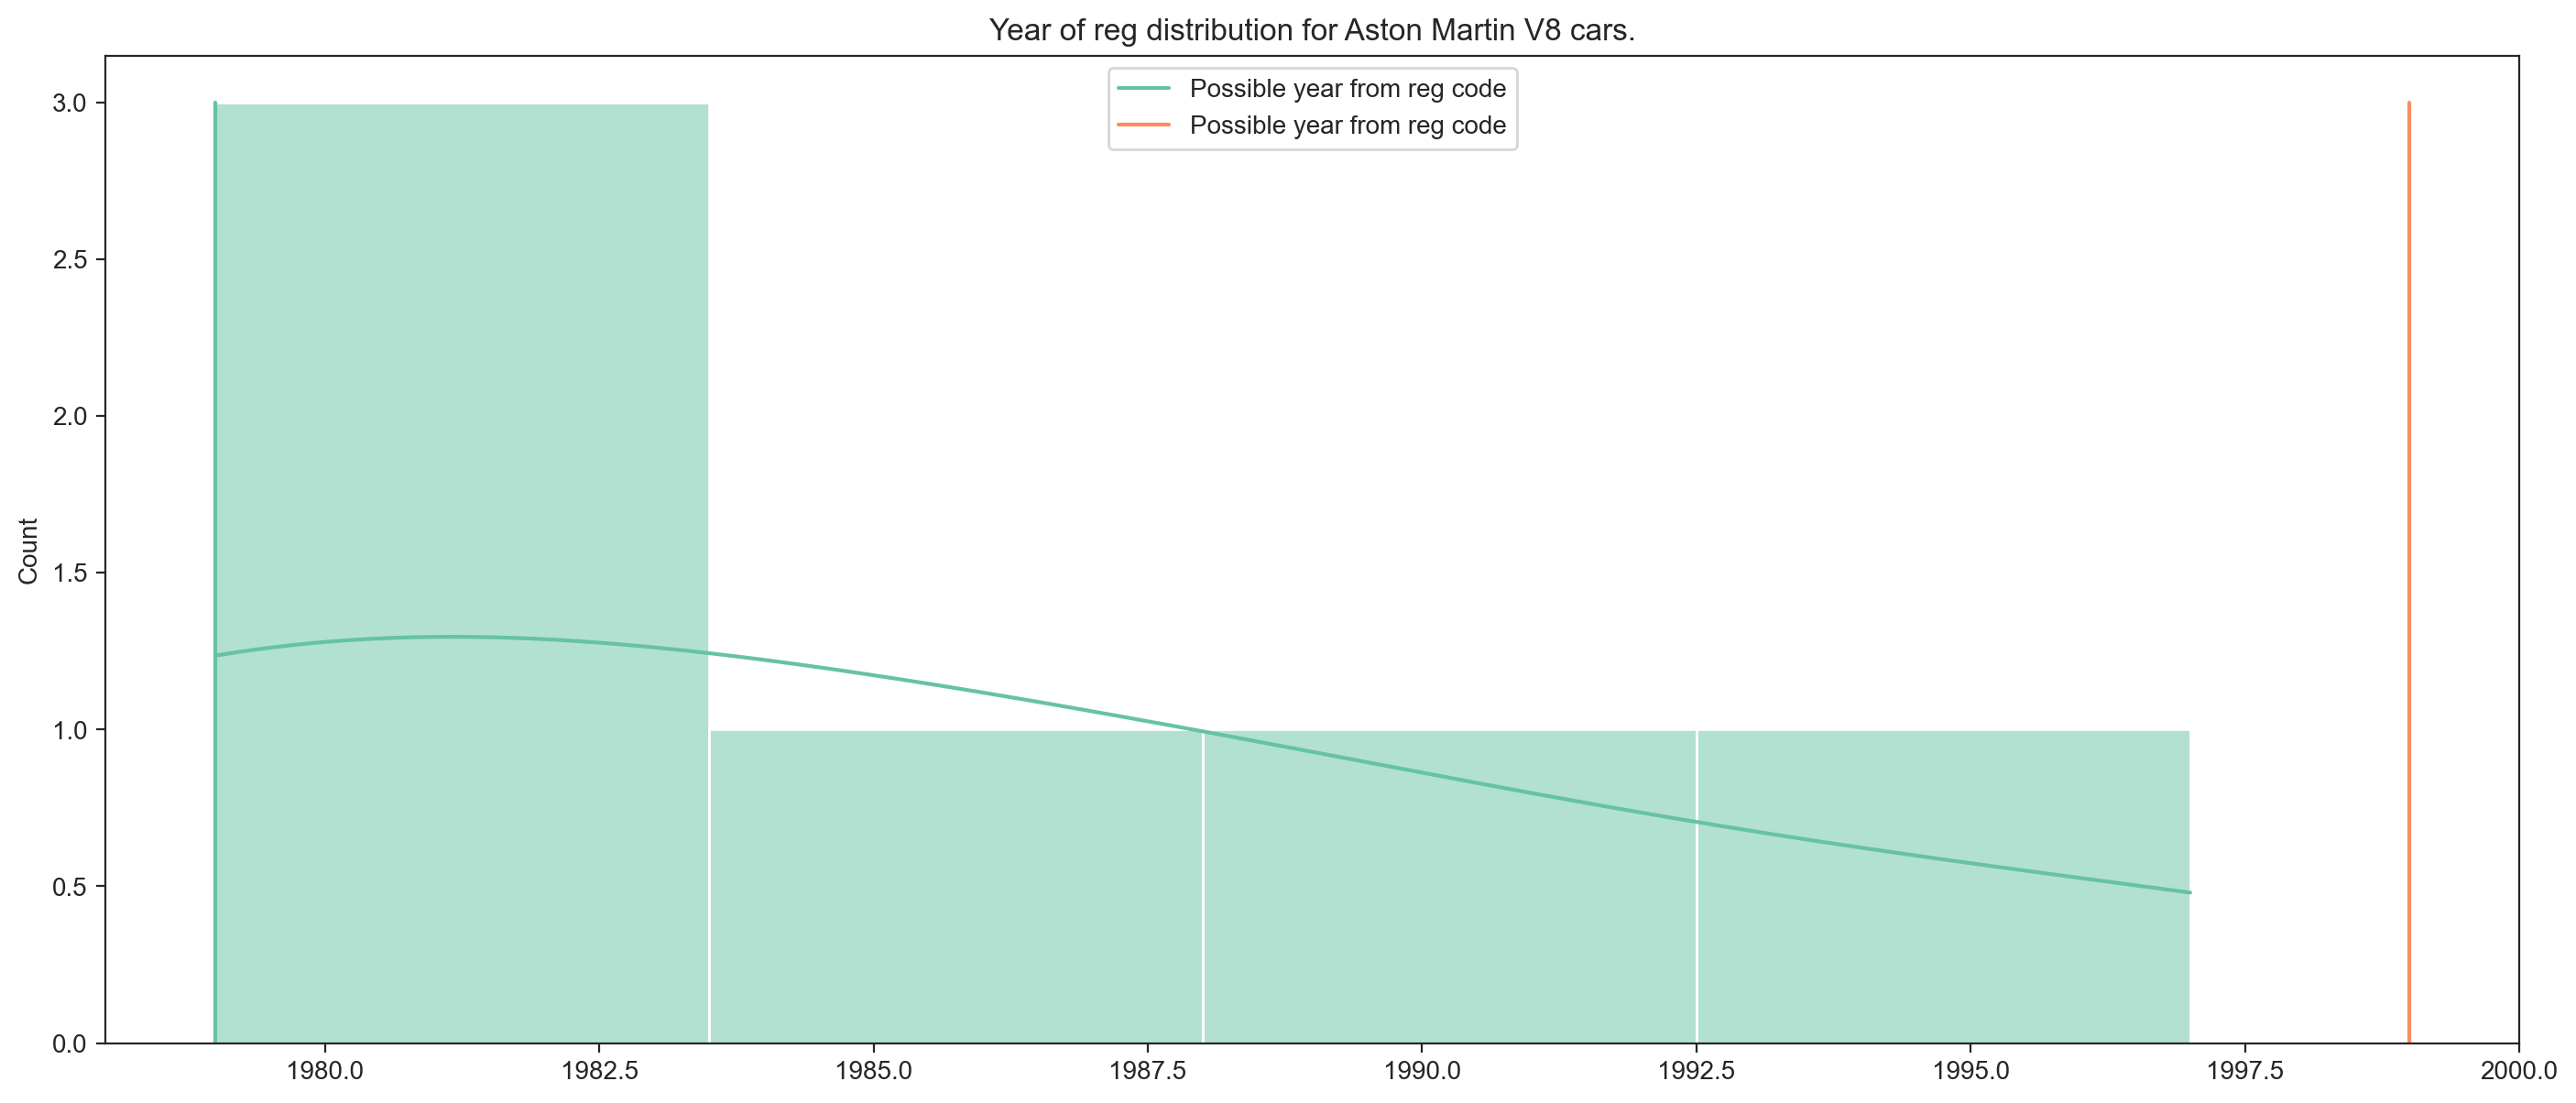

Mean year 2014.5878246299917
Closest year: 1989


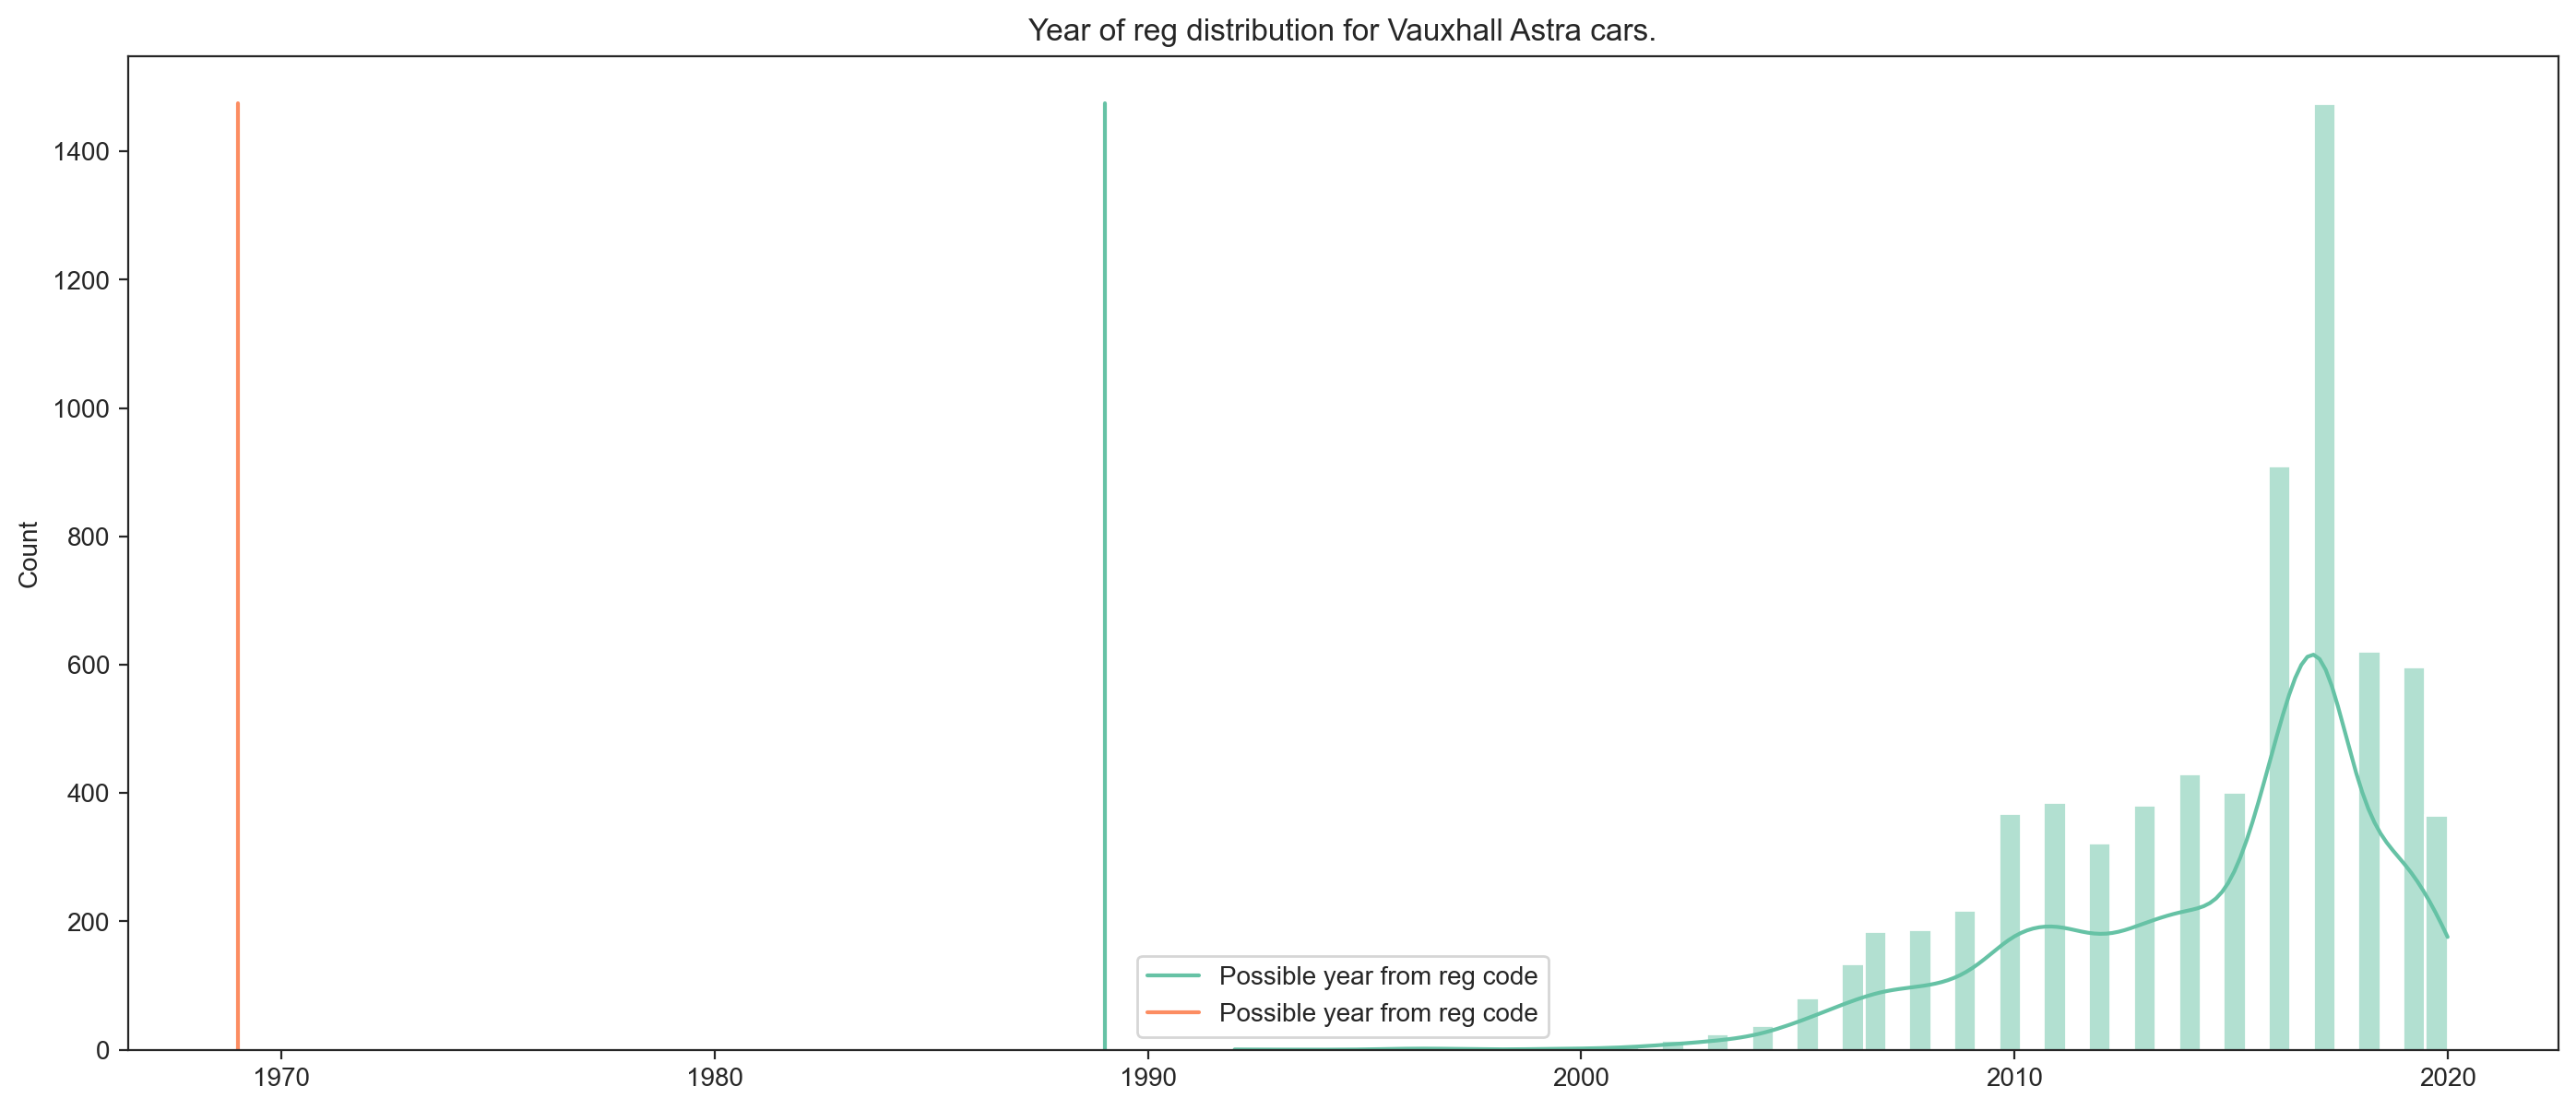

Mean year 1992.5
Closest year: 1994


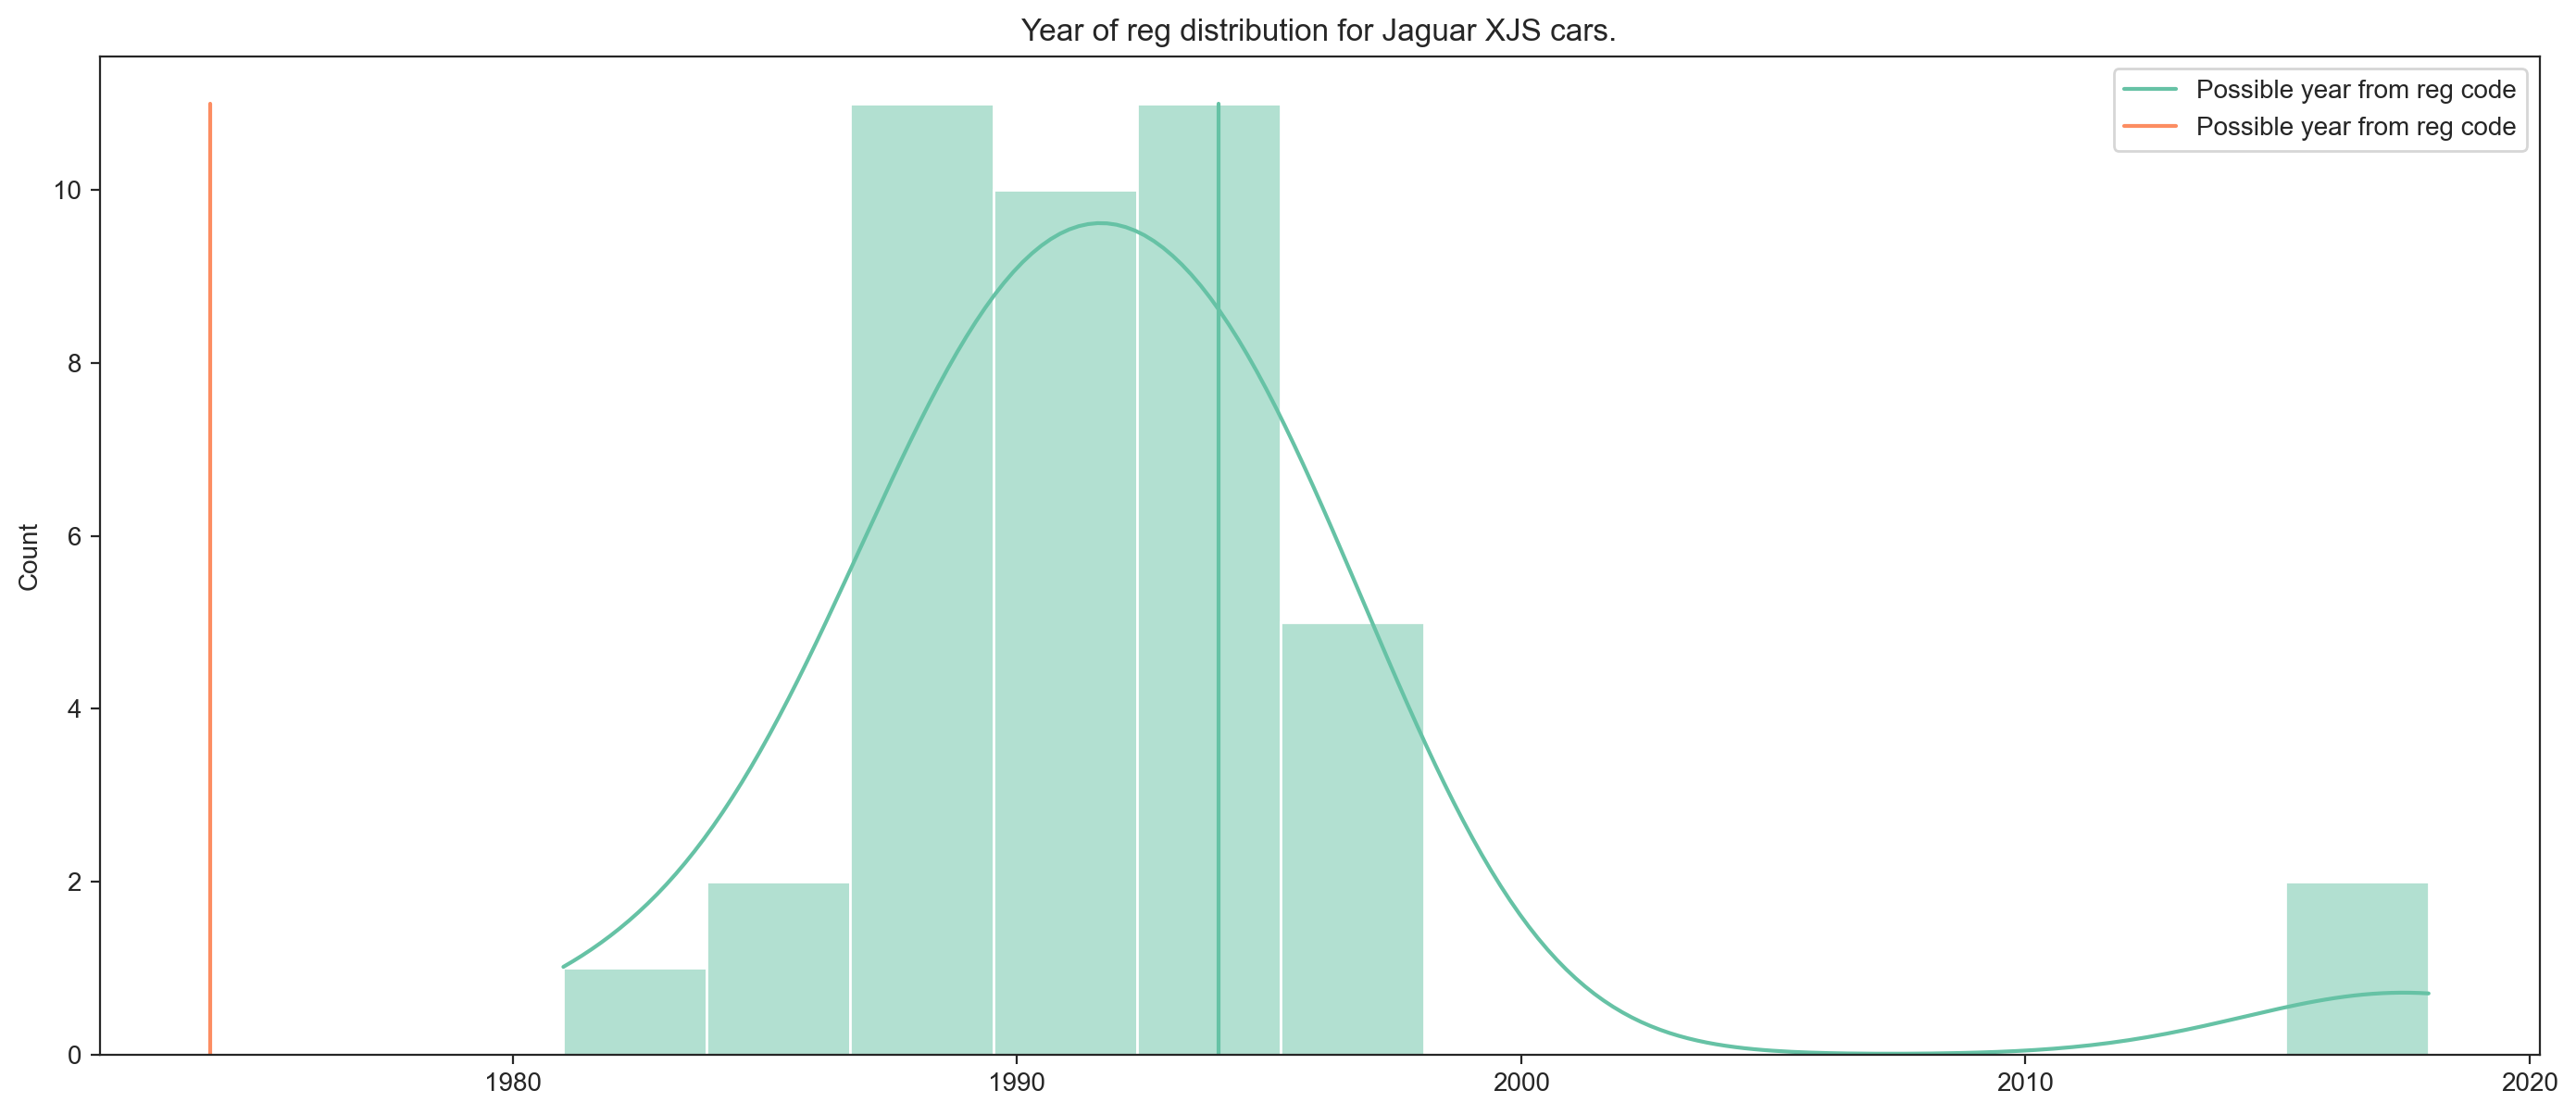

Mean year 2016.9329685362518
Closest year: 1999


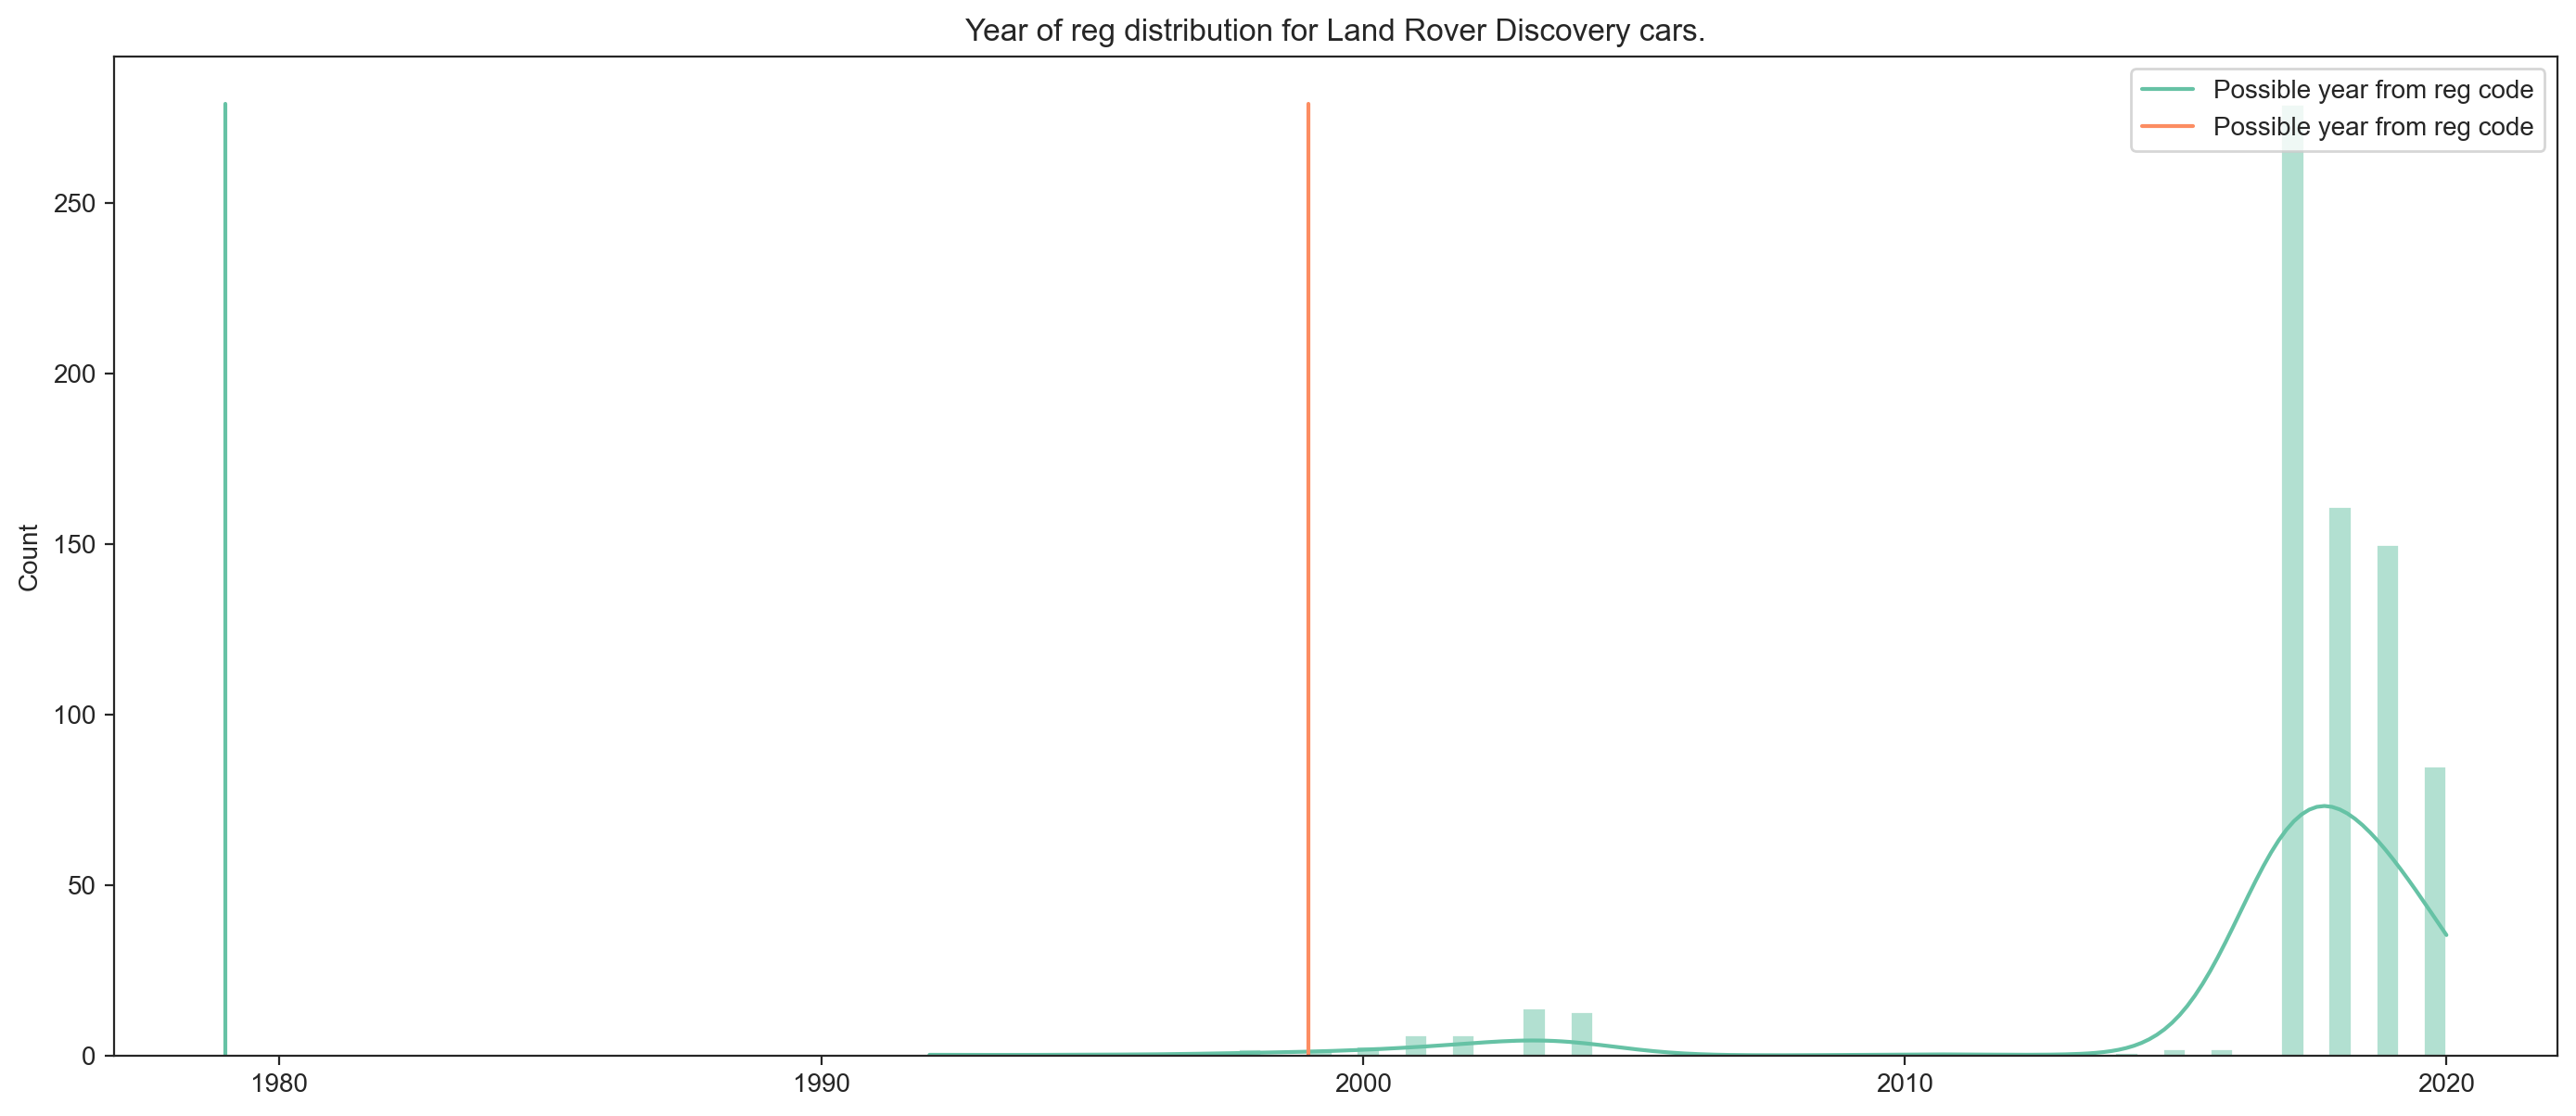

Mean year 1982.3333333333333
Closest year: 1983


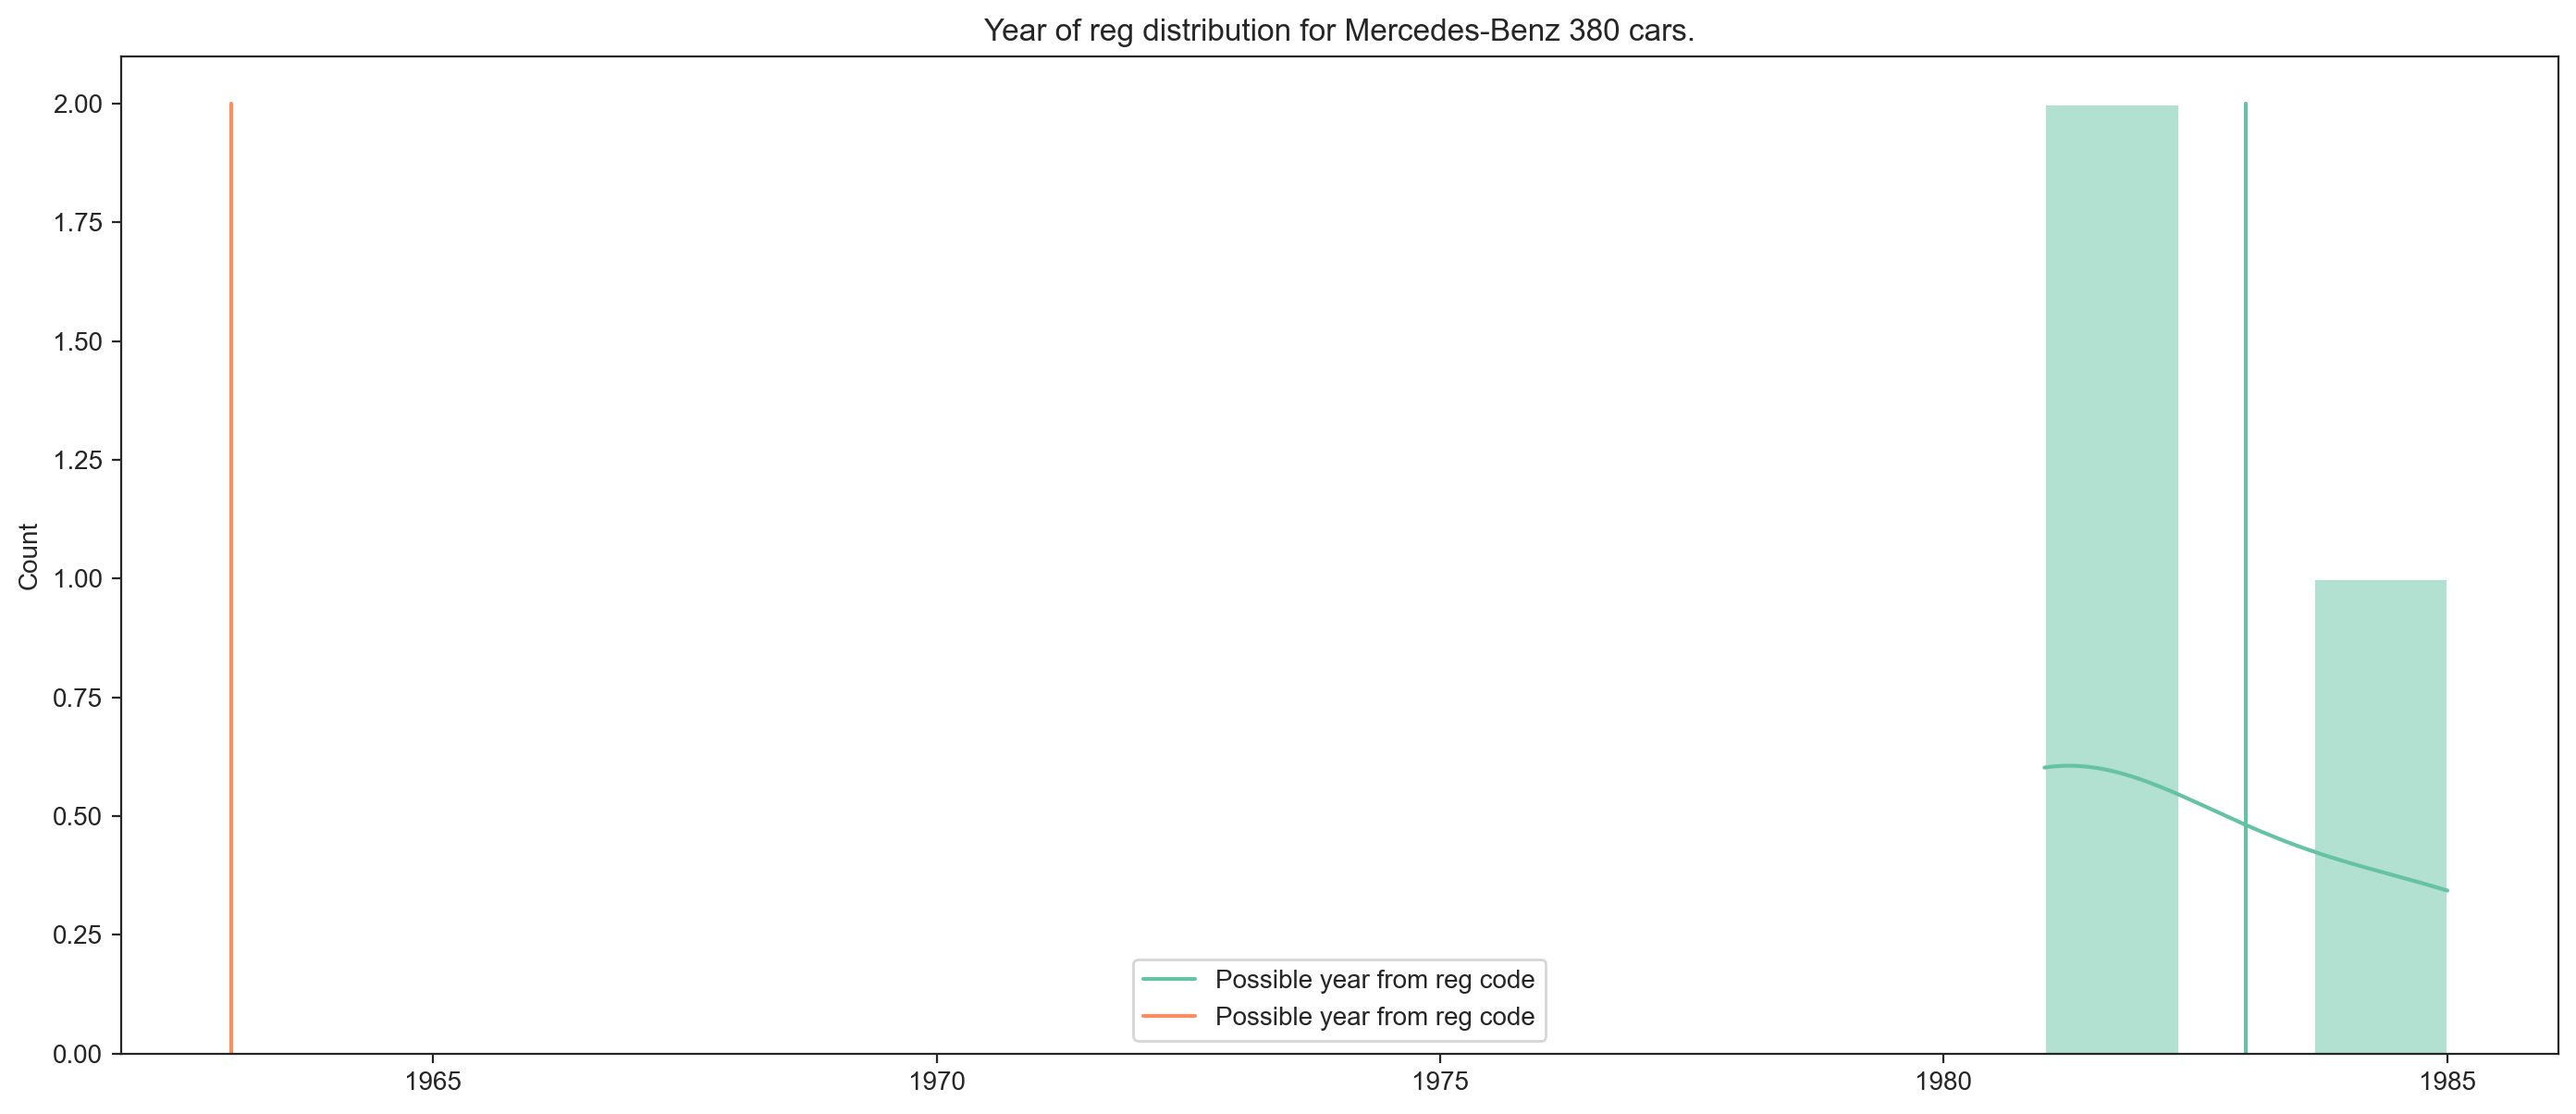

Mean year 2011.6500777604977
Closest year: 1999


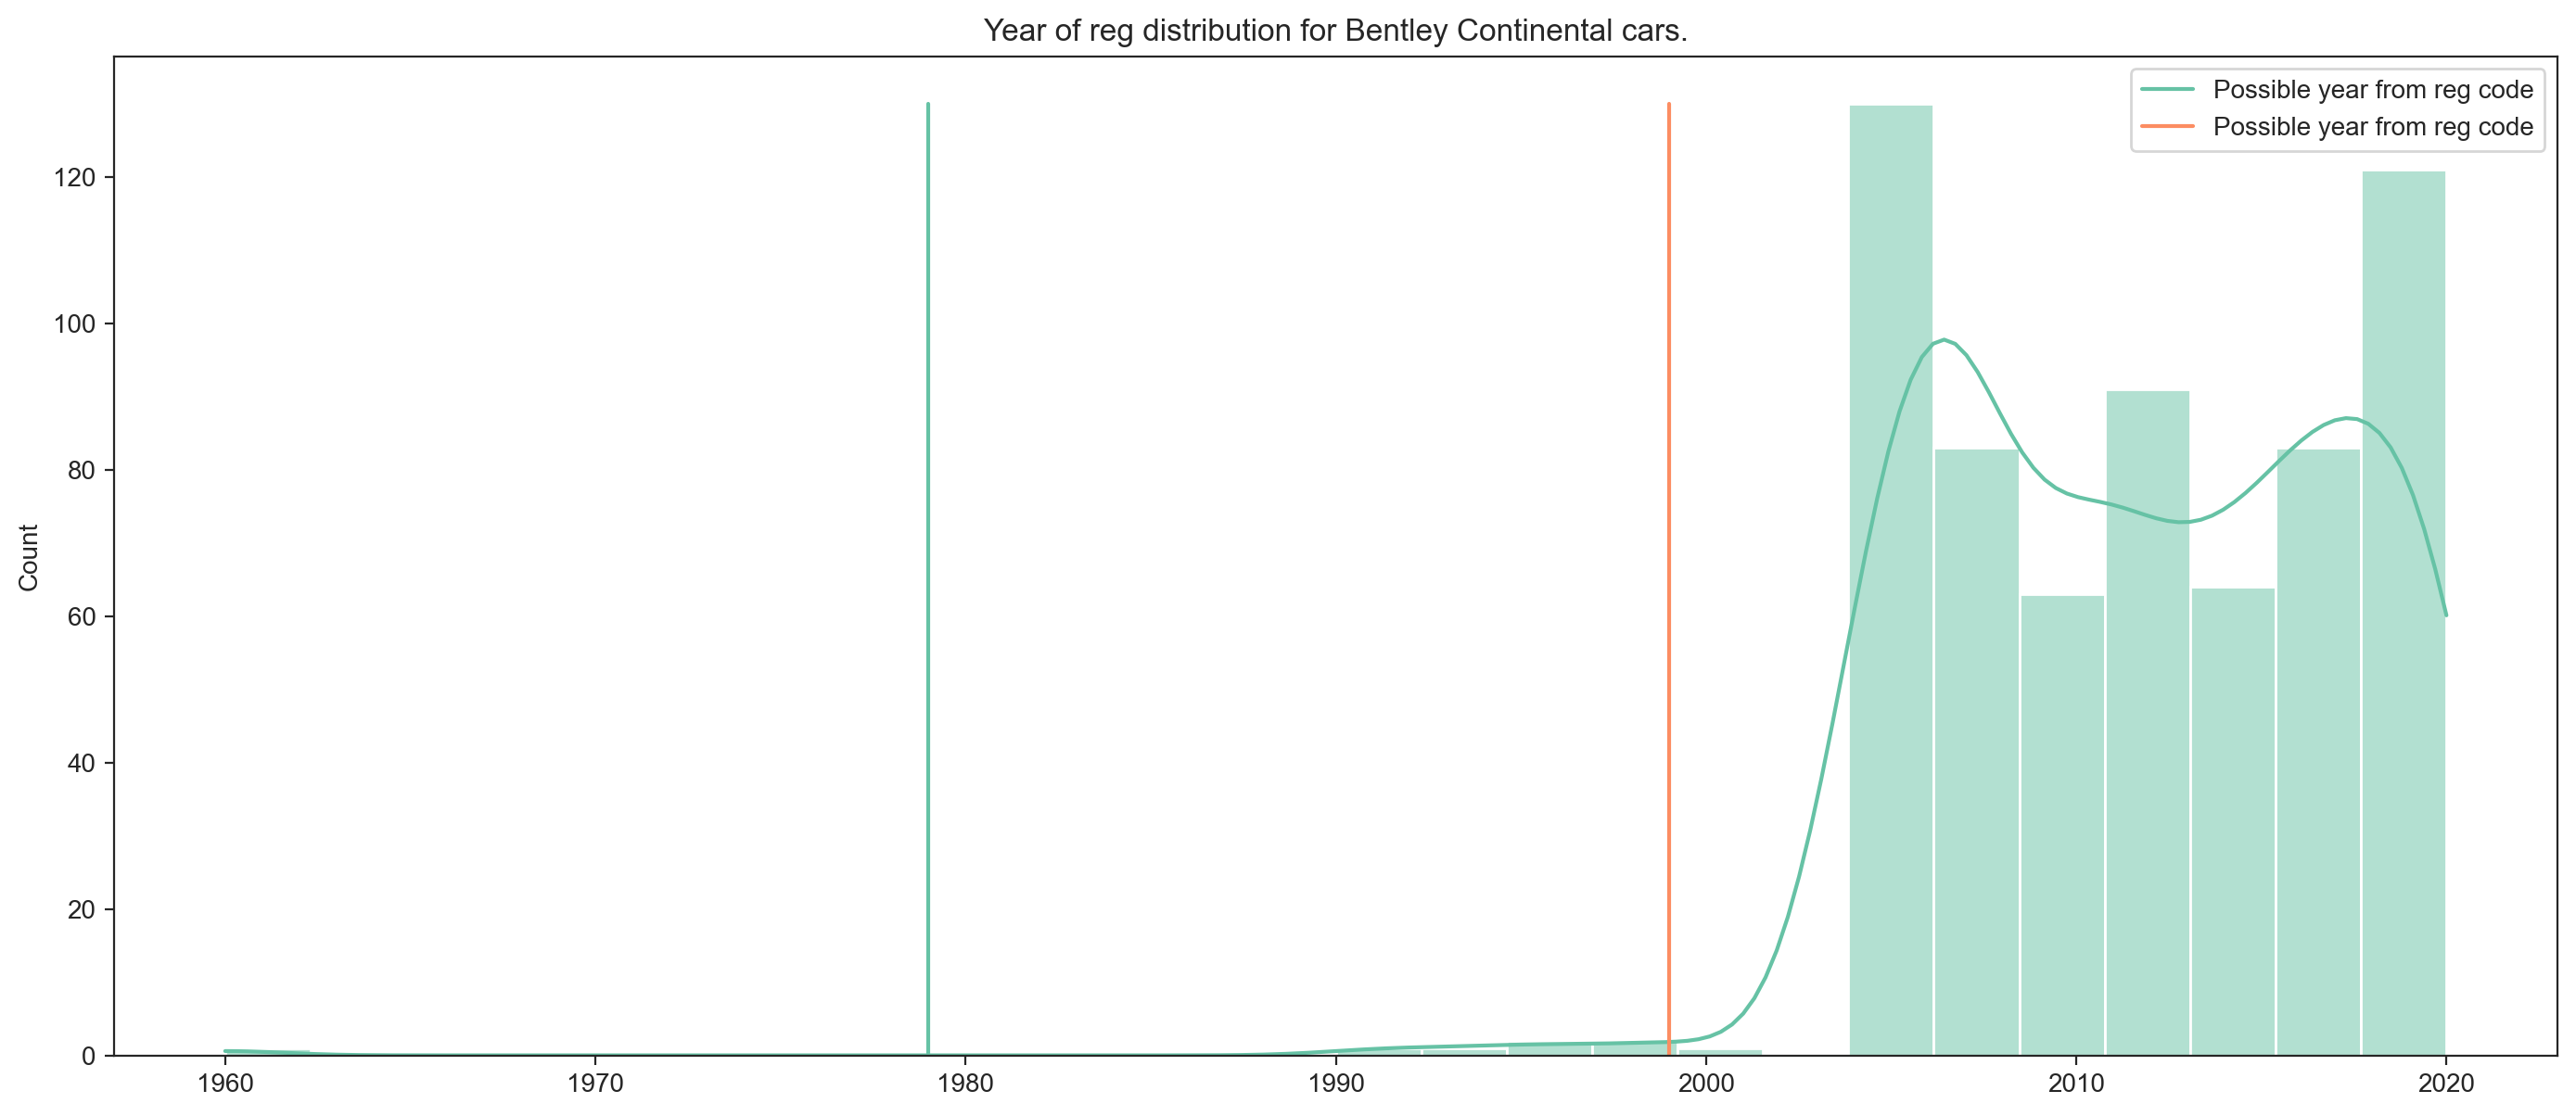

Mean year 2001.8333333333333
Closest year: 1994


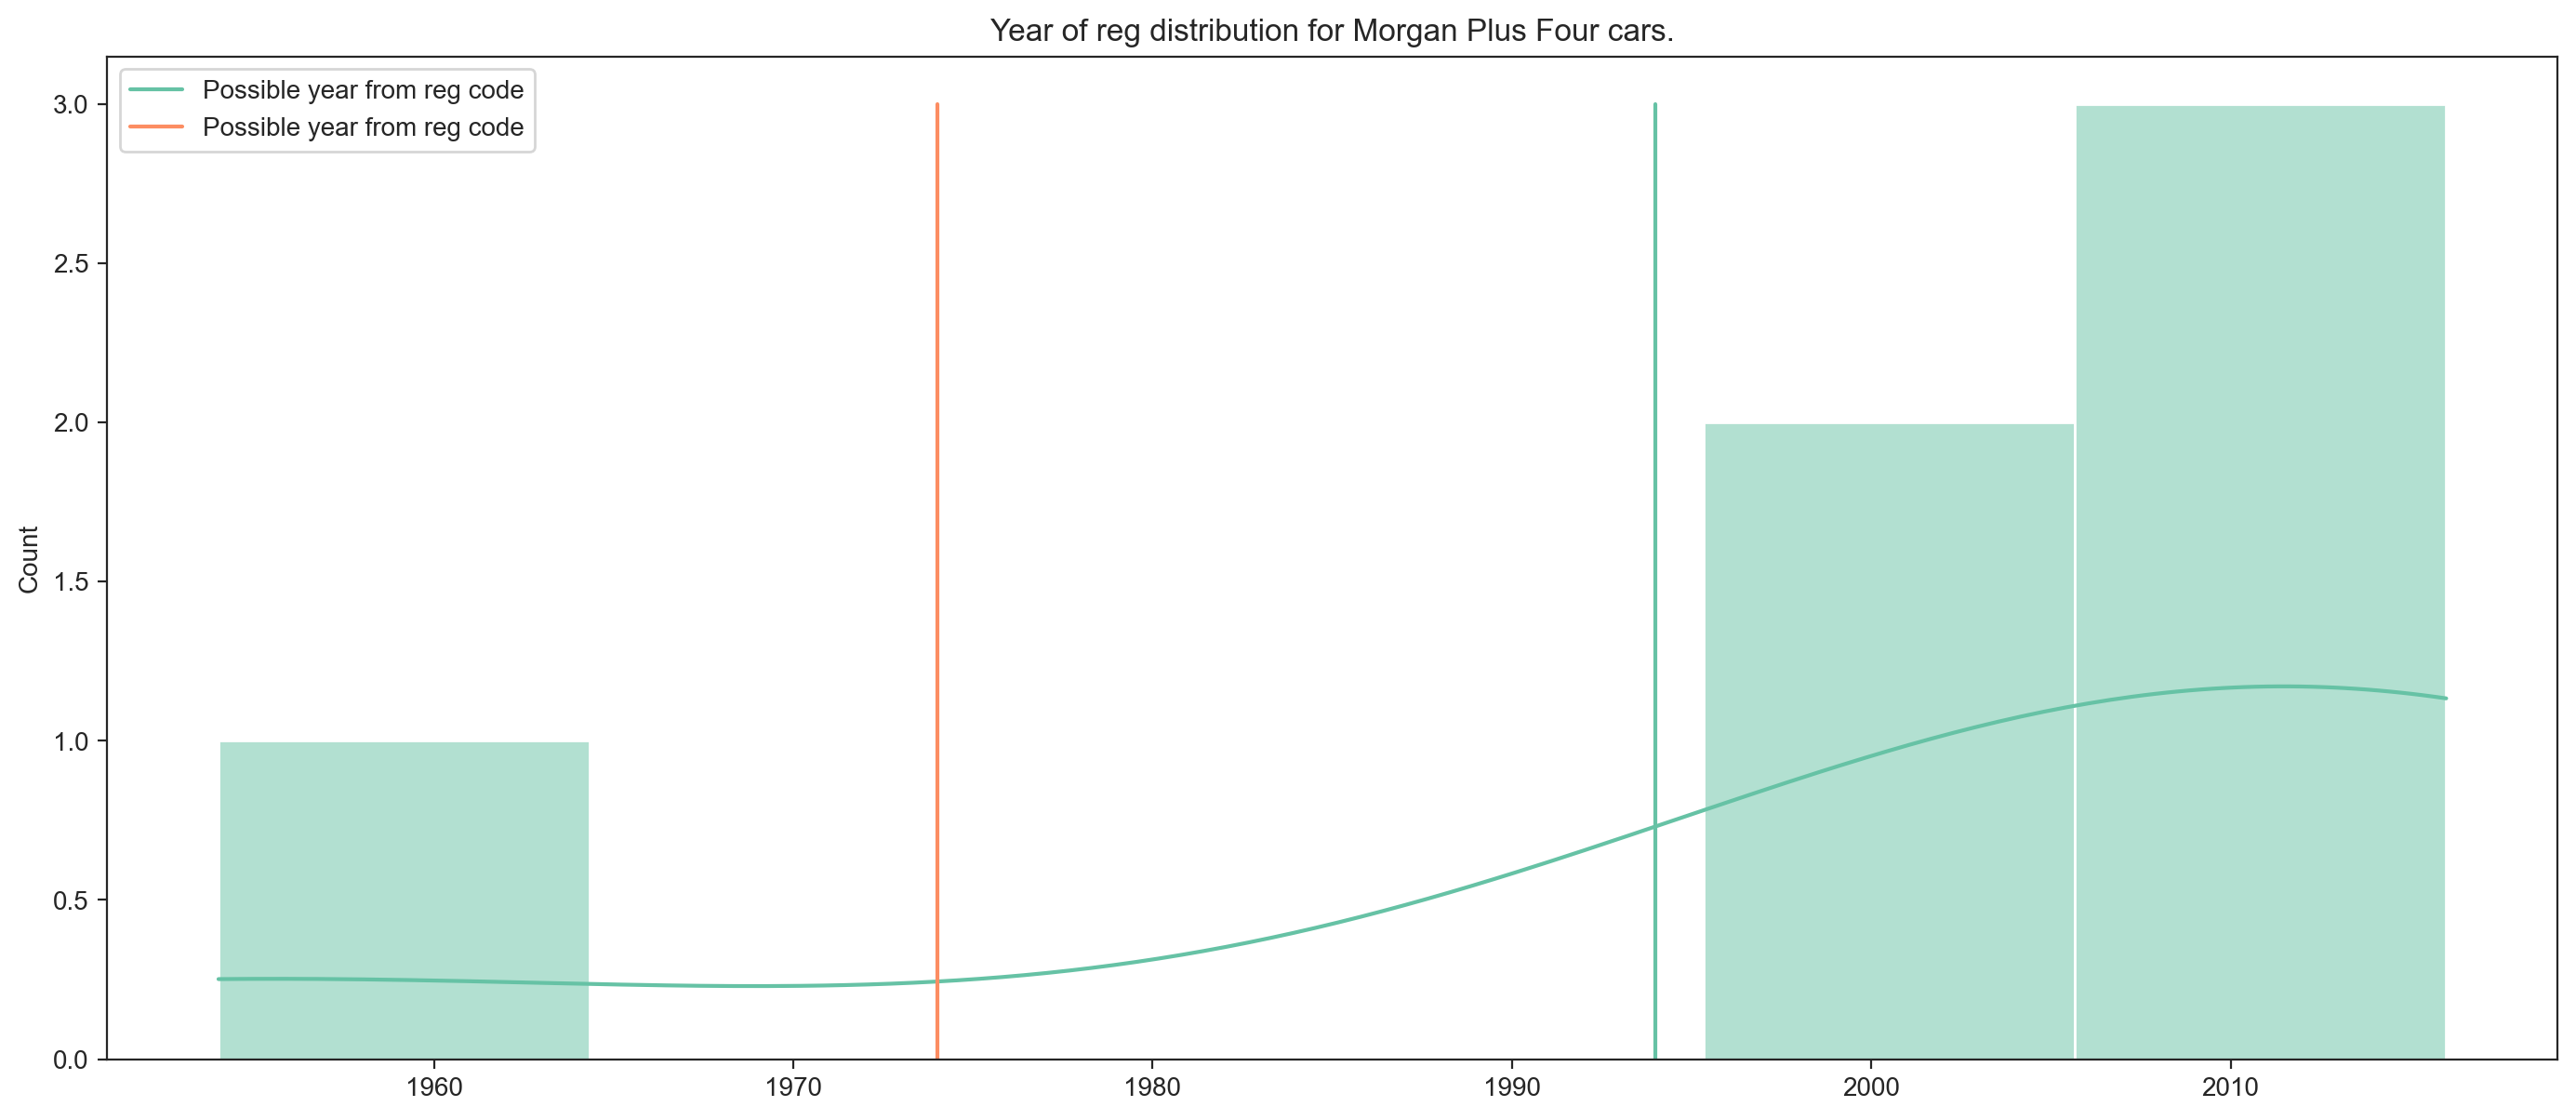

Mean year 1971.5
Closest year: 1966


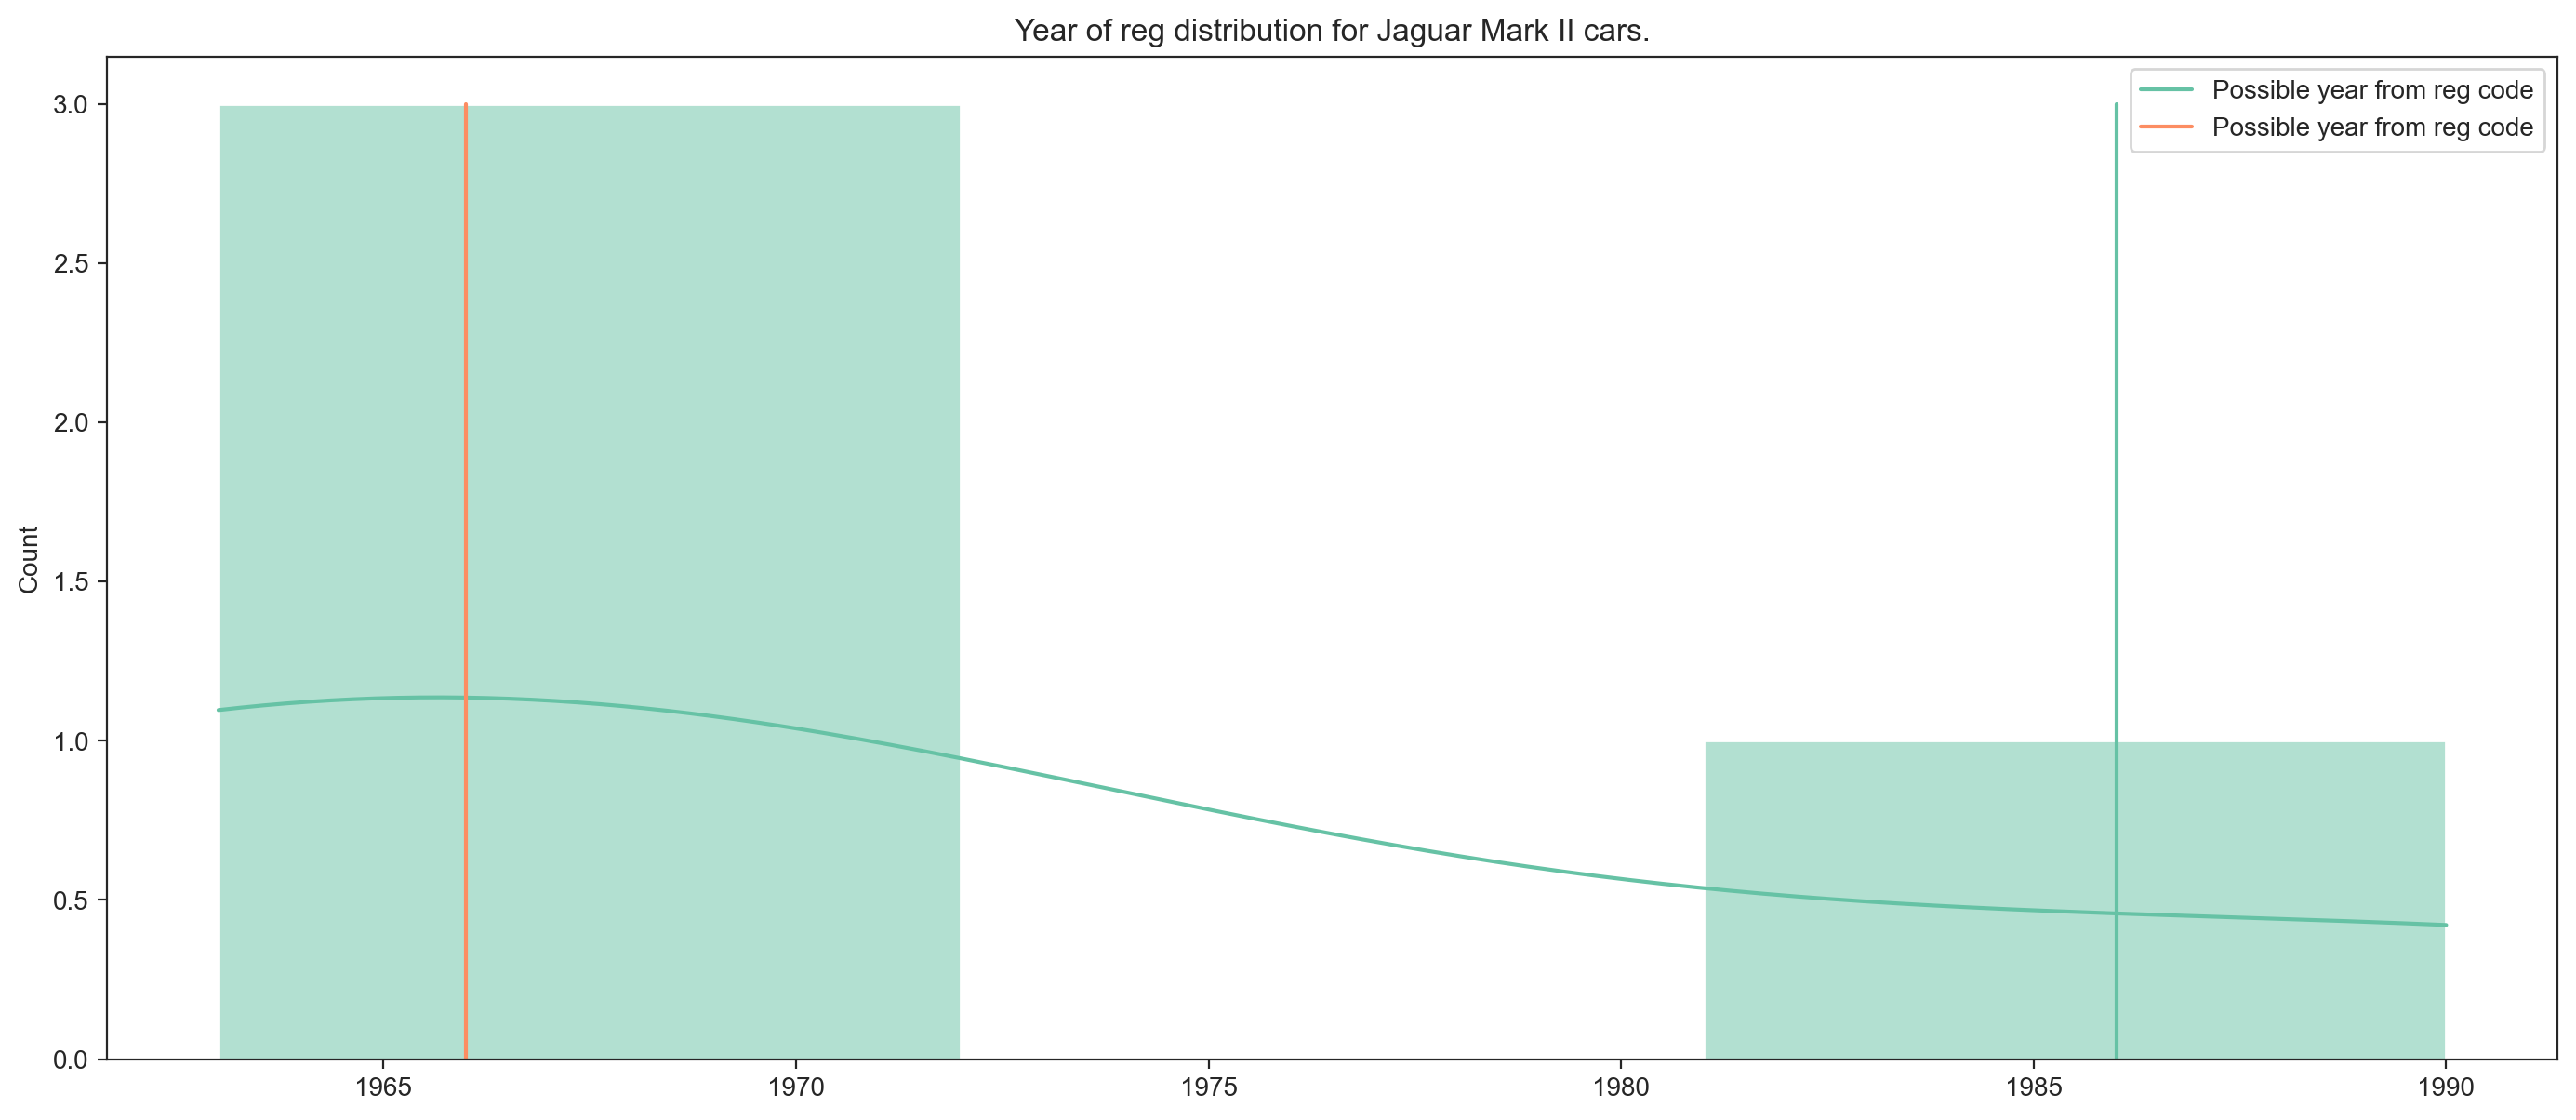

Mean year nan
Closest year: 1970


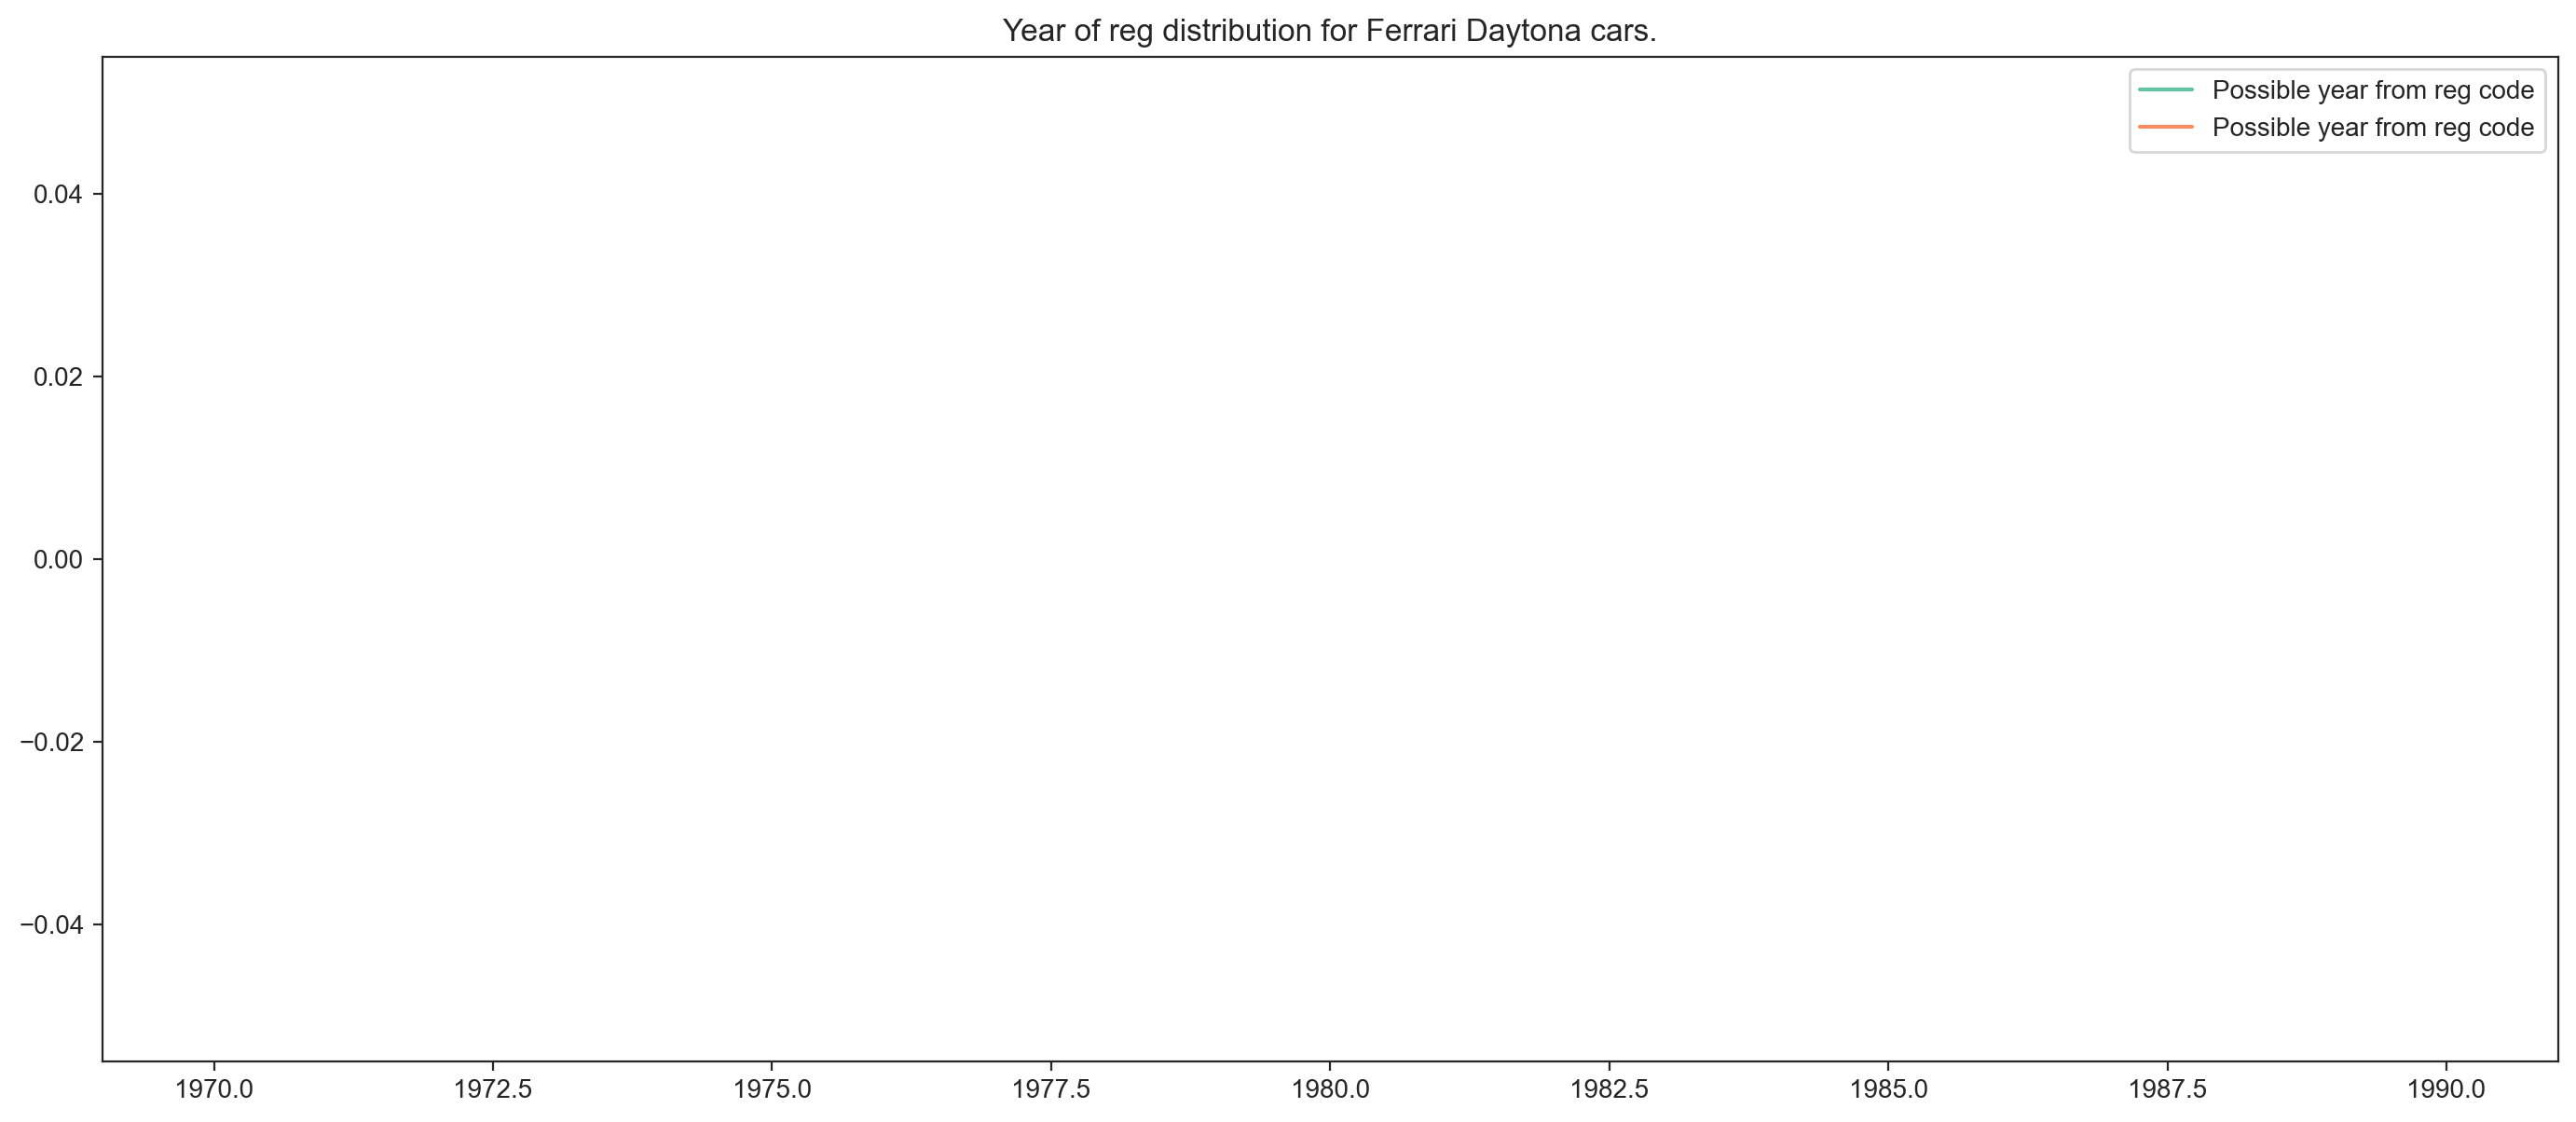

Mean year 2014.2816091954023
Closest year: 2001


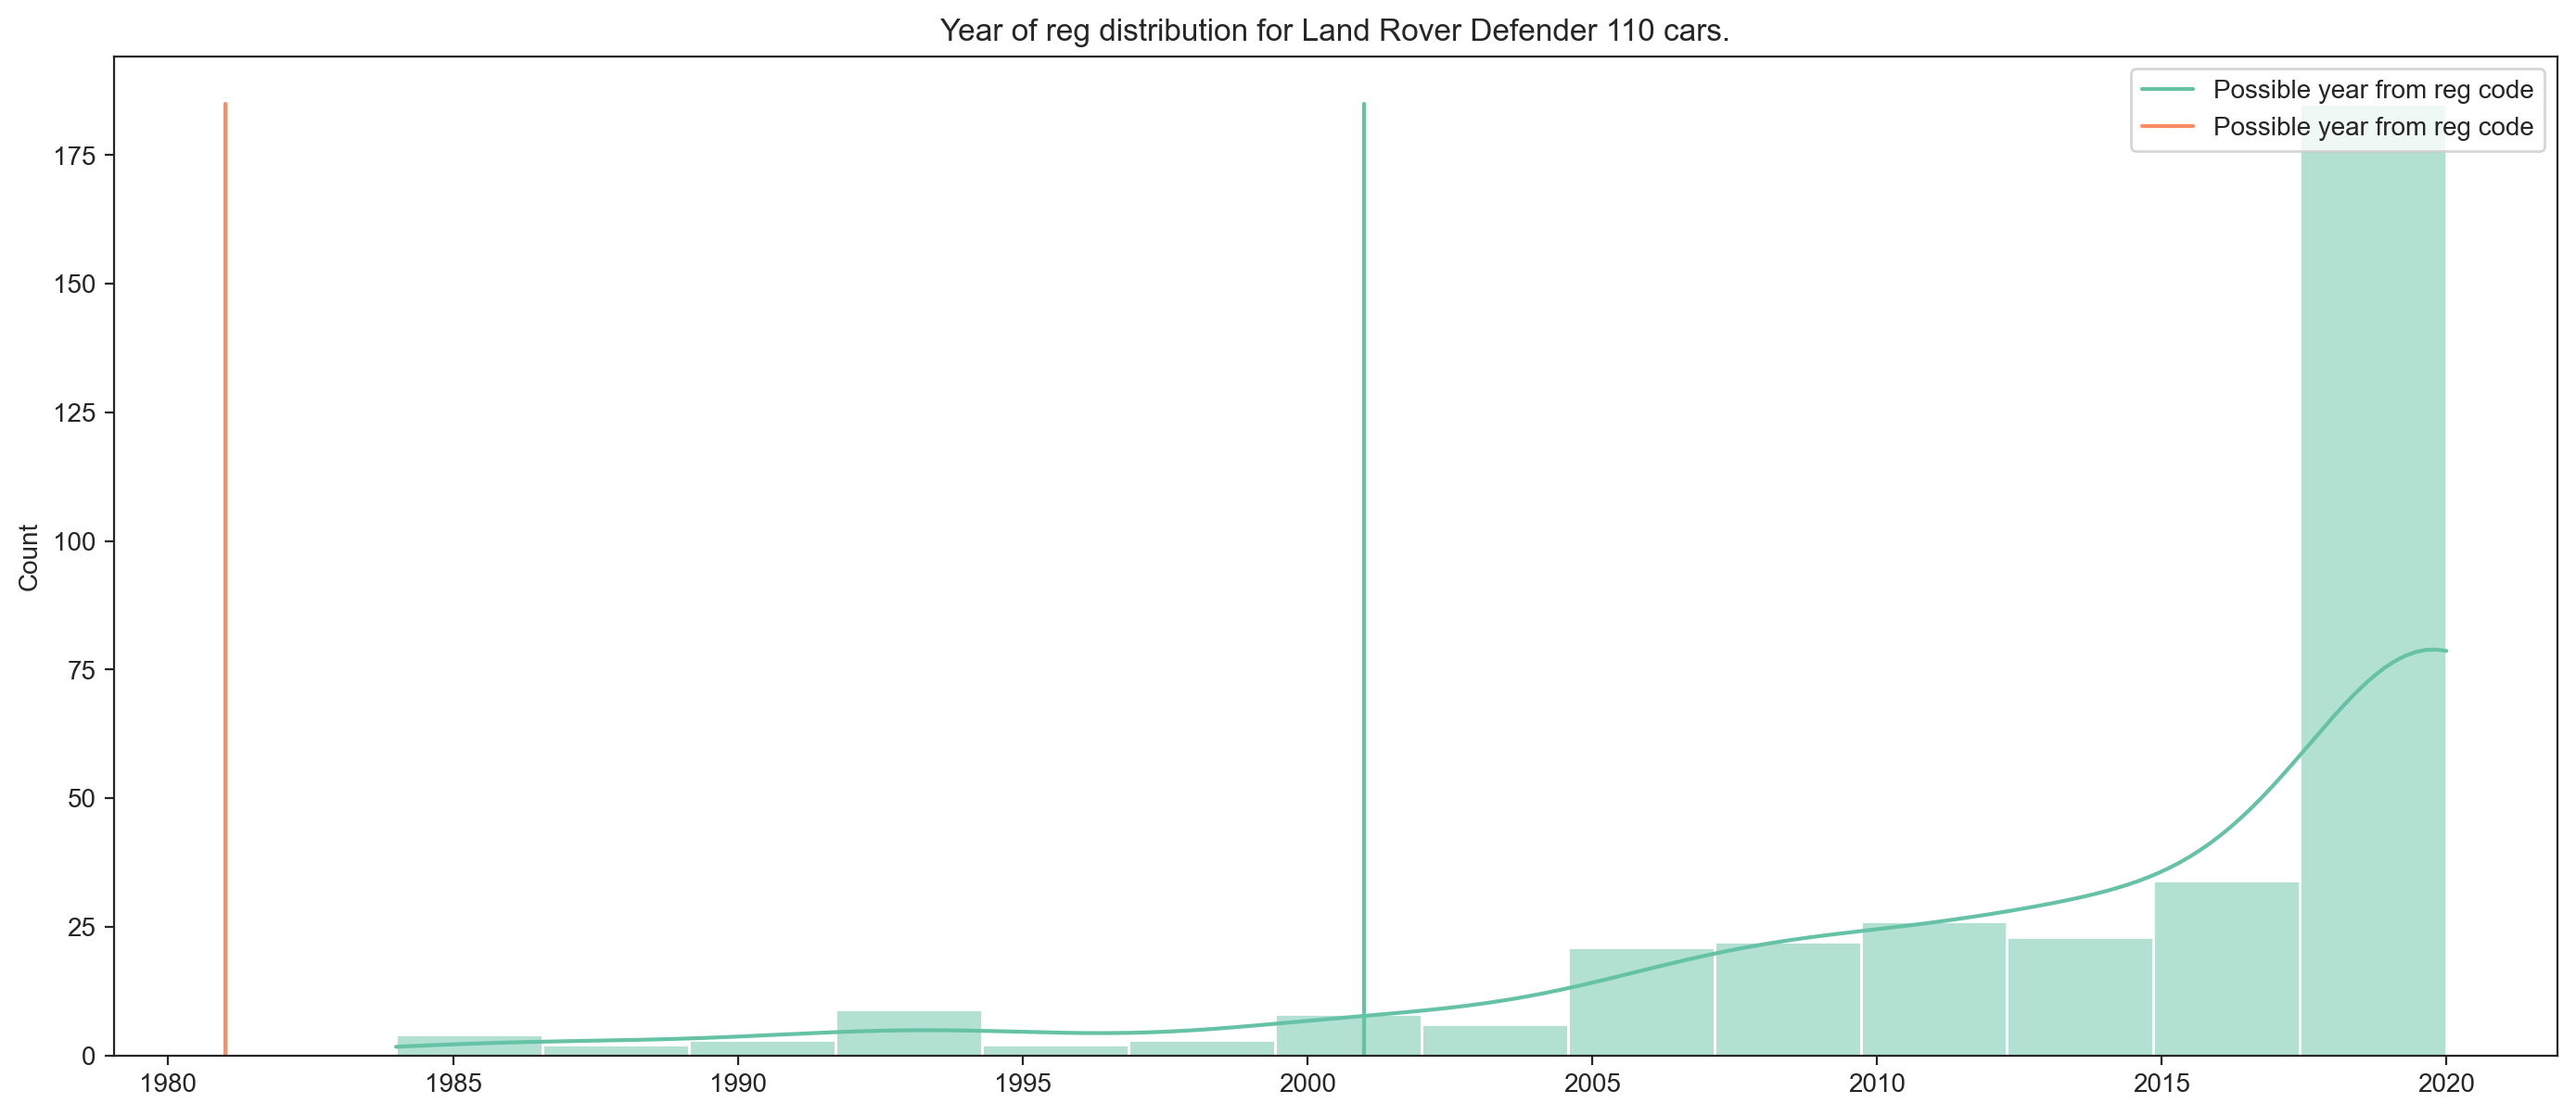

Mean year 2019.2068965517242
Closest year: 1996


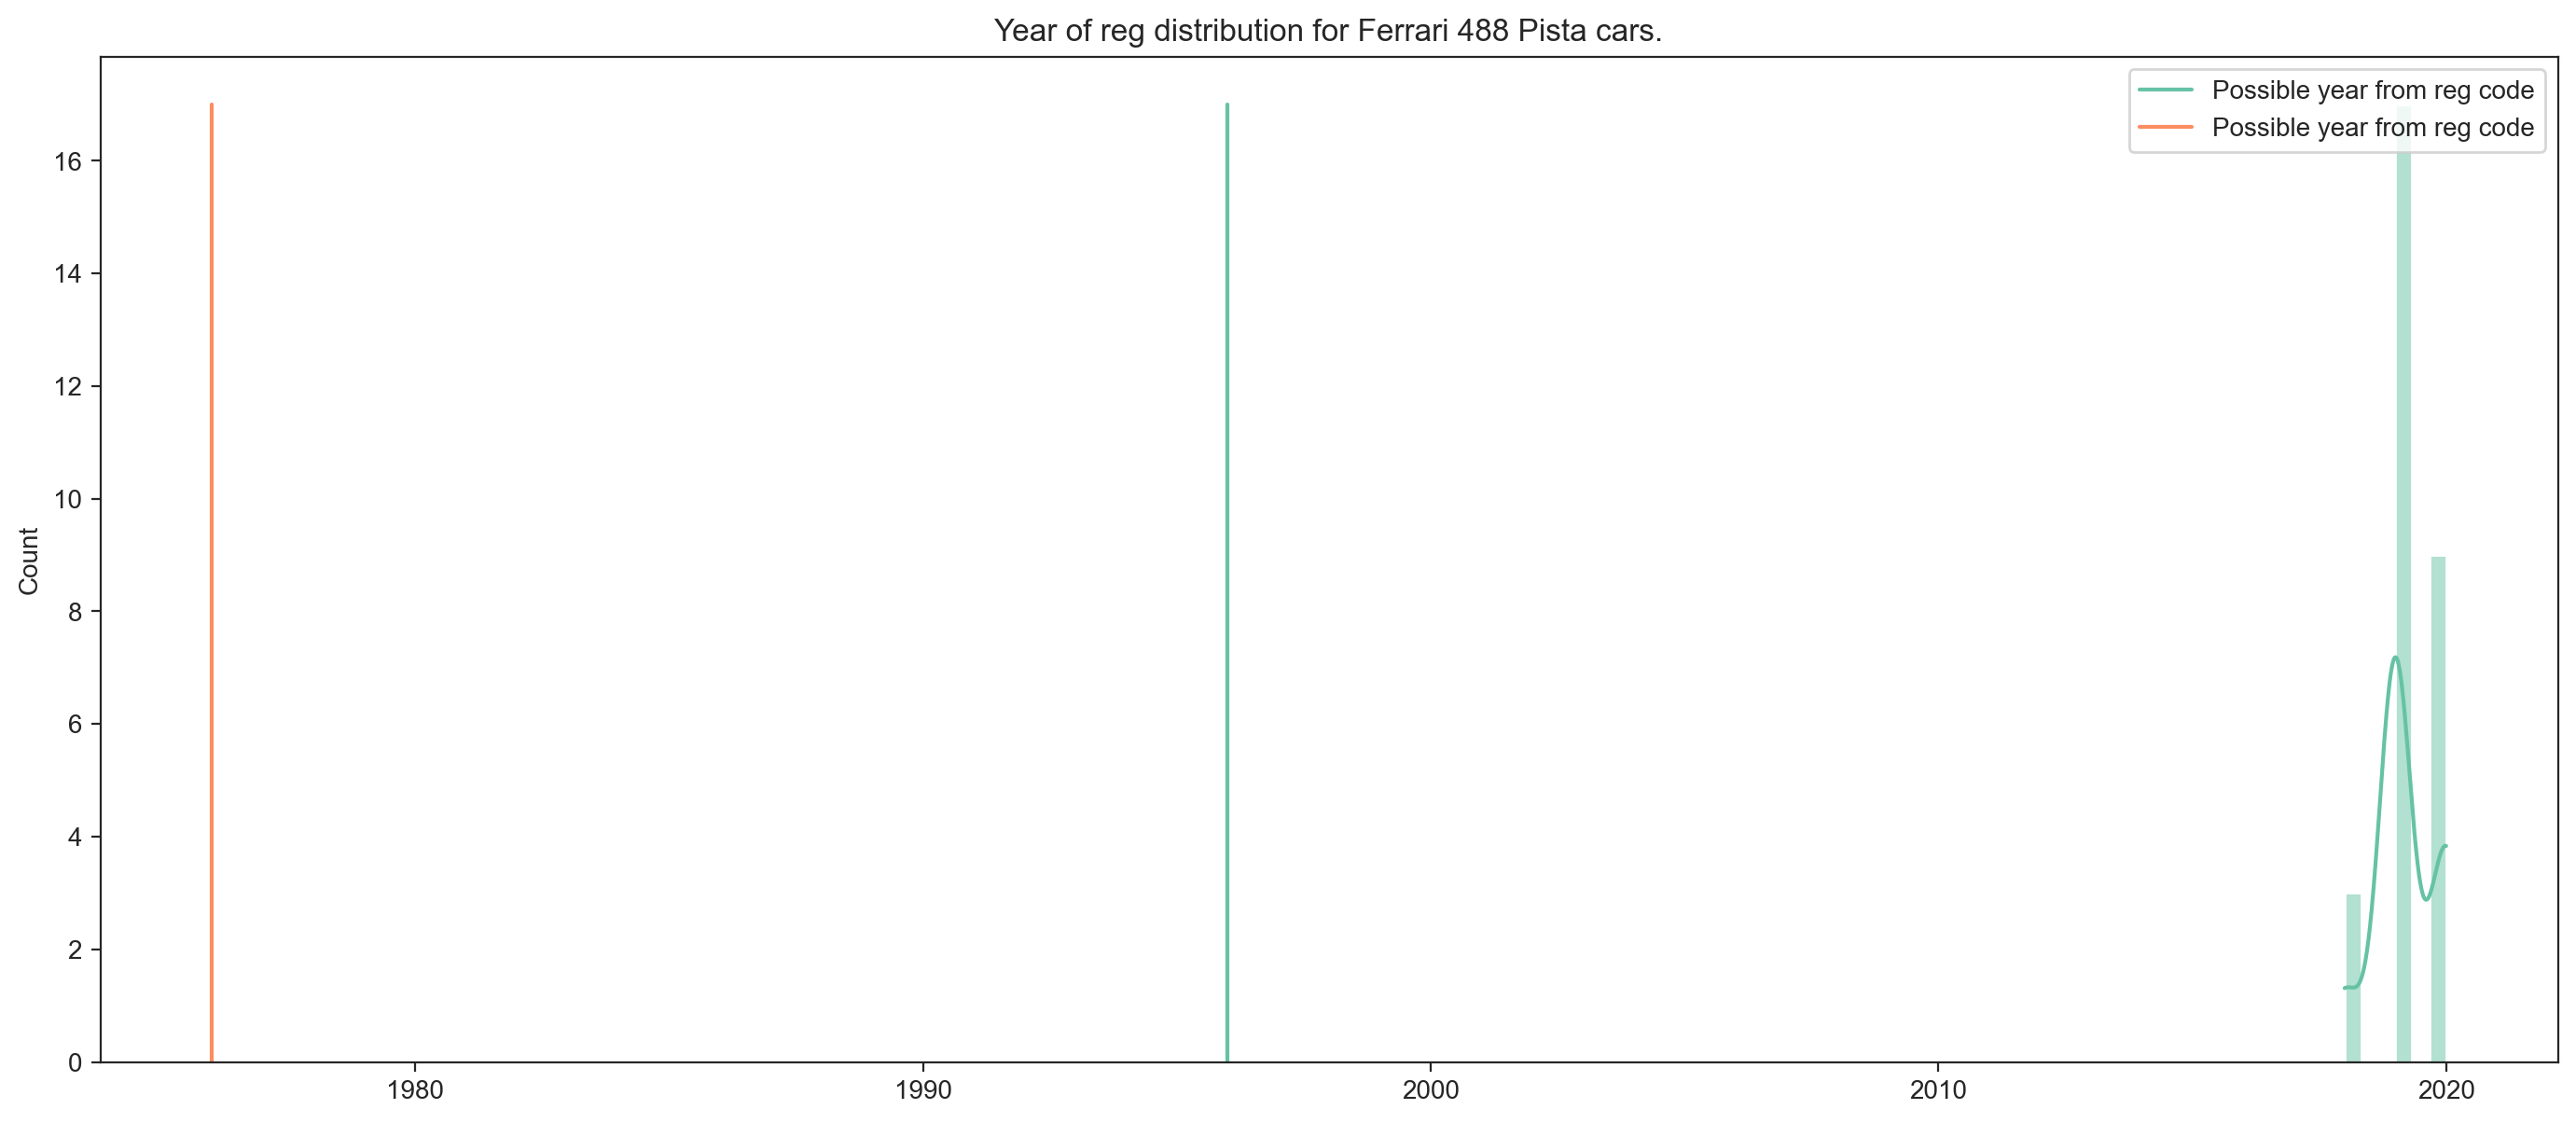

Mean year 1996.3333333333333
Closest year: 1986


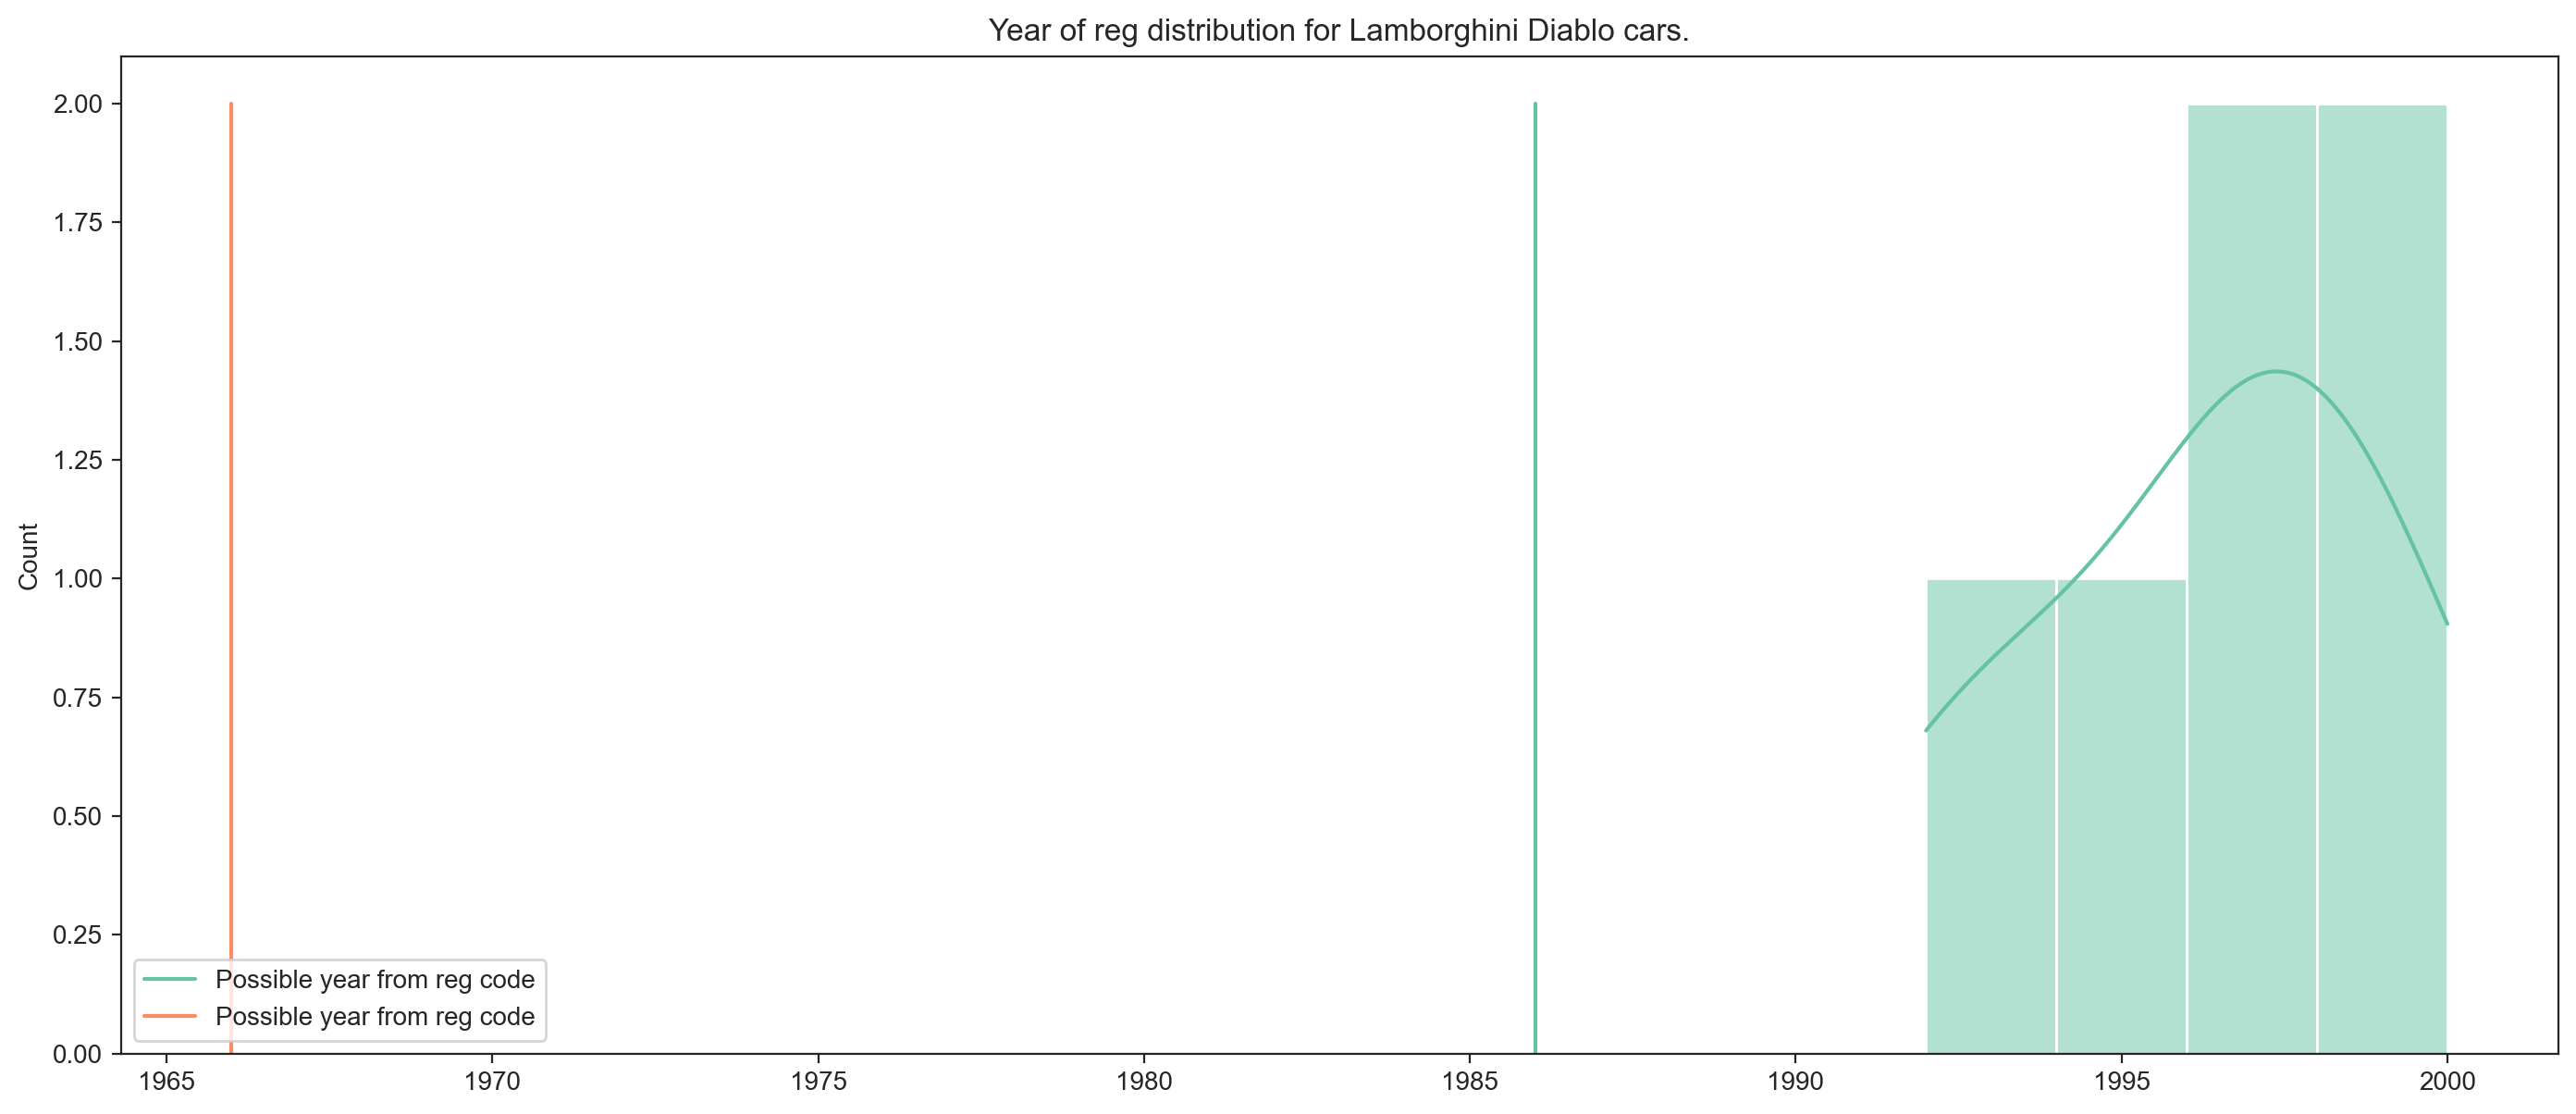

In [39]:
# For each ambiguous year visualise the distribution of years for vehicles of the same make
missing = missing.loc[missing["reg_code_year"].notna()]
full_missing = auto.loc[missing.index]

for i in range(len(full_missing)):
    missing_model = full_missing.iloc[i]["standard_model"]
    missing_make = full_missing.iloc[i]["standard_make"]
    years = full_missing.iloc[i]["reg_code_year"]
    used = auto.loc[(auto["standard_model"] == missing_model) & (auto["year_of_registration"].notna())]
    
    ax = sns.histplot(list(used["year_of_registration"]), kde=True)

    for year in years:
        plt.plot([year, year], [0, ax.dataLim.y1], label="Possible year from reg code")

    plt.title(f"Year of reg distribution for {missing_make} {missing_model} cars.");

    mean_year = np.array(used["year_of_registration"]).mean()
    closest_year = years[0] if abs(mean_year - years[0]) < abs(mean_year - years[1]) else years[1]
    print("Mean year", mean_year)
    print("Closest year:", closest_year)
    plt.legend()
    plt.show()

    auto.iat[full_missing.index[i], 12] = closest_year

In [40]:
auto.loc[full_missing.index]

public_reference   mileage reg_code standard_colour  standard_make  \
10044    202003098187902   73330.0        B            Gold         Jaguar   
16619    202010165086036   34000.0        P          Orange     Volkswagen   
28307    202003218665171   55400.0        E           White        Renault   
31566    202007040862151   26200.0        R             NaN        Ferrari   
50188    202009304378374   24500.0        R            Blue          Mazda   
50961    202010215260465   49000.0        L            Blue      Chevrolet   
78714    201912165366581   79800.0        E           Green   Aston Martin   
85202    202009234126186   99123.0        B           Green     Land Rover   
95640    202010215267071   55389.0        E            Grey  Mercedes-Benz   
105172   201905077698508   43098.0        C             Red        Bentley   
121351   201906199165858   40000.0        Y           Black        Porsche   
121673   202010315654601   76066.0        L             Red            BMW   
128144   202010195164532  219000.0        R           Black         Toyota   
140782   201605214173141    7000.0        E             Red        Ferrari   
143825   201808299946562   36954.0        M           Green   Aston Martin   
147774   202011015662169   49500.0        J          Silver  Mercedes-Benz   
149562   202008283044857   58000.0        H           Brown         Jaguar   
150395   202010235347957   75370.0        S           White           Audi   
168865   201808299946567   16610.0        N           Green   Aston Martin   
172544   202007121159263   13101.0        F            Grey           Fiat   
176109   202010205228301  151200.0        T          Purple        Porsche   
180512   202007211525053  102000.0        N          Silver        Porsche   
183144   202003238705200  112000.0        N           Black  Mercedes-Benz   
188497   202010255403231   35000.0        E           Black        Porsche   
193874   202010195187422   61277.0        F             Red        Porsche   
198995   202010285544711  106178.0        S            Blue         Nissan   
199761   201905117849929   14900.0        M             Red        Ferrari   
200702   202010275476622   99000.0        V            Blue     Volkswagen   
246904   202009173835149   52000.0        L             NaN        Ferrari   
259136   202010235355514  106000.0        M             NaN        Bentley   
261055   202010235359252   33000.0        R            Grey        Porsche   
261404   202010235370841   44000.0        R          Yellow             MG   
267071   202006220384634   30915.0        G            Blue     Land Rover   
276795   202006300690337   90000.0        F             Red             MG   
277790   202006160168644    2650.0        H           White           Fiat   
288265   201908080939232   36500.0        D             NaN   Aston Martin   
290267   201808299946645    9000.0        V           Black   Aston Martin   
298732   201907150103328       NaN        G          Purple       Vauxhall   
301367   202010245384152   79000.0        M             Red         Jaguar   
306140   202006109989443  198014.0        V           Green     Land Rover   
318433   202008192660449   90000.0        A           Green  Mercedes-Benz   
326544   202008011974003   48156.0        V           Black        Bentley   
331435   202010235339385   31500.0        M           Green         Morgan   
339049   202010175118726   70986.0        D             Red         Jaguar   
350609   201804125465255   34200.0        H             Red        Ferrari   
351673   202008293091830       NaN        Y             Red     Land Rover   
396442   202009183881773    1298.0        P            Blue        Ferrari   
398645   202010305617352   22312.0        D          Silver    Lamborghini   

             standard_model vehicle_condition  year_of_registration     price  \
10044               Mark II              USED                   NaN   24990.0   
16619             Campe

In [41]:
# Replace reg_code_year values with year_of_registration values where year_of_registration is not null
auto['reg_code_year'] = auto['year_of_registration'].combine_first(auto['reg_code_year'])
# Replace year_of_registration values with reg_code_year values where year_of_registration is null
auto['year_of_registration'] = auto['year_of_registration'].combine_first(auto['reg_code_year'])

auto.loc[auto["year_of_registration"].isna()]

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition year_of_registration    price  \
0                     XC90               NEW                  NaN  73970.0   
17                 X-Trail               NEW                  NaN  27595.0   
19                 T-Cross               NEW                  NaN  25000.0   
37                   Panda               NEW                  NaN  13999.0   
44                   Civic               NEW                  NaN  19495.0   
...                    ...               ...                  ...      ...   
401860        Shogun Sport               NEW                  NaN  31999.0   
401890                  Z4               NEW                  NaN  47910.0   
401902            3 Series               NEW                  NaN  35023.0   
401905  Range Rover Evoque               NEW                  NaN  44995.0   
401971                Leaf               NEW                  NaN  28820.0   

          body_type  crossover_car_and_van              fuel_type  \
0               SUV                  False  Petrol Plug-in Hybrid   
17              SUV                  False                 Diesel   
19              SUV                  False                 Petrol   
37        Hatchback                  False                 Petrol   
44        Hatchback                  False                 Petrol   
...             ...                    ...                    ...   
401860          SUV                  False                 Diesel   
401890  Convertible                  False                 Petrol   
401902       Saloon                  False                 Petrol   
401905          SUV                  False                 Petrol   
401971    Hatchback                  False               Electric   

       reg_code_year  
0                NaN  
17               NaN  
19               NaN  
37               NaN  
44               NaN  
...              ...  
401860           NaN  
401890           NaN  
401902           NaN  
401905           NaN  
401971           NaN  

[31579 rows x 13 columns]

In [42]:
notnan = auto.loc[auto["year_of_registration"].notna()]
notnan = notnan.loc[notnan["reg_code_year"].notna()]
notnan["reg_code_year"] = notnan["reg_code_year"].map(lambda f: int(f))
notnan["year_of_registration"] = notnan["year_of_registration"].map(lambda f: int(f))
mismatch = notnan.loc[abs(notnan["year_of_registration"] - notnan["reg_code_year"]) > 1]

Most of the reg codes can be mapped simply to years, however, there are cases where they disagree or the mapping is more complex. Below I identify these mismatches for known years of reg for further examination.

In [43]:
mismatch = auto.loc[mismatch.index]
mismatch.loc[mismatch["year_of_registration"] > 2000]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type, reg_code_year]
Index: []

Modern cars should not have letter reg codes. This means either the year is incorrect or the registration plate does not match the usual format. This could be due to a custom or foreign reg. As such, the year of reg will be trusted and the reg_code ignored. 

In [44]:
unusual_reg = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"] > 2001)]

unusual_reg

public_reference   mileage reg_code standard_colour  standard_make  \
2441     202009043309414  158000.0        V            Blue           Audi   
16268    202010034572199   45000.0        H            Grey     Land Rover   
24287    201909142224514   55000.0        S           Green        Daimler   
64548    202010235367626   96000.0        E            Grey     Volkswagen   
70814    202009294330268   20000.0        Y          Yellow  Mercedes-Benz   
114407   202008011962624  124000.0        M          Purple     Volkswagen   
118355   201801283171568   90000.0        m             Red     Mitsubishi   
133006   202005209439981   66000.0        M           Black        Porsche   
134313   201908281578365   36000.0        M          Yellow         Jaguar   
155766   202006140117828   86527.0        Y          Silver          Mazda   
160002   202007241640821   10966.0        P          Silver     Volkswagen   
186806   202010215261751   72000.0        P          Silver  Mercedes-Benz   
198896   202010134967280   51000.0        G           Black         Nissan   
202354   201703012815134   97000.0        L          Silver         Toyota   
229236   202007131193936   48000.0        Y          Silver           Audi   
246182   202009043329329       NaN        N             Red          Mazda   
247449   202004178975193  114220.0        H           Green          Mazda   
261801   202008182626792   32000.0        L             Red      Chevrolet   
281160   202005319681503  195668.0        P           White          Buick   
282868   202010315650479   26155.0        R           White           Audi   
293934   202010064663120   14000.0        L           Green         Lancia   
308318   202009143720330   76000.0        K          Silver          Honda   
324033   202010265450840  131000.0        N           White          Mazda   
330129   202010235356674  116000.0        P             Red            BMW   
366376   202010215267034   65000.0        A          Silver       Mitsuoka   
382625   202010124920837   76000.0        H            Blue         Nissan   
383189   202009153754914   69000.0        Y          Silver          Honda   
383211   202009193954704   68000.0        W             NaN     Mitsubishi   
401251   202010185148463   41500.0        M            Grey         Nissan   

           standard_model vehicle_condition year_of_registration     price  \
2441                   A3              USED               2017.0    1995.0   
16268   Range Rover Sport              USED               2017.0   37750.0   
24287         Super Eight              USED               2019.0   10995.0   
64548             Karmann              USED               2006.0   35000.0   
70814             G Class              USED               2014.0  149950.0   
114407               Golf              USED               2008.0     645.0   
118355                GTO              USED               2005.0    5989.0   
133006                911              USED               2016.0   99950.0   
134313             E-Type              USED               2019.0   59950.0   
155766               MX-5              USED               2003.0    1550.0   
160002               Golf              USED               2018.0    9995.0   
186806                SLK              USED               2009.0    1495.0   
198896            Elgrand              USED               2018.0   10500.0   
202354       Land Cruiser              USED               2006.0   16950.0   
229236                 TT              USED               2020.0    5500.0   
246182               MX-5              USED               2008.0    3795.0   
247449               MX-5              USED               2003.0    3750.0   
261801           Corvette              USED               2008.0    9500.0   
281160            Riviera              USED               2019.0    7500.0   
282868                 R8              USED               2008.0   39965.0   
293934              Delta    

In [45]:
# Sample some reg codes to investigate
sample = auto.sample()
print(format_entry(sample))
print(sample["reg_code"].values[0])

2018 Vauxhall Mokka X with 16,763 miles and price £11,474.0
68


Some reg codes which correspond to the second half of one year have the year of registration one year later. This seems fine and the year of registration will be taken as valid in this case.

Letter registration codes introduce ambiguity as there is no delineation made between 1963-1983 letter codes (A-Y at the end of the reg) and 1983-2000 codes which reuse the same letters but at the start of the reg.

## Reg Code Summary

The reg codes are useful to impute the year of registration, beyond this they are redundant to the year and this column should be dropped before fitting. Some reg codes are ambiguous and need to be estimated based on the average year of registration of other cars of the same make. Additional information such as the mileage could also be useful to improve the imputing so something like a KNN imputer give slightly better results. A few reg codes do not fit with a known pattern, having values which put the year in the future (based on when the data was gathered) or having letters (or strings) which do not map to known year codes and as such are of no value and should be ignored.

---
&nbsp;

&nbsp;

# ==== Year of Registration ====

In [46]:
years = auto["year_of_registration"].unique()
years.sort()
years

array([nan, 999.0, 1006.0, 1007.0, 1008.0, 1009.0, 1010.0, 1015.0, 1016.0,
       1017.0, 1018.0, 1063.0, 1515.0, 1909.0, 1933.0, 1934.0, 1950.0,
       1952.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0,
       1961.0, 1962.0, 1963.0, 1964, 1965.0, 1966.0, 1967.0, 1968.0,
       1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0,
       1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0,
       1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0,
       1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
       2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0,
       2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0,
       2017.0, 2018.0, 2019.0, 2020.0], dtype=object)

In [47]:
# Some very small years, lets have a look

auto.loc[auto["year_of_registration"] < 1950].sort_values(by="year_of_registration", ascending=False)

public_reference   mileage reg_code standard_colour  standard_make  \
156562   202009264242828   48000.0       FW           Black         Morris   
28925    202006140121316   26000.0      NaN           Black         Austin   
150850   202006220401450   12345.0      NaN           Black         Austin   
148003   202010104836987   31172.0       09           Black        Hyundai   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
201616   202010134937656    8600.0       68          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
120858   202010064654489   27200.0       66           Black           MINI   
387633   202010195174849   39624.0       65             Red           MINI   
190556   202010205206488   58470.0       10           Black           Fiat   
114737   202008102305925   30000.0       59             Red         Toyota   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
59010    202006270588110   14000.0       07            Blue         Toyota   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
201626   202010155037484   69346.0       64             Red          Mazda   
213059   202009304380359   54569.0       08          Silver            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   

       standard_model vehicle_condition year_of_registration    price  \
156562             10              USED               1934.0   5995.0   
28925           Seven              USED               1933.0   9995.0   
150850         Twelve              USED               1933.0  11990.0   
148003            i10              USED               1909.0   3950.0   
69516        A4 Avant              USED               1515.0  10385.0   
84501          fortwo              USED               1063.0   4785.0   
201616             M2              USED               1018.0  41990.0   
274622       2 Series              USED               1017.0  18990.0   
120858        Clubman              USED               1016.0  18990.0   
387633        Clubman              USED               1015.0  15290.0   
190556      Punto Evo              USED               1010.0   3785.0   
114737           AYGO              USED               1009.0   4695.0   
199830          Hatch              USED               1009.0   5995.0   
199987       1 Series              USED               1008.0   4395.0   
59010           Prius              USED               1007.0   7000.0   
201773        C Class              USED               1007.0   7295.0   
339167          Hatch              USED               1007.0   4795.0   
374798           RAV4              USED               1006.0   5994.0   
201626         Mazda3              USED                999.0   8795.0   
213059             Z4              USED                999.0   7999.0   
334679             A3              USED                999.0   8895.0   

          body_type  crossover_car_and_van      fuel_type reg_code_year  
156562       Saloon                  False         Petrol        1934.0  
28925        Saloon                  False         Petrol        1933.0  
150850       Saloon                  False         Petrol        1933.0  
148003    Hatchback                  False         Petrol        1909.0  
69516        Estate                  False         Diesel        1515.0  
84501         Coupe                  False         Petrol        1063.0  
201616        Coupe                  False         Petrol        1018.0  
274622  Convertible                  False         Petrol        1017.0  
120858       Estat

Austin and Morris make sense to have years in the 1930 however, the others predate the invention of the car and 
look to be off by 1000 except the Audi A4 Avant with year 1515 and the Hyundai i10 with year 1909. Fortunately, all of them have reasonable reg_codes which can be used to impute the year. I will replace these invalid values with nan so that the reg_code function can replace them correctly.

In [48]:
auto["year_of_registration"] = auto["year_of_registration"].mask(auto["year_of_registration"] < 1910)
years = auto["year_of_registration"].unique()
years.sort()
years

array([nan, 1933.0, 1934.0, 1950.0, 1952.0, 1954.0, 1955.0, 1956.0,
       1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964,
       1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0,
       1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0,
       1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0,
       1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0,
       1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0,
       2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0,
       2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0],
      dtype=object)

<Axes: xlabel='year_of_registration'>

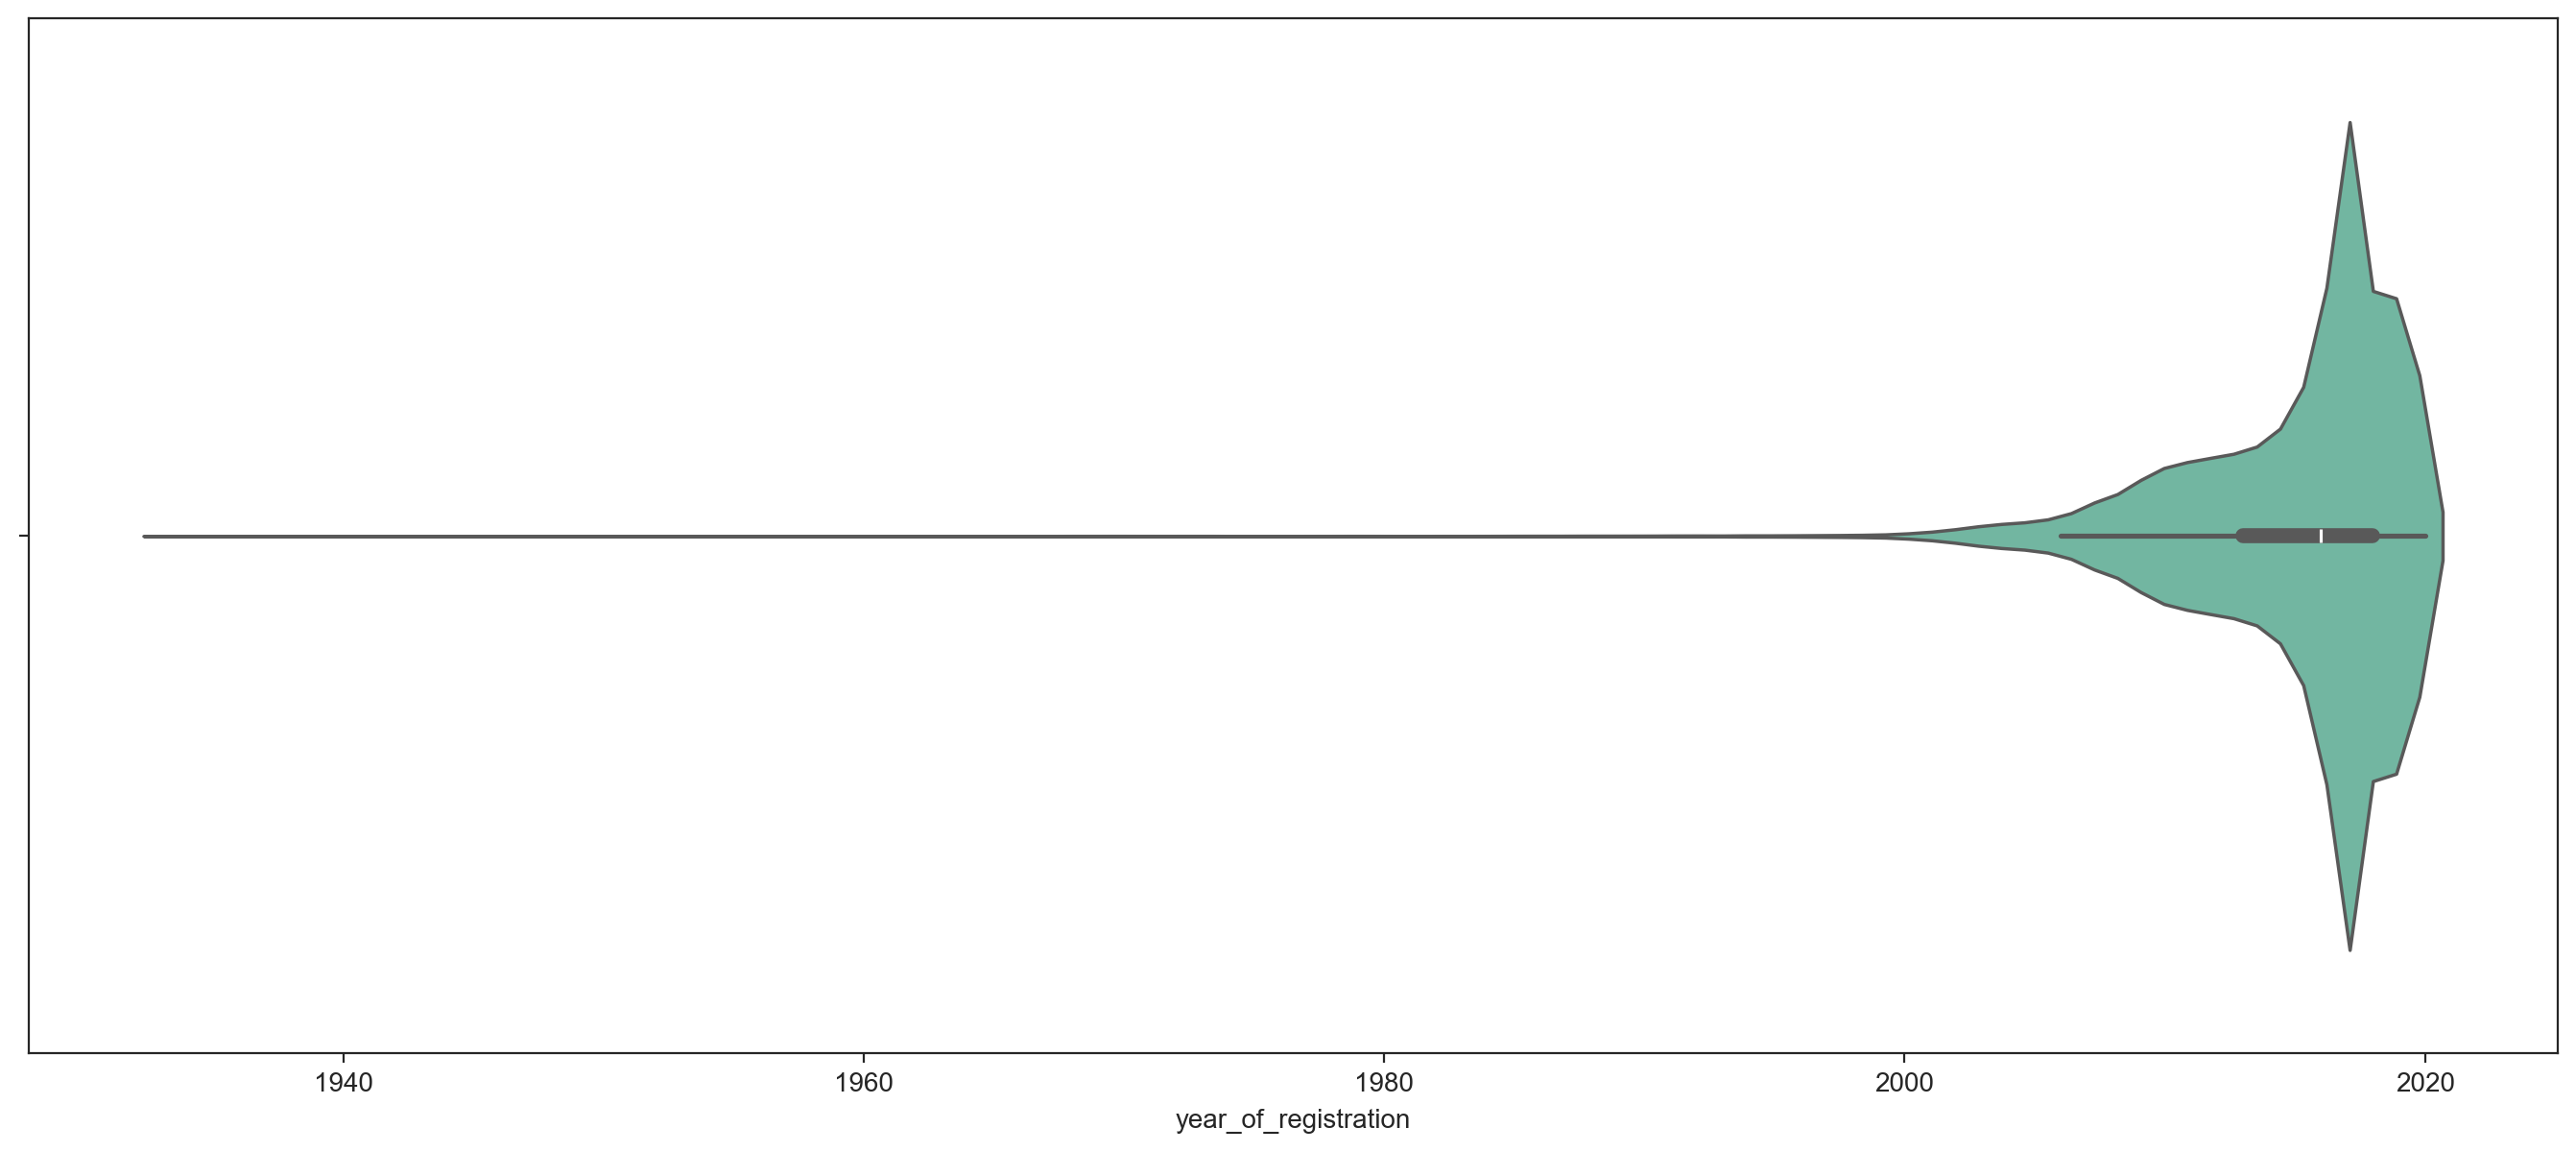

In [49]:
sns.violinplot(auto, x="year_of_registration")

## Null Values

In [50]:
print(f"There are {len(auto["year_of_registration"].isna())} null values for year of reg.")
print(f"There are {len(auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna())])} null values for year of reg with no corresponding reg code.")

There are 402005 null values for year of reg.
There are 31570 null values for year of reg with no corresponding reg code.


A large number of the missing years have reg codes which can be used ot fill in the gaps however, there are still 31570 nulls.

In [51]:
# All missing year entries
auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna())]

public_reference  mileage reg_code standard_colour standard_make  \
0        202006039777689      0.0      NaN            Grey         Volvo   
17       201911043995897      5.0      NaN             NaN        Nissan   
19       202008272998331      0.0      NaN           White    Volkswagen   
37       202001306737473      0.0      NaN           White          Fiat   
44       202003178531910      0.0      NaN             NaN         Honda   
...                  ...      ...      ...             ...           ...   
401860   202010024501227     10.0      NaN          Silver    Mitsubishi   
401890   202010104843364      5.0      NaN             Red           BMW   
401902   202010134960554     10.0      NaN           White           BMW   
401905   202010144983518      0.0      NaN             Red    Land Rover   
401971   202010285515882     10.0      NaN            Grey        Nissan   

            standard_model vehicle_condition year_of_registration    price  \
0                     XC90               NEW                  NaN  73970.0   
17                 X-Trail               NEW                  NaN  27595.0   
19                 T-Cross               NEW                  NaN  25000.0   
37                   Panda               NEW                  NaN  13999.0   
44                   Civic               NEW                  NaN  19495.0   
...                    ...               ...                  ...      ...   
401860        Shogun Sport               NEW                  NaN  31999.0   
401890                  Z4               NEW                  NaN  47910.0   
401902            3 Series               NEW                  NaN  35023.0   
401905  Range Rover Evoque               NEW                  NaN  44995.0   
401971                Leaf               NEW                  NaN  28820.0   

          body_type  crossover_car_and_van              fuel_type  \
0               SUV                  False  Petrol Plug-in Hybrid   
17              SUV                  False                 Diesel   
19              SUV                  False                 Petrol   
37        Hatchback                  False                 Petrol   
44        Hatchback                  False                 Petrol   
...             ...                    ...                    ...   
401860          SUV                  False                 Diesel   
401890  Convertible                  False                 Petrol   
401902       Saloon                  False                 Petrol   
401905          SUV                  False                 Petrol   
401971    Hatchback                  False               Electric   

       reg_code_year  
0                NaN  
17               NaN  
19               NaN  
37               NaN  
44               NaN  
...              ...  
401860           NaN  
401890           NaN  
401902           NaN  
401905           NaN  
401971           NaN  

[31570 rows x 13 columns]

Many of these cars with missing years are new. New cars have likely not been registered yet but as they are new we can fill in the current year (as of when the data was collected, 2020) for the year_of_registration.

In [52]:
# Not new missing year entries
auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna()) & (auto["vehicle_condition"] != "NEW")].sort_values(by="price")

public_reference   mileage reg_code standard_colour standard_make  \
185690   202009244151758  134000.0      NaN            Blue      Vauxhall   
23752    202010024491962  110000.0      NaN           Beige           BMW   
246942   202009284314499  163000.0      NaN          Silver    Land Rover   
71508    202010064666671  171000.0      NaN            Blue      Chrysler   
324667   202010134929324   73897.0      NaN            Grey         Honda   
...                  ...       ...      ...             ...           ...   
147188   202009103539048     100.0      NaN            Grey      Maserati   
252505   202008112331147   46300.0      NaN            Blue       Ferrari   
305436   201812223434109    3600.0      NaN            Grey   Lamborghini   
336202   202001226429470     950.0      NaN           Black       Ferrari   
336536   202006180262926    4400.0      NaN           White       Porsche   

       standard_model vehicle_condition year_of_registration   price  \
185690          Corsa              USED                  NaN  1250.0   
23752              X5              USED                  NaN  2250.0   
246942     Freelander              USED                  NaN  2486.0   
71508         Sebring              USED                  NaN  2495.0   
324667          Civic              USED                  NaN  2689.0   
...               ...               ...                  ...     ...   
147188           3500              USED                  NaN     NaN   
252505            275              USED                  NaN     NaN   
305436          Miura              USED                  NaN     NaN   
336202      LaFerrari              USED                  NaN     NaN   
336536            959              USED                  NaN     NaN   

          body_type  crossover_car_and_van fuel_type reg_code_year  
185690          NaN                  False    Diesel           NaN  
23752           SUV                  False       NaN           NaN  
246942          SUV                  False    Diesel           NaN  
71508   Convertible                  False    Petrol           NaN  
324667    Hatchback                  False    Petrol           NaN  
...             ...                    ...       ...           ...  
147188  Convertible                  False    Petrol           NaN  
252505        Coupe                  False    Petrol           NaN  
305436        Coupe                  False    Petrol           NaN  
336202        Coupe                  False    Petrol           NaN  
336536        Coupe                  False    Petrol           NaN  

[321 rows x 13 columns]

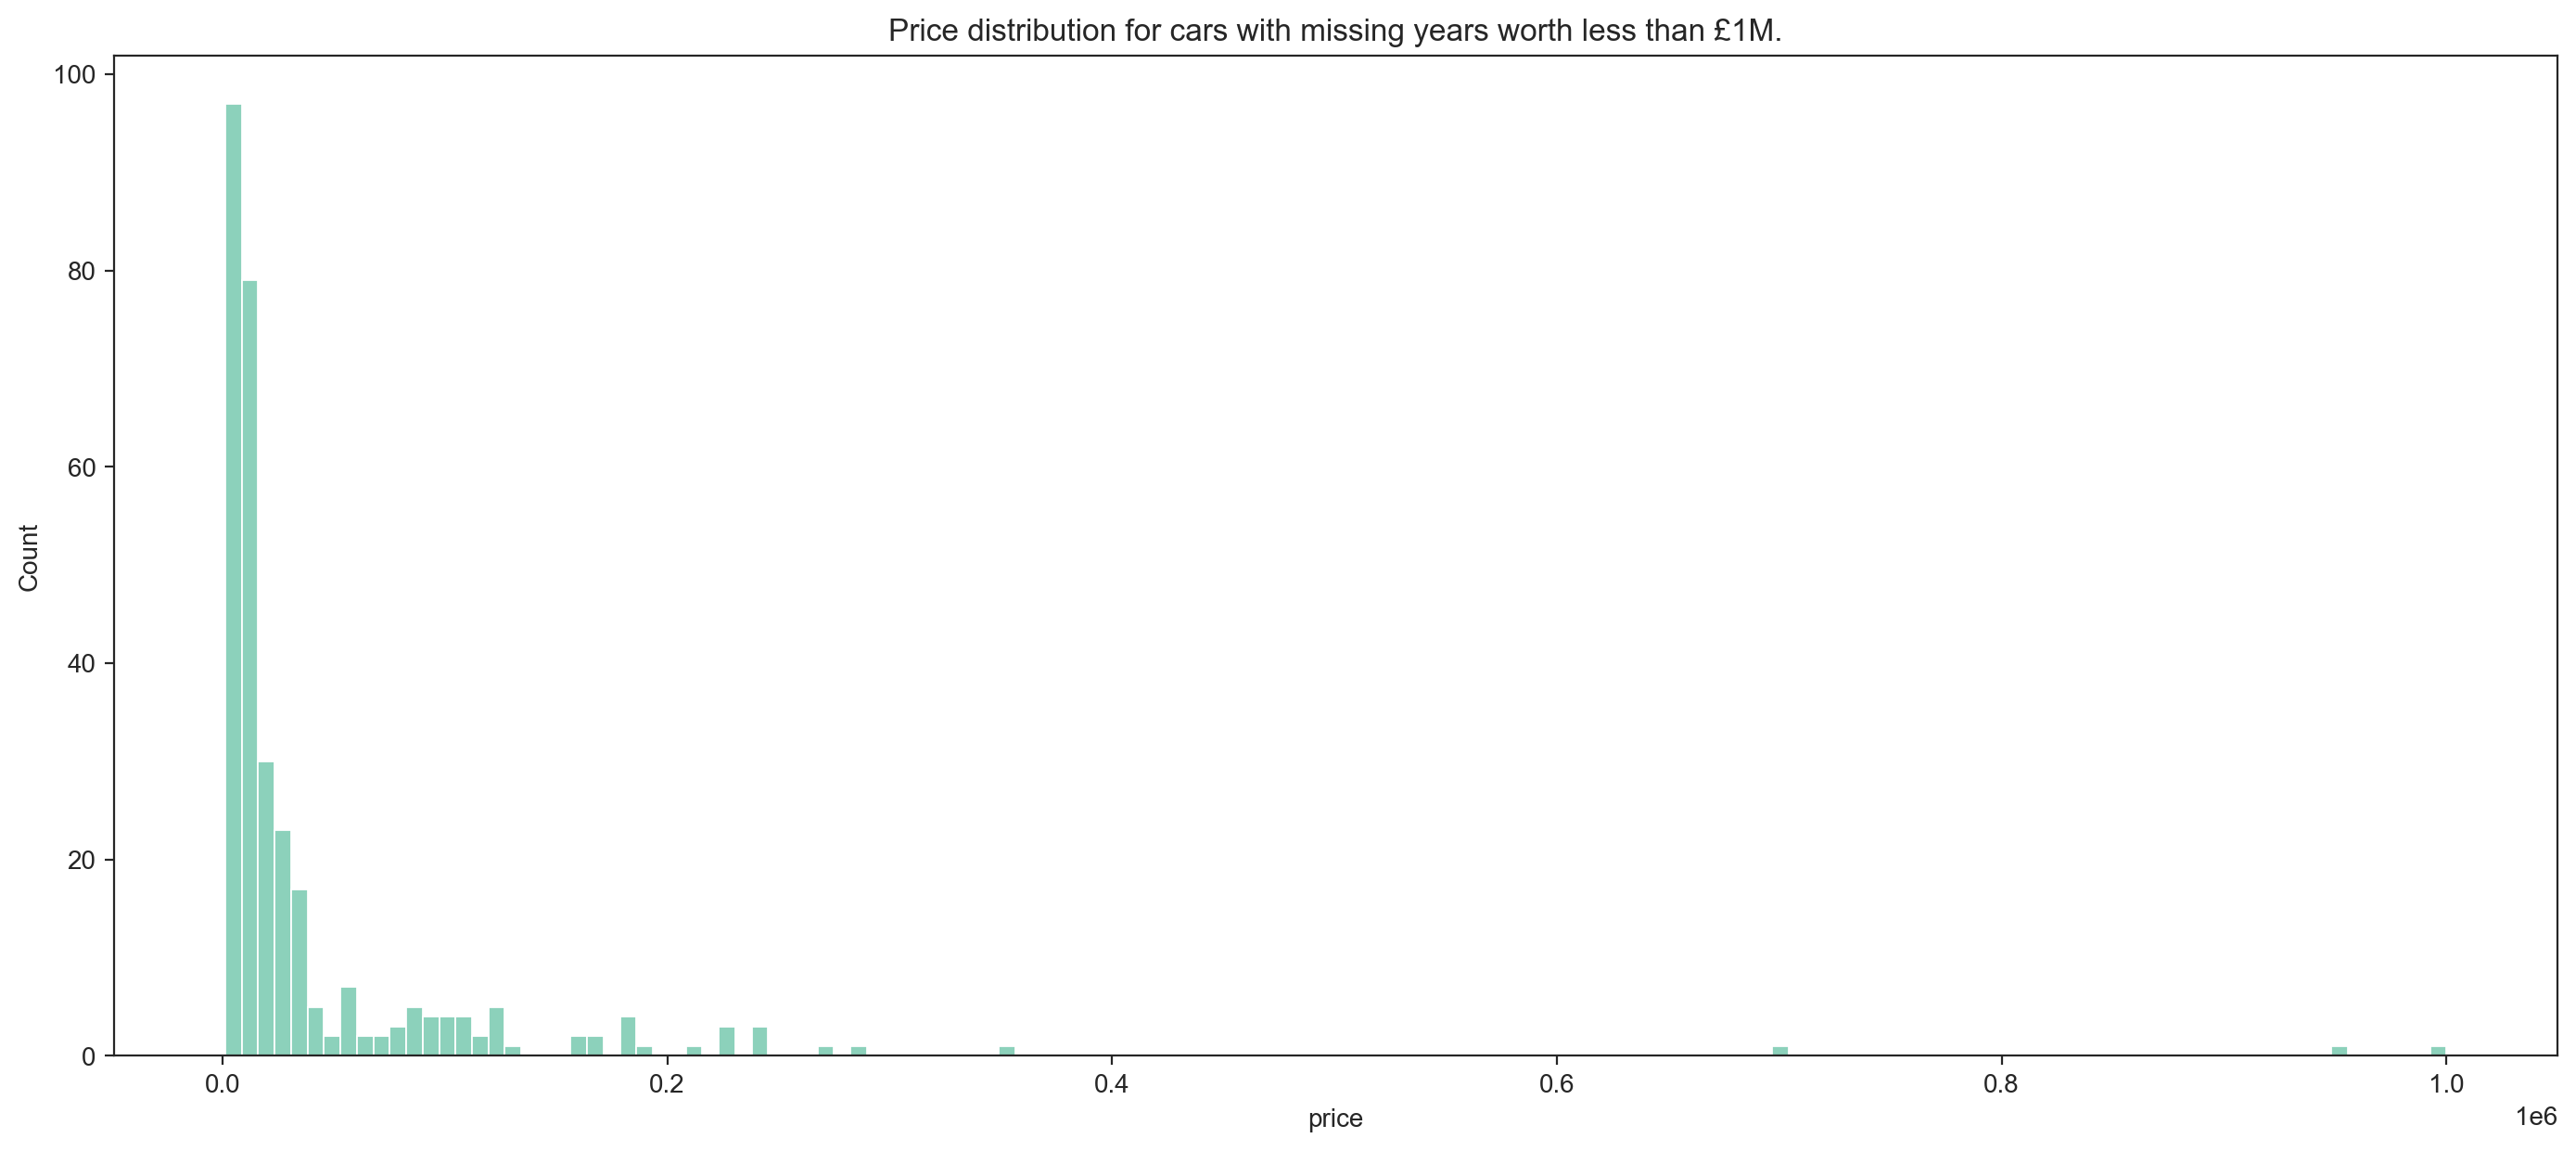

In [53]:
miss = auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna()) & (auto["vehicle_condition"] != "NEW")]
miss = miss.loc[miss["price"] < 1e6]
sns.histplot(miss, x="price")
plt.title("Price distribution for cars with missing years worth less than £1M.");

This leaves 321 entries which need to have their year of reg imputed. This can be done with a KNNImputer, SimpleImputer or IterativeImputer.

---
&nbsp;

&nbsp;

# ==== Colour ====

In [54]:
print(f"Colour has {int(auto["standard_colour"].isnull().sum())} null values.")

Colour has 5378 null values.


In [55]:
auto["standard_colour"].value_counts()

standard_colour
Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: count, dtype: int64

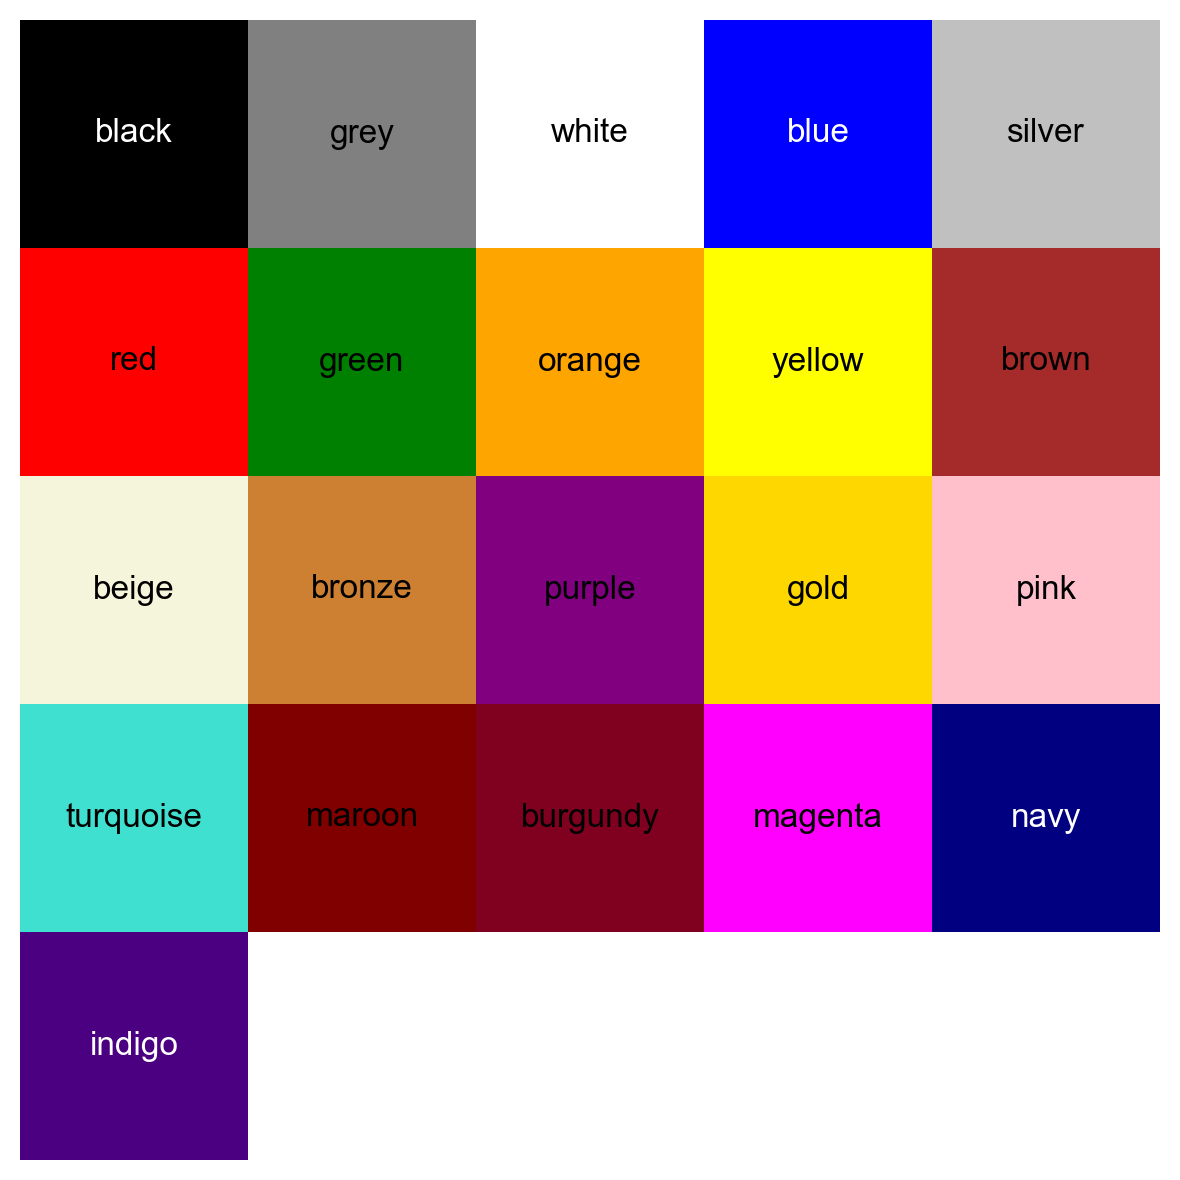

In [56]:
import matplotlib.patches as patches

# Define a 5x5 grid of colors (hex codes or named colors)
colors = [
    ["black", "grey", "white", "blue", "silver"],
    ["red", "green", "orange", "yellow", "brown"],
    ["beige", "#cd7f32", "purple", "gold", "pink"],
    ["turquoise", "maroon", "#800020", "magenta", "navy"],
    ["indigo", "#FFFFFF", "#FFFFFF", "#FFFFFF", "#FFFFFF"],
]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the squares
for i, row in enumerate(colors):
    for j, color in enumerate(row):
        rect = patches.Rectangle(
            (j, i), 1, 1, linewidth=0, edgecolor=None, facecolor=color
        )
        ax.add_patch(rect)
        # Add the color name in the center of the square
        if color != "#FFFFFF":
            label = color
            label_map = {"#800020": "burgundy", "#cd7f32": "bronze"}
            if color in label_map.keys():
                label = label_map[color]
            ax.text(
                j + 0.5,       # x-coordinate (center of square)
                i + 0.5,      # y-coordinate (center of square)
                label,         # Text to display
                ha="center",   # Horizontal alignment
                va="center",   # Vertical alignment
                fontsize=12,    # Font size
                color="black" if color not in ["black", "navy", "indigo", "blue"] else "white",  # Text color for contrast
            )

# Set axis limits and turn off axes
ax.set_xlim(0, 5)
ax.set_ylim(5, 0)
ax.axis("off")  # No axis lines or labels

# Show the plot
plt.tight_layout()
plt.show()

All colours are reasonable however, some seem superfluous. For example, the 7 navy cars can be added to blue, burgundy and maroon are basically the same colour, bronze is just shiny brown so they can probably be combined, the 15 magenta ones can be added to pink and the one indigo can be added to purple.

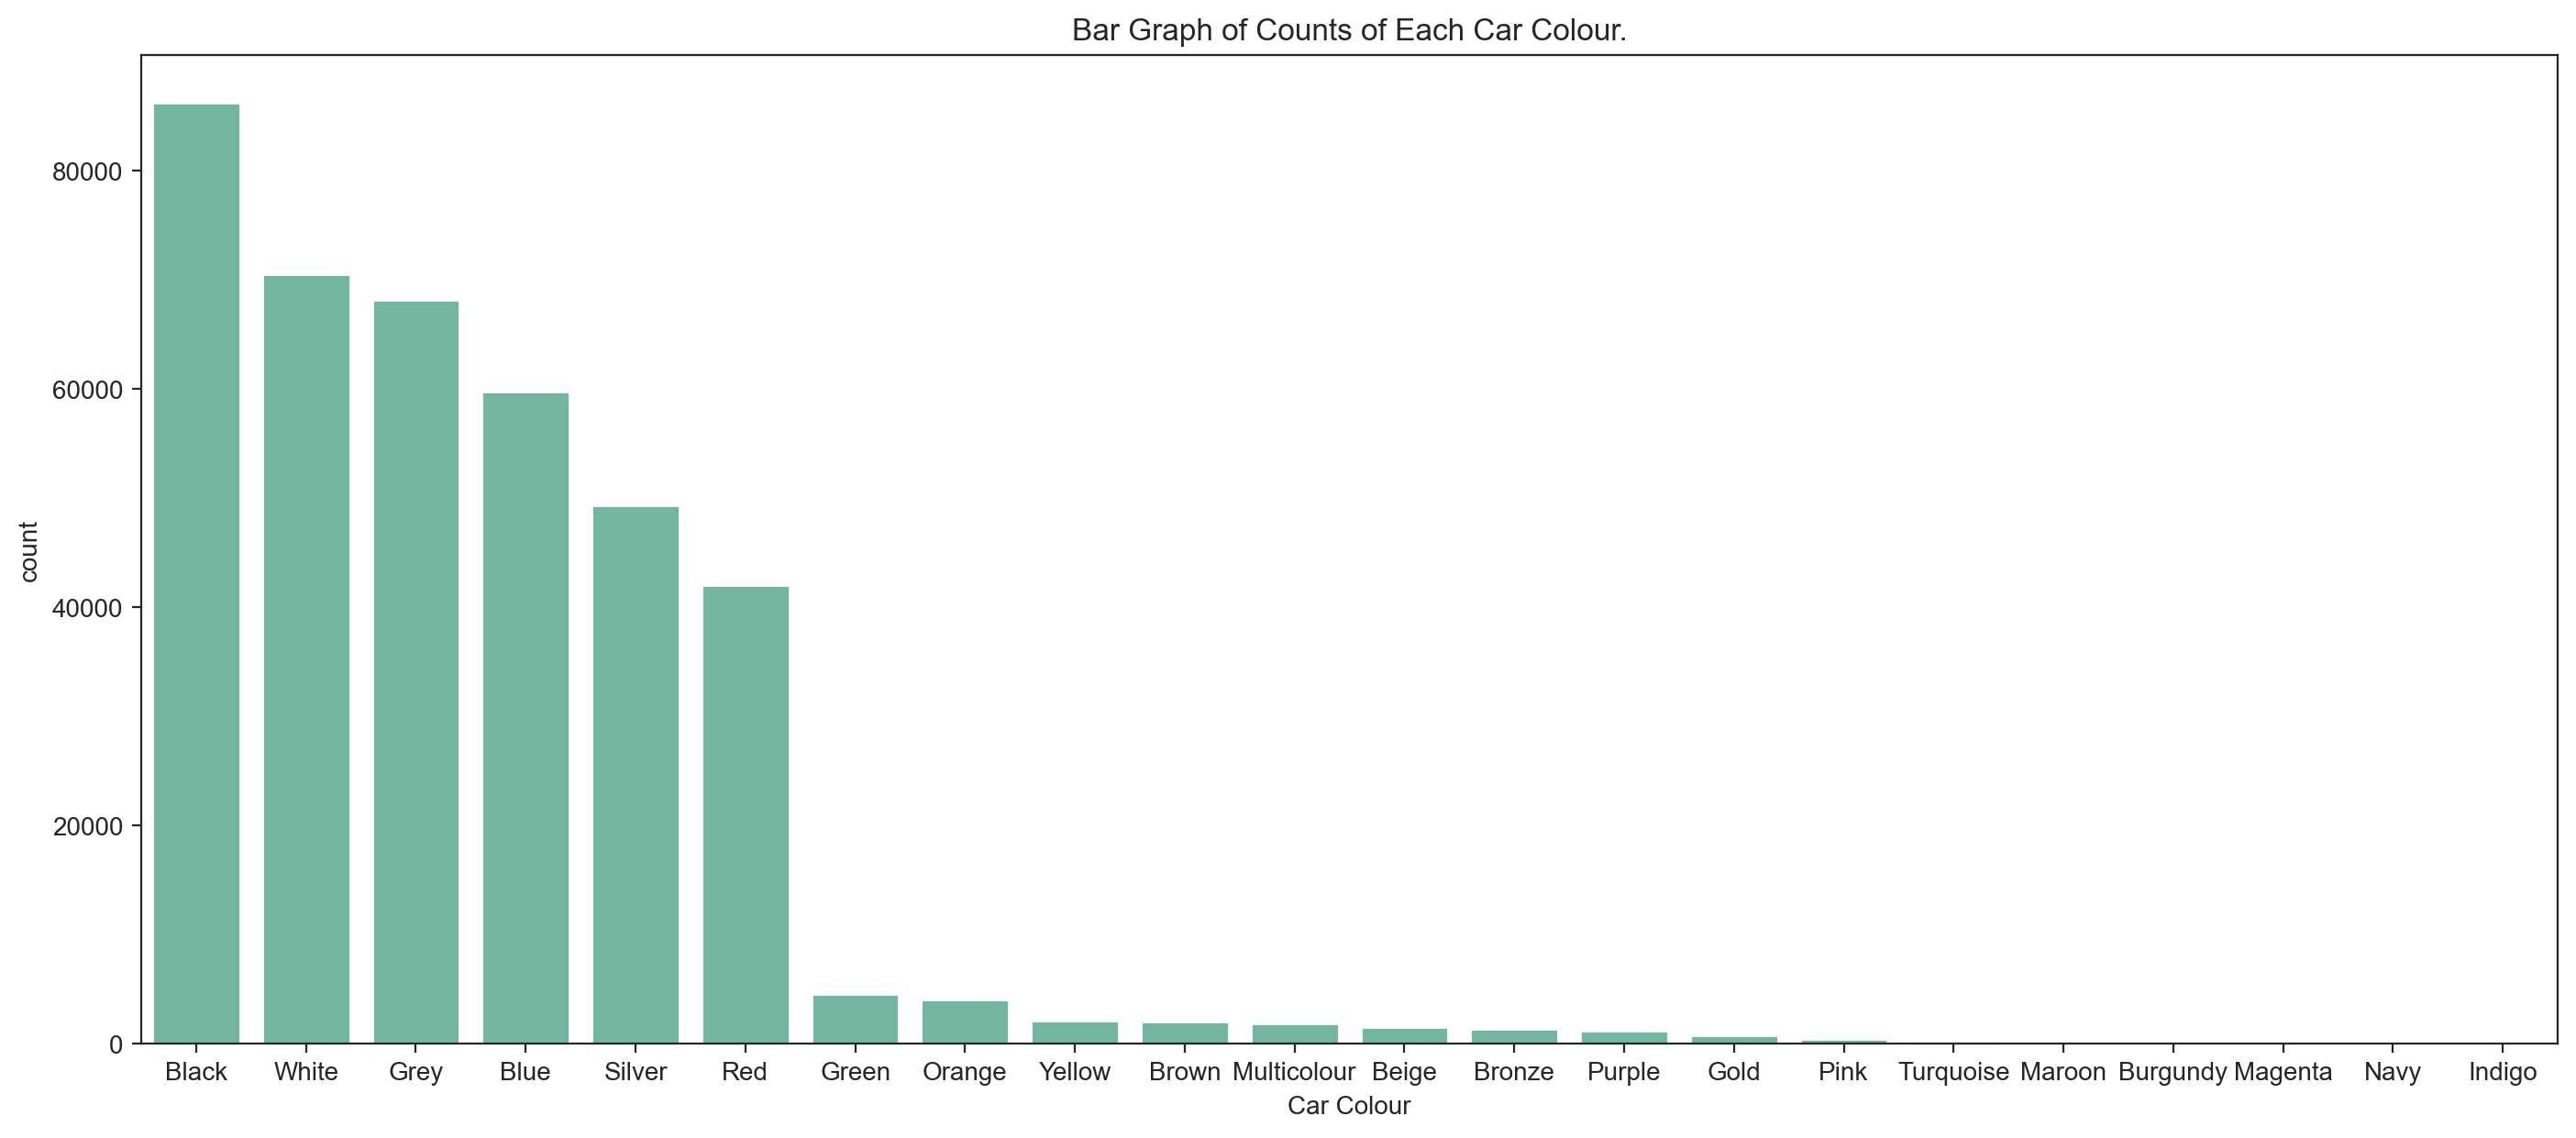

In [57]:
colour_counts = auto['standard_colour'].value_counts(sort=True)
axes = sns.barplot(colour_counts)
axes.set_title("Bar Graph of Counts of Each Car Colour.");
axes.set_xlabel("Car Colour");

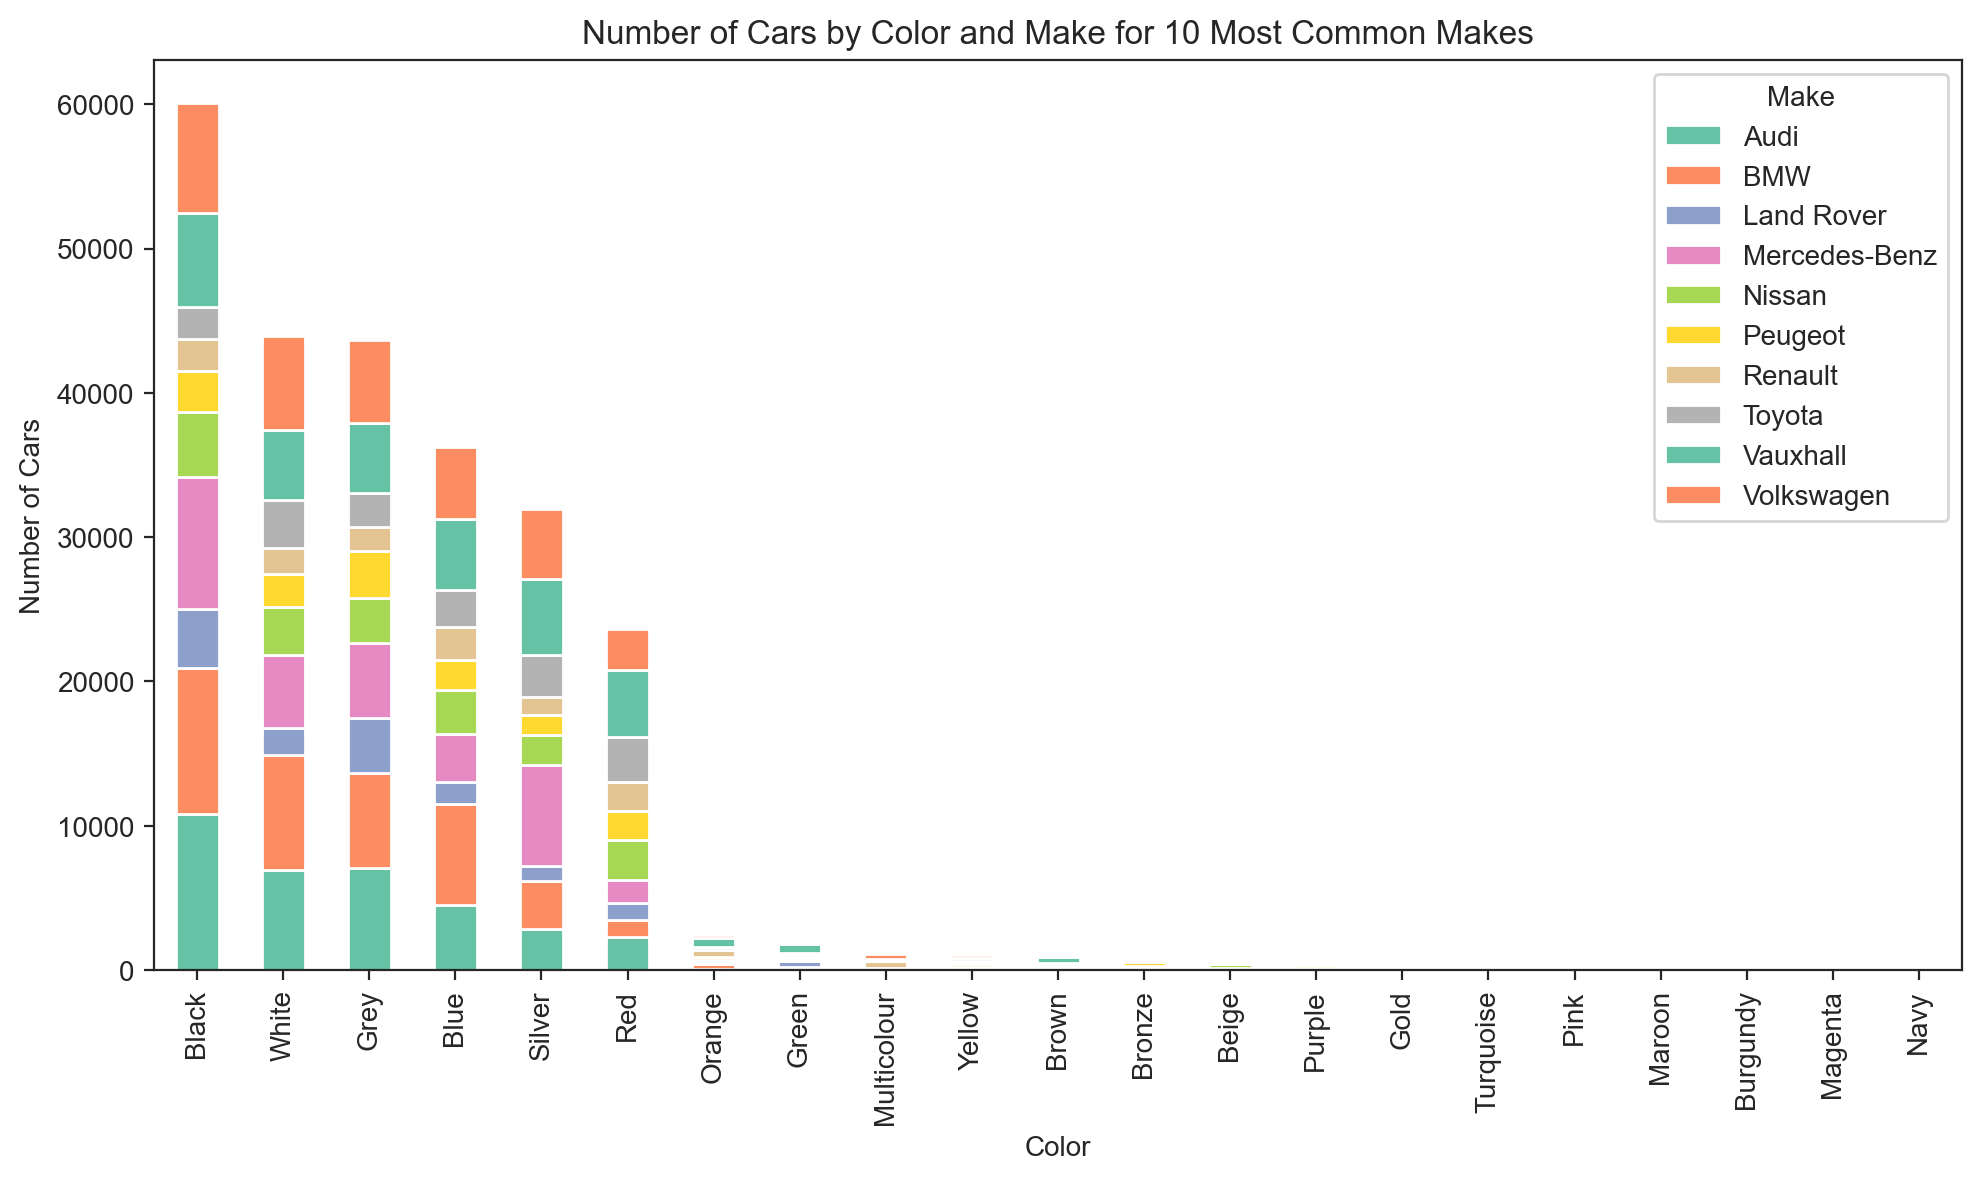

In [58]:
popular_brands = auto['standard_make'].value_counts(sort=True)[:10]

# Create a new column for only the most popular brans
auto['processed_make'] = auto['standard_make'].apply(lambda x: x if x in popular_brands else 'Other')

# Create a new dataframe with the counts of each colour for each make
counts = (
    auto.groupby(['standard_colour', 'processed_make'])
    .size()
    .reset_index(name='count')
)

# Pivot the data to get a table of counts by color and make
pivot_table = counts.pivot_table(index='standard_colour', columns='processed_make', values='count', fill_value=0)

# Calculate the total count for each processed make across all colors
column_totals = pivot_table.sum(axis=0)

# Sort columns by their total count in descending order
sorted_columns = column_totals.sort_values(ascending=False).index
pivot_table = pivot_table[sorted_columns]

# Calculate the total count for each color across all makes
row_totals = pivot_table.sum(axis=1)

# Filter out rows where the processed_make is "Other"
filtered_counts = counts[counts['processed_make'] != 'Other']

# Pivot the data to get a table of counts by color and make
pivot_table = filtered_counts.pivot_table(index='standard_colour', columns='processed_make', values='count', fill_value=0)

# Sort the rows (colors) by their total counts
row_totals = pivot_table.sum(axis=1)
sorted_rows = row_totals.sort_values(ascending=False).index
pivot_table = pivot_table.loc[sorted_rows]

# Plot the stacked bar graph without "Other" brands and sorted colors
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Number of Cars by Color and Make for 10 Most Common Makes')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Make')
plt.tight_layout()

# Show the plot
plt.show()

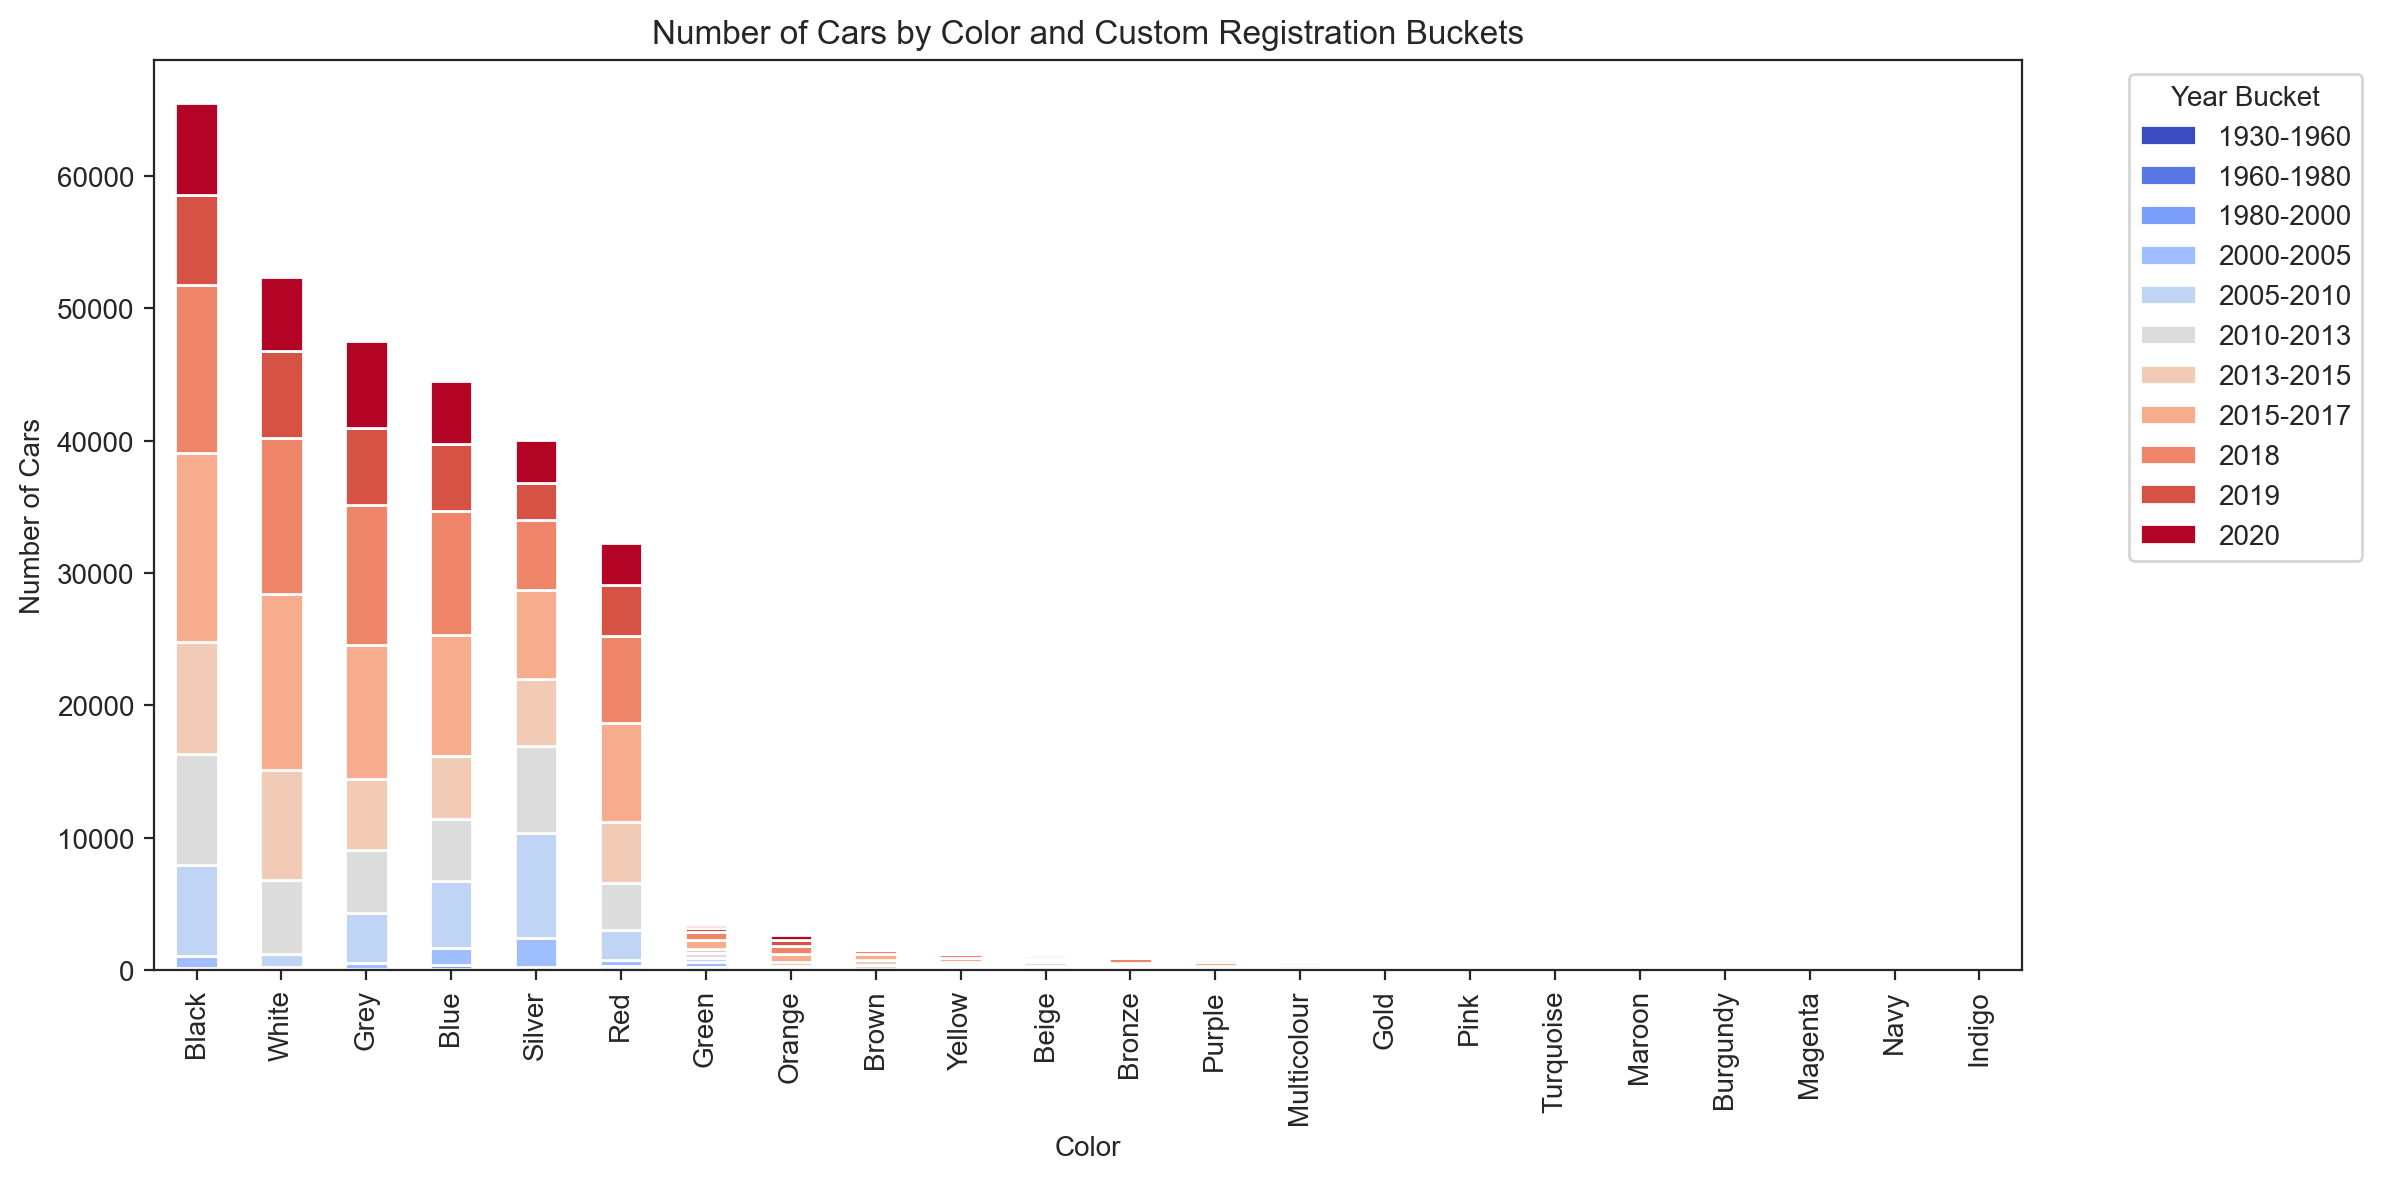

In [59]:
# Step 1: Define custom bins and labels
bins = [1930, 1960, 1980, 2000, 2005, 2010, 2013, 2015, 2017, 2018, 2019, 2020]
labels = [
    "1930-1960", "1960-1980", "1980-2000", "2000-2005", "2005-2010",
    "2010-2013", "2013-2015", "2015-2017", "2018", "2019", "2020"
]

# Assign each year to a bucket
auto['registration_bucket'] = pd.cut(auto['year_of_registration'], bins=bins, labels=labels, right=False)

# Group by color and bucket, then calculate counts
bucket_counts = (
    auto.groupby(['standard_colour', 'registration_bucket'])
    .size()
    .reset_index(name='count')
)

# Pivot the data
pivot_table_buckets = bucket_counts.pivot_table(index='standard_colour', columns='registration_bucket', values='count', fill_value=0)

# Sort rows (colors) by total counts
row_totals_buckets = pivot_table_buckets.sum(axis=1)
sorted_rows_buckets = row_totals_buckets.sort_values(ascending=False).index
pivot_table_buckets = pivot_table_buckets.loc[sorted_rows_buckets]

# Step 2: Map buckets to a red-to-blue colormap
cmap = plt.cm.coolwarm  # Choose a colormap
norm = mcolors.Normalize(vmin=0, vmax=len(labels) - 1)  # Normalize the bucket range

# Create a dictionary mapping each bucket to a color
bucket_colors = {label: cmap(norm(i)) for i, label in enumerate(labels)}

# Step 3: Plot with custom colors
ax = pivot_table_buckets.plot(kind='bar', stacked=True, figsize=(12, 6),
                              color=[bucket_colors[col] for col in pivot_table_buckets.columns])

# Customize the plot
plt.title('Number of Cars by Color and Custom Registration Buckets')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Year Bucket', bbox_to_anchor=(1.05, 1), loc='upper left', labels=labels)
plt.tight_layout()

# Show the plot
plt.show()

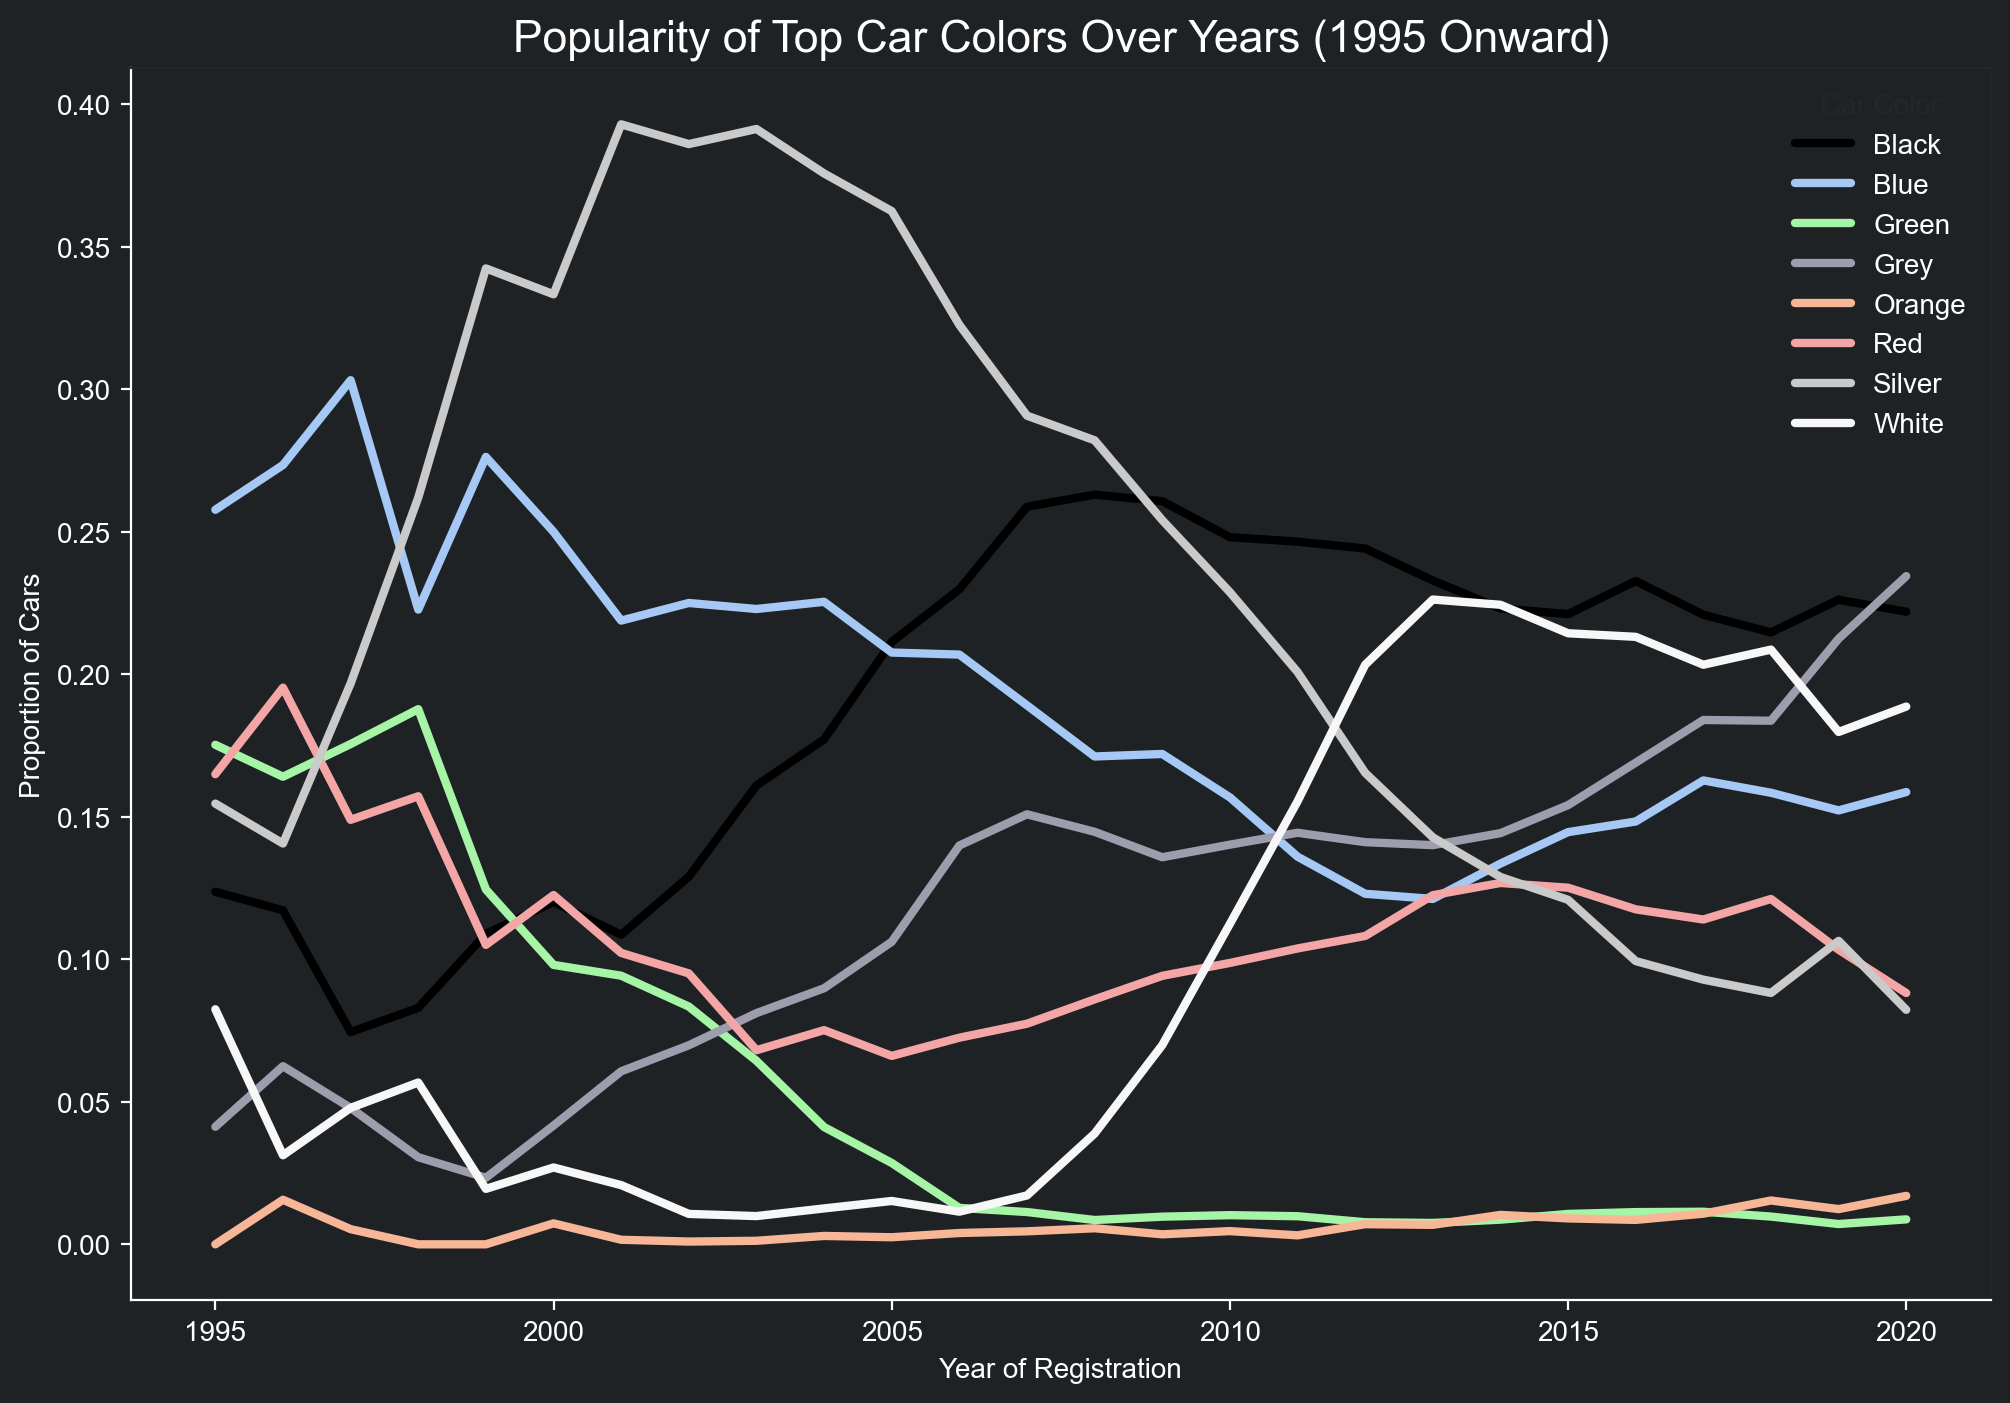

In [60]:
# Filter data for years >= 1980
filtered_auto = auto[auto['year_of_registration'] >= 1995]

# Find the 8 most popular colors 
top_colors = (
    filtered_auto['standard_colour']
    .value_counts()
    .nlargest(8)
    .index
)

# Filter data for only the top colors
filtered_auto = filtered_auto[filtered_auto['standard_colour'].isin(top_colors)]

# Group by year and color, then count
color_year_counts = (
    filtered_auto.groupby(['year_of_registration', 'standard_colour'])
    .size()
    .reset_index(name='count')
)

# Calculate the total number of cars for each year
year_totals = color_year_counts.groupby('year_of_registration')['count'].sum()

# Calculate proportions
color_year_counts['proportion'] = color_year_counts.apply(
    lambda row: row['count'] / year_totals[row['year_of_registration']],
    axis=1
)

# Pivot the data to have colors as columns and years as rows
pivot_table = color_year_counts.pivot_table(
    index='year_of_registration', columns='standard_colour', values='proportion', fill_value=0
)

# Map car colors to line colors
color_mapping = {
    "Red": "#F4A6A6",      # Pastel red
    "Blue": "#A6C8F4",     # Pastel blue
    "Green": "#A6F4A6",    # Pastel green
    "White": "#F7F7F7",    # Light gray (near white)
    "Black": "#000000",    # Light gray for black
    "Silver": "#CACACA",   # Soft silver
    "Grey": "#9D9DAD",     # Pastel gray
    "Orange": "#F7B696",   # Pastel orange
}

# Plot the data with lines colored by car color
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Set the face color of the figure and the axes
ax.set_facecolor("#1F2225")
fig.set_facecolor("#1F2225")

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for color in pivot_table.columns:
    ax.plot(
        pivot_table.index, 
        pivot_table[color], 
        label=color, 
        color=color_mapping.get(color),
        linewidth=3,
    )

# Add titles and labels the plot
ax.set_title('Popularity of Top Car Colors Over Years (1995 Onward)', color="white", fontsize=16)
ax.set_xlabel('Year of Registration')
ax.set_ylabel('Proportion of Cars')
ax.legend(title='Car Color', labelcolor="white", facecolor="#1F2225", edgecolor="#1F2225");

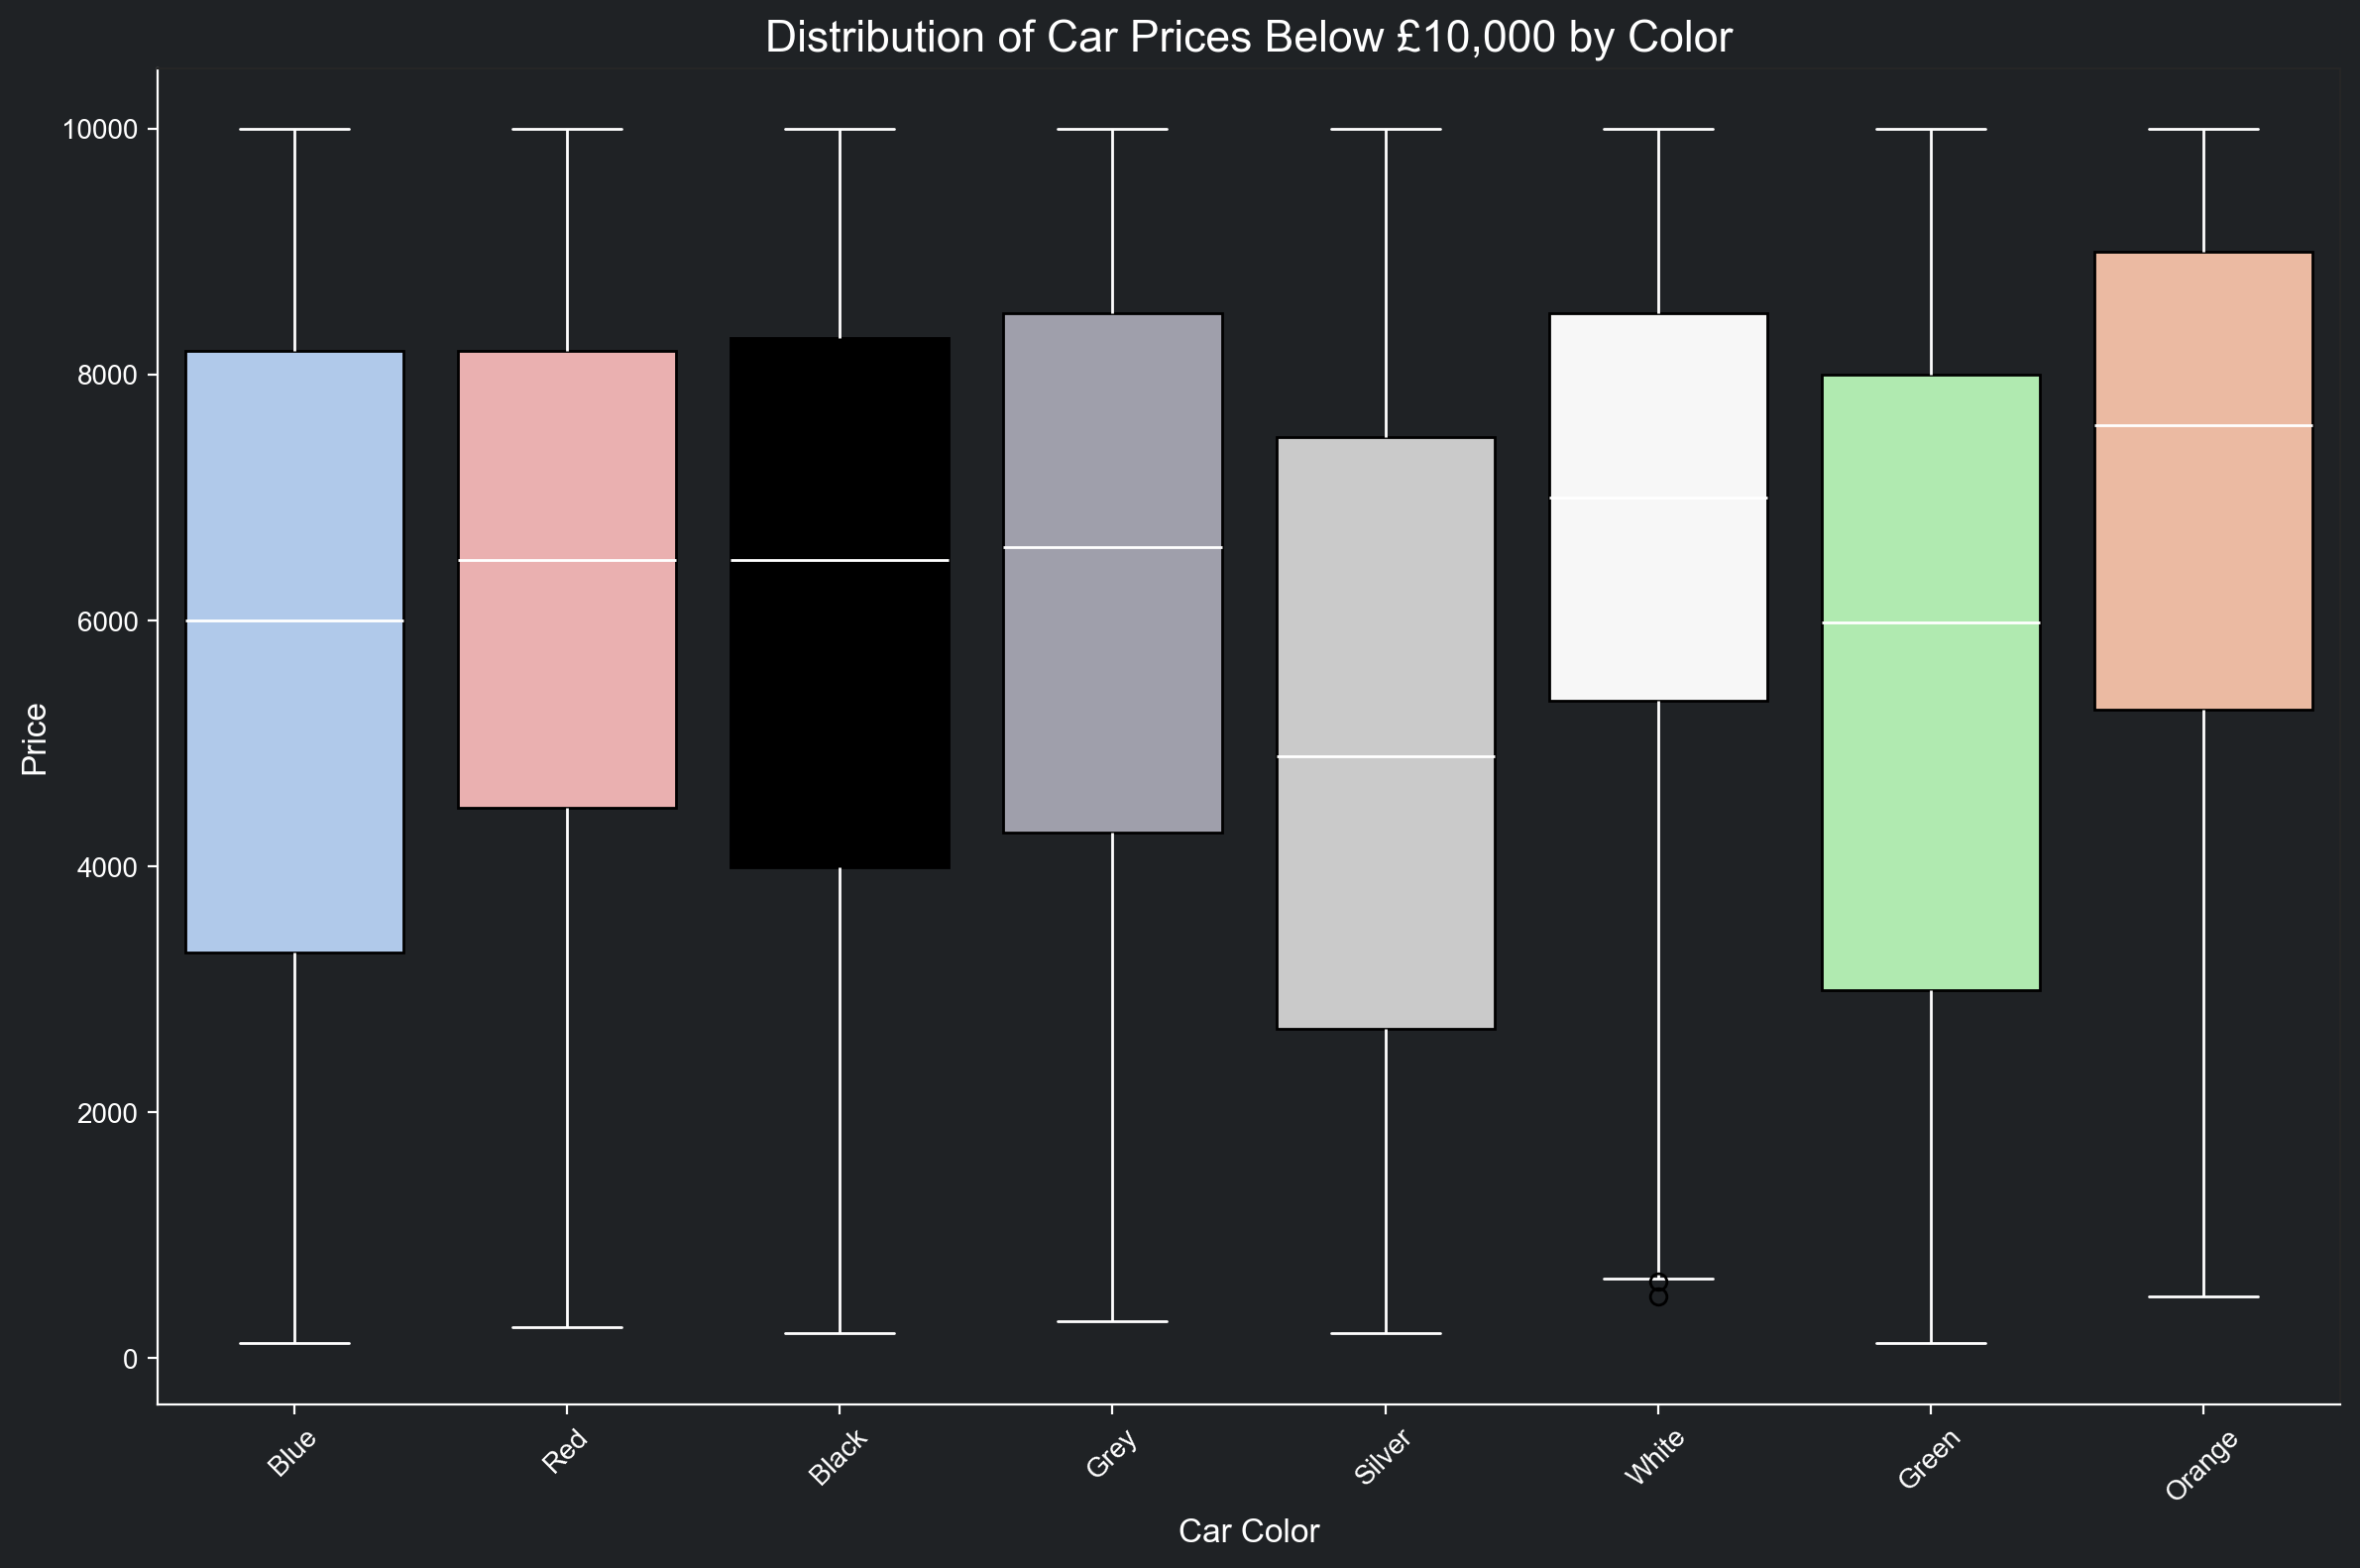

In [61]:
low_price = auto.loc[auto["price"] < 1e4]

# Filter data for only the top colors
low_price = low_price[low_price['standard_colour'].isin(top_colors)]

# Update color_mapping for only the top colors
box_palette = {color: color_mapping.get(color, "#D3D3D3") for color in top_colors}

# Plot boxplot for car prices by color
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Set the face color of the figure and the axes
ax.set_facecolor("#1F2225")
fig.set_facecolor("#1F2225")
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


sns.boxplot(data=low_price, x='standard_colour', y='price', palette=box_palette)

# Customize whiskers
for line in ax.lines:  # Lines include whiskers, medians, caps, and fliers
    line.set_color('white')  # Set whisker and cap color to white
    
plt.title('Distribution of Car Prices Below £10,000 by Color', fontsize=16, color="white")
plt.xlabel('Car Color', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

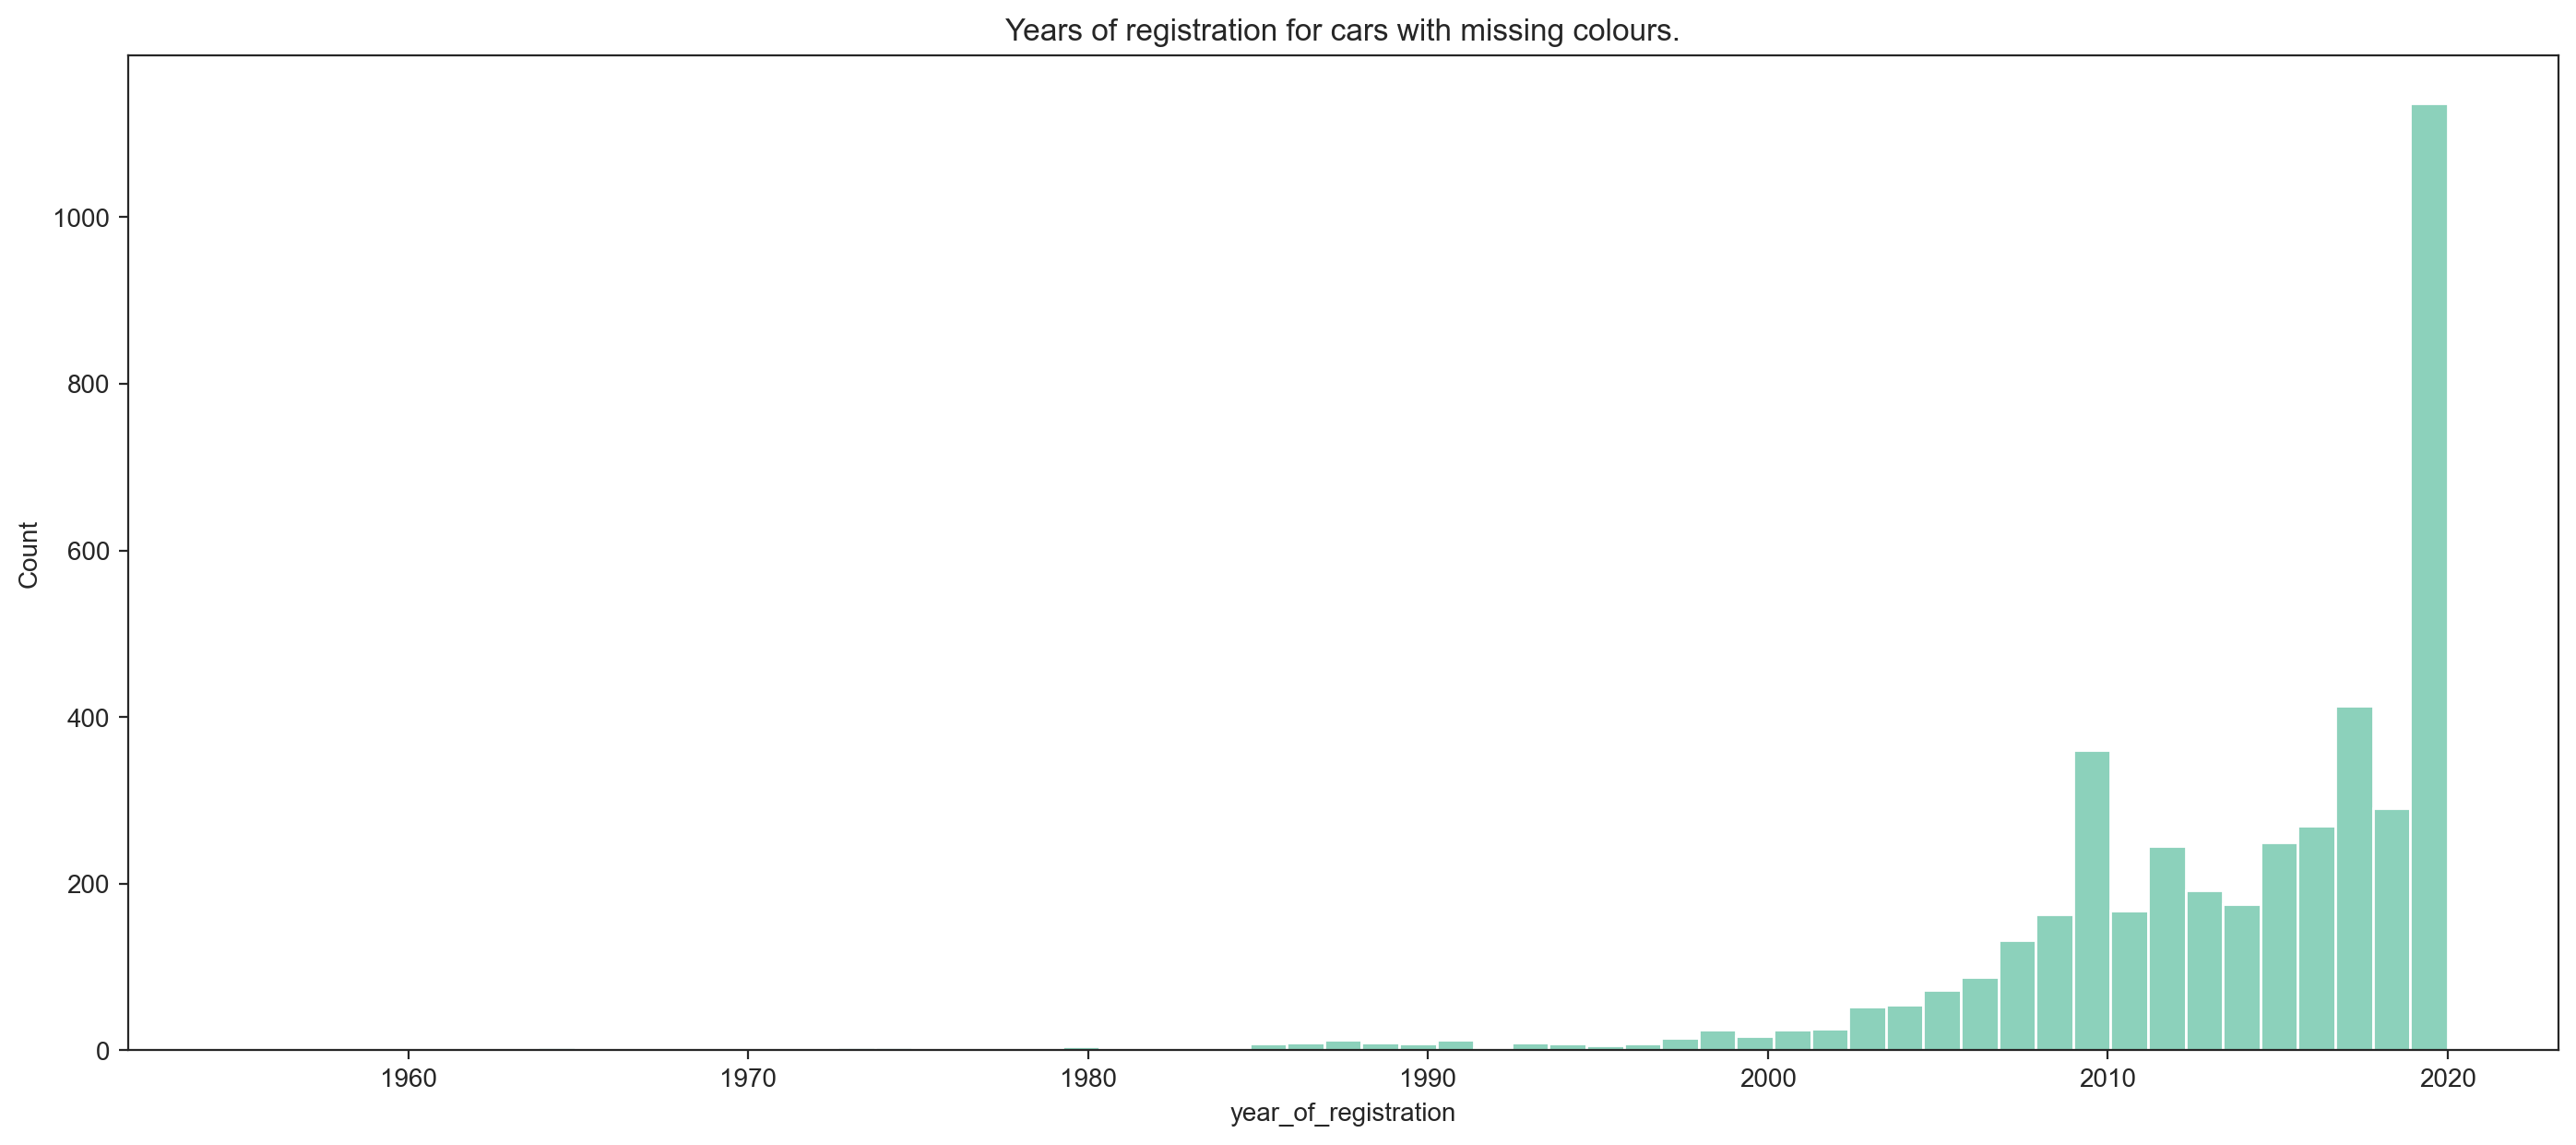

In [62]:
missing_colours = auto.loc[auto["standard_colour"].isnull()]
sns.histplot(missing_colours, x="year_of_registration");
plt.title("Years of registration for cars with missing colours.");

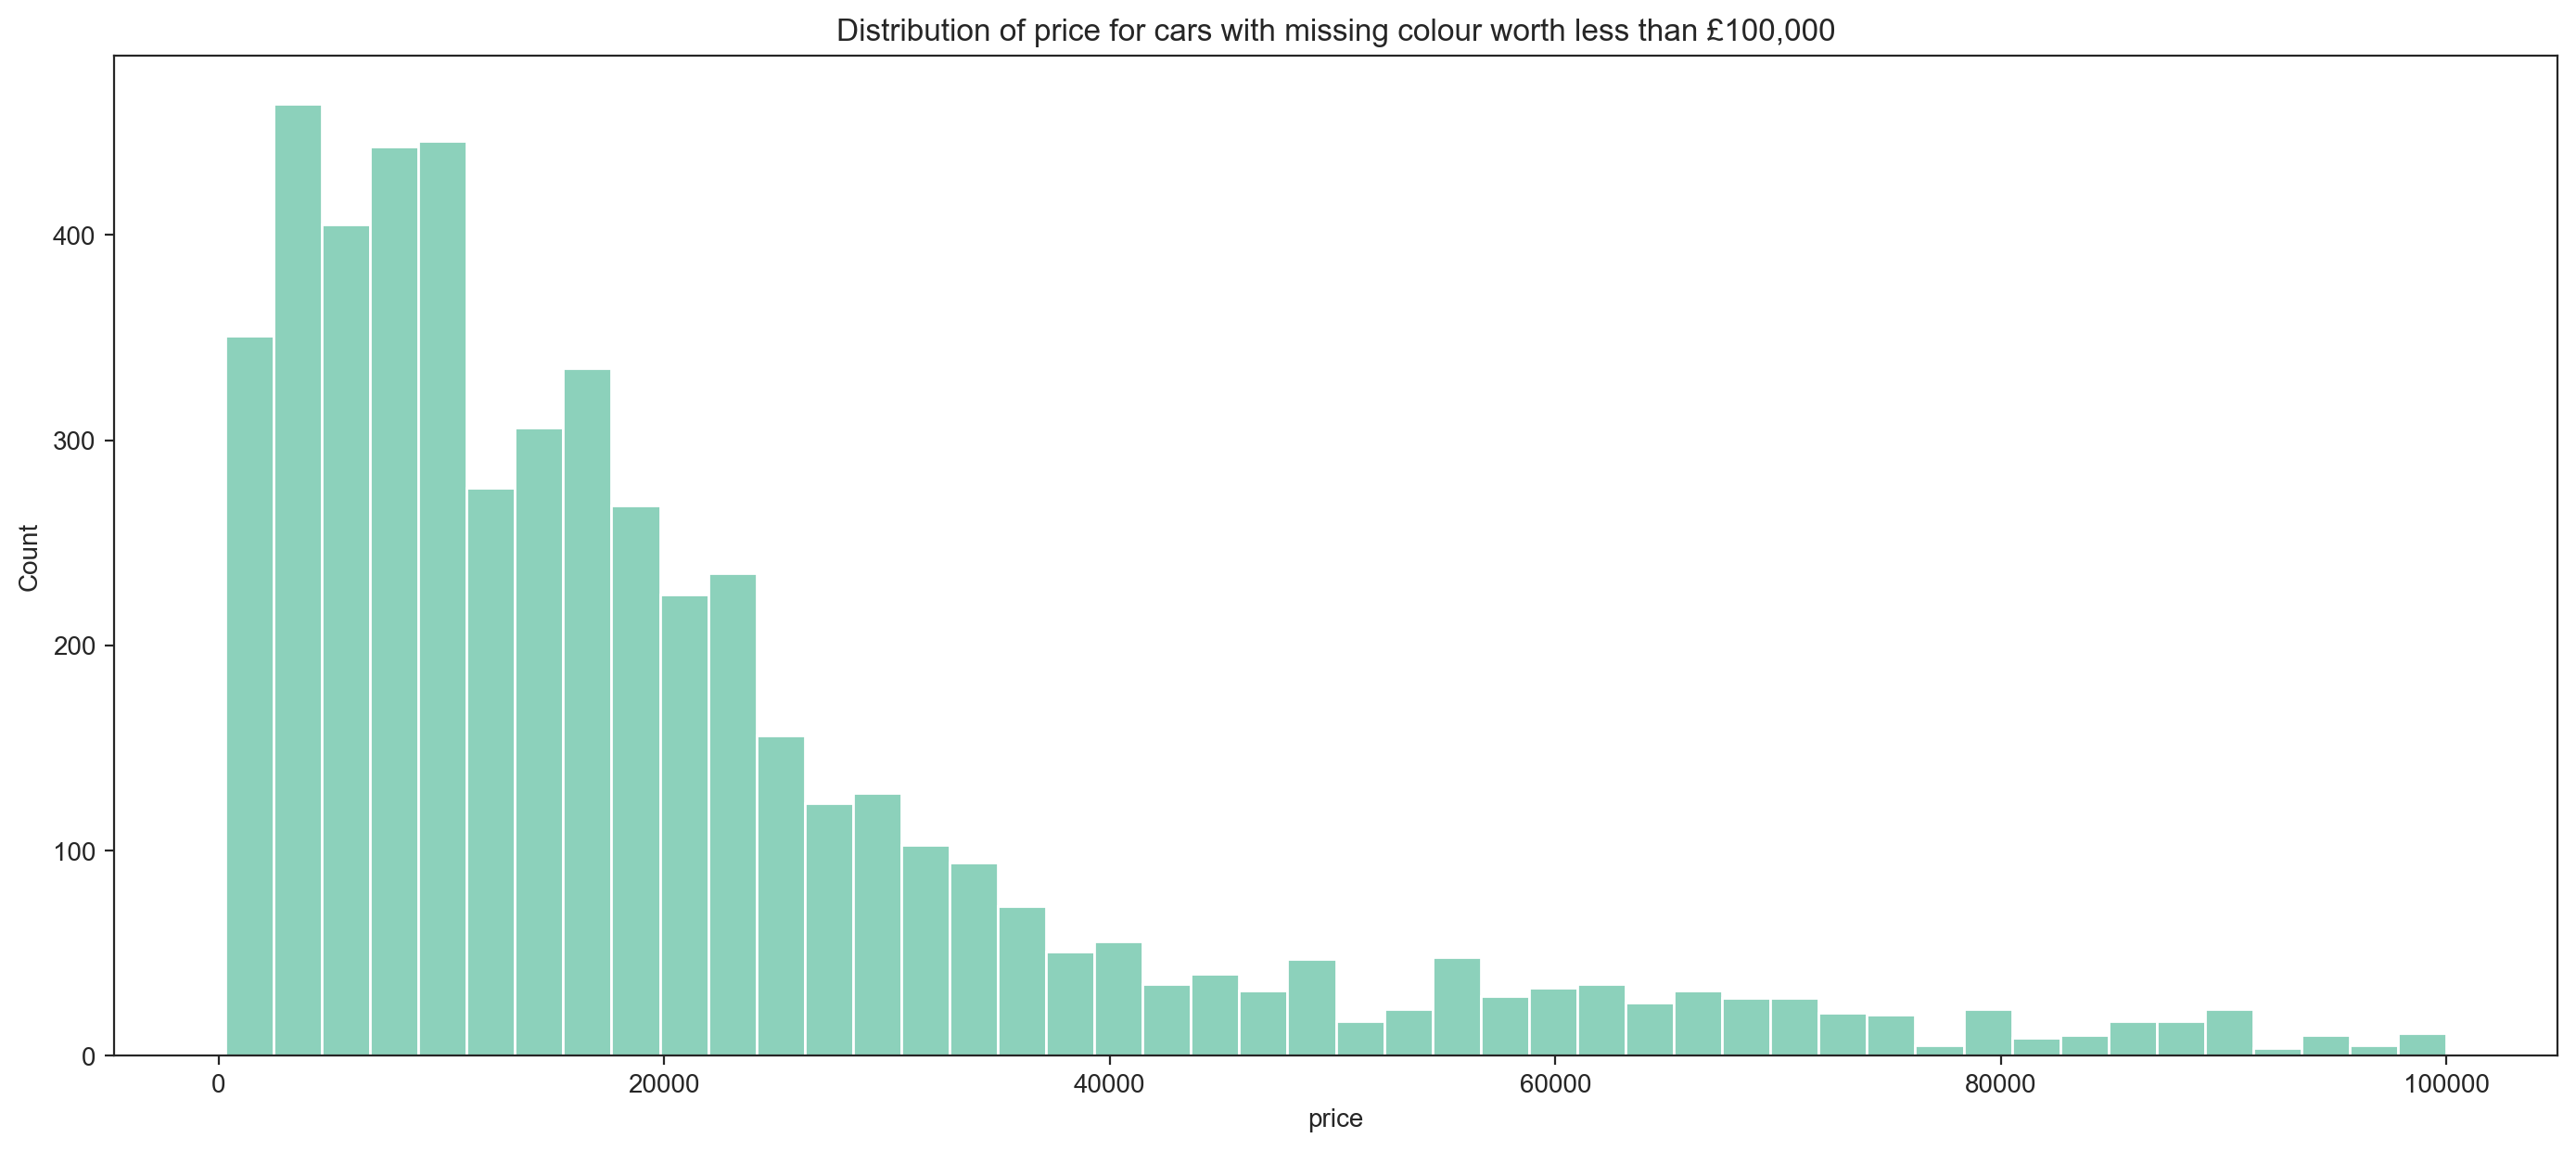

In [63]:
sns.histplot(missing_colours.loc[missing_colours["price"] < 1e5], x="price");
plt.title("Distribution of price for cars with missing colour worth less than £100,000");

## Colour Summary

All colours are reasonable however, some seem superfluous. For example, the 7 navy cars can be added to blue, burgundy and maroon are basically the same colour, bronze is just shiny brown so they can probably be combined, the 15 magenta ones can be added to pink and the one indigo can be added to purple.

The 5378 null colours need to be imputed.

---
&nbsp;

&nbsp;

# ==== Make and Model ====

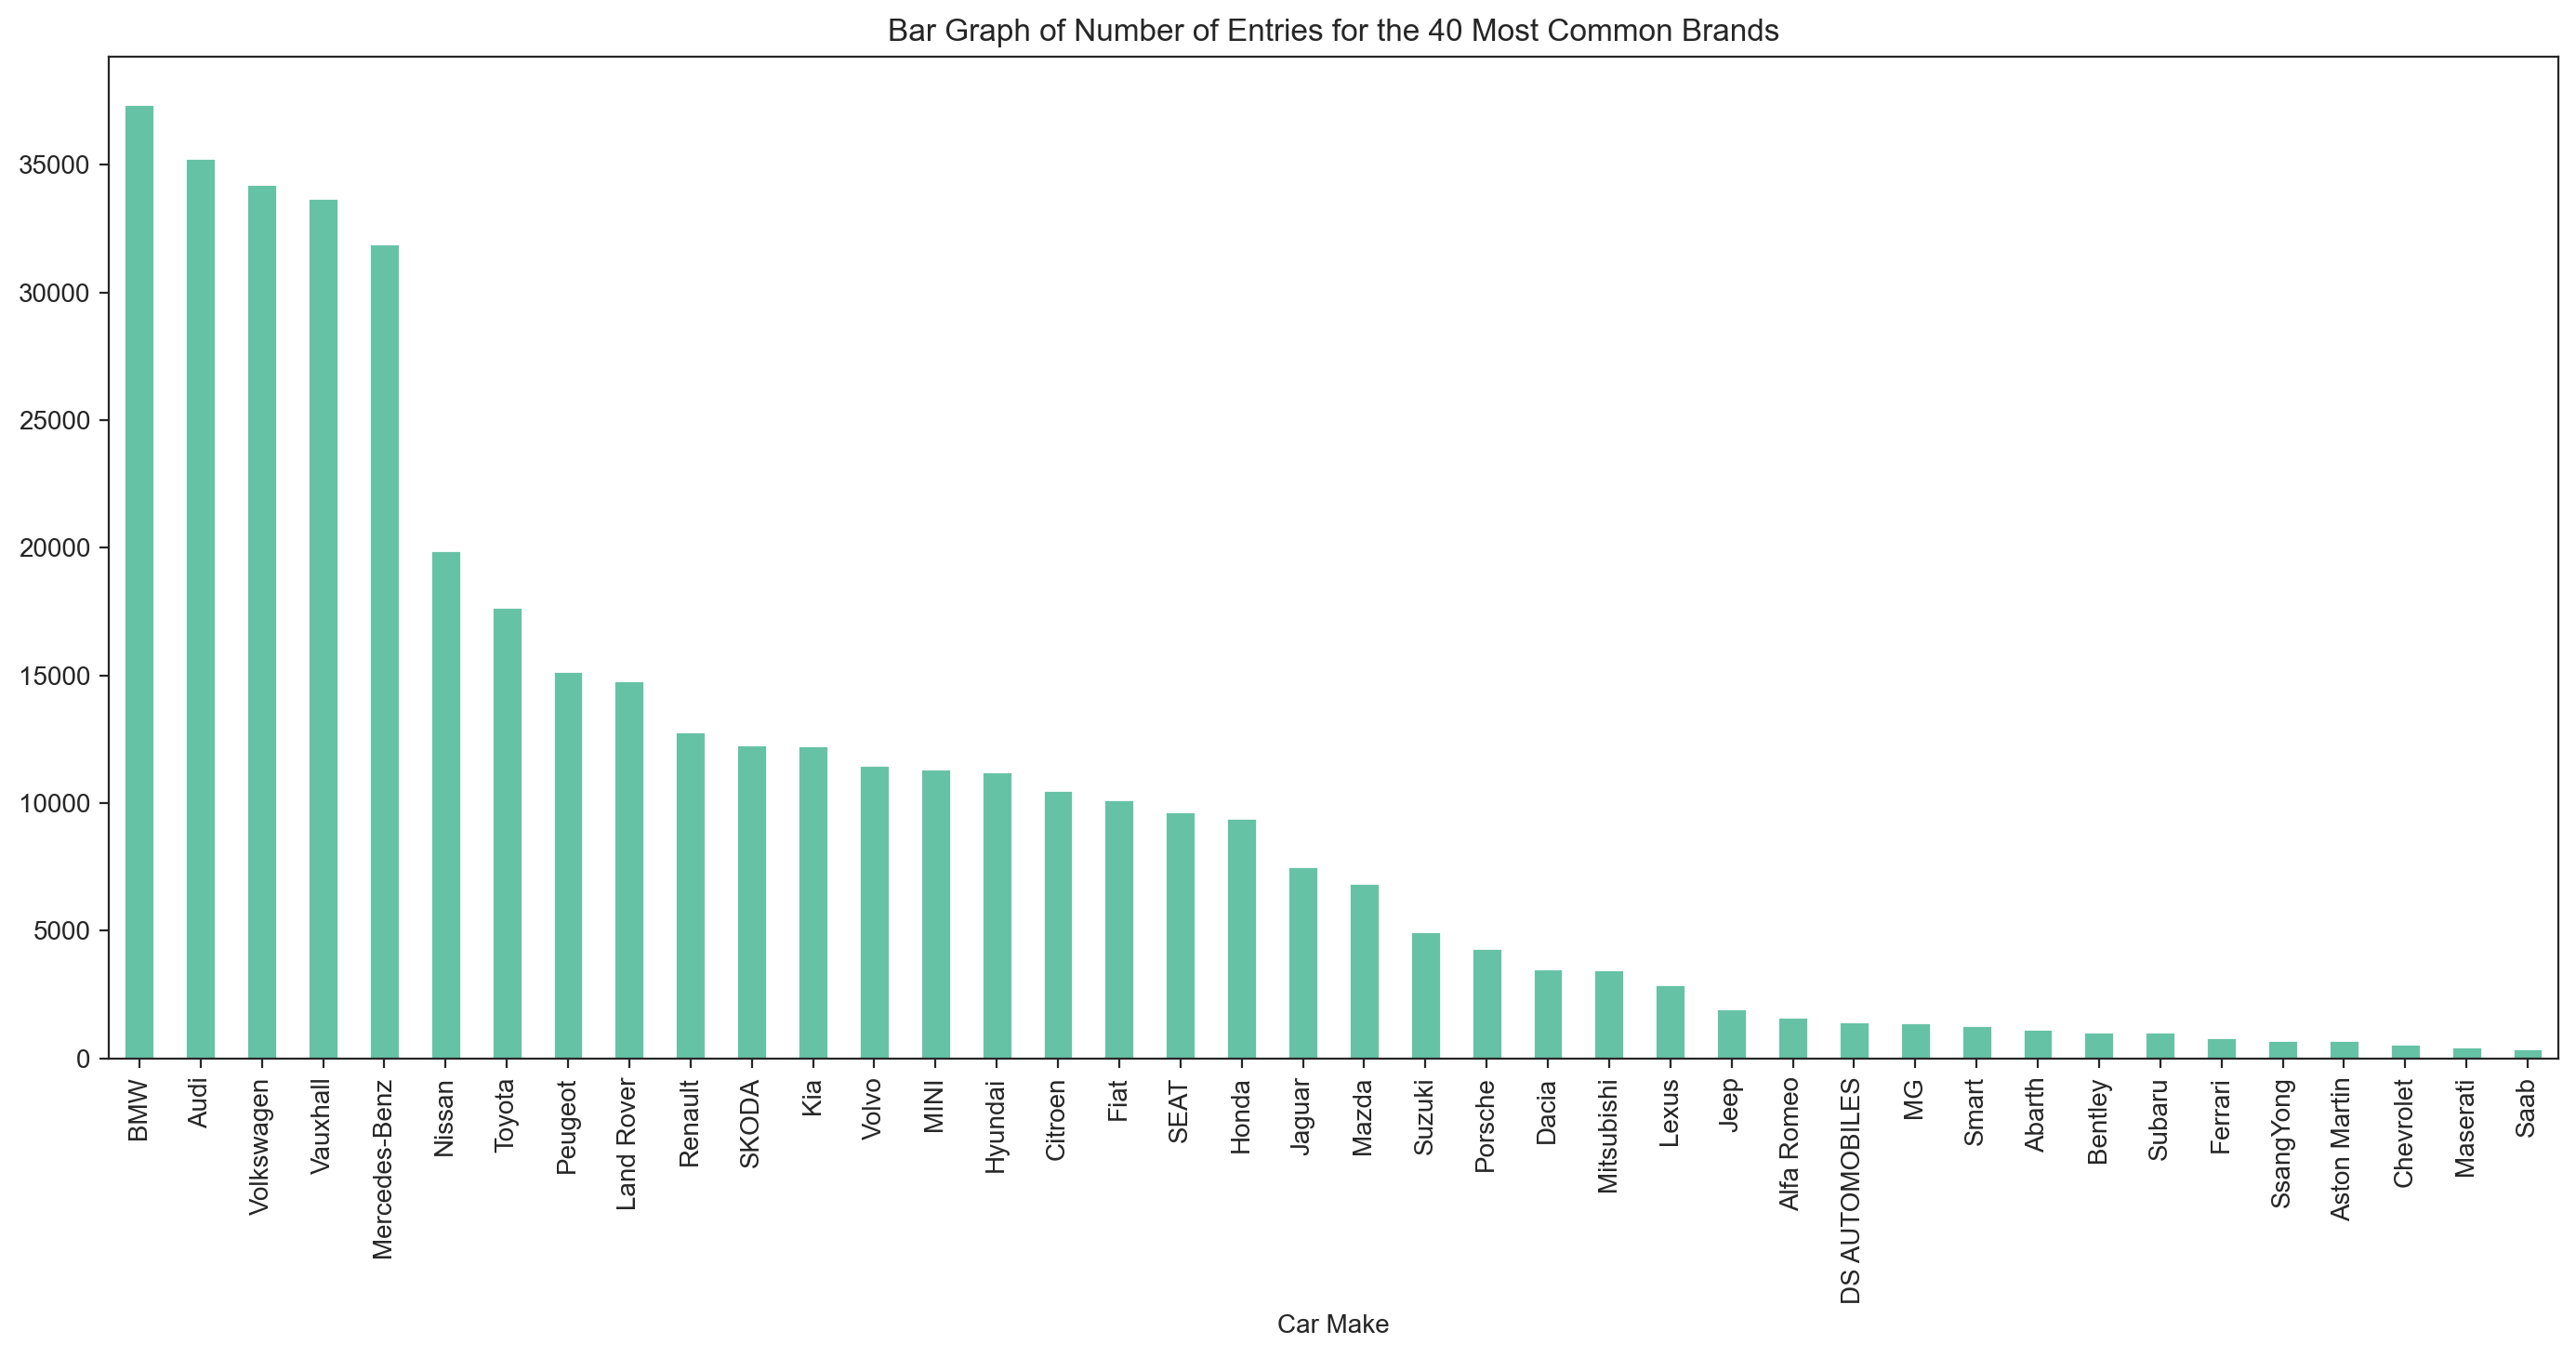

In [64]:
axes = auto['standard_make'].value_counts(sort=True)[:40].plot.bar()
axes.set_title("Bar Graph of Number of Entries for the 40 Most Common Brands");
axes.set_xlabel("Car Make");